In [1]:
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
import pmdarima as pm
from sklearn.metrics import mean_squared_error

fileNamePath = '../../LowMEData/dataset_file_names.csv'
dataDirectory = '../../LowMEData/'

df = pd.read_csv(fileNamePath)
names = df['filename'].values

order_list = []
mse_list = []
prediction_list = []

for x in range(len(names)) :
    
    df_test = pd.read_csv('../../LowMEData/' + names[x])
    split_point = int(len(df_test.index) * .8)
#     full = df_test['Electricity:Facility [kW](Hourly)'].values
    if(df_test.columns[1] == 'Electricity:Facility [kW](Hourly)') :
        full = df_test['Electricity:Facility [kW](Hourly)'].values
    else :
        full = df_test['Electricity:Facility [J](Hourly)'].values
#     full = df_test['Gas:Facility [kW](Hourly)'].values
    train = full[:split_point]
    test = full[split_point:]
    
    model = pm.auto_arima(train, start_p=1, start_q=1,
                          test='adf',       # use adftest to find optimal 'd'
                          max_p=3, max_q=3, # maximum p and q
                          m=24,              # frequency of series
                          d=0,           # let model determine 'd'
                          seasonal=False,   # Seasonality
                          start_P=0, 
                          D=0, 
                          trace=True,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True,
                          n_jobs=-1)
    
    order_list.append(model.order)
    
    model = ARIMA(train, order=model.order)
    model_fit = model.fit(disp=0)   

    yhat = model_fit.predict(start=0, end=len(test) - 1)
    
#     end = time.time()
#     print(end - start)

    mse_list.append(mean_squared_error(yhat, test))
    prediction_list.append(yhat.tolist())
    print()



0
Performing stepwise search to minimize aic


/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21676.729, BIC=-21649.310, Time=4.479 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4743.471, BIC=-4729.761, Time=1.252 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17315.721, BIC=-17295.157, Time=0.777 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12906.005, BIC=-12885.440, Time=2.888 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10682.411, BIC=10689.266, Time=0.362 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23277.425, BIC=-23243.151, Time=5.645 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22922.432, BIC=-22895.013, Time=1.144 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23318.233, BIC=-23277.104, Time=10.307 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23141.570, BIC=-23107.296, Time=2.486 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23334.098, BIC=-23286.114, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21705.444, BIC=-21678.025, Time=5.664 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4085.345, BIC=-4071.635, Time=1.442 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17275.924, BIC=-17255.359, Time=0.785 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12330.274, BIC=-12309.710, Time=2.869 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11070.785, BIC=11077.640, Time=0.281 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23265.925, BIC=-23231.651, Time=4.084 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22804.720, BIC=-22777.301, Time=1.090 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23290.327, BIC=-23249.198, Time=9.869 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23108.369, BIC=-23074.095, Time=3.590 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23271.515, BIC=-23223.532, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14036.348, BIC=-14008.928, Time=5.383 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2401.032, BIC=2414.741, Time=1.051 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8674.017, BIC=-8653.453, Time=0.748 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5857.843, BIC=-5837.279, Time=3.099 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17482.708, BIC=17489.563, Time=0.233 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16790.685, BIC=-16756.411, Time=5.437 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16007.102, BIC=-15979.683, Time=1.061 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16806.768, BIC=-16765.639, Time=7.340 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16412.599, BIC=-16378.325, Time=1.198 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16787.452, BIC=-16739.468, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



3
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14434.143, BIC=-14406.724, Time=4.633 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1959.874, BIC=1973.583, Time=1.243 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8859.660, BIC=-8839.096, Time=0.883 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6382.843, BIC=-6362.278, Time=1.780 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17293.169, BIC=17300.024, Time=0.189 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17336.460, BIC=-17302.186, Time=5.745 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16543.965, BIC=-16516.546, Time=0.933 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17365.009, BIC=-17323.881, Time=9.779 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16951.764, BIC=-16917.490, Time=1.299 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13872.535, BIC=-13845.116, Time=4.562 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2888.329, BIC=2902.039, Time=0.958 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8523.366, BIC=-8502.802, Time=0.788 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5373.748, BIC=-5353.183, Time=3.415 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17900.048, BIC=17906.902, Time=0.266 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16617.299, BIC=-16583.025, Time=5.107 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15765.413, BIC=-15737.994, Time=2.025 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16623.616, BIC=-16582.487, Time=10.327 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16228.494, BIC=-16194.220, Time=1.229 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16669.689, BIC=-16621.706, Time=12

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9417.564, BIC=-9390.145, Time=3.040 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3148.524, BIC=3162.233, Time=1.237 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7923.935, BIC=-7903.371, Time=1.825 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3740.668, BIC=-3720.103, Time=1.695 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17992.873, BIC=17999.728, Time=0.257 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10145.020, BIC=-10110.746, Time=4.119 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10057.153, BIC=-10029.734, Time=2.191 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10146.895, BIC=-10105.766, Time=11.995 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10123.609, BIC=-10089.335, Time=1.417 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-10169.521, BIC=-10121.537, Time=11.0

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8550.026, BIC=-8522.607, Time=5.188 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=4130.366, BIC=4144.076, Time=0.995 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7403.148, BIC=-7382.584, Time=0.925 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-2637.710, BIC=-2617.146, Time=2.924 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18120.667, BIC=18127.522, Time=0.162 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9094.270, BIC=-9059.996, Time=6.210 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9002.542, BIC=-8975.123, Time=1.112 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9092.313, BIC=-9051.184, Time=11.417 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-9091.435, BIC=-9050.306, Time=9.253 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-8851.452, BIC=-8817.178, Time=5.942 seconds


/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14301.679, BIC=-14274.260, Time=5.736 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2391.510, BIC=2405.220, Time=0.985 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8771.958, BIC=-8751.393, Time=0.833 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5928.331, BIC=-5907.767, Time=3.045 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17326.371, BIC=17333.225, Time=0.183 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17078.436, BIC=-17044.162, Time=6.146 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16151.911, BIC=-16124.492, Time=0.799 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17094.170, BIC=-17053.041, Time=9.928 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16631.711, BIC=-16597.437, Time=1.200 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17135.370, BIC=-17087.387, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14011.114, BIC=-13983.695, Time=5.156 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2743.065, BIC=2756.774, Time=1.166 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8630.047, BIC=-8609.483, Time=0.908 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5505.994, BIC=-5485.430, Time=2.107 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17675.164, BIC=17682.018, Time=0.166 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16816.645, BIC=-16782.371, Time=6.015 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15942.319, BIC=-15914.900, Time=1.804 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16822.737, BIC=-16781.609, Time=12.761 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16424.676, BIC=-16390.402, Time=1.115 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16845.132, BIC=-16797.148, Time=10

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7610.911, BIC=-7583.492, Time=4.315 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=5605.116, BIC=5618.825, Time=1.209 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6643.203, BIC=-6622.639, Time=1.165 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-1252.991, BIC=-1232.426, Time=4.938 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18849.421, BIC=18856.276, Time=0.227 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8018.740, BIC=-7984.466, Time=3.857 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7948.823, BIC=-7921.404, Time=0.972 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8017.350, BIC=-7976.222, Time=8.691 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-8017.662, BIC=-7976.533, Time=10.348 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-7856.650, BIC=-7822.376, Time=5.637 seconds


/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12256.358, BIC=-12228.939, Time=2.966 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2204.010, BIC=2217.719, Time=0.869 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9517.212, BIC=-9496.647, Time=1.447 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5398.758, BIC=-5378.194, Time=1.780 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17729.700, BIC=17736.555, Time=0.170 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13515.592, BIC=-13481.318, Time=6.584 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13515.376, BIC=-13487.957, Time=4.837 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13512.376, BIC=-13471.248, Time=5.877 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-13558.133, BIC=-13517.005, Time=9.197 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-12995.590, BIC=-12961.316, Time=4.4

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10116.006, BIC=-10088.587, Time=3.481 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3095.487, BIC=3109.196, Time=1.208 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8350.742, BIC=-8330.177, Time=0.955 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3964.588, BIC=-3944.024, Time=2.188 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17993.031, BIC=17999.886, Time=0.183 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10971.884, BIC=-10937.609, Time=5.220 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10914.924, BIC=-10887.505, Time=1.054 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10973.253, BIC=-10932.124, Time=8.848 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10961.462, BIC=-10927.188, Time=1.282 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-10974.509, BIC=-10926.525, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8986.825, BIC=-8959.406, Time=3.856 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3819.799, BIC=3833.508, Time=1.133 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7703.055, BIC=-7682.491, Time=1.078 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3023.938, BIC=-3003.373, Time=2.743 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18068.448, BIC=18075.303, Time=0.186 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9662.841, BIC=-9628.567, Time=4.052 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9546.385, BIC=-9518.966, Time=1.416 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9660.849, BIC=-9619.720, Time=9.722 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-9660.749, BIC=-9619.620, Time=9.939 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-9343.193, BIC=-9308.919, Time=5.912 seconds
F

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13968.311, BIC=-13940.891, Time=5.089 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2870.714, BIC=2884.424, Time=1.047 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8529.014, BIC=-8508.450, Time=0.909 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5443.130, BIC=-5422.566, Time=1.909 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17603.933, BIC=17610.788, Time=0.167 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16692.091, BIC=-16657.817, Time=4.958 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15784.474, BIC=-15757.054, Time=0.909 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16699.749, BIC=-16658.620, Time=11.480 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16280.980, BIC=-16246.706, Time=1.247 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16688.113, BIC=-16640.129, Time=6.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10071.689, BIC=-10044.269, Time=2.885 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2780.289, BIC=2793.998, Time=0.933 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8415.789, BIC=-8395.225, Time=3.803 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4110.557, BIC=-4089.993, Time=1.805 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17769.016, BIC=17775.871, Time=0.228 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10968.826, BIC=-10934.552, Time=7.977 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10862.336, BIC=-10834.916, Time=2.375 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10970.772, BIC=-10929.643, Time=9.823 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10944.459, BIC=-10910.185, Time=1.272 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-10966.490, BIC=-10918.506, Time=7.6

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13377.014, BIC=-13349.594, Time=4.219 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3315.412, BIC=3329.122, Time=1.251 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8354.595, BIC=-8334.031, Time=0.984 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4856.099, BIC=-4835.534, Time=1.892 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18026.612, BIC=18033.467, Time=0.226 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15913.652, BIC=-15879.378, Time=5.081 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15264.472, BIC=-15237.053, Time=2.349 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15920.309, BIC=-15879.180, Time=7.427 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15643.576, BIC=-15609.302, Time=1.218 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15942.561, BIC=-15894.577, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13664.342, BIC=-13636.923, Time=4.291 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3292.289, BIC=3305.999, Time=0.974 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8407.271, BIC=-8386.707, Time=0.861 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4957.592, BIC=-4937.028, Time=1.937 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17827.517, BIC=17834.372, Time=0.305 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16377.880, BIC=-16343.606, Time=4.571 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15571.387, BIC=-15543.968, Time=1.093 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16381.043, BIC=-16339.914, Time=9.837 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16040.926, BIC=-16006.652, Time=1.147 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16427.004, BIC=-16379.020, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13887.333, BIC=-13859.914, Time=4.673 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3214.949, BIC=3228.659, Time=0.805 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8480.078, BIC=-8459.514, Time=0.829 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5057.875, BIC=-5037.310, Time=1.921 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17735.467, BIC=17742.322, Time=0.176 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16766.841, BIC=-16732.567, Time=3.988 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15843.937, BIC=-15816.518, Time=0.783 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16767.633, BIC=-16726.504, Time=7.766 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16376.464, BIC=-16342.190, Time=1.143 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16816.313, BIC=-16768.329, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6964.922, BIC=-6937.503, Time=3.176 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=6145.673, BIC=6159.383, Time=1.137 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5973.115, BIC=-5952.551, Time=1.447 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-593.055, BIC=-572.490, Time=1.758 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=19346.336, BIC=19353.191, Time=0.208 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7366.760, BIC=-7332.486, Time=4.431 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7298.815, BIC=-7271.396, Time=2.415 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7365.638, BIC=-7324.509, Time=9.813 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-7366.013, BIC=-7324.884, Time=9.436 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-7206.714, BIC=-7172.440, Time=5.447 seconds
Fit

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13311.839, BIC=-13284.420, Time=6.166 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3758.458, BIC=3772.168, Time=0.841 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8210.405, BIC=-8189.841, Time=0.949 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4426.871, BIC=-4406.306, Time=1.748 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18080.496, BIC=18087.351, Time=0.197 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16035.941, BIC=-16001.667, Time=5.590 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15340.827, BIC=-15313.408, Time=2.421 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16036.926, BIC=-15995.797, Time=8.112 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15775.360, BIC=-15741.086, Time=1.175 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16237.213, BIC=-16189.230, Time=12.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13605.197, BIC=-13577.777, Time=4.559 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3317.953, BIC=3331.663, Time=1.000 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8374.128, BIC=-8353.563, Time=0.974 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4902.830, BIC=-4882.265, Time=1.655 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17718.559, BIC=17725.413, Time=0.187 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16338.212, BIC=-16303.938, Time=5.884 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15574.207, BIC=-15546.788, Time=1.914 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16343.300, BIC=-16302.171, Time=9.199 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16020.161, BIC=-15985.887, Time=1.147 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16337.762, BIC=-16289.779, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13184.888, BIC=-13157.469, Time=5.497 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3997.377, BIC=4011.086, Time=0.973 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8072.362, BIC=-8051.798, Time=0.985 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4213.686, BIC=-4193.122, Time=2.504 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18342.288, BIC=18349.143, Time=0.384 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15815.351, BIC=-15781.077, Time=6.387 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15084.230, BIC=-15056.810, Time=1.697 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15817.760, BIC=-15776.632, Time=7.738 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15521.441, BIC=-15487.167, Time=1.176 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15875.159, BIC=-15827.175, Time=9.9

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13751.445, BIC=-13724.025, Time=5.685 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3229.688, BIC=3243.398, Time=0.744 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8465.440, BIC=-8444.875, Time=0.933 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5034.742, BIC=-5014.177, Time=1.884 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17791.891, BIC=17798.746, Time=0.190 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16482.259, BIC=-16447.985, Time=5.931 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15672.992, BIC=-15645.572, Time=4.129 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16485.015, BIC=-16443.887, Time=9.575 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16154.552, BIC=-16120.278, Time=1.189 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16485.886, BIC=-16437.902, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13122.885, BIC=-13095.466, Time=4.725 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3880.220, BIC=3893.929, Time=1.139 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8147.115, BIC=-8126.551, Time=0.821 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4282.161, BIC=-4261.596, Time=4.285 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18323.295, BIC=18330.150, Time=0.199 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15729.613, BIC=-15695.339, Time=6.572 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15089.926, BIC=-15062.507, Time=2.311 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15730.381, BIC=-15689.252, Time=9.077 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15496.913, BIC=-15462.639, Time=1.187 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15789.891, BIC=-15741.908, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13510.609, BIC=-13483.189, Time=4.687 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3397.616, BIC=3411.325, Time=1.048 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8355.448, BIC=-8334.883, Time=0.929 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4801.632, BIC=-4781.068, Time=4.689 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18101.936, BIC=18108.791, Time=0.162 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16166.000, BIC=-16131.726, Time=9.270 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15410.021, BIC=-15382.602, Time=2.752 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16170.154, BIC=-16129.026, Time=8.012 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15842.582, BIC=-15808.308, Time=1.250 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16206.654, BIC=-16158.671, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



25
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13227.159, BIC=-13199.739, Time=5.414 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3904.213, BIC=3917.923, Time=1.058 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8161.288, BIC=-8140.724, Time=0.944 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4318.991, BIC=-4298.427, Time=1.768 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18348.161, BIC=18355.015, Time=0.196 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15759.836, BIC=-15725.562, Time=6.755 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15023.599, BIC=-14996.180, Time=2.609 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15760.985, BIC=-15719.856, Time=7.893 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15466.677, BIC=-15432.403, Time=1.222 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13192.352, BIC=-13164.932, Time=5.284 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3666.169, BIC=3679.878, Time=1.142 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8170.298, BIC=-8149.734, Time=0.767 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4522.259, BIC=-4501.694, Time=2.873 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18232.834, BIC=18239.688, Time=0.162 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15813.649, BIC=-15779.375, Time=6.041 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15183.131, BIC=-15155.712, Time=2.096 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15817.138, BIC=-15776.009, Time=9.590 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15567.725, BIC=-15533.450, Time=1.152 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15849.804, BIC=-15801.821, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12683.937, BIC=-12656.517, Time=6.777 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=4692.351, BIC=4706.061, Time=0.940 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7839.056, BIC=-7818.491, Time=0.926 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3486.783, BIC=-3466.219, Time=2.303 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18805.219, BIC=18812.074, Time=0.226 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15026.779, BIC=-14992.505, Time=4.673 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14447.778, BIC=-14420.359, Time=1.963 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15033.307, BIC=-14992.178, Time=7.656 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14799.443, BIC=-14765.169, Time=1.302 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15246.107, BIC=-15198.123, Time=12.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13575.001, BIC=-13547.582, Time=4.522 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3365.692, BIC=3379.401, Time=1.136 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8342.495, BIC=-8321.930, Time=0.822 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4856.296, BIC=-4835.731, Time=4.881 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17983.510, BIC=17990.365, Time=0.192 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16333.877, BIC=-16299.603, Time=6.805 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15543.429, BIC=-15516.009, Time=2.337 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16335.996, BIC=-16294.868, Time=9.896 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16005.267, BIC=-15970.993, Time=1.124 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16368.683, BIC=-16320.700, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13698.418, BIC=-13670.998, Time=4.738 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3276.589, BIC=3290.298, Time=0.909 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8385.417, BIC=-8364.852, Time=0.798 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4955.938, BIC=-4935.373, Time=1.915 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17806.375, BIC=17813.229, Time=0.164 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16557.553, BIC=-16523.279, Time=4.917 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15723.838, BIC=-15696.418, Time=2.185 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16559.914, BIC=-16518.785, Time=9.498 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16199.813, BIC=-16165.539, Time=1.197 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16572.715, BIC=-16524.731, Time=12.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13830.283, BIC=-13802.864, Time=5.532 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3119.641, BIC=3133.351, Time=1.004 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8550.570, BIC=-8530.006, Time=0.891 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5120.566, BIC=-5100.001, Time=1.980 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17697.650, BIC=17704.505, Time=0.183 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16675.749, BIC=-16641.475, Time=4.606 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15856.109, BIC=-15828.689, Time=0.840 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16674.769, BIC=-16633.641, Time=7.354 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16677.848, BIC=-16636.719, Time=6.279 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15858.926, BIC=-15824.652, Time=6.3

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13498.718, BIC=-13471.299, Time=4.956 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3519.070, BIC=3532.779, Time=1.210 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8300.937, BIC=-8280.373, Time=0.987 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4687.792, BIC=-4667.227, Time=1.743 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18213.351, BIC=18220.206, Time=0.219 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16212.714, BIC=-16178.440, Time=8.780 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15411.775, BIC=-15384.356, Time=4.636 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16214.727, BIC=-16173.598, Time=11.125 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15870.801, BIC=-15836.527, Time=1.298 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16296.293, BIC=-16248.309, Time=11

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7626.858, BIC=-7599.438, Time=3.015 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=5325.446, BIC=5339.156, Time=0.994 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6478.119, BIC=-6457.554, Time=1.414 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-1449.375, BIC=-1428.811, Time=1.655 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=19124.301, BIC=19131.156, Time=0.197 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8003.616, BIC=-7969.342, Time=6.672 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7962.124, BIC=-7934.705, Time=2.288 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8005.988, BIC=-7964.859, Time=10.308 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7990.724, BIC=-7956.450, Time=4.390 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-8065.568, BIC=-8017.585, Time=11.165 seconds

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13768.238, BIC=-13740.819, Time=4.423 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2979.989, BIC=2993.699, Time=1.208 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8486.925, BIC=-8466.360, Time=0.988 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5232.703, BIC=-5212.139, Time=1.766 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17769.154, BIC=17776.009, Time=0.154 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16607.592, BIC=-16573.318, Time=6.156 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15808.184, BIC=-15780.765, Time=4.126 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16610.825, BIC=-16569.696, Time=7.814 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16264.700, BIC=-16230.426, Time=1.207 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16653.128, BIC=-16605.145, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



34
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14765.411, BIC=-14737.992, Time=3.636 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=5857.616, BIC=5871.325, Time=1.281 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11683.536, BIC=-11662.972, Time=0.712 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-2243.111, BIC=-2222.547, Time=2.688 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=16340.607, BIC=16347.462, Time=0.230 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16497.994, BIC=-16463.720, Time=5.892 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16468.333, BIC=-16440.914, Time=1.419 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16466.467, BIC=-16425.338, Time=9.109 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16554.818, BIC=-16513.689, Time=8.750 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constan

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16623.906, BIC=-16596.487, Time=3.641 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3254.815, BIC=3268.524, Time=1.318 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13296.137, BIC=-13275.572, Time=0.765 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4846.528, BIC=-4825.964, Time=1.755 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=14997.643, BIC=15004.498, Time=0.194 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18219.471, BIC=-18185.197, Time=4.072 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18219.048, BIC=-18191.628, Time=0.972 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18226.417, BIC=-18185.289, Time=9.857 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18218.358, BIC=-18184.084, Time=1.277 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-18273.857, BIC=-18225.873, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18406.312, BIC=-18378.893, Time=4.408 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-285.459, BIC=-271.750, Time=1.326 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15068.475, BIC=-15047.911, Time=1.144 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8241.607, BIC=-8221.042, Time=2.761 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=12535.120, BIC=12541.975, Time=0.271 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20007.379, BIC=-19973.104, Time=3.503 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20009.341, BIC=-19981.922, Time=1.124 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20007.369, BIC=-19973.095, Time=1.498 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20020.898, BIC=-19979.770, Time=11.228 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-20103.439, BIC=-20055.455, Time=

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21780.541, BIC=-21753.122, Time=7.048 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5286.025, BIC=-5272.315, Time=1.024 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17313.611, BIC=-17293.046, Time=0.714 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13440.567, BIC=-13420.003, Time=2.354 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10307.953, BIC=10314.808, Time=0.253 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23500.308, BIC=-23466.034, Time=6.596 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23161.193, BIC=-23133.774, Time=0.862 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23553.236, BIC=-23512.108, Time=9.770 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23357.112, BIC=-23322.838, Time=2.549 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23591.249, BIC=-23543.265, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



38
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21686.355, BIC=-21658.936, Time=8.882 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5249.512, BIC=-5235.802, Time=1.238 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17251.196, BIC=-17230.632, Time=0.698 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13374.102, BIC=-13353.538, Time=5.311 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10291.690, BIC=10298.545, Time=0.282 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23427.292, BIC=-23393.018, Time=5.449 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23093.960, BIC=-23066.541, Time=1.107 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23474.160, BIC=-23433.031, Time=8.064 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23288.240, BIC=-23253.966, Time=2.285 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (con

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17636.115, BIC=-17608.696, Time=4.086 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1824.874, BIC=1838.584, Time=1.147 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14407.334, BIC=-14386.770, Time=0.971 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6271.624, BIC=-6251.059, Time=1.817 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=13762.985, BIC=13769.840, Time=0.286 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19227.630, BIC=-19193.356, Time=3.694 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19225.463, BIC=-19198.044, Time=0.988 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19225.269, BIC=-19184.140, Time=6.997 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-19303.174, BIC=-19262.045, Time=10.816 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-18498.156, BIC=-18463.882, Time=

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14160.486, BIC=-14133.066, Time=4.469 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=7228.234, BIC=7241.944, Time=1.090 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10995.475, BIC=-10974.911, Time=0.969 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-973.157, BIC=-952.593, Time=2.797 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17173.239, BIC=17180.094, Time=0.242 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15956.480, BIC=-15922.206, Time=8.485 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15935.901, BIC=-15908.482, Time=2.262 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15933.656, BIC=-15892.527, Time=6.838 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15996.834, BIC=-15955.705, Time=10.380 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15147.551, BIC=-15113.277, Time=8.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18577.577, BIC=-18550.158, Time=7.834 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-981.857, BIC=-968.147, Time=1.145 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14775.521, BIC=-14754.956, Time=0.901 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8949.738, BIC=-8929.174, Time=1.795 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=12208.267, BIC=12215.122, Time=0.272 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20328.974, BIC=-20294.700, Time=6.352 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20279.421, BIC=-20252.002, Time=1.034 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20369.960, BIC=-20328.831, Time=8.413 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20305.854, BIC=-20271.580, Time=1.284 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-20581.873, BIC=-20533.889, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15182.458, BIC=-15155.039, Time=4.125 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=5642.625, BIC=5656.334, Time=0.894 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-12089.462, BIC=-12068.898, Time=1.027 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-2529.697, BIC=-2509.132, Time=1.911 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=16591.399, BIC=16598.253, Time=0.221 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16651.624, BIC=-16617.350, Time=5.534 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16639.319, BIC=-16611.900, Time=2.353 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16637.682, BIC=-16596.553, Time=9.570 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16727.825, BIC=-16686.696, Time=8.702 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15949.122, BIC=-15914.848, Time=7

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15064.932, BIC=-15037.513, Time=4.160 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=6911.681, BIC=6925.390, Time=1.088 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11749.294, BIC=-11728.730, Time=0.946 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-1422.802, BIC=-1402.237, Time=1.767 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17382.707, BIC=17389.562, Time=0.218 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16594.535, BIC=-16560.261, Time=5.054 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16589.881, BIC=-16562.462, Time=2.810 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16597.035, BIC=-16555.906, Time=9.600 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16591.643, BIC=-16557.369, Time=1.357 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16674.886, BIC=-16626.902, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19772.997, BIC=-19745.578, Time=4.989 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2604.701, BIC=-2590.991, Time=1.367 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16269.987, BIC=-16249.423, Time=0.786 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10619.944, BIC=-10599.379, Time=2.250 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11187.088, BIC=11193.942, Time=0.355 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21449.789, BIC=-21415.515, Time=4.899 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21449.436, BIC=-21422.017, Time=0.836 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21471.789, BIC=-21430.661, Time=8.391 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21448.907, BIC=-21414.633, Time=1.333 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21504.322, BIC=-21456.338, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16723.251, BIC=-16695.832, Time=5.297 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2164.692, BIC=2178.402, Time=1.237 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13615.924, BIC=-13595.359, Time=0.917 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5793.741, BIC=-5773.177, Time=1.882 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=14090.864, BIC=14097.719, Time=0.336 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18258.405, BIC=-18224.131, Time=5.609 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18247.519, BIC=-18220.099, Time=1.005 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18245.603, BIC=-18204.474, Time=6.485 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-18355.475, BIC=-18314.347, Time=10.467 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17562.822, BIC=-17528.548, Time=

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15318.043, BIC=-15290.624, Time=4.056 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=6327.532, BIC=6341.242, Time=0.864 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-12177.222, BIC=-12156.657, Time=0.850 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-1935.950, BIC=-1915.386, Time=1.604 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=16829.476, BIC=16836.331, Time=0.269 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16894.261, BIC=-16859.987, Time=4.658 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16885.833, BIC=-16858.413, Time=2.263 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16882.154, BIC=-16841.025, Time=6.310 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16938.039, BIC=-16896.910, Time=8.539 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16169.284, BIC=-16135.010, Time=6

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21376.501, BIC=-21349.082, Time=5.314 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5074.543, BIC=-5060.833, Time=1.106 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17028.337, BIC=-17007.773, Time=0.678 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13171.014, BIC=-13150.450, Time=2.180 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10244.372, BIC=10251.226, Time=0.283 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23154.503, BIC=-23120.229, Time=10.433 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22920.494, BIC=-22893.074, Time=1.033 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23214.543, BIC=-23173.414, Time=9.600 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23050.431, BIC=-23016.157, Time=2.843 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23257.881, BIC=-23209.897, T

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



48
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16433.642, BIC=-16406.222, Time=3.816 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3308.105, BIC=3321.815, Time=1.239 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13253.456, BIC=-13232.891, Time=0.873 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4782.966, BIC=-4762.401, Time=1.955 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=14763.439, BIC=14770.294, Time=0.208 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17905.313, BIC=-17871.039, Time=6.525 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17903.570, BIC=-17876.151, Time=0.998 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17907.343, BIC=-17866.214, Time=5.231 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17903.618, BIC=-17869.344, Time=1.319 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constan

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19439.777, BIC=-19412.358, Time=4.004 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2708.485, BIC=-2694.775, Time=1.249 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15534.296, BIC=-15513.731, Time=0.927 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10649.131, BIC=-10628.567, Time=5.121 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11303.939, BIC=11310.794, Time=0.266 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21168.135, BIC=-21133.861, Time=7.009 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21089.584, BIC=-21062.165, Time=2.074 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21217.421, BIC=-21176.292, Time=9.870 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21131.227, BIC=-21096.953, Time=7.334 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21273.029, BIC=-21225.046, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14772.619, BIC=-14745.200, Time=3.620 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=7078.564, BIC=7092.273, Time=1.115 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11541.731, BIC=-11521.167, Time=0.929 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-1203.442, BIC=-1182.877, Time=1.582 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17116.222, BIC=17123.076, Time=0.214 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16352.931, BIC=-16318.657, Time=4.620 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16351.961, BIC=-16324.541, Time=2.660 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16351.472, BIC=-16310.343, Time=11.274 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16400.246, BIC=-16359.117, Time=11.387 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15642.779, BIC=-15608.505, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14733.137, BIC=-14705.718, Time=5.398 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=6851.684, BIC=6865.393, Time=1.118 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11626.433, BIC=-11605.869, Time=0.950 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-1399.069, BIC=-1378.505, Time=1.837 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=16984.430, BIC=16991.285, Time=0.208 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16293.387, BIC=-16259.113, Time=5.716 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16284.615, BIC=-16257.196, Time=2.885 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16280.731, BIC=-16239.602, Time=6.913 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16331.353, BIC=-16290.224, Time=13.507 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15571.411, BIC=-15537.137, Time=

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20498.403, BIC=-20470.983, Time=4.742 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4386.078, BIC=-4372.368, Time=1.085 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16444.296, BIC=-16423.732, Time=0.718 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12306.747, BIC=-12286.183, Time=2.270 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10601.386, BIC=10608.241, Time=0.216 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22123.730, BIC=-22089.456, Time=5.363 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21955.654, BIC=-21928.235, Time=0.901 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22182.794, BIC=-22141.665, Time=11.646 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22041.478, BIC=-22007.204, Time=2.959 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22259.930, BIC=-22211.946, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23049.353, BIC=-23021.934, Time=7.424 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6848.889, BIC=-6835.179, Time=1.243 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18643.610, BIC=-18623.045, Time=0.816 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14991.805, BIC=-14971.240, Time=2.198 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9217.631, BIC=9224.485, Time=0.270 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24718.806, BIC=-24684.532, Time=7.713 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24454.718, BIC=-24427.299, Time=1.039 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24795.952, BIC=-24754.823, Time=8.045 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24593.401, BIC=-24559.127, Time=2.518 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24859.107, BIC=-24811.124, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17510.582, BIC=-17483.162, Time=7.707 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1502.884, BIC=1516.593, Time=0.924 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14300.177, BIC=-14279.612, Time=1.001 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6552.831, BIC=-6532.266, Time=1.814 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=13290.241, BIC=13297.096, Time=0.226 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18867.512, BIC=-18833.238, Time=2.204 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18869.464, BIC=-18842.044, Time=0.982 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18867.494, BIC=-18833.220, Time=1.311 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18886.830, BIC=-18845.701, Time=11.923 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-18871.728, BIC=-18823.745, Time=

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16979.664, BIC=-16952.245, Time=5.365 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3935.669, BIC=3949.379, Time=0.890 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13595.783, BIC=-13575.219, Time=0.777 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4329.272, BIC=-4308.708, Time=1.609 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=14732.571, BIC=14739.426, Time=0.240 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18385.248, BIC=-18350.974, Time=5.252 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18383.063, BIC=-18355.644, Time=0.974 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18417.164, BIC=-18376.035, Time=8.846 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18383.178, BIC=-18348.904, Time=1.294 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-18523.357, BIC=-18475.373, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17453.751, BIC=-17426.332, Time=3.393 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1023.858, BIC=1037.567, Time=0.872 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14261.110, BIC=-14240.546, Time=1.695 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6969.942, BIC=-6949.377, Time=1.736 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=12849.442, BIC=12856.297, Time=0.273 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18810.631, BIC=-18776.357, Time=6.026 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18808.735, BIC=-18781.316, Time=0.807 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18824.313, BIC=-18783.184, Time=8.643 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18808.526, BIC=-18774.252, Time=1.289 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-18862.984, BIC=-18815.001, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18796.597, BIC=-18769.178, Time=6.418 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-482.774, BIC=-469.065, Time=1.412 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15201.640, BIC=-15181.076, Time=4.125 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8600.819, BIC=-8580.255, Time=1.765 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11966.362, BIC=11973.217, Time=0.312 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20122.567, BIC=-20088.293, Time=5.890 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20104.807, BIC=-20077.388, Time=0.893 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20197.239, BIC=-20156.111, Time=9.980 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20110.720, BIC=-20076.446, Time=1.180 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-20370.751, BIC=-20322.767, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21526.096, BIC=-21498.677, Time=4.995 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5108.431, BIC=-5094.722, Time=1.429 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17196.985, BIC=-17176.421, Time=0.714 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13241.839, BIC=-13221.275, Time=2.231 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10326.338, BIC=10333.192, Time=0.328 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23251.372, BIC=-23217.098, Time=7.214 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23033.075, BIC=-23005.656, Time=1.248 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23316.761, BIC=-23275.632, Time=9.227 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23158.397, BIC=-23124.123, Time=2.442 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23364.045, BIC=-23316.062, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14622.131, BIC=-14594.711, Time=3.863 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=7549.183, BIC=7562.893, Time=0.890 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11622.815, BIC=-11602.250, Time=0.809 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-818.655, BIC=-798.090, Time=1.735 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17753.429, BIC=17760.283, Time=0.170 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15903.567, BIC=-15869.292, Time=7.256 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15860.771, BIC=-15833.352, Time=2.786 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15864.418, BIC=-15823.289, Time=9.751 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16025.265, BIC=-15984.136, Time=9.744 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15193.284, BIC=-15159.010, Time=5.9

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19635.361, BIC=-19607.942, Time=5.094 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-1818.654, BIC=-1804.944, Time=1.037 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16406.316, BIC=-16385.752, Time=1.710 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9894.123, BIC=-9873.558, Time=2.448 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11670.483, BIC=11677.338, Time=0.269 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20955.331, BIC=-20921.057, Time=4.186 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20957.298, BIC=-20929.879, Time=1.094 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20955.324, BIC=-20921.050, Time=1.169 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20981.505, BIC=-20940.376, Time=10.424 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21047.165, BIC=-20999.181, Tim

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22962.241, BIC=-22934.822, Time=4.699 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6848.847, BIC=-6835.138, Time=0.985 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18602.827, BIC=-18582.262, Time=0.679 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15015.010, BIC=-14994.446, Time=2.255 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9026.362, BIC=9033.217, Time=0.326 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24700.697, BIC=-24666.423, Time=7.790 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24504.536, BIC=-24477.117, Time=1.167 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24778.160, BIC=-24737.031, Time=13.713 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24612.323, BIC=-24578.049, Time=2.695 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24843.024, BIC=-24795.040, Tim

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20408.201, BIC=-20380.781, Time=4.301 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5076.260, BIC=-5062.551, Time=1.059 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17479.197, BIC=-17458.633, Time=0.889 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13005.332, BIC=-12984.767, Time=2.322 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10044.401, BIC=10051.256, Time=0.290 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22040.715, BIC=-22006.441, Time=6.986 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22007.033, BIC=-21979.614, Time=0.921 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22019.218, BIC=-21978.089, Time=9.520 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22070.154, BIC=-22029.025, Time=11.062 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21164.262, BIC=-21129.988, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20454.258, BIC=-20426.839, Time=4.608 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5775.220, BIC=-5761.510, Time=1.130 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17653.796, BIC=-17633.232, Time=0.726 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13598.813, BIC=-13578.249, Time=3.012 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9718.933, BIC=9725.788, Time=0.326 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22336.134, BIC=-22301.860, Time=5.793 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22251.701, BIC=-22224.281, Time=0.789 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22341.536, BIC=-22300.408, Time=9.822 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22326.318, BIC=-22292.044, Time=3.431 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22338.889, BIC=-22290.905, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16811.585, BIC=-16784.165, Time=5.583 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3084.174, BIC=3097.884, Time=1.195 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13562.908, BIC=-13542.343, Time=0.834 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5074.547, BIC=-5053.983, Time=1.726 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=14232.210, BIC=14239.065, Time=0.237 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18160.627, BIC=-18126.353, Time=4.219 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18154.072, BIC=-18126.653, Time=1.002 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18174.787, BIC=-18133.658, Time=9.951 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18155.474, BIC=-18121.200, Time=1.358 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-18375.648, BIC=-18327.664, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19332.860, BIC=-19305.440, Time=3.896 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2071.626, BIC=-2057.916, Time=1.046 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16264.426, BIC=-16243.862, Time=1.536 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10029.212, BIC=-10008.647, Time=3.232 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11433.687, BIC=11440.542, Time=0.312 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20368.806, BIC=-20334.532, Time=4.350 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20369.375, BIC=-20341.956, Time=0.964 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20367.994, BIC=-20333.720, Time=0.989 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20413.894, BIC=-20372.765, Time=13.830 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-20400.283, BIC=-20352.299, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20990.384, BIC=-20962.965, Time=6.106 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5480.799, BIC=-5467.090, Time=0.978 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17863.996, BIC=-17843.431, Time=0.861 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13502.767, BIC=-13482.203, Time=3.191 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9866.597, BIC=9873.451, Time=0.245 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22753.401, BIC=-22719.127, Time=5.595 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22734.131, BIC=-22706.712, Time=0.784 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22731.605, BIC=-22690.476, Time=5.694 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22777.555, BIC=-22736.426, Time=8.335 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21808.891, BIC=-21774.617, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20666.952, BIC=-20639.533, Time=3.818 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3994.393, BIC=-3980.683, Time=0.983 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17086.012, BIC=-17065.448, Time=0.627 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11966.269, BIC=-11945.705, Time=2.291 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10221.652, BIC=10228.507, Time=0.281 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22219.947, BIC=-22185.673, Time=7.867 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22206.708, BIC=-22179.288, Time=0.984 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22262.071, BIC=-22220.942, Time=9.942 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22213.017, BIC=-22178.743, Time=4.260 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22224.776, BIC=-22176.792, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22931.537, BIC=-22904.118, Time=5.597 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6830.062, BIC=-6816.352, Time=1.234 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18618.347, BIC=-18597.782, Time=0.970 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14925.004, BIC=-14904.440, Time=2.861 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9202.798, BIC=9209.653, Time=0.265 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24581.474, BIC=-24547.200, Time=5.819 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24353.788, BIC=-24326.369, Time=1.049 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24657.455, BIC=-24616.326, Time=10.247 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24473.890, BIC=-24439.616, Time=3.223 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24723.267, BIC=-24675.283, Tim

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18599.149, BIC=-18571.730, Time=4.081 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=48.532, BIC=62.242, Time=1.339 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15341.662, BIC=-15321.098, Time=1.769 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8007.128, BIC=-7986.563, Time=1.604 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=12387.784, BIC=12394.639, Time=0.253 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19837.728, BIC=-19803.454, Time=2.330 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19839.571, BIC=-19812.152, Time=1.069 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19837.670, BIC=-19803.396, Time=0.980 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19878.085, BIC=-19836.956, Time=8.753 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=nan, BIC=nan, Time=nan seconds
Fit ARI

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19384.615, BIC=-19357.196, Time=8.256 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2530.866, BIC=-2517.156, Time=1.200 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16200.374, BIC=-16179.810, Time=0.759 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10416.214, BIC=-10395.650, Time=2.713 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10961.680, BIC=10968.534, Time=0.247 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20620.275, BIC=-20586.001, Time=3.626 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20622.001, BIC=-20594.582, Time=0.812 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20620.128, BIC=-20585.854, Time=1.179 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20655.024, BIC=-20613.895, Time=13.037 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-20655.104, BIC=-20607.120, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17015.177, BIC=-16987.758, Time=3.660 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1844.106, BIC=1857.815, Time=1.179 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13832.664, BIC=-13812.099, Time=0.977 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6171.456, BIC=-6150.891, Time=1.885 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=13354.564, BIC=13361.419, Time=0.259 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18500.483, BIC=-18466.209, Time=11.467 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18487.971, BIC=-18460.552, Time=0.938 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18492.223, BIC=-18451.094, Time=10.249 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-18132.199, BIC=-18091.070, Time=9.644 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17770.896, BIC=-17736.622, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19876.643, BIC=-19849.224, Time=4.312 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2904.029, BIC=-2890.320, Time=0.903 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16756.192, BIC=-16735.627, Time=1.663 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10878.259, BIC=-10857.695, Time=2.181 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11258.659, BIC=11265.513, Time=0.315 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21241.635, BIC=-21207.361, Time=1.339 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21243.635, BIC=-21216.215, Time=0.799 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21241.635, BIC=-21207.361, Time=1.027 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21253.381, BIC=-21212.252, Time=11.165 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21251.632, BIC=-21203.648, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20425.082, BIC=-20397.662, Time=3.835 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5359.171, BIC=-5345.461, Time=0.962 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17531.162, BIC=-17510.598, Time=0.897 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13177.723, BIC=-13157.158, Time=2.354 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9898.948, BIC=9905.802, Time=0.288 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22171.482, BIC=-22137.208, Time=3.593 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22132.182, BIC=-22104.763, Time=0.734 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22169.373, BIC=-22128.244, Time=10.424 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22187.930, BIC=-22146.801, Time=10.478 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21293.038, BIC=-21258.764, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11025.349, BIC=-11000.705, Time=2.704 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2865.651, BIC=-2853.329, Time=0.422 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8672.947, BIC=-8654.465, Time=0.286 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6971.165, BIC=-6952.683, Time=2.457 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=5070.043, BIC=5076.204, Time=0.137 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12040.661, BIC=-12009.857, Time=3.490 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11894.110, BIC=-11869.467, Time=0.535 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12078.111, BIC=-12041.146, Time=5.293 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11969.668, BIC=-11938.864, Time=1.647 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-12088.516, BIC=-12045.390, Time=5.4

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14056.027, BIC=-14028.608, Time=4.812 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=6745.045, BIC=6758.755, Time=0.800 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11300.787, BIC=-11280.222, Time=0.867 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-1453.544, BIC=-1432.980, Time=1.658 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=16928.876, BIC=16935.731, Time=0.249 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15237.568, BIC=-15203.294, Time=5.471 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15156.166, BIC=-15128.747, Time=5.120 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15155.886, BIC=-15114.758, Time=9.514 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-14308.880, BIC=-14267.751, Time=11.195 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-14525.177, BIC=-14490.903, Time=

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19268.804, BIC=-19241.385, Time=3.839 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-496.666, BIC=-482.956, Time=0.860 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15838.631, BIC=-15818.067, Time=1.287 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8613.380, BIC=-8592.815, Time=1.696 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=12398.197, BIC=12405.052, Time=0.236 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20471.118, BIC=-20436.844, Time=5.749 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20457.627, BIC=-20430.208, Time=0.973 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20536.415, BIC=-20495.286, Time=12.090 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20462.156, BIC=-20427.882, Time=1.494 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-20427.458, BIC=-20379.474, Time=

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17187.587, BIC=-17160.168, Time=3.863 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=881.036, BIC=894.746, Time=0.996 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14064.552, BIC=-14043.987, Time=1.640 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7056.844, BIC=-7036.280, Time=1.555 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=12719.440, BIC=12726.295, Time=0.237 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18347.334, BIC=-18313.060, Time=5.680 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18349.014, BIC=-18321.595, Time=0.998 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18347.132, BIC=-18312.858, Time=1.205 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18381.477, BIC=-18340.348, Time=9.344 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-18345.767, BIC=-18297.784, Time=13.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22955.142, BIC=-22927.723, Time=4.386 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6752.053, BIC=-6738.343, Time=0.900 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18589.091, BIC=-18568.526, Time=0.655 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14906.078, BIC=-14885.514, Time=3.340 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9135.004, BIC=9141.859, Time=0.285 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24648.483, BIC=-24614.208, Time=4.621 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24414.878, BIC=-24387.459, Time=1.054 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24720.501, BIC=-24679.372, Time=10.567 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24543.631, BIC=-24509.357, Time=3.039 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24768.608, BIC=-24720.624, Tim

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22986.736, BIC=-22959.317, Time=5.912 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6893.006, BIC=-6879.297, Time=1.274 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18607.046, BIC=-18586.482, Time=0.805 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15053.487, BIC=-15032.923, Time=2.068 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9090.003, BIC=9096.858, Time=0.256 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24702.918, BIC=-24668.644, Time=5.895 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24486.217, BIC=-24458.798, Time=1.137 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24781.512, BIC=-24740.383, Time=11.581 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24603.244, BIC=-24568.970, Time=2.709 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24824.078, BIC=-24776.095, Tim

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20252.510, BIC=-20225.091, Time=5.368 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4492.261, BIC=-4478.552, Time=1.009 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17225.580, BIC=-17205.016, Time=0.760 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12398.923, BIC=-12378.358, Time=2.328 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10481.072, BIC=10487.927, Time=0.238 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21667.827, BIC=-21633.553, Time=5.986 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21664.170, BIC=-21636.751, Time=0.853 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21664.790, BIC=-21623.662, Time=8.696 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21748.610, BIC=-21707.481, Time=9.199 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-20935.934, BIC=-20901.660, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20479.226, BIC=-20451.807, Time=8.617 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5596.767, BIC=-5583.057, Time=1.062 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17585.863, BIC=-17565.298, Time=0.881 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13468.932, BIC=-13448.367, Time=2.470 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9849.384, BIC=9856.239, Time=0.332 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22242.714, BIC=-22208.440, Time=4.884 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22186.867, BIC=-22159.448, Time=0.852 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22251.245, BIC=-22210.116, Time=10.034 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22232.882, BIC=-22198.608, Time=2.684 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22260.519, BIC=-22212.535, Tim

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19719.440, BIC=-19692.021, Time=3.845 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-1166.530, BIC=-1152.821, Time=0.999 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16160.578, BIC=-16140.014, Time=1.850 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9339.186, BIC=-9318.622, Time=3.083 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=12038.635, BIC=12045.490, Time=0.231 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21029.410, BIC=-20995.136, Time=2.998 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21024.571, BIC=-20997.152, Time=0.928 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21103.898, BIC=-21062.769, Time=9.919 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21025.533, BIC=-20991.259, Time=1.092 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21031.297, BIC=-20983.313, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17921.247, BIC=-17893.828, Time=3.736 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-212.919, BIC=-199.209, Time=0.867 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14791.232, BIC=-14770.667, Time=1.094 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8105.237, BIC=-8084.672, Time=2.489 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=12095.577, BIC=12102.431, Time=0.206 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19361.873, BIC=-19327.599, Time=6.865 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19356.853, BIC=-19329.434, Time=0.835 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19361.620, BIC=-19320.491, Time=8.965 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-19027.647, BIC=-18986.518, Time=11.870 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-18698.718, BIC=-18664.444, Time=

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18696.059, BIC=-18668.640, Time=4.758 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-1005.901, BIC=-992.192, Time=1.406 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15291.230, BIC=-15270.666, Time=3.684 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8961.134, BIC=-8940.570, Time=1.571 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11740.533, BIC=11747.388, Time=0.219 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20087.225, BIC=-20052.951, Time=5.871 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20088.248, BIC=-20060.829, Time=0.833 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20086.670, BIC=-20052.395, Time=1.022 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20132.025, BIC=-20090.896, Time=9.307 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-20310.292, BIC=-20262.308, Time=

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20286.135, BIC=-20258.716, Time=3.753 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4043.835, BIC=-4030.126, Time=0.879 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16249.704, BIC=-16229.139, Time=0.533 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11949.308, BIC=-11928.744, Time=2.021 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10679.693, BIC=10686.548, Time=0.259 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21989.008, BIC=-21954.734, Time=4.669 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21839.450, BIC=-21812.031, Time=0.702 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22042.978, BIC=-22001.849, Time=7.939 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21915.910, BIC=-21881.636, Time=3.454 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22031.785, BIC=-21983.801, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22960.455, BIC=-22933.036, Time=7.572 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6851.562, BIC=-6837.852, Time=0.934 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18599.373, BIC=-18578.808, Time=0.612 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15004.471, BIC=-14983.907, Time=2.142 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9055.481, BIC=9062.336, Time=0.307 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24674.103, BIC=-24639.829, Time=6.352 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24464.254, BIC=-24436.834, Time=1.181 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24752.395, BIC=-24711.266, Time=11.186 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24577.169, BIC=-24542.895, Time=5.711 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24789.914, BIC=-24741.930, Tim

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22935.617, BIC=-22908.198, Time=4.762 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6824.939, BIC=-6811.229, Time=0.923 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18600.671, BIC=-18580.107, Time=0.753 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14973.806, BIC=-14953.241, Time=1.935 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9056.526, BIC=9063.380, Time=0.235 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24654.679, BIC=-24620.405, Time=4.955 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24459.889, BIC=-24432.470, Time=1.111 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24732.001, BIC=-24690.872, Time=9.336 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24566.328, BIC=-24532.054, Time=2.765 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24795.068, BIC=-24747.085, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22971.855, BIC=-22944.436, Time=5.808 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6787.864, BIC=-6774.154, Time=1.105 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18592.480, BIC=-18571.916, Time=0.975 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14943.316, BIC=-14922.751, Time=2.920 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9127.797, BIC=9134.652, Time=0.250 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24663.731, BIC=-24629.457, Time=7.399 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24424.661, BIC=-24397.242, Time=1.009 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24737.108, BIC=-24695.979, Time=9.932 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24555.199, BIC=-24520.925, Time=5.897 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24778.848, BIC=-24730.864, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15323.994, BIC=-15296.575, Time=4.065 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=7363.504, BIC=7377.213, Time=0.869 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-12217.524, BIC=-12196.959, Time=0.721 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-1104.237, BIC=-1083.673, Time=1.684 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17786.455, BIC=17793.310, Time=0.198 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16557.724, BIC=-16523.450, Time=7.258 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16536.983, BIC=-16509.564, Time=4.839 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16551.544, BIC=-16510.415, Time=9.262 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16691.521, BIC=-16650.392, Time=8.938 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15893.168, BIC=-15858.894, Time=7

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22942.377, BIC=-22914.958, Time=7.423 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6836.485, BIC=-6822.775, Time=1.023 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18619.402, BIC=-18598.838, Time=0.562 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14971.861, BIC=-14951.296, Time=2.124 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9053.293, BIC=9060.148, Time=0.308 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24667.978, BIC=-24633.703, Time=5.589 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24478.188, BIC=-24450.769, Time=1.105 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24744.445, BIC=-24703.316, Time=9.020 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24582.089, BIC=-24547.815, Time=2.997 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24785.441, BIC=-24737.457, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22939.947, BIC=-22912.528, Time=5.054 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6838.159, BIC=-6824.449, Time=1.005 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18595.494, BIC=-18574.930, Time=0.652 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14999.217, BIC=-14978.653, Time=2.149 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9002.024, BIC=9008.879, Time=0.284 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24697.411, BIC=-24663.137, Time=6.826 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24516.474, BIC=-24489.055, Time=0.964 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24774.452, BIC=-24733.323, Time=5.651 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24615.863, BIC=-24581.589, Time=3.593 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24831.852, BIC=-24783.868, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18753.940, BIC=-18726.521, Time=3.547 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=146.240, BIC=159.950, Time=0.859 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15472.639, BIC=-15452.075, Time=0.939 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7936.095, BIC=-7915.531, Time=1.859 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=12708.625, BIC=12715.480, Time=0.248 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20004.790, BIC=-19970.516, Time=4.886 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20005.668, BIC=-19978.249, Time=1.031 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20004.161, BIC=-19969.887, Time=1.381 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20046.345, BIC=-20005.216, Time=10.715 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-19754.530, BIC=-19706.547, Time=11

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15016.657, BIC=-14989.238, Time=4.645 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=6393.839, BIC=6407.549, Time=0.906 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-12187.974, BIC=-12167.409, Time=0.853 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-1838.630, BIC=-1818.066, Time=1.613 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=16930.808, BIC=16937.663, Time=0.217 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16319.292, BIC=-16285.018, Time=5.330 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16270.613, BIC=-16243.194, Time=2.336 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16266.614, BIC=-16225.485, Time=6.540 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16228.929, BIC=-16187.800, Time=9.205 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15641.083, BIC=-15606.809, Time=8

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14126.837, BIC=-14099.418, Time=4.110 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=6248.555, BIC=6262.264, Time=1.361 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11671.826, BIC=-11651.262, Time=0.929 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-1920.071, BIC=-1899.507, Time=1.783 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=16736.485, BIC=16743.340, Time=0.205 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14841.258, BIC=-14806.984, Time=7.045 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14777.797, BIC=-14750.378, Time=4.346 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14801.715, BIC=-14760.586, Time=8.155 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15032.586, BIC=-14991.457, Time=14.343 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-14392.069, BIC=-14357.795, Time=

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22975.183, BIC=-22947.763, Time=4.373 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6835.595, BIC=-6821.886, Time=0.940 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18597.190, BIC=-18576.625, Time=0.975 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15002.343, BIC=-14981.778, Time=2.158 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9093.841, BIC=9100.696, Time=0.272 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24689.018, BIC=-24654.744, Time=4.720 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24465.239, BIC=-24437.820, Time=1.009 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24762.894, BIC=-24721.765, Time=9.062 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24589.192, BIC=-24554.918, Time=3.388 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24800.329, BIC=-24752.345, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22950.143, BIC=-22922.724, Time=4.264 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6844.754, BIC=-6831.045, Time=1.026 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18594.235, BIC=-18573.670, Time=0.964 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15007.632, BIC=-14987.067, Time=3.045 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9011.916, BIC=9018.771, Time=0.308 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24701.430, BIC=-24667.156, Time=5.365 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24514.363, BIC=-24486.944, Time=1.042 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24780.548, BIC=-24739.419, Time=9.142 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24616.459, BIC=-24582.185, Time=2.908 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24848.324, BIC=-24800.341, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18464.377, BIC=-18436.958, Time=6.256 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=34.748, BIC=48.458, Time=1.302 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14843.146, BIC=-14822.582, Time=1.768 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8071.855, BIC=-8051.290, Time=2.960 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=12313.790, BIC=12320.644, Time=0.291 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19742.288, BIC=-19708.014, Time=4.816 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19712.142, BIC=-19684.723, Time=0.898 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19825.027, BIC=-19783.898, Time=9.856 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19722.172, BIC=-19687.898, Time=1.008 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-19998.660, BIC=-19950.677, Time=11.93

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17569.678, BIC=-17542.259, Time=3.868 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1216.108, BIC=1229.817, Time=1.377 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14340.439, BIC=-14319.875, Time=1.574 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6802.237, BIC=-6781.672, Time=2.056 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=13003.793, BIC=13010.648, Time=0.251 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19026.489, BIC=-18992.215, Time=3.777 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19027.097, BIC=-18999.678, Time=1.151 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19025.821, BIC=-18991.547, Time=1.113 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19037.368, BIC=-18996.240, Time=9.109 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-19068.043, BIC=-19020.059, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17727.086, BIC=-17699.667, Time=3.715 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=966.488, BIC=980.198, Time=1.075 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14417.069, BIC=-14396.505, Time=1.750 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7046.778, BIC=-7026.213, Time=1.859 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=12759.300, BIC=12766.155, Time=0.335 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19256.247, BIC=-19221.973, Time=5.110 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19256.225, BIC=-19228.806, Time=0.871 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19268.192, BIC=-19227.063, Time=12.168 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19255.251, BIC=-19220.977, Time=1.129 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-19268.085, BIC=-19220.101, Time=12

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19406.052, BIC=-19378.633, Time=4.517 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-1514.300, BIC=-1500.590, Time=1.047 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16168.111, BIC=-16147.546, Time=1.590 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9510.587, BIC=-9490.022, Time=1.788 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11684.328, BIC=11691.182, Time=0.240 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20806.299, BIC=-20772.025, Time=6.283 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20807.908, BIC=-20780.489, Time=0.849 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20806.118, BIC=-20771.844, Time=0.949 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20824.750, BIC=-20783.621, Time=8.244 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-20803.321, BIC=-20755.337, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19194.214, BIC=-19166.795, Time=5.416 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-1980.493, BIC=-1966.784, Time=1.235 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15698.614, BIC=-15678.049, Time=0.918 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9906.110, BIC=-9885.546, Time=3.437 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11152.757, BIC=11159.611, Time=0.260 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20564.587, BIC=-20530.313, Time=5.565 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20551.021, BIC=-20523.602, Time=1.025 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20621.854, BIC=-20580.725, Time=10.393 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20555.708, BIC=-20521.434, Time=1.329 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-20673.832, BIC=-20625.849, Tim

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18205.077, BIC=-18177.657, Time=3.896 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-839.996, BIC=-826.286, Time=1.009 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14981.938, BIC=-14961.374, Time=1.511 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8717.478, BIC=-8696.913, Time=1.747 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11688.130, BIC=11694.985, Time=0.274 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19579.017, BIC=-19544.743, Time=1.072 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19581.012, BIC=-19553.593, Time=0.869 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19579.016, BIC=-19544.742, Time=1.081 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19601.667, BIC=-19560.538, Time=6.626 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-19575.282, BIC=-19527.298, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22940.915, BIC=-22913.496, Time=6.134 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6873.840, BIC=-6860.130, Time=0.979 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18601.414, BIC=-18580.850, Time=1.016 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15012.951, BIC=-14992.387, Time=2.221 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9073.373, BIC=9080.228, Time=0.253 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24655.943, BIC=-24621.669, Time=7.364 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24455.199, BIC=-24427.779, Time=1.007 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24733.340, BIC=-24692.211, Time=8.857 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24564.136, BIC=-24529.862, Time=2.405 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24793.861, BIC=-24745.877, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21661.788, BIC=-21634.368, Time=4.173 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4423.999, BIC=-4410.289, Time=0.890 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17826.605, BIC=-17806.041, Time=0.843 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12651.057, BIC=-12630.493, Time=2.803 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10430.684, BIC=10437.539, Time=0.217 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22988.797, BIC=-22954.523, Time=6.614 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22919.374, BIC=-22891.955, Time=0.788 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23080.318, BIC=-23039.189, Time=10.294 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22955.990, BIC=-22921.716, Time=1.322 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23113.945, BIC=-23065.961, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20608.899, BIC=-20581.480, Time=4.896 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4892.494, BIC=-4878.785, Time=1.083 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17489.571, BIC=-17469.007, Time=0.933 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12878.545, BIC=-12857.981, Time=3.256 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10376.025, BIC=10382.880, Time=0.231 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22347.004, BIC=-22312.730, Time=3.421 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22332.044, BIC=-22304.624, Time=0.841 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22329.041, BIC=-22287.912, Time=9.620 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22365.375, BIC=-22324.246, Time=8.502 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21424.580, BIC=-21390.306, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20316.452, BIC=-20289.033, Time=4.793 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4287.288, BIC=-4273.578, Time=0.971 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17387.773, BIC=-17367.208, Time=1.351 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12251.086, BIC=-12230.522, Time=3.107 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10623.257, BIC=10630.112, Time=0.235 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21836.365, BIC=-21802.091, Time=4.722 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21813.736, BIC=-21786.317, Time=0.810 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21820.873, BIC=-21779.744, Time=8.850 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21873.921, BIC=-21832.792, Time=8.486 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21024.194, BIC=-20989.920, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20649.437, BIC=-20622.018, Time=4.714 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4787.236, BIC=-4773.527, Time=0.842 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17541.433, BIC=-17520.868, Time=0.898 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12778.357, BIC=-12757.792, Time=2.515 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10231.706, BIC=10238.561, Time=0.281 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22194.530, BIC=-22160.256, Time=4.644 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22188.753, BIC=-22161.333, Time=0.997 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22185.758, BIC=-22144.629, Time=7.818 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22235.209, BIC=-22194.080, Time=7.457 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21366.803, BIC=-21332.529, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



108
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20312.702, BIC=-20285.282, Time=3.492 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5370.927, BIC=-5357.218, Time=1.129 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17503.843, BIC=-17483.278, Time=0.790 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13229.961, BIC=-13209.396, Time=2.294 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10075.204, BIC=10082.059, Time=0.284 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22177.803, BIC=-22143.529, Time=7.002 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22103.793, BIC=-22076.373, Time=0.690 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22169.278, BIC=-22128.149, Time=9.009 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22181.096, BIC=-22139.967, Time=9.350 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22945.597, BIC=-22918.178, Time=4.600 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6842.156, BIC=-6828.446, Time=0.958 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18607.127, BIC=-18586.562, Time=0.900 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14985.672, BIC=-14965.108, Time=2.013 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9048.816, BIC=9055.671, Time=0.351 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24670.704, BIC=-24636.430, Time=4.793 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24473.649, BIC=-24446.230, Time=1.150 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24747.220, BIC=-24706.091, Time=9.123 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24581.227, BIC=-24546.953, Time=2.742 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24786.384, BIC=-24738.400, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22925.340, BIC=-22897.921, Time=5.052 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6819.778, BIC=-6806.069, Time=1.045 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18602.754, BIC=-18582.190, Time=0.967 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14960.347, BIC=-14939.782, Time=2.485 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9059.256, BIC=9066.111, Time=0.252 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24643.494, BIC=-24609.220, Time=5.145 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24448.380, BIC=-24420.961, Time=1.052 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24717.872, BIC=-24676.743, Time=11.375 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24556.156, BIC=-24521.882, Time=3.720 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24765.827, BIC=-24717.843, Tim

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22970.615, BIC=-22943.195, Time=4.956 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6841.411, BIC=-6827.701, Time=1.133 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18601.758, BIC=-18581.193, Time=0.639 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15005.722, BIC=-14985.158, Time=2.236 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9049.906, BIC=9056.761, Time=0.260 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24692.582, BIC=-24658.308, Time=5.558 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24483.042, BIC=-24455.623, Time=1.024 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24769.771, BIC=-24728.642, Time=9.476 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24597.592, BIC=-24563.318, Time=6.724 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24826.827, BIC=-24778.843, Time

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



112
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20095.602, BIC=-20068.183, Time=4.187 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4851.332, BIC=-4837.623, Time=1.110 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17255.506, BIC=-17234.941, Time=0.898 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12681.566, BIC=-12661.002, Time=2.408 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10225.623, BIC=10232.478, Time=0.258 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21716.295, BIC=-21682.021, Time=6.075 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21679.686, BIC=-21652.267, Time=0.923 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21698.707, BIC=-21657.578, Time=9.416 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21742.874, BIC=-21701.745, Time=12.248 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (c

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22959.769, BIC=-22932.350, Time=6.212 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6827.802, BIC=-6814.092, Time=0.885 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18597.585, BIC=-18577.020, Time=0.762 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14994.710, BIC=-14974.146, Time=2.178 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9017.795, BIC=9024.650, Time=0.404 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24699.847, BIC=-24665.573, Time=6.053 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24504.052, BIC=-24476.633, Time=1.225 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24778.108, BIC=-24736.979, Time=10.333 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24610.937, BIC=-24576.663, Time=3.115 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24838.267, BIC=-24790.283, Tim

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22994.637, BIC=-22967.218, Time=4.519 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6866.564, BIC=-6852.855, Time=0.945 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18605.022, BIC=-18584.457, Time=0.781 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15034.151, BIC=-15013.586, Time=2.571 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9067.625, BIC=9074.480, Time=0.360 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24707.145, BIC=-24672.871, Time=7.147 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24482.722, BIC=-24455.303, Time=1.023 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24783.091, BIC=-24741.962, Time=5.836 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24604.279, BIC=-24570.005, Time=3.001 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24833.996, BIC=-24786.012, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20413.041, BIC=-20385.621, Time=5.082 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5344.563, BIC=-5330.854, Time=1.027 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17526.727, BIC=-17506.163, Time=0.742 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13205.267, BIC=-13184.703, Time=3.832 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9983.830, BIC=9990.685, Time=0.307 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22170.321, BIC=-22136.047, Time=5.141 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22120.475, BIC=-22093.056, Time=0.813 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22132.553, BIC=-22091.424, Time=5.735 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22187.164, BIC=-22146.035, Time=8.611 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21256.352, BIC=-21222.078, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22929.300, BIC=-22901.881, Time=5.846 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6833.561, BIC=-6819.851, Time=0.908 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18604.136, BIC=-18583.571, Time=0.916 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14963.672, BIC=-14943.107, Time=2.096 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9101.494, BIC=9108.349, Time=0.225 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24624.247, BIC=-24589.973, Time=5.360 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24416.019, BIC=-24388.600, Time=0.988 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24698.772, BIC=-24657.643, Time=9.138 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24529.897, BIC=-24495.623, Time=2.109 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24739.583, BIC=-24691.599, Time

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



117
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22572.385, BIC=-22544.966, Time=4.441 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6392.180, BIC=-6378.470, Time=0.829 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18395.950, BIC=-18375.385, Time=0.907 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14555.510, BIC=-14534.945, Time=2.254 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9312.568, BIC=9319.422, Time=0.334 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24100.824, BIC=-24066.550, Time=9.155 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23964.377, BIC=-23936.958, Time=1.052 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24204.650, BIC=-24163.521, Time=9.932 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24031.676, BIC=-23997.402, Time=2.864 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (cons

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18428.935, BIC=-18401.516, Time=4.777 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-886.892, BIC=-873.183, Time=1.353 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15197.550, BIC=-15176.986, Time=1.410 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8815.582, BIC=-8795.017, Time=1.849 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11715.525, BIC=11722.380, Time=0.251 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19759.528, BIC=-19725.254, Time=2.452 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19761.525, BIC=-19734.106, Time=0.782 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19759.527, BIC=-19725.253, Time=0.993 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19787.195, BIC=-19746.066, Time=10.203 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-19755.612, BIC=-19707.628, Time=

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21706.737, BIC=-21679.318, Time=5.939 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5190.573, BIC=-5176.864, Time=1.050 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17267.535, BIC=-17246.970, Time=0.618 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13332.242, BIC=-13311.677, Time=1.969 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10412.676, BIC=10419.531, Time=0.217 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23391.733, BIC=-23357.459, Time=6.659 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23063.193, BIC=-23035.774, Time=1.009 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23449.847, BIC=-23408.718, Time=9.333 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23246.663, BIC=-23212.389, Time=3.654 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23488.834, BIC=-23440.851, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16634.666, BIC=-16607.247, Time=3.802 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=4476.643, BIC=4490.352, Time=1.003 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13522.722, BIC=-13502.157, Time=0.740 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3773.452, BIC=-3752.888, Time=1.568 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=15365.620, BIC=15372.475, Time=0.179 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17902.884, BIC=-17868.610, Time=4.937 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17898.405, BIC=-17870.986, Time=1.092 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17910.771, BIC=-17869.643, Time=8.415 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17899.381, BIC=-17865.107, Time=1.162 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-18059.442, BIC=-18011.459, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22944.266, BIC=-22916.847, Time=6.252 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6797.099, BIC=-6783.389, Time=1.215 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18590.244, BIC=-18569.679, Time=0.892 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14942.947, BIC=-14922.382, Time=2.223 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9131.689, BIC=9138.543, Time=0.331 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24635.062, BIC=-24600.788, Time=5.373 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24410.049, BIC=-24382.629, Time=1.100 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24708.303, BIC=-24667.174, Time=10.096 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24533.309, BIC=-24499.035, Time=2.414 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24748.657, BIC=-24700.674, Tim

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19228.368, BIC=-19200.949, Time=3.833 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-1437.474, BIC=-1423.764, Time=0.890 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16015.692, BIC=-15995.127, Time=2.247 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9442.514, BIC=-9421.949, Time=2.669 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11737.791, BIC=11744.646, Time=0.247 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20543.305, BIC=-20509.031, Time=2.151 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20545.232, BIC=-20517.813, Time=0.966 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20543.285, BIC=-20509.011, Time=1.011 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20568.534, BIC=-20527.405, Time=9.384 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-20544.921, BIC=-20496.938, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17866.540, BIC=-17839.120, Time=3.648 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=621.600, BIC=635.310, Time=0.994 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14523.980, BIC=-14503.415, Time=1.143 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7399.501, BIC=-7378.937, Time=1.710 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=12598.210, BIC=12605.065, Time=0.219 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19143.879, BIC=-19109.605, Time=5.112 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19141.691, BIC=-19114.272, Time=0.910 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19192.505, BIC=-19151.376, Time=9.073 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19141.399, BIC=-19107.125, Time=1.243 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-19227.048, BIC=-19179.065, Time=12.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17537.391, BIC=-17509.972, Time=7.194 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2.823, BIC=10.887, Time=0.969 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14445.597, BIC=-14425.033, Time=1.538 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7844.007, BIC=-7823.443, Time=1.732 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=12179.676, BIC=12186.531, Time=0.325 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18906.727, BIC=-18872.453, Time=4.937 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18895.944, BIC=-18868.525, Time=1.011 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18903.423, BIC=-18862.294, Time=8.487 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17896.033, BIC=-17854.904, Time=13.901 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-18224.116, BIC=-18189.842, Time=5.33

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20378.886, BIC=-20351.467, Time=5.439 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3676.415, BIC=-3662.705, Time=1.006 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16352.125, BIC=-16331.561, Time=0.742 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11705.198, BIC=-11684.633, Time=2.102 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10975.748, BIC=10982.603, Time=0.256 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21922.148, BIC=-21887.874, Time=6.970 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21766.746, BIC=-21739.327, Time=0.708 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21985.299, BIC=-21944.170, Time=9.042 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21849.301, BIC=-21815.027, Time=6.372 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22057.348, BIC=-22009.364, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21835.433, BIC=-21808.014, Time=5.468 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5034.723, BIC=-5021.014, Time=1.140 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17305.517, BIC=-17284.953, Time=0.708 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13242.851, BIC=-13222.286, Time=2.237 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10443.262, BIC=10450.117, Time=0.220 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23541.403, BIC=-23507.129, Time=6.710 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23134.982, BIC=-23107.562, Time=1.113 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23583.051, BIC=-23541.922, Time=10.959 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23380.842, BIC=-23346.568, Time=2.146 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23608.095, BIC=-23560.112, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21788.824, BIC=-21761.405, Time=4.711 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5124.843, BIC=-5111.134, Time=0.923 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17327.107, BIC=-17306.543, Time=0.643 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13292.917, BIC=-13272.352, Time=3.365 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10400.878, BIC=10407.732, Time=0.254 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23475.833, BIC=-23441.559, Time=4.526 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23113.020, BIC=-23085.600, Time=0.994 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23523.145, BIC=-23482.016, Time=10.981 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23327.476, BIC=-23293.202, Time=3.075 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23553.890, BIC=-23505.906, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20867.893, BIC=-20840.473, Time=4.493 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4430.056, BIC=-4416.346, Time=1.351 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16625.922, BIC=-16605.358, Time=0.546 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12496.623, BIC=-12476.059, Time=2.097 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10645.992, BIC=10652.847, Time=0.351 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22497.445, BIC=-22463.171, Time=5.583 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22296.341, BIC=-22268.922, Time=0.818 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22576.436, BIC=-22535.307, Time=9.754 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22396.080, BIC=-22361.806, Time=2.472 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22661.524, BIC=-22613.541, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21039.571, BIC=-21012.152, Time=4.546 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4634.412, BIC=-4620.702, Time=0.895 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16781.607, BIC=-16761.042, Time=0.650 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12700.591, BIC=-12680.026, Time=2.129 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10507.762, BIC=10514.617, Time=0.228 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22702.305, BIC=-22668.031, Time=4.576 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22485.002, BIC=-22457.582, Time=0.711 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22772.219, BIC=-22731.090, Time=11.177 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22596.951, BIC=-22562.677, Time=4.990 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22844.470, BIC=-22796.486, T

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



130
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21256.203, BIC=-21228.784, Time=5.708 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4814.879, BIC=-4801.169, Time=1.019 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16987.097, BIC=-16966.532, Time=0.651 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12903.236, BIC=-12882.672, Time=2.050 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10444.968, BIC=10451.823, Time=0.222 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22929.095, BIC=-22894.821, Time=5.211 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22700.501, BIC=-22673.082, Time=0.739 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22991.085, BIC=-22949.957, Time=10.957 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22826.786, BIC=-22792.512, Time=6.226 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (c

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



131
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20683.806, BIC=-20656.387, Time=4.880 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4536.513, BIC=-4522.803, Time=0.922 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16595.229, BIC=-16574.664, Time=0.585 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12492.289, BIC=-12471.724, Time=2.414 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10542.574, BIC=10549.428, Time=0.271 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22465.399, BIC=-22431.125, Time=6.236 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22313.037, BIC=-22285.618, Time=0.734 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22508.481, BIC=-22467.352, Time=10.970 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22401.914, BIC=-22367.640, Time=3.782 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (c

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21710.404, BIC=-21682.984, Time=4.357 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4843.562, BIC=-4829.853, Time=1.157 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17258.056, BIC=-17237.491, Time=0.618 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13041.080, BIC=-13020.515, Time=2.259 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10558.108, BIC=10564.963, Time=0.233 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23326.505, BIC=-23292.231, Time=7.667 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22932.462, BIC=-22905.043, Time=1.012 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23370.203, BIC=-23329.075, Time=8.034 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23167.192, BIC=-23132.918, Time=3.374 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23395.448, BIC=-23347.465, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20434.435, BIC=-20407.015, Time=7.211 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4060.005, BIC=-4046.296, Time=0.954 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16395.339, BIC=-16374.775, Time=0.752 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12024.813, BIC=-12004.248, Time=2.167 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10812.820, BIC=10819.675, Time=0.232 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22122.519, BIC=-22088.245, Time=6.283 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21991.665, BIC=-21964.246, Time=0.825 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22180.652, BIC=-22139.523, Time=9.779 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22060.665, BIC=-22026.391, Time=2.463 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22244.130, BIC=-22196.147, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21283.182, BIC=-21255.762, Time=6.426 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4863.459, BIC=-4849.749, Time=0.924 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16953.880, BIC=-16933.315, Time=0.663 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12933.326, BIC=-12912.762, Time=2.039 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10481.355, BIC=10488.209, Time=0.299 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23023.643, BIC=-22989.369, Time=6.903 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22751.286, BIC=-22723.867, Time=0.676 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23073.801, BIC=-23032.672, Time=9.296 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22906.673, BIC=-22872.399, Time=3.335 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23123.245, BIC=-23075.262, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21697.010, BIC=-21669.591, Time=7.126 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5046.321, BIC=-5032.612, Time=0.899 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17242.639, BIC=-17222.074, Time=0.602 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13202.032, BIC=-13181.468, Time=1.987 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10421.470, BIC=10428.324, Time=0.219 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23421.140, BIC=-23386.866, Time=8.044 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23065.115, BIC=-23037.695, Time=1.047 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23465.233, BIC=-23424.104, Time=8.467 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23276.480, BIC=-23242.206, Time=2.565 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23496.130, BIC=-23448.147, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20913.612, BIC=-20886.193, Time=3.746 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4508.553, BIC=-4494.843, Time=1.215 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16776.111, BIC=-16755.546, Time=0.648 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12544.436, BIC=-12523.872, Time=2.129 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10599.487, BIC=10606.341, Time=0.260 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22546.672, BIC=-22512.398, Time=6.197 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22351.291, BIC=-22323.872, Time=0.742 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22602.802, BIC=-22561.674, Time=9.864 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22460.404, BIC=-22426.130, Time=6.170 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22658.569, BIC=-22610.585, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



137
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20971.339, BIC=-20943.919, Time=4.885 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4694.475, BIC=-4680.766, Time=1.031 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16892.067, BIC=-16871.502, Time=0.572 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12684.090, BIC=-12663.525, Time=2.103 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10523.554, BIC=10530.408, Time=0.263 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22658.452, BIC=-22624.178, Time=7.353 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22486.151, BIC=-22458.732, Time=1.195 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22701.509, BIC=-22660.380, Time=9.518 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22588.260, BIC=-22553.986, Time=3.144 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19660.102, BIC=-19632.682, Time=4.059 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2807.559, BIC=-2793.849, Time=1.214 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15616.872, BIC=-15596.308, Time=0.613 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10772.821, BIC=-10752.257, Time=2.105 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11277.376, BIC=11284.231, Time=0.217 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21505.374, BIC=-21471.100, Time=9.527 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21409.742, BIC=-21382.323, Time=0.929 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21557.792, BIC=-21516.664, Time=9.643 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21461.767, BIC=-21427.493, Time=2.621 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21534.994, BIC=-21487.011, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21029.477, BIC=-21002.058, Time=4.369 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4680.208, BIC=-4666.498, Time=0.923 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16821.423, BIC=-16800.859, Time=0.616 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12724.314, BIC=-12703.750, Time=2.179 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10552.458, BIC=10559.312, Time=0.267 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22621.075, BIC=-22586.801, Time=6.813 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22393.813, BIC=-22366.394, Time=0.811 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22688.207, BIC=-22647.078, Time=10.800 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22512.659, BIC=-22478.385, Time=2.784 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22746.753, BIC=-22698.769, T

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



140
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21876.544, BIC=-21849.124, Time=5.397 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5087.028, BIC=-5073.319, Time=1.047 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17354.570, BIC=-17334.005, Time=0.664 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13292.083, BIC=-13271.518, Time=2.064 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10478.607, BIC=10485.462, Time=0.244 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23552.337, BIC=-23518.063, Time=4.639 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23137.994, BIC=-23110.575, Time=1.038 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23594.781, BIC=-23553.652, Time=9.489 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23386.680, BIC=-23352.406, Time=5.966 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21660.117, BIC=-21632.698, Time=5.706 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5037.274, BIC=-5023.564, Time=1.208 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17261.188, BIC=-17240.624, Time=0.604 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13163.974, BIC=-13143.410, Time=1.922 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10450.486, BIC=10457.341, Time=0.222 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23362.021, BIC=-23327.747, Time=5.325 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23032.688, BIC=-23005.269, Time=1.058 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23408.271, BIC=-23367.142, Time=15.544 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23227.231, BIC=-23192.957, Time=2.307 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23441.265, BIC=-23393.282, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18823.075, BIC=-18795.655, Time=3.775 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-830.235, BIC=-816.526, Time=0.883 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15780.799, BIC=-15760.234, Time=0.883 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8760.360, BIC=-8739.796, Time=1.762 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11956.125, BIC=11962.980, Time=0.204 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20107.394, BIC=-20073.120, Time=1.145 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20109.374, BIC=-20081.955, Time=0.847 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20107.392, BIC=-20073.118, Time=1.169 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20118.950, BIC=-20077.822, Time=9.640 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-20121.468, BIC=-20073.485, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18801.181, BIC=-18773.762, Time=4.054 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-1847.557, BIC=-1833.848, Time=1.045 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15166.955, BIC=-15146.391, Time=0.599 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9752.790, BIC=-9732.225, Time=2.908 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11842.976, BIC=11849.831, Time=0.249 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20227.551, BIC=-20193.277, Time=8.882 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20184.400, BIC=-20156.981, Time=1.659 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20289.036, BIC=-20247.908, Time=10.088 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20203.239, BIC=-20168.965, Time=5.319 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-20235.539, BIC=-20187.555, Tim

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21842.031, BIC=-21814.611, Time=4.631 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5009.727, BIC=-4996.018, Time=0.866 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17341.378, BIC=-17320.813, Time=0.542 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13195.910, BIC=-13175.345, Time=2.129 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10607.522, BIC=10614.377, Time=0.374 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23506.406, BIC=-23472.132, Time=7.270 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23086.809, BIC=-23059.390, Time=1.113 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23547.517, BIC=-23506.388, Time=10.963 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23335.933, BIC=-23301.659, Time=2.240 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23574.161, BIC=-23526.178, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21344.414, BIC=-21316.994, Time=5.780 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4823.674, BIC=-4809.965, Time=1.038 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16980.642, BIC=-16960.078, Time=0.729 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12943.816, BIC=-12923.252, Time=3.036 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10465.725, BIC=10472.580, Time=0.231 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22966.624, BIC=-22932.349, Time=6.788 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22681.928, BIC=-22654.508, Time=1.057 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23038.216, BIC=-22997.087, Time=9.338 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22829.890, BIC=-22795.616, Time=6.039 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23097.486, BIC=-23049.502, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20733.158, BIC=-20705.739, Time=5.265 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4386.396, BIC=-4372.687, Time=0.856 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16548.390, BIC=-16527.826, Time=0.588 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12366.850, BIC=-12346.285, Time=3.020 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10642.471, BIC=10649.326, Time=0.324 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22521.282, BIC=-22487.008, Time=6.100 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22345.073, BIC=-22317.653, Time=0.714 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22576.261, BIC=-22535.133, Time=9.398 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22441.820, BIC=-22407.546, Time=3.204 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22631.694, BIC=-22583.710, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



147
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19623.531, BIC=-19596.112, Time=3.904 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3432.400, BIC=-3418.690, Time=0.923 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15912.176, BIC=-15891.611, Time=0.592 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11280.431, BIC=-11259.867, Time=2.115 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11035.475, BIC=11042.330, Time=0.241 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21242.352, BIC=-21208.078, Time=4.643 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21200.050, BIC=-21172.631, Time=2.160 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21290.141, BIC=-21249.012, Time=9.060 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21221.788, BIC=-21187.514, Time=2.463 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



148
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20359.661, BIC=-20332.241, Time=4.122 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4012.855, BIC=-3999.145, Time=0.919 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16297.413, BIC=-16276.848, Time=0.611 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11981.262, BIC=-11960.697, Time=2.167 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10731.028, BIC=10737.883, Time=0.233 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22048.092, BIC=-22013.818, Time=4.958 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21907.839, BIC=-21880.420, Time=0.957 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22106.627, BIC=-22065.498, Time=9.009 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21983.147, BIC=-21948.873, Time=2.815 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20736.748, BIC=-20709.329, Time=3.510 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4584.280, BIC=-4570.571, Time=0.871 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17351.710, BIC=-17331.145, Time=0.695 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12510.803, BIC=-12490.239, Time=1.951 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10346.716, BIC=10353.571, Time=0.220 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22060.887, BIC=-22026.613, Time=4.552 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22059.001, BIC=-22031.582, Time=0.930 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22113.341, BIC=-22072.213, Time=9.468 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22059.075, BIC=-22024.801, Time=1.272 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22088.045, BIC=-22040.061, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21103.144, BIC=-21075.725, Time=6.779 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4344.245, BIC=-4330.536, Time=1.068 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16756.227, BIC=-16735.663, Time=0.559 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12458.347, BIC=-12437.783, Time=2.443 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10727.385, BIC=10734.240, Time=0.235 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22867.290, BIC=-22833.016, Time=7.343 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22612.331, BIC=-22584.912, Time=0.786 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22922.191, BIC=-22881.062, Time=9.958 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22755.949, BIC=-22721.675, Time=3.825 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22976.513, BIC=-22928.529, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21058.845, BIC=-21031.426, Time=4.433 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4296.146, BIC=-4282.437, Time=1.100 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16811.667, BIC=-16791.102, Time=2.299 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12400.973, BIC=-12380.408, Time=3.154 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10724.653, BIC=10731.508, Time=0.254 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22733.609, BIC=-22699.335, Time=4.834 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22479.433, BIC=-22452.014, Time=0.986 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22777.766, BIC=-22736.637, Time=7.520 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22630.453, BIC=-22596.179, Time=2.378 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22803.908, BIC=-22755.924, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21423.343, BIC=-21395.923, Time=4.633 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4878.325, BIC=-4864.615, Time=1.027 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17112.165, BIC=-17091.601, Time=0.620 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13033.484, BIC=-13012.919, Time=1.767 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10435.197, BIC=10442.051, Time=0.254 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23109.928, BIC=-23075.654, Time=5.601 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22880.812, BIC=-22853.392, Time=1.079 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23170.276, BIC=-23129.147, Time=8.433 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23017.216, BIC=-22982.942, Time=3.842 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23206.709, BIC=-23158.725, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20597.110, BIC=-20569.690, Time=4.151 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3831.884, BIC=-3818.174, Time=0.873 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16533.035, BIC=-16512.470, Time=0.698 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11862.389, BIC=-11841.825, Time=2.158 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10944.788, BIC=10951.643, Time=0.368 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22232.566, BIC=-22198.292, Time=5.988 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22062.209, BIC=-22034.790, Time=0.814 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22281.687, BIC=-22240.558, Time=7.978 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22159.622, BIC=-22125.348, Time=3.338 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22333.786, BIC=-22285.802, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21143.773, BIC=-21116.353, Time=4.325 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4472.853, BIC=-4459.144, Time=1.216 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16842.436, BIC=-16821.872, Time=0.640 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12586.400, BIC=-12565.836, Time=2.179 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10614.398, BIC=10621.253, Time=0.255 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22839.123, BIC=-22804.849, Time=4.759 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22600.895, BIC=-22573.475, Time=1.157 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22899.328, BIC=-22858.199, Time=8.618 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22734.643, BIC=-22700.369, Time=3.084 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22948.447, BIC=-22900.463, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



155
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21053.411, BIC=-21025.992, Time=6.073 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4260.671, BIC=-4246.962, Time=0.870 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16741.510, BIC=-16720.946, Time=0.596 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12399.528, BIC=-12378.964, Time=3.389 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10776.135, BIC=10782.989, Time=0.242 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22731.914, BIC=-22697.640, Time=7.984 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22496.971, BIC=-22469.552, Time=0.891 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22798.035, BIC=-22756.906, Time=9.763 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22625.150, BIC=-22590.876, Time=2.575 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20967.633, BIC=-20940.213, Time=6.154 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4115.793, BIC=-4102.084, Time=0.862 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16723.816, BIC=-16703.252, Time=0.573 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12218.777, BIC=-12198.212, Time=2.108 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10861.323, BIC=10868.177, Time=0.225 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22655.191, BIC=-22620.917, Time=4.711 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22423.013, BIC=-22395.594, Time=0.891 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22706.644, BIC=-22665.515, Time=11.654 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22556.183, BIC=-22521.909, Time=2.241 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22757.775, BIC=-22709.791, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14400.060, BIC=-14372.641, Time=4.755 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2112.476, BIC=2126.185, Time=1.053 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8921.932, BIC=-8901.368, Time=0.840 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6237.844, BIC=-6217.279, Time=1.813 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17032.069, BIC=17038.924, Time=0.197 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17201.831, BIC=-17167.557, Time=5.138 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16337.316, BIC=-16309.897, Time=1.040 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17204.861, BIC=-17163.732, Time=9.630 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16857.925, BIC=-16823.651, Time=1.162 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17197.860, BIC=-17149.876, Time=9.9

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14478.469, BIC=-14451.050, Time=6.813 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2091.740, BIC=2105.449, Time=1.118 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8883.734, BIC=-8863.169, Time=0.816 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6248.042, BIC=-6227.477, Time=2.022 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17091.641, BIC=17098.495, Time=0.211 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17423.206, BIC=-17388.932, Time=7.130 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16455.595, BIC=-16428.176, Time=0.824 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17428.280, BIC=-17387.151, Time=10.910 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16988.749, BIC=-16954.475, Time=1.152 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17423.994, BIC=-17376.011, Time=11

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10447.878, BIC=-10420.459, Time=3.455 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3175.506, BIC=3189.216, Time=1.129 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8545.198, BIC=-8524.633, Time=0.755 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4069.617, BIC=-4049.053, Time=1.929 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17828.914, BIC=17835.769, Time=0.198 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11305.946, BIC=-11271.672, Time=5.427 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11266.475, BIC=-11239.055, Time=0.903 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11307.926, BIC=-11266.797, Time=10.373 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11298.052, BIC=-11263.778, Time=3.077 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-11312.348, BIC=-11264.364, Time=16

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14624.215, BIC=-14596.796, Time=4.169 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1758.946, BIC=1772.655, Time=0.937 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10289.685, BIC=-10269.121, Time=1.889 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6391.106, BIC=-6370.542, Time=2.112 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17692.748, BIC=17699.603, Time=0.195 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16577.629, BIC=-16543.355, Time=7.379 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16325.124, BIC=-16297.705, Time=2.338 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16597.895, BIC=-16556.766, Time=8.135 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16483.182, BIC=-16448.908, Time=3.169 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16599.272, BIC=-16551.288, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13601.140, BIC=-13573.720, Time=4.733 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2202.963, BIC=2216.672, Time=0.882 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9831.915, BIC=-9811.350, Time=4.049 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5730.437, BIC=-5709.873, Time=1.819 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18432.019, BIC=18438.873, Time=0.156 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15239.473, BIC=-15205.199, Time=6.374 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15135.410, BIC=-15107.991, Time=4.350 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15261.082, BIC=-15219.953, Time=11.299 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15202.543, BIC=-15168.269, Time=1.166 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15298.497, BIC=-15250.513, Time=10

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14954.426, BIC=-14927.007, Time=7.318 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1940.625, BIC=1954.335, Time=0.935 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10121.335, BIC=-10100.770, Time=1.794 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6277.828, BIC=-6257.264, Time=1.804 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18793.395, BIC=18800.250, Time=0.222 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17124.328, BIC=-17090.054, Time=6.787 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16598.570, BIC=-16571.151, Time=0.967 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17144.685, BIC=-17103.556, Time=7.634 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16896.279, BIC=-16862.005, Time=3.333 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17123.153, BIC=-17075.169, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14638.367, BIC=-14610.948, Time=6.075 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2415.350, BIC=2429.060, Time=0.950 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10076.144, BIC=-10055.580, Time=1.853 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5739.775, BIC=-5719.211, Time=1.648 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18447.187, BIC=18454.041, Time=0.373 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16702.644, BIC=-16668.370, Time=6.552 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16311.761, BIC=-16284.342, Time=1.745 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16721.799, BIC=-16680.670, Time=7.233 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16535.485, BIC=-16501.211, Time=2.996 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16721.068, BIC=-16673.084, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14610.937, BIC=-14583.518, Time=4.404 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1343.405, BIC=1357.115, Time=0.818 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10262.234, BIC=-10241.669, Time=1.847 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6763.011, BIC=-6742.447, Time=1.640 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17513.579, BIC=17520.434, Time=0.154 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16547.130, BIC=-16512.856, Time=4.158 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16330.639, BIC=-16303.220, Time=2.062 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16582.242, BIC=-16541.113, Time=9.822 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16459.999, BIC=-16425.725, Time=2.881 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16633.480, BIC=-16585.496, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



165
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10386.794, BIC=-10359.375, Time=3.132 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3294.680, BIC=3308.389, Time=0.939 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8546.631, BIC=-8526.067, Time=0.705 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3835.201, BIC=-3814.637, Time=1.640 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18321.431, BIC=18328.286, Time=0.179 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11402.574, BIC=-11368.300, Time=5.712 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11325.375, BIC=-11297.956, Time=4.713 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11400.586, BIC=-11359.457, Time=8.001 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-11400.595, BIC=-11359.466, Time=10.061 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constan

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13053.159, BIC=-13025.739, Time=4.065 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2132.636, BIC=2146.346, Time=1.027 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9445.151, BIC=-9424.587, Time=1.667 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5605.424, BIC=-5584.859, Time=2.546 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17725.897, BIC=17732.752, Time=0.192 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14638.799, BIC=-14604.525, Time=4.427 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14563.297, BIC=-14535.878, Time=2.546 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14660.911, BIC=-14619.782, Time=7.500 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14608.036, BIC=-14573.762, Time=3.100 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-14657.855, BIC=-14609.872, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



167
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15036.002, BIC=-15008.583, Time=7.018 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2173.574, BIC=2187.284, Time=0.814 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10169.119, BIC=-10148.555, Time=3.163 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6053.958, BIC=-6033.393, Time=1.798 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18737.773, BIC=18744.627, Time=0.223 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17290.297, BIC=-17256.023, Time=5.432 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16718.472, BIC=-16691.053, Time=0.920 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17303.854, BIC=-17262.725, Time=7.621 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17042.193, BIC=-17007.919, Time=3.052 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (consta

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13555.649, BIC=-13528.229, Time=4.074 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1818.857, BIC=1832.567, Time=1.295 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9852.147, BIC=-9831.583, Time=3.439 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6072.766, BIC=-6052.202, Time=4.442 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17412.838, BIC=17419.693, Time=0.162 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15195.732, BIC=-15161.458, Time=6.296 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15104.794, BIC=-15077.375, Time=2.016 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15211.392, BIC=-15170.263, Time=7.637 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15166.472, BIC=-15132.198, Time=2.653 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15223.752, BIC=-15175.768, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12855.373, BIC=-12827.954, Time=3.660 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2353.871, BIC=2367.580, Time=0.824 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9647.190, BIC=-9626.625, Time=1.892 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5293.854, BIC=-5273.290, Time=1.638 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17625.671, BIC=17632.526, Time=0.214 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14281.125, BIC=-14246.851, Time=6.788 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14269.528, BIC=-14242.108, Time=2.342 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14295.977, BIC=-14254.848, Time=10.426 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14276.520, BIC=-14242.246, Time=3.154 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-14344.247, BIC=-14296.264, Time=12

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



170
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13671.135, BIC=-13643.716, Time=4.674 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2231.207, BIC=2244.917, Time=0.840 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9679.999, BIC=-9659.435, Time=0.794 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5737.499, BIC=-5716.935, Time=1.965 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17913.333, BIC=17920.188, Time=0.163 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15288.132, BIC=-15253.858, Time=5.859 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15054.139, BIC=-15026.720, Time=2.367 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15303.619, BIC=-15262.490, Time=7.277 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15201.363, BIC=-15167.089, Time=5.576 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15058.936, BIC=-15031.517, Time=5.260 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2230.097, BIC=2243.806, Time=0.959 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10018.096, BIC=-9997.531, Time=1.534 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6011.826, BIC=-5991.261, Time=1.809 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=19156.167, BIC=19163.022, Time=0.319 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17349.536, BIC=-17315.262, Time=3.659 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16590.544, BIC=-16563.124, Time=2.456 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17358.490, BIC=-17317.361, Time=10.119 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16992.841, BIC=-16958.567, Time=2.724 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17417.553, BIC=-17369.570, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14627.501, BIC=-14600.082, Time=5.548 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2435.598, BIC=2449.308, Time=1.152 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9932.189, BIC=-9911.625, Time=1.472 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5721.943, BIC=-5701.379, Time=1.932 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=19208.249, BIC=19215.104, Time=0.192 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16725.857, BIC=-16691.583, Time=6.348 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16203.012, BIC=-16175.593, Time=2.242 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16739.403, BIC=-16698.274, Time=8.252 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16500.124, BIC=-16465.850, Time=2.767 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16894.146, BIC=-16846.162, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13335.370, BIC=-13307.950, Time=3.753 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2125.433, BIC=2139.142, Time=1.053 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9597.273, BIC=-9576.709, Time=1.470 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5742.097, BIC=-5721.533, Time=2.676 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18118.425, BIC=18125.280, Time=0.178 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14816.058, BIC=-14781.784, Time=4.265 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14713.593, BIC=-14686.174, Time=2.216 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14854.994, BIC=-14813.865, Time=8.667 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14770.845, BIC=-14736.571, Time=2.952 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-14830.089, BIC=-14782.106, Time=12.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14312.204, BIC=-14284.785, Time=8.852 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2382.001, BIC=2395.710, Time=0.952 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9993.577, BIC=-9973.013, Time=0.683 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5700.667, BIC=-5680.102, Time=1.867 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18305.803, BIC=18312.657, Time=0.194 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16171.738, BIC=-16137.464, Time=5.878 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15829.645, BIC=-15802.225, Time=4.001 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16184.590, BIC=-16143.461, Time=13.765 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16040.121, BIC=-16005.847, Time=5.998 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16194.745, BIC=-16146.761, Time=11

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14400.174, BIC=-14372.755, Time=7.658 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2862.185, BIC=2875.895, Time=1.037 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9778.272, BIC=-9757.708, Time=1.992 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5267.731, BIC=-5247.167, Time=1.752 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=19662.191, BIC=19669.045, Time=0.363 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16424.974, BIC=-16390.700, Time=5.988 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15877.055, BIC=-15849.636, Time=2.461 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16433.061, BIC=-16391.932, Time=8.237 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16194.943, BIC=-16160.669, Time=2.859 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16610.477, BIC=-16562.493, Time=12.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15086.415, BIC=-15058.996, Time=5.054 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1434.551, BIC=1448.260, Time=0.837 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10465.078, BIC=-10444.513, Time=0.702 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6694.495, BIC=-6673.930, Time=4.547 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17590.931, BIC=17597.785, Time=0.194 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17337.348, BIC=-17303.074, Time=3.324 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16944.099, BIC=-16916.680, Time=2.056 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17347.461, BIC=-17306.332, Time=10.475 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17194.189, BIC=-17159.915, Time=2.802 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17333.413, BIC=-17285.430, Time=

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15279.726, BIC=-15252.307, Time=6.700 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1547.501, BIC=1561.210, Time=0.855 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10433.076, BIC=-10412.512, Time=0.685 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6644.873, BIC=-6624.308, Time=1.602 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17867.991, BIC=17874.846, Time=0.181 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17668.482, BIC=-17634.208, Time=5.804 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17215.019, BIC=-17187.600, Time=3.987 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17687.339, BIC=-17646.210, Time=9.027 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17481.413, BIC=-17447.139, Time=3.092 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17697.960, BIC=-17649.976, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15015.535, BIC=-14988.115, Time=4.576 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2061.120, BIC=2074.830, Time=0.993 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10137.530, BIC=-10116.966, Time=0.698 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6177.159, BIC=-6156.594, Time=1.712 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18561.550, BIC=18568.405, Time=0.249 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17194.726, BIC=-17160.452, Time=4.899 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16593.484, BIC=-16566.065, Time=0.933 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17208.225, BIC=-17167.096, Time=7.202 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16931.926, BIC=-16897.652, Time=3.136 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17195.380, BIC=-17147.396, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14904.120, BIC=-14876.701, Time=5.285 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1678.929, BIC=1692.638, Time=1.211 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10285.193, BIC=-10264.628, Time=0.688 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6429.856, BIC=-6409.291, Time=5.221 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18043.261, BIC=18050.116, Time=0.196 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17165.428, BIC=-17131.154, Time=4.856 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16820.272, BIC=-16792.853, Time=2.325 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17187.787, BIC=-17146.659, Time=11.571 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17022.083, BIC=-16987.809, Time=3.220 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17163.924, BIC=-17115.940, Time=

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14657.833, BIC=-14630.414, Time=4.871 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2472.822, BIC=2486.532, Time=1.144 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10054.363, BIC=-10033.799, Time=3.794 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5714.404, BIC=-5693.840, Time=1.806 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18575.906, BIC=18582.760, Time=0.242 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16646.394, BIC=-16612.120, Time=4.735 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16201.111, BIC=-16173.692, Time=1.973 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16663.591, BIC=-16622.462, Time=6.791 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16468.537, BIC=-16434.263, Time=2.802 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16695.939, BIC=-16647.956, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15151.200, BIC=-15123.781, Time=9.483 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1856.020, BIC=1869.730, Time=0.832 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10298.287, BIC=-10277.723, Time=0.551 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6372.817, BIC=-6352.253, Time=2.009 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18035.442, BIC=18042.297, Time=0.244 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17452.804, BIC=-17418.530, Time=5.755 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16954.050, BIC=-16926.631, Time=2.320 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17470.029, BIC=-17428.900, Time=8.632 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17240.665, BIC=-17206.391, Time=3.407 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17458.328, BIC=-17410.345, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14187.468, BIC=-14160.049, Time=4.286 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1667.571, BIC=1681.281, Time=0.859 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10106.406, BIC=-10085.842, Time=0.804 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6368.148, BIC=-6347.584, Time=1.908 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17762.525, BIC=17769.380, Time=0.212 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15992.940, BIC=-15958.666, Time=5.410 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15830.373, BIC=-15802.953, Time=2.664 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16019.633, BIC=-15978.504, Time=8.085 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15931.219, BIC=-15896.945, Time=3.376 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16067.127, BIC=-16019.143, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



183
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13675.119, BIC=-13647.700, Time=4.666 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2093.814, BIC=2107.524, Time=1.082 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9786.004, BIC=-9765.439, Time=3.467 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5801.090, BIC=-5780.526, Time=1.946 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17627.838, BIC=17634.693, Time=0.164 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15492.444, BIC=-15458.170, Time=4.577 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15380.089, BIC=-15352.670, Time=2.145 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15513.074, BIC=-15471.945, Time=8.700 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15449.570, BIC=-15415.296, Time=3.056 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14206.899, BIC=-14179.479, Time=5.363 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2291.739, BIC=2305.449, Time=0.804 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9835.167, BIC=-9814.602, Time=1.907 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5778.124, BIC=-5757.560, Time=1.747 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18188.679, BIC=18195.533, Time=0.165 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15912.535, BIC=-15878.261, Time=5.324 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15550.547, BIC=-15523.128, Time=2.711 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15949.364, BIC=-15908.235, Time=6.934 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15740.066, BIC=-15705.792, Time=3.845 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16037.583, BIC=-15989.599, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14766.375, BIC=-14738.956, Time=5.491 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1764.665, BIC=1778.375, Time=1.083 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10258.631, BIC=-10238.066, Time=0.644 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6373.634, BIC=-6353.070, Time=2.798 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17831.609, BIC=17838.464, Time=0.202 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16786.775, BIC=-16752.500, Time=4.606 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16461.192, BIC=-16433.773, Time=4.097 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16812.130, BIC=-16771.001, Time=9.603 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16654.503, BIC=-16620.229, Time=3.813 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16843.726, BIC=-16795.742, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14310.664, BIC=-14283.245, Time=6.227 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2018.318, BIC=2032.027, Time=1.337 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10178.595, BIC=-10158.030, Time=1.702 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5961.007, BIC=-5940.442, Time=2.062 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17919.689, BIC=17926.544, Time=0.217 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16154.514, BIC=-16120.240, Time=4.714 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15935.010, BIC=-15907.590, Time=4.291 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16173.590, BIC=-16132.461, Time=8.252 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16071.377, BIC=-16037.103, Time=6.339 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16150.925, BIC=-16102.941, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13148.342, BIC=-13120.923, Time=3.959 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1975.484, BIC=1989.194, Time=0.895 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9945.137, BIC=-9924.572, Time=0.582 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5812.393, BIC=-5791.828, Time=2.958 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17878.795, BIC=17885.650, Time=0.321 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14637.682, BIC=-14603.407, Time=4.473 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14627.316, BIC=-14599.897, Time=2.711 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14645.010, BIC=-14603.881, Time=11.604 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14634.642, BIC=-14600.368, Time=6.421 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-14668.212, BIC=-14620.228, Time=11

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12455.353, BIC=-12427.934, Time=3.985 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1686.436, BIC=1700.146, Time=1.100 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9646.571, BIC=-9626.007, Time=0.774 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5839.466, BIC=-5818.901, Time=2.975 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17814.425, BIC=17821.280, Time=0.174 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13883.688, BIC=-13849.414, Time=4.551 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13879.507, BIC=-13852.088, Time=2.245 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13875.514, BIC=-13834.385, Time=4.368 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-13925.297, BIC=-13884.169, Time=7.915 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-13291.580, BIC=-13257.306, Time=4.4

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12713.188, BIC=-12685.769, Time=3.805 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1748.660, BIC=1762.370, Time=0.809 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9710.395, BIC=-9689.831, Time=0.755 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5887.311, BIC=-5866.747, Time=2.827 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17725.822, BIC=17732.677, Time=0.175 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14164.249, BIC=-14129.975, Time=1.347 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14166.248, BIC=-14138.829, Time=2.013 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14164.249, BIC=-14129.975, Time=2.977 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14166.988, BIC=-14125.859, Time=11.784 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-14215.245, BIC=-14167.261, Time=10

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14611.583, BIC=-14584.164, Time=7.062 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2114.579, BIC=2128.289, Time=0.807 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10165.592, BIC=-10145.028, Time=2.003 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5968.522, BIC=-5947.958, Time=2.565 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18036.877, BIC=18043.731, Time=0.175 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16788.480, BIC=-16754.206, Time=6.251 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16485.583, BIC=-16458.164, Time=2.704 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16800.001, BIC=-16758.872, Time=8.099 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16681.110, BIC=-16646.835, Time=3.082 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16795.681, BIC=-16747.697, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14766.260, BIC=-14738.840, Time=6.242 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2133.259, BIC=2146.969, Time=1.116 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10177.648, BIC=-10157.083, Time=1.617 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6036.635, BIC=-6016.070, Time=1.697 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18053.487, BIC=18060.341, Time=0.230 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16832.788, BIC=-16798.514, Time=5.986 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16455.082, BIC=-16427.663, Time=1.808 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16857.453, BIC=-16816.324, Time=10.355 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16669.226, BIC=-16634.952, Time=2.650 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16831.082, BIC=-16783.098, Time=

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14872.018, BIC=-14844.599, Time=6.734 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2636.393, BIC=2650.102, Time=0.883 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10038.085, BIC=-10017.520, Time=0.618 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5619.912, BIC=-5599.347, Time=1.785 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18551.151, BIC=18558.006, Time=0.157 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16975.232, BIC=-16940.958, Time=6.080 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16325.780, BIC=-16298.361, Time=2.022 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16980.911, BIC=-16939.782, Time=9.337 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16716.599, BIC=-16682.325, Time=2.849 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16972.238, BIC=-16924.254, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14253.611, BIC=-14226.192, Time=5.837 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2444.345, BIC=2458.054, Time=1.218 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9949.655, BIC=-9929.090, Time=0.779 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5662.463, BIC=-5641.899, Time=1.895 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18420.364, BIC=18427.218, Time=0.206 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16027.449, BIC=-15993.175, Time=3.881 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15728.970, BIC=-15701.550, Time=2.208 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16053.662, BIC=-16012.534, Time=10.329 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15905.621, BIC=-15871.347, Time=3.811 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16098.856, BIC=-16050.872, Time=12

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12077.571, BIC=-12050.152, Time=3.724 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2630.884, BIC=2644.594, Time=0.977 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8756.979, BIC=-8736.415, Time=1.459 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5053.241, BIC=-5032.677, Time=1.911 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17642.919, BIC=17649.773, Time=0.173 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13216.476, BIC=-13182.202, Time=4.928 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13144.091, BIC=-13116.672, Time=5.096 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13254.543, BIC=-13213.414, Time=11.765 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13181.252, BIC=-13146.978, Time=3.688 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-13314.603, BIC=-13266.620, Time=14

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14133.136, BIC=-14105.717, Time=4.536 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2338.376, BIC=2352.085, Time=1.117 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9980.633, BIC=-9960.068, Time=0.651 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5634.734, BIC=-5614.170, Time=1.930 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18262.370, BIC=18269.225, Time=0.168 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16060.127, BIC=-16025.853, Time=5.208 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15835.244, BIC=-15807.825, Time=2.262 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16076.866, BIC=-16035.738, Time=7.257 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15972.881, BIC=-15938.607, Time=2.788 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16184.708, BIC=-16136.725, Time=12.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10473.338, BIC=-10445.919, Time=4.956 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2597.622, BIC=2611.332, Time=1.125 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8717.571, BIC=-8697.007, Time=0.944 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4370.193, BIC=-4349.629, Time=1.820 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17798.280, BIC=17805.135, Time=0.212 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11426.235, BIC=-11391.960, Time=4.423 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11345.859, BIC=-11318.440, Time=1.225 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11424.507, BIC=-11383.378, Time=10.043 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-11424.653, BIC=-11383.524, Time=10.352 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-11015.385, BIC=-10981.110, Time=4

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9814.624, BIC=-9787.204, Time=4.187 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3610.280, BIC=3623.990, Time=0.816 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8227.996, BIC=-8207.432, Time=1.396 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3457.361, BIC=-3436.797, Time=2.069 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18241.885, BIC=18248.740, Time=0.221 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10639.969, BIC=-10605.695, Time=2.346 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10561.473, BIC=-10534.053, Time=1.157 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10638.174, BIC=-10597.045, Time=8.893 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-10638.244, BIC=-10597.116, Time=9.948 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-10298.724, BIC=-10264.450, Time=4.033

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15208.767, BIC=-15181.348, Time=5.043 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1526.597, BIC=1540.307, Time=1.369 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10375.068, BIC=-10354.504, Time=0.528 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6649.514, BIC=-6628.950, Time=1.901 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17975.628, BIC=17982.483, Time=0.256 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17510.200, BIC=-17475.926, Time=5.614 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17057.825, BIC=-17030.406, Time=2.798 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17536.698, BIC=-17495.569, Time=8.973 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17313.886, BIC=-17279.612, Time=6.389 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17527.200, BIC=-17479.216, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15212.784, BIC=-15185.364, Time=6.925 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1865.625, BIC=1879.334, Time=1.045 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10315.449, BIC=-10294.884, Time=1.671 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6375.931, BIC=-6355.367, Time=1.851 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18237.143, BIC=18243.998, Time=0.312 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17504.715, BIC=-17470.441, Time=5.144 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16965.196, BIC=-16937.777, Time=2.024 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17521.689, BIC=-17480.561, Time=9.451 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17275.622, BIC=-17241.348, Time=3.750 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17501.604, BIC=-17453.620, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10874.463, BIC=-10847.044, Time=3.183 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2875.218, BIC=2888.928, Time=1.141 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8939.578, BIC=-8919.013, Time=0.998 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4342.766, BIC=-4322.201, Time=2.300 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17747.984, BIC=17754.839, Time=0.234 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11833.009, BIC=-11798.735, Time=6.015 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11782.972, BIC=-11755.552, Time=5.074 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11833.510, BIC=-11792.381, Time=10.660 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11825.025, BIC=-11790.751, Time=1.985 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-11834.686, BIC=-11786.702, Time=13

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12110.674, BIC=-12083.255, Time=3.924 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2632.461, BIC=2646.171, Time=1.099 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8920.155, BIC=-8899.591, Time=4.034 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4982.893, BIC=-4962.328, Time=2.144 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17639.146, BIC=17646.000, Time=0.208 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13302.478, BIC=-13268.204, Time=4.893 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13264.265, BIC=-13236.846, Time=2.242 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13329.520, BIC=-13288.391, Time=6.735 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13285.403, BIC=-13251.129, Time=2.451 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-13394.047, BIC=-13346.064, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



202
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10768.935, BIC=-10741.515, Time=3.824 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3545.333, BIC=3559.043, Time=1.158 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8032.198, BIC=-8011.634, Time=0.849 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3931.248, BIC=-3910.683, Time=5.491 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17962.041, BIC=17968.896, Time=0.204 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11659.172, BIC=-11624.898, Time=4.766 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11639.577, BIC=-11612.158, Time=1.087 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11677.801, BIC=-11636.672, Time=7.532 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11650.558, BIC=-11616.284, Time=3.239 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



203
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13803.370, BIC=-13775.951, Time=4.552 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2851.333, BIC=2865.042, Time=0.859 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8425.219, BIC=-8404.654, Time=1.009 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5413.235, BIC=-5392.671, Time=1.981 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17626.867, BIC=17633.722, Time=0.191 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16780.655, BIC=-16746.381, Time=6.215 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15983.069, BIC=-15955.650, Time=5.532 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16782.985, BIC=-16741.856, Time=12.158 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16443.651, BIC=-16409.377, Time=1.362 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constan

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13639.599, BIC=-13612.180, Time=4.900 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3169.096, BIC=3182.805, Time=1.174 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8296.849, BIC=-8276.284, Time=0.912 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5105.305, BIC=-5084.740, Time=1.723 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17855.340, BIC=17862.195, Time=0.300 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16529.309, BIC=-16495.035, Time=5.900 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15717.296, BIC=-15689.877, Time=2.172 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16530.904, BIC=-16489.775, Time=9.086 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16187.583, BIC=-16153.309, Time=1.278 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16559.095, BIC=-16511.111, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13038.563, BIC=-13011.143, Time=4.603 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3547.543, BIC=3561.252, Time=0.940 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8089.551, BIC=-8068.987, Time=0.986 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4568.653, BIC=-4548.089, Time=2.064 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18096.722, BIC=18103.577, Time=0.258 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15673.845, BIC=-15639.571, Time=4.448 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15096.911, BIC=-15069.492, Time=2.219 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15679.030, BIC=-15637.901, Time=8.494 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15437.369, BIC=-15403.095, Time=1.265 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15863.708, BIC=-15815.725, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10234.025, BIC=-10206.606, Time=3.343 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3548.926, BIC=3562.636, Time=1.428 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8248.351, BIC=-8227.787, Time=2.122 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3659.844, BIC=-3639.279, Time=3.191 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18309.042, BIC=18315.897, Time=0.288 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11166.356, BIC=-11132.082, Time=5.577 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11133.015, BIC=-11105.595, Time=2.456 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11145.169, BIC=-11104.040, Time=4.389 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-11176.948, BIC=-11135.820, Time=6.806 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-10802.685, BIC=-10768.411, Time=4.2

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13067.499, BIC=-13040.080, Time=3.586 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1909.307, BIC=1923.016, Time=1.008 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9637.037, BIC=-9616.472, Time=4.101 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5876.920, BIC=-5856.356, Time=2.252 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17615.313, BIC=17622.167, Time=0.203 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14425.423, BIC=-14391.149, Time=4.154 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14368.937, BIC=-14341.518, Time=2.305 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14448.811, BIC=-14407.682, Time=7.782 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14405.769, BIC=-14371.495, Time=1.077 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-14487.146, BIC=-14439.162, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13082.400, BIC=-13054.980, Time=4.665 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3973.332, BIC=3987.042, Time=0.806 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8027.002, BIC=-8006.438, Time=0.917 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4236.805, BIC=-4216.241, Time=1.826 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18479.375, BIC=18486.229, Time=0.396 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15719.010, BIC=-15684.736, Time=4.574 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15080.027, BIC=-15052.607, Time=2.634 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15723.856, BIC=-15682.727, Time=8.081 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15464.585, BIC=-15430.311, Time=1.208 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15754.986, BIC=-15707.002, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13583.717, BIC=-13556.298, Time=6.535 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2905.890, BIC=2919.600, Time=1.446 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8344.694, BIC=-8324.130, Time=0.894 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5320.182, BIC=-5299.617, Time=2.022 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17679.801, BIC=17686.656, Time=0.278 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16419.255, BIC=-16384.981, Time=4.540 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15734.050, BIC=-15706.631, Time=0.926 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16425.319, BIC=-16384.190, Time=11.404 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16134.321, BIC=-16100.047, Time=1.304 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16429.021, BIC=-16381.037, Time=10

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7160.933, BIC=-7133.514, Time=4.521 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=5672.917, BIC=5686.627, Time=1.003 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6397.811, BIC=-6377.246, Time=1.056 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-940.095, BIC=-919.531, Time=4.931 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18536.047, BIC=18542.902, Time=0.216 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7539.257, BIC=-7504.983, Time=4.983 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7438.358, BIC=-7410.939, Time=1.308 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7542.203, BIC=-7501.074, Time=7.595 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7537.771, BIC=-7503.497, Time=1.475 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-8050.216, BIC=-8002.232, Time=12.018 seconds
Fi

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



211
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13791.962, BIC=-13764.543, Time=7.066 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2706.449, BIC=2720.159, Time=1.302 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8402.062, BIC=-8381.498, Time=0.761 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5541.856, BIC=-5521.292, Time=1.639 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17526.914, BIC=17533.768, Time=0.301 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16789.363, BIC=-16755.089, Time=4.218 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16017.644, BIC=-15990.225, Time=1.839 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16795.996, BIC=-16754.867, Time=9.819 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16445.023, BIC=-16410.749, Time=1.373 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12985.494, BIC=-12958.075, Time=4.656 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3836.360, BIC=3850.070, Time=0.872 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8006.162, BIC=-7985.598, Time=0.765 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4309.630, BIC=-4289.066, Time=1.894 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18282.083, BIC=18288.938, Time=0.236 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15715.023, BIC=-15680.749, Time=5.320 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15105.630, BIC=-15078.211, Time=2.361 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15715.018, BIC=-15673.889, Time=10.199 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15723.779, BIC=-15682.650, Time=8.307 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15064.537, BIC=-15030.263, Time=4.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14176.444, BIC=-14149.025, Time=5.159 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2570.476, BIC=2584.186, Time=1.185 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8597.464, BIC=-8576.899, Time=0.839 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5758.210, BIC=-5737.646, Time=1.752 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17457.096, BIC=17463.951, Time=0.159 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17213.519, BIC=-17179.245, Time=6.110 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16289.560, BIC=-16262.141, Time=0.977 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17216.833, BIC=-17175.704, Time=10.030 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16813.090, BIC=-16778.816, Time=1.332 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17220.875, BIC=-17172.892, Time=11

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13034.799, BIC=-13007.380, Time=5.215 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3741.137, BIC=3754.847, Time=1.357 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7990.258, BIC=-7969.694, Time=0.941 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4449.778, BIC=-4429.214, Time=1.841 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18080.917, BIC=18087.772, Time=0.184 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15789.944, BIC=-15755.670, Time=5.933 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15170.075, BIC=-15142.656, Time=1.146 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15790.447, BIC=-15749.318, Time=8.686 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15561.583, BIC=-15527.309, Time=1.372 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15842.911, BIC=-15794.927, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9433.165, BIC=-9405.746, Time=2.556 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3993.168, BIC=4006.878, Time=1.139 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7762.460, BIC=-7741.896, Time=1.780 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3127.469, BIC=-3106.905, Time=2.256 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18222.646, BIC=18229.501, Time=0.227 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10209.269, BIC=-10174.995, Time=5.595 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10158.895, BIC=-10131.476, Time=1.199 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10209.407, BIC=-10168.278, Time=9.427 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10201.672, BIC=-10167.398, Time=2.754 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-10209.223, BIC=-10161.240, Time=11.88

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11323.394, BIC=-11295.975, Time=3.811 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3345.962, BIC=3359.671, Time=1.253 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8743.858, BIC=-8723.293, Time=3.920 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4209.591, BIC=-4189.026, Time=2.086 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18011.313, BIC=18018.168, Time=0.155 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12137.590, BIC=-12103.316, Time=3.928 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-12130.420, BIC=-12103.001, Time=2.170 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12153.370, BIC=-12112.241, Time=11.443 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-12134.400, BIC=-12100.126, Time=1.296 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-12189.336, BIC=-12141.352, Time=12

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10569.946, BIC=-10542.526, Time=3.673 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3026.881, BIC=3040.591, Time=1.488 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8412.259, BIC=-8391.694, Time=1.507 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4241.769, BIC=-4221.205, Time=1.980 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17771.183, BIC=17778.038, Time=0.162 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11603.347, BIC=-11569.073, Time=6.027 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11575.912, BIC=-11548.493, Time=4.759 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11582.580, BIC=-11541.451, Time=5.068 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-11620.361, BIC=-11579.232, Time=6.196 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-11189.242, BIC=-11154.968, Time=4.9

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12972.720, BIC=-12945.300, Time=4.034 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2779.605, BIC=2793.315, Time=1.167 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9465.403, BIC=-9444.839, Time=1.681 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5015.331, BIC=-4994.766, Time=1.881 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18022.862, BIC=18029.716, Time=0.244 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14578.086, BIC=-14543.812, Time=4.913 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14530.891, BIC=-14503.472, Time=2.387 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14594.753, BIC=-14553.624, Time=9.434 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14560.517, BIC=-14526.243, Time=5.903 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-14629.248, BIC=-14581.264, Time=12.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7520.138, BIC=-7492.718, Time=2.768 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=6018.771, BIC=6032.481, Time=0.971 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6240.542, BIC=-6219.977, Time=0.790 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-971.078, BIC=-950.514, Time=2.074 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18682.908, BIC=18689.763, Time=0.245 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8013.258, BIC=-7978.984, Time=5.462 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7980.183, BIC=-7952.763, Time=2.729 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8004.797, BIC=-7963.669, Time=3.919 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-8011.444, BIC=-7970.315, Time=6.133 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-7864.385, BIC=-7830.111, Time=6.428 seconds
Fit

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14666.331, BIC=-14638.912, Time=5.770 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1955.682, BIC=1969.391, Time=1.247 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10121.232, BIC=-10100.668, Time=1.836 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6126.403, BIC=-6105.839, Time=1.689 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18213.367, BIC=18220.222, Time=0.178 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16801.719, BIC=-16767.445, Time=4.865 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16484.954, BIC=-16457.534, Time=2.229 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16835.016, BIC=-16793.887, Time=9.802 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16652.483, BIC=-16618.209, Time=2.866 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16953.161, BIC=-16905.177, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15805.377, BIC=-15777.957, Time=6.279 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=831.498, BIC=845.208, Time=1.510 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10470.152, BIC=-10449.588, Time=1.970 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7631.197, BIC=-7610.633, Time=2.657 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17174.622, BIC=17181.477, Time=0.177 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18374.970, BIC=-18340.696, Time=4.959 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17916.136, BIC=-17888.717, Time=0.951 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18433.449, BIC=-18392.320, Time=8.825 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18167.133, BIC=-18132.859, Time=2.816 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-18512.492, BIC=-18464.508, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15628.609, BIC=-15601.190, Time=6.037 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1353.837, BIC=1367.547, Time=1.579 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10541.637, BIC=-10521.072, Time=0.700 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6881.537, BIC=-6860.973, Time=1.856 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18118.864, BIC=18125.718, Time=0.232 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18056.659, BIC=-18022.385, Time=5.423 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17402.528, BIC=-17375.108, Time=2.026 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18079.242, BIC=-18038.113, Time=8.232 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17725.861, BIC=-17691.587, Time=2.866 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-18098.371, BIC=-18050.388, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15704.750, BIC=-15677.331, Time=5.686 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1212.987, BIC=1226.697, Time=1.131 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10551.737, BIC=-10531.173, Time=0.672 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7041.120, BIC=-7020.555, Time=2.047 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17723.892, BIC=17730.747, Time=0.249 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18361.136, BIC=-18326.862, Time=5.508 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17817.429, BIC=-17790.010, Time=1.957 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18391.359, BIC=-18350.230, Time=7.340 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18100.975, BIC=-18066.700, Time=3.421 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-18357.162, BIC=-18309.178, Time=9

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15729.901, BIC=-15702.481, Time=4.987 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1122.318, BIC=1136.028, Time=1.018 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10320.355, BIC=-10299.790, Time=0.679 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7254.096, BIC=-7233.532, Time=2.127 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18033.074, BIC=18039.929, Time=0.296 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18253.554, BIC=-18219.280, Time=7.399 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17472.221, BIC=-17444.802, Time=2.069 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18285.465, BIC=-18244.336, Time=7.162 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17854.756, BIC=-17820.482, Time=6.582 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-18281.406, BIC=-18233.422, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15831.318, BIC=-15803.899, Time=5.487 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1001.650, BIC=1015.360, Time=0.875 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10580.343, BIC=-10559.779, Time=0.745 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7381.581, BIC=-7361.017, Time=1.922 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17473.231, BIC=17480.086, Time=0.156 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18385.715, BIC=-18351.441, Time=6.739 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17832.439, BIC=-17805.019, Time=2.193 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18419.585, BIC=-18378.457, Time=9.652 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18139.104, BIC=-18104.829, Time=2.708 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-18475.475, BIC=-18427.492, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15512.723, BIC=-15485.304, Time=5.228 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1372.302, BIC=1386.012, Time=1.123 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10346.383, BIC=-10325.819, Time=0.653 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6873.361, BIC=-6852.797, Time=2.076 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18124.485, BIC=18131.340, Time=0.215 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18227.774, BIC=-18193.500, Time=4.590 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17694.281, BIC=-17666.862, Time=2.126 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18264.761, BIC=-18223.632, Time=7.877 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17960.556, BIC=-17926.282, Time=3.256 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-18309.103, BIC=-18261.119, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15651.279, BIC=-15623.860, Time=7.153 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=402.991, BIC=416.701, Time=1.732 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10751.177, BIC=-10730.612, Time=2.062 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7953.326, BIC=-7932.762, Time=1.803 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=16519.730, BIC=16526.585, Time=0.183 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18042.242, BIC=-18007.968, Time=4.463 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17817.943, BIC=-17790.524, Time=2.739 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18123.942, BIC=-18082.813, Time=10.605 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17945.619, BIC=-17911.345, Time=3.154 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-18182.300, BIC=-18134.316, Time=11

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16036.671, BIC=-16009.252, Time=6.204 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1132.487, BIC=1146.197, Time=0.996 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10376.693, BIC=-10356.128, Time=0.656 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7363.950, BIC=-7343.385, Time=2.094 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17746.914, BIC=17753.769, Time=0.187 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18652.704, BIC=-18618.430, Time=5.631 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17802.877, BIC=-17775.458, Time=2.976 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18696.597, BIC=-18655.468, Time=11.069 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18219.044, BIC=-18184.770, Time=2.900 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-18676.604, BIC=-18628.620, Time=

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13223.820, BIC=-13196.400, Time=8.138 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1086.586, BIC=1100.296, Time=1.074 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9955.328, BIC=-9934.763, Time=0.780 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6523.814, BIC=-6503.250, Time=1.959 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17437.562, BIC=17444.417, Time=0.361 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14921.496, BIC=-14887.222, Time=5.530 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14921.412, BIC=-14893.992, Time=2.197 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14927.187, BIC=-14886.059, Time=9.625 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14920.727, BIC=-14886.452, Time=3.175 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15000.465, BIC=-14952.482, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20734.685, BIC=-20707.266, Time=4.558 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3506.047, BIC=-3492.337, Time=1.041 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16363.781, BIC=-16343.216, Time=0.743 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11636.505, BIC=-11615.941, Time=2.366 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11089.931, BIC=11096.786, Time=0.307 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22557.372, BIC=-22523.098, Time=6.505 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22259.435, BIC=-22232.015, Time=0.920 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22595.896, BIC=-22554.767, Time=9.363 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22433.246, BIC=-22398.972, Time=2.574 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22617.395, BIC=-22569.411, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20243.617, BIC=-20216.198, Time=4.547 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2967.500, BIC=-2953.790, Time=1.014 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16080.695, BIC=-16060.131, Time=1.549 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11032.261, BIC=-11011.697, Time=2.329 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11244.487, BIC=11251.342, Time=0.231 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22016.670, BIC=-21982.396, Time=10.926 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21808.764, BIC=-21781.345, Time=0.746 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22052.891, BIC=-22011.762, Time=8.102 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21933.714, BIC=-21899.440, Time=2.589 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22070.838, BIC=-22022.854, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20230.926, BIC=-20203.507, Time=6.135 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3216.814, BIC=-3203.105, Time=0.973 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16127.007, BIC=-16106.443, Time=1.798 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11245.571, BIC=-11225.007, Time=2.121 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11222.289, BIC=11229.144, Time=0.289 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21951.516, BIC=-21917.242, Time=5.625 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21761.386, BIC=-21733.967, Time=0.821 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21991.405, BIC=-21950.276, Time=11.758 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21872.010, BIC=-21837.736, Time=3.580 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22031.158, BIC=-21983.174, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19088.560, BIC=-19061.141, Time=5.274 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-1114.910, BIC=-1101.200, Time=1.128 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15220.076, BIC=-15199.512, Time=0.812 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9161.668, BIC=-9141.103, Time=1.699 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=12229.162, BIC=12236.017, Time=0.208 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20667.368, BIC=-20633.094, Time=6.723 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20525.860, BIC=-20498.441, Time=0.946 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20700.809, BIC=-20659.680, Time=11.693 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20608.557, BIC=-20574.283, Time=3.122 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-20724.872, BIC=-20676.888, Tim

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19805.773, BIC=-19778.353, Time=6.201 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-1736.770, BIC=-1723.060, Time=1.035 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15767.258, BIC=-15746.693, Time=0.708 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9888.157, BIC=-9867.593, Time=1.724 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11568.774, BIC=11575.629, Time=0.239 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21445.323, BIC=-21411.049, Time=5.372 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21229.244, BIC=-21201.824, Time=4.221 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21465.273, BIC=-21424.144, Time=10.954 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21377.947, BIC=-21343.673, Time=2.777 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21482.791, BIC=-21434.807, Tim

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20609.315, BIC=-20581.896, Time=6.190 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3585.892, BIC=-3572.182, Time=1.072 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16399.503, BIC=-16378.939, Time=0.823 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11679.721, BIC=-11659.156, Time=2.348 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11045.446, BIC=11052.301, Time=0.240 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22327.695, BIC=-22293.421, Time=6.042 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22112.040, BIC=-22084.621, Time=0.725 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22373.577, BIC=-22332.448, Time=11.345 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22239.623, BIC=-22205.349, Time=2.398 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22403.164, BIC=-22355.180, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19225.164, BIC=-19197.745, Time=6.332 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-1610.947, BIC=-1597.238, Time=1.104 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15350.223, BIC=-15329.658, Time=0.902 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9621.302, BIC=-9600.738, Time=1.777 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11982.235, BIC=11989.090, Time=0.301 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20876.385, BIC=-20842.111, Time=6.505 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20770.109, BIC=-20742.689, Time=2.563 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20914.846, BIC=-20873.717, Time=8.069 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20831.840, BIC=-20797.566, Time=2.814 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-20912.576, BIC=-20864.592, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20427.035, BIC=-20399.615, Time=4.179 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3459.856, BIC=-3446.146, Time=0.864 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16298.954, BIC=-16278.389, Time=0.690 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11518.784, BIC=-11498.219, Time=2.280 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11139.311, BIC=11146.166, Time=0.333 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22079.988, BIC=-22045.714, Time=5.339 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21897.766, BIC=-21870.347, Time=0.830 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22136.182, BIC=-22095.053, Time=10.204 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21998.401, BIC=-21964.127, Time=3.118 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22189.269, BIC=-22141.286, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19223.757, BIC=-19196.337, Time=4.815 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-1347.218, BIC=-1333.509, Time=1.215 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15137.731, BIC=-15117.167, Time=0.912 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9443.817, BIC=-9423.252, Time=1.797 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=12043.269, BIC=12050.124, Time=0.224 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20953.127, BIC=-20918.853, Time=4.024 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20819.074, BIC=-20791.655, Time=2.177 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21007.798, BIC=-20966.670, Time=8.210 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20892.105, BIC=-20857.831, Time=2.472 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21181.269, BIC=-21133.285, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20200.076, BIC=-20172.657, Time=4.169 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3045.420, BIC=-3031.710, Time=1.066 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16119.891, BIC=-16099.326, Time=0.686 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11106.660, BIC=-11086.095, Time=2.278 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11433.412, BIC=11440.267, Time=0.321 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21793.777, BIC=-21759.503, Time=6.652 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21614.457, BIC=-21587.038, Time=0.889 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21850.889, BIC=-21809.760, Time=13.057 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21709.368, BIC=-21675.094, Time=2.862 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21816.332, BIC=-21768.348, T

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



240
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19990.085, BIC=-19962.666, Time=7.958 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2725.277, BIC=-2711.568, Time=1.147 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15853.582, BIC=-15833.018, Time=0.808 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10792.267, BIC=-10771.703, Time=2.334 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11319.545, BIC=11326.400, Time=0.242 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21704.091, BIC=-21669.817, Time=5.101 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21524.297, BIC=-21496.878, Time=2.618 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21754.494, BIC=-21713.365, Time=9.443 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21624.251, BIC=-21589.977, Time=6.292 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20085.667, BIC=-20058.247, Time=6.795 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2801.085, BIC=-2787.375, Time=0.858 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15955.258, BIC=-15934.694, Time=0.720 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10849.487, BIC=-10828.923, Time=3.483 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11312.607, BIC=11319.462, Time=0.348 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21869.227, BIC=-21834.953, Time=5.535 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21680.245, BIC=-21652.826, Time=4.896 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21905.830, BIC=-21864.701, Time=9.526 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21792.702, BIC=-21758.428, Time=2.694 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21936.256, BIC=-21888.272, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20260.493, BIC=-20233.074, Time=5.054 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2969.767, BIC=-2956.057, Time=0.885 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16109.465, BIC=-16088.900, Time=0.891 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11063.991, BIC=-11043.426, Time=2.195 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11371.999, BIC=11378.853, Time=0.535 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21951.589, BIC=-21917.315, Time=4.323 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21764.701, BIC=-21737.282, Time=0.720 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22002.912, BIC=-21961.783, Time=9.842 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21869.354, BIC=-21835.080, Time=6.661 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22063.420, BIC=-22015.437, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13937.100, BIC=-13911.265, Time=4.295 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2430.878, BIC=-2417.961, Time=0.774 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10941.121, BIC=-10921.744, Time=0.557 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7884.027, BIC=-7864.651, Time=2.350 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=7703.101, BIC=7709.560, Time=0.216 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15217.758, BIC=-15185.464, Time=3.789 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14978.951, BIC=-14953.116, Time=0.792 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15237.621, BIC=-15198.868, Time=6.663 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15118.532, BIC=-15086.238, Time=1.952 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15239.742, BIC=-15194.531, Time=7

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19930.944, BIC=-19903.524, Time=5.160 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2557.172, BIC=-2543.462, Time=1.039 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15853.844, BIC=-15833.279, Time=1.933 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10672.504, BIC=-10651.940, Time=2.420 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11583.218, BIC=11590.073, Time=0.234 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21609.651, BIC=-21575.377, Time=6.875 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21461.522, BIC=-21434.103, Time=0.731 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21657.444, BIC=-21616.315, Time=11.861 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21549.183, BIC=-21514.909, Time=2.898 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21709.406, BIC=-21661.423, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21087.717, BIC=-21060.297, Time=4.366 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4110.509, BIC=-4096.799, Time=0.948 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16731.082, BIC=-16710.518, Time=0.671 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12269.370, BIC=-12248.805, Time=2.356 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10871.473, BIC=10878.328, Time=0.339 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22745.394, BIC=-22711.120, Time=6.521 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22466.345, BIC=-22438.925, Time=1.153 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22805.985, BIC=-22764.856, Time=8.763 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22623.056, BIC=-22588.782, Time=2.953 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22849.532, BIC=-22801.549, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20734.796, BIC=-20707.376, Time=4.542 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3383.773, BIC=-3370.063, Time=1.000 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16434.382, BIC=-16413.817, Time=0.603 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11542.468, BIC=-11521.903, Time=2.191 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11154.012, BIC=11160.867, Time=0.378 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22430.801, BIC=-22396.527, Time=7.147 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22138.686, BIC=-22111.267, Time=0.712 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22467.347, BIC=-22426.218, Time=8.732 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22319.062, BIC=-22284.788, Time=5.767 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22495.980, BIC=-22447.996, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19924.488, BIC=-19897.068, Time=4.278 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2267.630, BIC=-2253.921, Time=1.003 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15846.248, BIC=-15825.684, Time=0.790 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10373.514, BIC=-10352.950, Time=2.355 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11578.739, BIC=11585.594, Time=0.239 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21579.375, BIC=-21545.101, Time=5.458 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21399.480, BIC=-21372.061, Time=3.466 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21622.362, BIC=-21581.233, Time=9.827 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21504.783, BIC=-21470.509, Time=3.324 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21623.803, BIC=-21575.819, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20472.632, BIC=-20445.213, Time=4.859 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3136.901, BIC=-3123.191, Time=1.160 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16226.545, BIC=-16205.980, Time=0.734 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11254.026, BIC=-11233.462, Time=2.141 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11273.843, BIC=11280.697, Time=0.223 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22160.834, BIC=-22126.560, Time=4.676 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21928.654, BIC=-21901.235, Time=0.810 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22214.823, BIC=-22173.694, Time=9.437 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22057.459, BIC=-22023.185, Time=3.314 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22236.190, BIC=-22188.206, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19602.840, BIC=-19575.421, Time=5.263 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2092.128, BIC=-2078.418, Time=1.052 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15595.722, BIC=-15575.158, Time=0.754 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10190.172, BIC=-10169.607, Time=2.241 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11754.494, BIC=11761.348, Time=0.223 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21121.505, BIC=-21087.231, Time=5.480 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20993.184, BIC=-20965.765, Time=2.980 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21193.893, BIC=-21152.764, Time=9.007 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21058.632, BIC=-21024.358, Time=3.562 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21150.158, BIC=-21102.174, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19786.555, BIC=-19759.136, Time=4.957 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2073.927, BIC=-2060.217, Time=0.816 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15753.047, BIC=-15732.483, Time=0.702 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10140.029, BIC=-10119.465, Time=1.955 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11722.456, BIC=11729.310, Time=0.260 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21473.051, BIC=-21438.777, Time=9.909 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21313.318, BIC=-21285.899, Time=2.396 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21513.105, BIC=-21471.976, Time=10.563 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21407.764, BIC=-21373.490, Time=2.883 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21500.885, BIC=-21452.901, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19603.384, BIC=-19575.965, Time=5.401 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-1840.985, BIC=-1827.275, Time=1.158 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15594.010, BIC=-15573.445, Time=0.877 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9921.479, BIC=-9900.915, Time=1.816 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11909.523, BIC=11916.378, Time=0.241 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21254.700, BIC=-21220.426, Time=5.288 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21115.933, BIC=-21088.514, Time=0.956 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21302.667, BIC=-21261.539, Time=11.089 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21194.910, BIC=-21160.636, Time=3.241 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21304.170, BIC=-21256.186, Tim

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20374.953, BIC=-20347.534, Time=4.696 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2293.457, BIC=-2279.747, Time=1.342 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16145.902, BIC=-16125.338, Time=0.910 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10515.258, BIC=-10494.694, Time=2.174 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11231.112, BIC=11237.966, Time=0.205 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22012.549, BIC=-21978.275, Time=5.394 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21719.720, BIC=-21692.301, Time=0.781 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22037.098, BIC=-21995.969, Time=9.244 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21918.612, BIC=-21884.338, Time=2.600 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22043.058, BIC=-21995.074, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20673.793, BIC=-20646.374, Time=5.806 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3601.433, BIC=-3587.723, Time=1.053 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16437.341, BIC=-16416.776, Time=0.689 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11687.430, BIC=-11666.866, Time=2.312 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11097.728, BIC=11104.582, Time=0.255 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22411.948, BIC=-22377.674, Time=7.864 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22159.205, BIC=-22131.785, Time=0.750 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22448.343, BIC=-22407.215, Time=9.541 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22313.043, BIC=-22278.769, Time=2.916 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22485.012, BIC=-22437.028, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20644.229, BIC=-20616.810, Time=5.749 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3574.256, BIC=-3560.547, Time=1.141 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16414.046, BIC=-16393.482, Time=0.665 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11679.454, BIC=-11658.889, Time=2.274 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11062.765, BIC=11069.620, Time=0.331 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22302.949, BIC=-22268.675, Time=11.603 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22069.596, BIC=-22042.177, Time=0.776 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22356.677, BIC=-22315.548, Time=9.228 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22200.887, BIC=-22166.613, Time=2.730 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22407.742, BIC=-22359.758, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20176.149, BIC=-20148.730, Time=4.557 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2913.232, BIC=-2899.522, Time=1.095 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16037.565, BIC=-16017.000, Time=0.831 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10990.350, BIC=-10969.785, Time=2.214 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11382.256, BIC=11389.110, Time=0.291 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21764.214, BIC=-21729.940, Time=5.630 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21554.385, BIC=-21526.966, Time=3.090 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21823.288, BIC=-21782.159, Time=8.927 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21663.310, BIC=-21629.036, Time=3.084 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21819.468, BIC=-21771.485, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20441.517, BIC=-20414.098, Time=9.481 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3401.792, BIC=-3388.082, Time=1.060 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16251.499, BIC=-16230.935, Time=0.817 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11480.083, BIC=-11459.519, Time=2.416 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11076.403, BIC=11083.257, Time=0.245 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22156.641, BIC=-22122.367, Time=6.653 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21946.012, BIC=-21918.593, Time=0.872 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22203.259, BIC=-22162.130, Time=9.667 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22066.330, BIC=-22032.056, Time=3.427 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22207.432, BIC=-22159.448, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20751.123, BIC=-20723.704, Time=5.356 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3742.041, BIC=-3728.331, Time=1.026 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16514.874, BIC=-16494.309, Time=0.726 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11864.829, BIC=-11844.265, Time=2.530 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10916.744, BIC=10923.598, Time=0.317 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22387.952, BIC=-22353.678, Time=5.561 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22151.266, BIC=-22123.847, Time=0.815 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22443.267, BIC=-22402.138, Time=13.248 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22283.491, BIC=-22249.217, Time=3.482 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22496.088, BIC=-22448.104, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20093.247, BIC=-20065.828, Time=4.905 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2797.344, BIC=-2783.635, Time=0.919 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15933.652, BIC=-15913.088, Time=0.684 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10880.360, BIC=-10859.796, Time=2.218 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11380.512, BIC=11387.367, Time=0.296 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21879.076, BIC=-21844.802, Time=7.007 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21695.677, BIC=-21668.258, Time=2.175 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21920.453, BIC=-21879.325, Time=9.772 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21803.499, BIC=-21769.224, Time=3.272 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21973.265, BIC=-21925.281, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20145.090, BIC=-20117.671, Time=4.059 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2959.495, BIC=-2945.785, Time=1.046 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16076.529, BIC=-16055.964, Time=0.725 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11028.745, BIC=-11008.181, Time=2.194 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11289.639, BIC=11296.494, Time=0.257 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21755.400, BIC=-21721.126, Time=3.776 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21571.281, BIC=-21543.862, Time=2.334 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21802.914, BIC=-21761.785, Time=9.137 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21676.067, BIC=-21641.793, Time=3.648 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21857.220, BIC=-21809.236, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19367.937, BIC=-19340.518, Time=4.866 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-1737.685, BIC=-1723.975, Time=1.038 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15380.911, BIC=-15360.347, Time=0.819 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9790.406, BIC=-9769.841, Time=3.147 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11892.565, BIC=11899.420, Time=0.215 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20990.758, BIC=-20956.484, Time=4.493 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20847.788, BIC=-20820.369, Time=1.450 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21039.450, BIC=-20998.321, Time=10.508 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20925.217, BIC=-20890.942, Time=2.656 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-20989.409, BIC=-20941.426, Tim

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20261.848, BIC=-20234.429, Time=4.281 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2797.375, BIC=-2783.666, Time=0.942 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16005.605, BIC=-15985.041, Time=0.558 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10929.851, BIC=-10909.287, Time=1.929 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11314.578, BIC=11321.433, Time=0.297 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22068.174, BIC=-22033.900, Time=6.713 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21853.449, BIC=-21826.030, Time=0.829 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22110.573, BIC=-22069.444, Time=10.400 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21982.215, BIC=-21947.941, Time=5.890 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22149.466, BIC=-22101.482, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19242.335, BIC=-19214.915, Time=5.499 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-1701.258, BIC=-1687.548, Time=1.077 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15361.362, BIC=-15340.798, Time=0.847 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9712.953, BIC=-9692.388, Time=1.576 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11774.321, BIC=11781.176, Time=0.215 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20847.231, BIC=-20812.957, Time=5.009 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20726.841, BIC=-20699.422, Time=2.299 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20887.305, BIC=-20846.176, Time=9.848 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20796.272, BIC=-20761.998, Time=3.535 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-20843.317, BIC=-20795.333, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19854.744, BIC=-19827.324, Time=3.838 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2480.738, BIC=-2467.028, Time=0.792 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15790.220, BIC=-15769.655, Time=2.185 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10524.065, BIC=-10503.501, Time=2.352 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11495.049, BIC=11501.903, Time=0.205 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21580.332, BIC=-21546.058, Time=7.025 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21398.027, BIC=-21370.608, Time=1.864 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21613.323, BIC=-21572.194, Time=9.380 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21509.069, BIC=-21474.795, Time=2.574 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21657.551, BIC=-21609.567, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20687.296, BIC=-20659.877, Time=4.229 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3695.985, BIC=-3682.275, Time=0.847 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16557.649, BIC=-16537.084, Time=0.748 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11770.057, BIC=-11749.493, Time=2.150 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11051.748, BIC=11058.603, Time=0.292 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22334.970, BIC=-22300.696, Time=6.329 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22116.588, BIC=-22089.169, Time=0.776 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22374.067, BIC=-22332.939, Time=8.154 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22250.508, BIC=-22216.234, Time=2.983 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22405.074, BIC=-22357.091, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



265
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20583.505, BIC=-20556.086, Time=5.420 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3361.246, BIC=-3347.537, Time=0.867 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16333.008, BIC=-16312.444, Time=1.666 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11476.284, BIC=-11455.720, Time=2.254 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11183.101, BIC=11189.956, Time=0.298 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22261.589, BIC=-22227.315, Time=5.802 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21997.816, BIC=-21970.396, Time=0.757 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22306.190, BIC=-22265.061, Time=8.475 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22148.225, BIC=-22113.950, Time=5.679 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19935.682, BIC=-19908.263, Time=6.595 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2845.573, BIC=-2831.863, Time=1.140 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15908.223, BIC=-15887.659, Time=1.651 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10899.734, BIC=-10879.170, Time=2.255 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11406.839, BIC=11413.694, Time=0.192 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21519.116, BIC=-21484.842, Time=4.961 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21382.599, BIC=-21355.180, Time=2.079 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21583.617, BIC=-21542.489, Time=8.056 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21453.905, BIC=-21419.631, Time=2.487 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21583.551, BIC=-21535.568, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20240.436, BIC=-20213.017, Time=4.293 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3150.115, BIC=-3136.405, Time=1.134 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16170.833, BIC=-16150.268, Time=1.666 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11179.263, BIC=-11158.699, Time=2.151 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11298.494, BIC=11305.349, Time=0.236 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21936.509, BIC=-21902.235, Time=6.340 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21756.995, BIC=-21729.575, Time=0.686 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21976.193, BIC=-21935.064, Time=11.571 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21863.471, BIC=-21829.197, Time=2.381 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22023.340, BIC=-21975.356, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19393.680, BIC=-19366.261, Time=4.280 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-1651.291, BIC=-1637.581, Time=1.380 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15586.912, BIC=-15566.348, Time=0.512 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9736.188, BIC=-9715.624, Time=1.782 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11734.059, BIC=11740.914, Time=0.220 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20939.942, BIC=-20905.668, Time=6.876 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20809.114, BIC=-20781.695, Time=2.107 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20962.687, BIC=-20921.558, Time=9.048 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20898.862, BIC=-20864.588, Time=2.687 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-20985.388, BIC=-20937.405, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20046.555, BIC=-20019.136, Time=4.469 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3280.376, BIC=-3266.667, Time=0.911 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15906.890, BIC=-15886.325, Time=0.734 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11306.075, BIC=-11285.510, Time=4.668 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10938.740, BIC=10945.594, Time=0.256 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21880.485, BIC=-21846.211, Time=4.453 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21743.318, BIC=-21715.899, Time=0.793 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21931.849, BIC=-21890.721, Time=9.498 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21821.763, BIC=-21787.489, Time=2.238 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21990.806, BIC=-21942.823, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20058.086, BIC=-20030.666, Time=3.825 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3714.382, BIC=-3700.672, Time=1.008 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16056.313, BIC=-16035.749, Time=0.595 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11664.706, BIC=-11644.142, Time=2.025 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10859.507, BIC=10866.361, Time=0.255 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21816.649, BIC=-21782.375, Time=7.002 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21719.981, BIC=-21692.562, Time=0.795 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21869.738, BIC=-21828.610, Time=9.489 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21775.021, BIC=-21740.747, Time=2.461 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21936.325, BIC=-21888.341, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20131.441, BIC=-20104.021, Time=4.747 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3778.832, BIC=-3765.123, Time=0.931 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16078.195, BIC=-16057.630, Time=0.539 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11704.299, BIC=-11683.734, Time=2.160 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10782.301, BIC=10789.156, Time=0.220 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21945.445, BIC=-21911.171, Time=5.347 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21813.557, BIC=-21786.138, Time=0.753 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21990.554, BIC=-21949.426, Time=9.317 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21888.236, BIC=-21853.962, Time=2.874 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22030.253, BIC=-21982.270, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



272
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20916.932, BIC=-20889.513, Time=5.856 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4492.365, BIC=-4478.656, Time=1.083 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16758.378, BIC=-16737.814, Time=0.699 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12496.556, BIC=-12475.992, Time=2.300 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10597.930, BIC=10604.785, Time=0.355 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22564.434, BIC=-22530.160, Time=6.542 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22348.711, BIC=-22321.292, Time=0.798 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22618.237, BIC=-22577.108, Time=8.270 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22465.029, BIC=-22430.755, Time=3.535 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20386.667, BIC=-20359.248, Time=4.843 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3698.694, BIC=-3684.984, Time=0.989 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16183.618, BIC=-16163.054, Time=0.571 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11706.338, BIC=-11685.773, Time=2.375 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10955.815, BIC=10962.670, Time=0.286 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22220.777, BIC=-22186.503, Time=7.737 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22044.342, BIC=-22016.923, Time=0.824 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22273.911, BIC=-22232.782, Time=10.633 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22141.775, BIC=-22107.500, Time=6.427 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22335.384, BIC=-22287.401, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21105.333, BIC=-21077.914, Time=3.952 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4612.381, BIC=-4598.671, Time=1.161 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16878.420, BIC=-16857.855, Time=0.721 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12637.492, BIC=-12616.928, Time=2.049 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10602.579, BIC=10609.434, Time=0.207 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22813.546, BIC=-22779.272, Time=4.965 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22544.290, BIC=-22516.871, Time=0.987 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22850.177, BIC=-22809.049, Time=9.314 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22706.132, BIC=-22671.858, Time=2.486 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22888.580, BIC=-22840.596, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19854.275, BIC=-19826.855, Time=7.636 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2945.155, BIC=-2931.445, Time=1.191 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15875.864, BIC=-15855.300, Time=0.693 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10905.048, BIC=-10884.484, Time=5.360 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11208.660, BIC=11215.515, Time=0.233 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21558.426, BIC=-21524.152, Time=7.159 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21445.703, BIC=-21418.283, Time=1.978 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21612.747, BIC=-21571.619, Time=11.754 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21504.301, BIC=-21470.027, Time=2.324 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21563.732, BIC=-21515.749, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20308.594, BIC=-20281.175, Time=5.180 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3995.919, BIC=-3982.209, Time=1.340 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16158.032, BIC=-16137.468, Time=0.695 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11991.934, BIC=-11971.369, Time=2.219 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10779.666, BIC=10786.521, Time=0.325 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21897.463, BIC=-21863.189, Time=7.805 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21691.159, BIC=-21663.740, Time=0.711 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21967.069, BIC=-21925.940, Time=8.675 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21787.685, BIC=-21753.411, Time=3.018 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21896.052, BIC=-21848.069, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19568.008, BIC=-19540.589, Time=5.107 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2972.429, BIC=-2958.719, Time=1.268 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15567.014, BIC=-15546.450, Time=0.555 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10910.694, BIC=-10890.129, Time=2.011 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11137.323, BIC=11144.178, Time=0.377 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21430.466, BIC=-21396.192, Time=6.930 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21345.751, BIC=-21318.332, Time=0.804 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21476.995, BIC=-21435.866, Time=8.909 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21393.817, BIC=-21359.543, Time=2.708 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21545.962, BIC=-21497.979, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20686.910, BIC=-20659.491, Time=5.768 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4397.132, BIC=-4383.423, Time=1.347 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16625.428, BIC=-16604.864, Time=0.770 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12346.387, BIC=-12325.822, Time=2.043 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10648.199, BIC=10655.054, Time=0.283 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22421.170, BIC=-22386.895, Time=6.227 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22257.812, BIC=-22230.393, Time=1.127 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22463.357, BIC=-22422.228, Time=11.852 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22353.968, BIC=-22319.694, Time=6.334 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22507.273, BIC=-22459.289, T

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



279
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21042.243, BIC=-21014.824, Time=5.219 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4591.850, BIC=-4578.140, Time=1.321 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16707.799, BIC=-16687.235, Time=0.582 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12648.918, BIC=-12628.354, Time=2.339 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10561.965, BIC=10568.820, Time=0.329 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22817.984, BIC=-22783.710, Time=4.973 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22531.633, BIC=-22504.214, Time=0.842 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22861.879, BIC=-22820.750, Time=8.604 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22693.385, BIC=-22659.111, Time=2.363 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21554.047, BIC=-21526.628, Time=4.441 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4944.949, BIC=-4931.240, Time=1.346 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17109.886, BIC=-17089.322, Time=0.648 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13061.545, BIC=-13040.981, Time=2.035 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10532.516, BIC=10539.371, Time=0.276 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23311.128, BIC=-23276.854, Time=6.802 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22960.323, BIC=-22932.904, Time=1.003 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23355.604, BIC=-23314.475, Time=9.121 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23162.010, BIC=-23127.736, Time=2.803 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23390.779, BIC=-23342.795, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20198.348, BIC=-20170.929, Time=4.135 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4034.358, BIC=-4020.648, Time=0.843 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16306.232, BIC=-16285.668, Time=0.717 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11887.350, BIC=-11866.786, Time=2.392 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10772.379, BIC=10779.233, Time=0.247 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22045.881, BIC=-22011.606, Time=5.366 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21950.020, BIC=-21922.601, Time=0.795 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22074.404, BIC=-22033.275, Time=11.789 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22008.909, BIC=-21974.635, Time=2.832 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22103.138, BIC=-22055.154, T

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



282
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20446.074, BIC=-20418.654, Time=4.387 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3619.135, BIC=-3605.426, Time=1.055 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16391.131, BIC=-16370.567, Time=0.669 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11668.493, BIC=-11647.929, Time=3.191 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11040.991, BIC=11047.846, Time=0.330 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21998.694, BIC=-21964.420, Time=6.129 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21823.827, BIC=-21796.408, Time=0.829 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22057.314, BIC=-22016.185, Time=9.857 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21918.659, BIC=-21884.385, Time=2.879 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14039.328, BIC=-14011.908, Time=4.988 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2814.717, BIC=2828.426, Time=1.153 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8653.454, BIC=-8632.890, Time=0.901 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5453.249, BIC=-5432.685, Time=1.827 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17520.738, BIC=17527.593, Time=0.193 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16941.052, BIC=-16906.778, Time=4.885 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16029.772, BIC=-16002.352, Time=0.855 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16939.799, BIC=-16898.670, Time=9.828 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16942.639, BIC=-16901.511, Time=7.367 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16137.932, BIC=-16103.658, Time=5.2

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20423.537, BIC=-20396.118, Time=4.118 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3372.783, BIC=-3359.073, Time=1.160 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16275.513, BIC=-16254.949, Time=0.571 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11437.100, BIC=-11416.536, Time=2.303 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11161.915, BIC=11168.770, Time=0.197 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22157.967, BIC=-22123.693, Time=5.949 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21986.633, BIC=-21959.214, Time=0.779 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22207.978, BIC=-22166.849, Time=9.124 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22086.539, BIC=-22052.265, Time=2.471 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22241.890, BIC=-22193.906, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13896.499, BIC=-13869.080, Time=4.344 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3046.979, BIC=3060.689, Time=0.948 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8586.762, BIC=-8566.197, Time=0.932 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5199.610, BIC=-5179.046, Time=1.988 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17663.490, BIC=17670.344, Time=0.163 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16660.710, BIC=-16626.436, Time=4.336 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15788.987, BIC=-15761.568, Time=1.862 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16661.498, BIC=-16620.369, Time=10.079 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16304.050, BIC=-16269.776, Time=1.169 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16720.367, BIC=-16672.383, Time=10

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13510.709, BIC=-13483.289, Time=4.570 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3251.683, BIC=3265.393, Time=0.990 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8400.685, BIC=-8380.121, Time=0.792 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4946.425, BIC=-4925.861, Time=1.676 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17853.582, BIC=17860.437, Time=0.181 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16115.849, BIC=-16081.575, Time=4.853 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15380.534, BIC=-15353.115, Time=1.300 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16118.505, BIC=-16077.377, Time=8.352 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15809.970, BIC=-15775.696, Time=1.268 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16170.522, BIC=-16122.539, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



287
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20218.104, BIC=-20190.685, Time=4.144 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3061.509, BIC=-3047.799, Time=0.812 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16148.539, BIC=-16127.975, Time=0.703 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11150.730, BIC=-11130.166, Time=2.203 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11478.040, BIC=11484.895, Time=0.212 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21844.407, BIC=-21810.132, Time=5.119 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21672.045, BIC=-21644.626, Time=2.452 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21891.306, BIC=-21850.177, Time=8.919 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21772.967, BIC=-21738.693, Time=3.101 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20635.022, BIC=-20607.603, Time=4.283 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3669.284, BIC=-3655.575, Time=0.841 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16496.529, BIC=-16475.965, Time=0.682 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11763.238, BIC=-11742.674, Time=2.314 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11029.879, BIC=11036.733, Time=0.286 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22274.728, BIC=-22240.454, Time=5.228 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22074.793, BIC=-22047.374, Time=0.813 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22322.548, BIC=-22281.419, Time=9.794 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22192.188, BIC=-22157.914, Time=2.304 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22362.611, BIC=-22314.628, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19631.816, BIC=-19604.397, Time=3.851 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2191.485, BIC=-2177.775, Time=1.138 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15756.411, BIC=-15735.847, Time=0.717 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10208.543, BIC=-10187.979, Time=2.363 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11697.217, BIC=11704.072, Time=0.229 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21143.181, BIC=-21108.907, Time=6.692 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21014.106, BIC=-20986.687, Time=0.870 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21193.378, BIC=-21152.249, Time=9.860 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21082.442, BIC=-21048.168, Time=3.843 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21228.630, BIC=-21180.647, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20581.723, BIC=-20554.304, Time=4.213 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3831.509, BIC=-3817.800, Time=0.958 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16385.177, BIC=-16364.612, Time=1.908 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11901.749, BIC=-11881.184, Time=2.256 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10951.759, BIC=10958.614, Time=0.316 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22248.840, BIC=-22214.566, Time=6.288 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22045.840, BIC=-22018.421, Time=0.707 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22309.342, BIC=-22268.213, Time=8.877 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22152.601, BIC=-22118.327, Time=3.206 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22375.190, BIC=-22327.206, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14114.537, BIC=-14087.118, Time=6.340 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2797.131, BIC=2810.840, Time=1.058 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8631.638, BIC=-8611.073, Time=0.902 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5530.851, BIC=-5510.287, Time=2.095 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17528.344, BIC=17535.198, Time=0.176 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16950.139, BIC=-16915.865, Time=4.292 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16012.206, BIC=-15984.786, Time=0.967 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16953.472, BIC=-16912.343, Time=13.153 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16543.152, BIC=-16508.878, Time=1.218 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16948.472, BIC=-16900.488, Time=10

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20176.739, BIC=-20149.319, Time=5.728 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2962.382, BIC=-2948.672, Time=1.055 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16114.613, BIC=-16094.049, Time=0.696 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11034.062, BIC=-11013.498, Time=2.372 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11352.179, BIC=11359.033, Time=0.303 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21832.485, BIC=-21798.211, Time=5.808 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21648.436, BIC=-21621.017, Time=0.841 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21870.898, BIC=-21829.769, Time=9.771 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21759.171, BIC=-21724.897, Time=3.052 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21906.328, BIC=-21858.344, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13898.872, BIC=-13871.453, Time=4.625 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2790.887, BIC=2804.597, Time=0.887 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8629.243, BIC=-8608.678, Time=0.846 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5416.640, BIC=-5396.075, Time=2.877 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17586.497, BIC=17593.352, Time=0.172 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16710.372, BIC=-16676.098, Time=4.981 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15890.142, BIC=-15862.723, Time=0.840 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16711.945, BIC=-16670.816, Time=6.904 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16361.576, BIC=-16327.302, Time=1.228 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16761.706, BIC=-16713.722, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20410.076, BIC=-20382.657, Time=6.248 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3291.021, BIC=-3277.311, Time=1.173 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16268.175, BIC=-16247.611, Time=0.656 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11376.924, BIC=-11356.360, Time=2.195 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11193.590, BIC=11200.445, Time=0.227 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22103.113, BIC=-22068.839, Time=5.032 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21901.545, BIC=-21874.126, Time=0.806 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22145.321, BIC=-22104.192, Time=7.429 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22019.391, BIC=-21985.117, Time=3.290 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22195.240, BIC=-22147.257, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20222.913, BIC=-20195.494, Time=4.501 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3024.063, BIC=-3010.353, Time=0.982 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16069.564, BIC=-16049.000, Time=0.701 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11103.284, BIC=-11082.720, Time=2.420 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11269.753, BIC=11276.608, Time=0.329 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21887.507, BIC=-21853.233, Time=6.083 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21700.485, BIC=-21673.066, Time=0.836 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21945.107, BIC=-21903.978, Time=10.246 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21801.258, BIC=-21766.984, Time=2.778 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21997.907, BIC=-21949.923, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20635.434, BIC=-20608.015, Time=8.554 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3584.334, BIC=-3570.624, Time=1.044 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16441.205, BIC=-16420.641, Time=0.746 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11678.020, BIC=-11657.456, Time=2.067 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11127.728, BIC=11134.582, Time=0.236 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22301.451, BIC=-22267.177, Time=6.686 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22071.498, BIC=-22044.079, Time=0.818 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22347.120, BIC=-22305.992, Time=9.576 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22206.061, BIC=-22171.787, Time=2.731 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22388.445, BIC=-22340.461, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20160.315, BIC=-20132.895, Time=4.131 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2633.521, BIC=-2619.811, Time=0.883 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15991.901, BIC=-15971.336, Time=1.470 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10728.712, BIC=-10708.148, Time=3.155 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11515.731, BIC=11522.586, Time=0.282 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21870.010, BIC=-21835.736, Time=7.175 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21669.553, BIC=-21642.134, Time=0.770 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21918.286, BIC=-21877.157, Time=9.594 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21781.718, BIC=-21747.444, Time=6.329 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21899.947, BIC=-21851.963, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20596.632, BIC=-20569.213, Time=4.336 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3575.747, BIC=-3562.037, Time=1.235 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16384.556, BIC=-16363.991, Time=0.548 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11685.918, BIC=-11665.354, Time=2.039 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11072.227, BIC=11079.082, Time=0.228 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22155.532, BIC=-22121.258, Time=7.196 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21915.308, BIC=-21887.888, Time=0.790 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22219.735, BIC=-22178.606, Time=8.833 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22041.579, BIC=-22007.305, Time=2.907 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22281.414, BIC=-22233.431, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19836.017, BIC=-19808.598, Time=4.044 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2432.840, BIC=-2419.130, Time=1.166 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15889.493, BIC=-15868.928, Time=0.689 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10512.027, BIC=-10491.462, Time=2.193 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11545.384, BIC=11552.239, Time=0.204 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21317.399, BIC=-21283.125, Time=6.390 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21168.798, BIC=-21141.379, Time=2.960 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21371.651, BIC=-21330.522, Time=9.039 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21251.192, BIC=-21216.918, Time=2.964 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21361.893, BIC=-21313.909, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20871.446, BIC=-20844.027, Time=3.979 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4058.197, BIC=-4044.488, Time=1.099 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16707.535, BIC=-16686.970, Time=0.735 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12138.236, BIC=-12117.671, Time=2.469 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10888.839, BIC=10895.694, Time=0.409 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22501.358, BIC=-22467.084, Time=7.502 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22290.519, BIC=-22263.100, Time=0.880 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22552.991, BIC=-22511.862, Time=10.227 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22412.041, BIC=-22377.767, Time=2.950 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22589.714, BIC=-22541.731, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20243.681, BIC=-20216.261, Time=4.525 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3276.464, BIC=-3262.754, Time=0.802 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16018.911, BIC=-15998.346, Time=0.723 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11379.949, BIC=-11359.385, Time=2.332 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11155.881, BIC=11162.736, Time=0.190 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21975.979, BIC=-21941.705, Time=5.333 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21791.417, BIC=-21763.998, Time=0.828 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22035.748, BIC=-21994.619, Time=10.667 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21893.012, BIC=-21858.738, Time=2.462 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22059.208, BIC=-22011.224, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14183.465, BIC=-14156.046, Time=5.631 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2751.415, BIC=2765.124, Time=0.916 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8706.400, BIC=-8685.835, Time=0.898 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5546.843, BIC=-5526.278, Time=2.884 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17520.897, BIC=17527.752, Time=0.152 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17074.325, BIC=-17040.051, Time=3.636 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16071.340, BIC=-16043.921, Time=0.961 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17073.847, BIC=-17032.718, Time=7.611 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17078.734, BIC=-17037.606, Time=13.155 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16267.699, BIC=-16233.425, Time=7.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20563.539, BIC=-20536.119, Time=4.298 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3512.659, BIC=-3498.949, Time=1.112 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16298.967, BIC=-16278.403, Time=0.687 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11594.918, BIC=-11574.353, Time=2.294 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11051.299, BIC=11058.154, Time=0.228 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22322.499, BIC=-22288.225, Time=7.752 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22079.140, BIC=-22051.720, Time=0.743 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22368.059, BIC=-22326.931, Time=9.123 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22217.800, BIC=-22183.526, Time=5.771 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22417.825, BIC=-22369.841, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20291.991, BIC=-20264.571, Time=4.888 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3310.356, BIC=-3296.646, Time=0.939 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16075.963, BIC=-16055.399, Time=0.720 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11377.914, BIC=-11357.350, Time=2.467 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11120.961, BIC=11127.816, Time=0.291 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22031.091, BIC=-21996.817, Time=5.232 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21822.875, BIC=-21795.456, Time=0.798 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22083.198, BIC=-22042.069, Time=8.326 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21937.694, BIC=-21903.420, Time=5.852 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22144.524, BIC=-22096.540, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13810.235, BIC=-13782.815, Time=4.778 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3018.198, BIC=3031.908, Time=1.229 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8376.053, BIC=-8355.488, Time=0.794 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5272.514, BIC=-5251.950, Time=1.807 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17506.292, BIC=17513.147, Time=0.178 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16805.437, BIC=-16771.163, Time=6.165 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15933.322, BIC=-15905.903, Time=0.965 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16805.581, BIC=-16764.452, Time=6.243 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16441.838, BIC=-16407.564, Time=1.154 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16843.791, BIC=-16795.808, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19810.565, BIC=-19783.145, Time=4.796 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2645.848, BIC=-2632.139, Time=0.947 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15740.521, BIC=-15719.956, Time=1.864 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10665.488, BIC=-10644.923, Time=3.144 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11414.386, BIC=11421.241, Time=0.232 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21593.164, BIC=-21558.890, Time=5.178 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21432.069, BIC=-21404.650, Time=2.557 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21628.646, BIC=-21587.517, Time=9.574 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21526.469, BIC=-21492.195, Time=2.807 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21614.258, BIC=-21566.274, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20132.145, BIC=-20104.726, Time=6.144 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2867.463, BIC=-2853.753, Time=1.000 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15946.873, BIC=-15926.308, Time=0.744 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10976.153, BIC=-10955.588, Time=2.392 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11256.902, BIC=11263.757, Time=0.222 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21928.705, BIC=-21894.431, Time=5.179 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21751.028, BIC=-21723.609, Time=2.439 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21971.897, BIC=-21930.768, Time=9.006 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21858.171, BIC=-21823.897, Time=2.785 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22018.877, BIC=-21970.894, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



308
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14353.111, BIC=-14325.692, Time=4.229 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2612.462, BIC=2626.171, Time=1.113 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8649.886, BIC=-8629.322, Time=0.850 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5783.810, BIC=-5763.246, Time=4.905 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17238.105, BIC=17244.960, Time=0.181 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17403.028, BIC=-17368.753, Time=4.714 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16312.931, BIC=-16285.512, Time=1.088 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17402.324, BIC=-17361.196, Time=9.242 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17406.227, BIC=-17365.098, Time=11.368 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constan

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20321.588, BIC=-20294.169, Time=4.850 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2944.367, BIC=-2930.657, Time=0.841 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16117.803, BIC=-16097.239, Time=0.709 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11067.583, BIC=-11047.018, Time=2.403 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11202.431, BIC=11209.285, Time=0.220 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22052.311, BIC=-22018.037, Time=5.470 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21824.172, BIC=-21796.752, Time=5.056 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22088.754, BIC=-22047.625, Time=9.880 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21964.883, BIC=-21930.609, Time=6.045 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22123.898, BIC=-22075.914, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



310
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19165.628, BIC=-19138.209, Time=3.900 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-1303.983, BIC=-1290.274, Time=0.843 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15088.219, BIC=-15067.654, Time=0.788 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9407.090, BIC=-9386.525, Time=1.826 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=12047.318, BIC=12054.173, Time=0.227 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20971.989, BIC=-20937.715, Time=5.751 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20844.325, BIC=-20816.905, Time=2.493 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21016.143, BIC=-20975.014, Time=11.460 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20917.594, BIC=-20883.320, Time=2.625 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (con

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13568.520, BIC=-13541.101, Time=5.493 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3527.464, BIC=3541.173, Time=0.844 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8321.972, BIC=-8301.407, Time=0.966 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4699.200, BIC=-4678.636, Time=1.773 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18029.799, BIC=18036.654, Time=0.210 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16360.758, BIC=-16326.484, Time=5.973 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15532.933, BIC=-15505.514, Time=2.079 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16360.328, BIC=-16319.199, Time=8.412 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16365.811, BIC=-16324.682, Time=8.300 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15609.061, BIC=-15574.787, Time=5.9

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18409.553, BIC=-18382.134, Time=7.957 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-440.643, BIC=-426.934, Time=0.851 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14812.636, BIC=-14792.072, Time=0.830 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8433.650, BIC=-8413.085, Time=1.704 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=12395.842, BIC=12402.697, Time=0.225 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19959.046, BIC=-19924.772, Time=5.898 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19904.271, BIC=-19876.851, Time=0.923 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19984.793, BIC=-19943.664, Time=8.254 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19938.230, BIC=-19903.956, Time=3.396 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-20202.752, BIC=-20154.768, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13293.765, BIC=-13266.346, Time=5.564 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3643.982, BIC=3657.692, Time=0.998 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8273.602, BIC=-8253.038, Time=0.685 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4546.584, BIC=-4526.020, Time=1.764 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17724.715, BIC=17731.570, Time=0.175 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15987.064, BIC=-15952.790, Time=5.211 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15344.497, BIC=-15317.078, Time=0.893 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15985.647, BIC=-15944.518, Time=7.882 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15987.376, BIC=-15946.247, Time=10.354 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15271.205, BIC=-15236.931, Time=5.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13787.904, BIC=-13760.485, Time=5.735 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3344.749, BIC=3358.458, Time=0.839 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8416.871, BIC=-8396.307, Time=0.844 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4935.578, BIC=-4915.013, Time=3.028 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17777.977, BIC=17784.831, Time=0.163 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16650.662, BIC=-16616.388, Time=6.109 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15725.396, BIC=-15697.977, Time=1.088 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16648.965, BIC=-16607.836, Time=7.194 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16650.079, BIC=-16608.950, Time=7.125 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15877.923, BIC=-15843.649, Time=5.0

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



315
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13254.130, BIC=-13226.711, Time=5.244 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3591.709, BIC=3605.419, Time=0.991 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8236.385, BIC=-8215.820, Time=0.851 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4569.720, BIC=-4549.156, Time=1.888 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17934.328, BIC=17941.183, Time=0.212 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15975.416, BIC=-15941.142, Time=5.374 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15314.486, BIC=-15287.067, Time=0.897 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15973.920, BIC=-15932.792, Time=9.670 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15975.890, BIC=-15934.761, Time=8.718 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



316
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13557.944, BIC=-13530.524, Time=4.321 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3267.609, BIC=3281.319, Time=0.919 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8311.230, BIC=-8290.666, Time=0.916 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4987.661, BIC=-4967.097, Time=1.733 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17479.267, BIC=17486.122, Time=0.150 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16394.834, BIC=-16360.560, Time=5.903 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15660.069, BIC=-15632.650, Time=1.026 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16395.549, BIC=-16354.421, Time=10.503 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16119.666, BIC=-16085.392, Time=1.193 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constan

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19937.305, BIC=-19909.886, Time=5.319 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3445.850, BIC=-3432.141, Time=0.815 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16077.101, BIC=-16056.537, Time=0.659 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11394.272, BIC=-11373.708, Time=3.363 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11084.404, BIC=11091.259, Time=0.240 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21358.009, BIC=-21323.735, Time=6.320 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21226.536, BIC=-21199.116, Time=0.706 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21421.982, BIC=-21380.853, Time=8.592 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21289.713, BIC=-21255.439, Time=2.690 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21354.644, BIC=-21306.660, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13486.364, BIC=-13458.944, Time=4.488 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3351.217, BIC=3364.927, Time=1.051 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8353.235, BIC=-8332.670, Time=0.957 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4843.032, BIC=-4822.468, Time=1.653 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17620.405, BIC=17627.259, Time=0.153 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16272.698, BIC=-16238.424, Time=5.126 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15548.946, BIC=-15521.527, Time=2.096 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16271.577, BIC=-16230.448, Time=10.288 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16274.689, BIC=-16233.560, Time=10.614 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15536.165, BIC=-15501.891, Time=5

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18067.361, BIC=-18039.942, Time=5.569 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-258.446, BIC=-244.736, Time=1.182 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14365.676, BIC=-14345.112, Time=1.672 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8231.297, BIC=-8210.733, Time=1.847 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=12415.793, BIC=12422.648, Time=0.314 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19754.692, BIC=-19720.418, Time=5.658 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19709.436, BIC=-19682.017, Time=2.282 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19788.052, BIC=-19746.923, Time=9.898 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19734.687, BIC=-19700.413, Time=2.464 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-19791.199, BIC=-19743.215, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18886.363, BIC=-18858.944, Time=5.436 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-1278.444, BIC=-1264.735, Time=0.952 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14960.435, BIC=-14939.871, Time=0.800 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9319.675, BIC=-9299.111, Time=2.894 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11884.526, BIC=11891.381, Time=0.288 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20528.943, BIC=-20494.669, Time=6.149 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20412.368, BIC=-20384.949, Time=3.448 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20572.232, BIC=-20531.103, Time=11.856 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20478.246, BIC=-20443.972, Time=6.039 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-20603.536, BIC=-20555.553, Tim

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13178.939, BIC=-13151.520, Time=6.012 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3558.765, BIC=3572.474, Time=0.848 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8244.061, BIC=-8223.496, Time=0.977 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4543.158, BIC=-4522.593, Time=1.725 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17805.287, BIC=17812.142, Time=0.170 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15880.866, BIC=-15846.592, Time=6.538 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15241.876, BIC=-15214.456, Time=1.664 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15879.135, BIC=-15838.006, Time=6.698 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15880.387, BIC=-15839.259, Time=7.713 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15271.269, BIC=-15236.995, Time=6.8

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13114.152, BIC=-13086.733, Time=6.284 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3658.402, BIC=3672.112, Time=0.911 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8092.764, BIC=-8072.200, Time=0.678 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4540.109, BIC=-4519.544, Time=1.830 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17770.408, BIC=17777.262, Time=0.210 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15864.808, BIC=-15830.533, Time=9.752 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15295.303, BIC=-15267.884, Time=0.889 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15866.757, BIC=-15825.628, Time=8.032 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15664.608, BIC=-15630.334, Time=1.239 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15898.221, BIC=-15850.237, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13341.232, BIC=-13313.813, Time=4.680 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3858.790, BIC=3872.500, Time=1.345 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8204.471, BIC=-8183.907, Time=0.775 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4372.619, BIC=-4352.055, Time=1.577 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18014.282, BIC=18021.137, Time=0.210 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16008.466, BIC=-15974.192, Time=5.868 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15218.947, BIC=-15191.528, Time=1.390 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16006.602, BIC=-15965.473, Time=7.550 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16007.045, BIC=-15965.916, Time=5.475 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15341.819, BIC=-15307.545, Time=5.9

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13722.590, BIC=-13695.171, Time=4.551 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3153.220, BIC=3166.929, Time=1.155 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8455.257, BIC=-8434.693, Time=0.839 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5098.314, BIC=-5077.750, Time=1.786 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17619.489, BIC=17626.344, Time=0.165 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16527.806, BIC=-16493.532, Time=6.041 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15743.544, BIC=-15716.125, Time=0.829 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16528.627, BIC=-16487.498, Time=7.184 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16223.920, BIC=-16189.646, Time=1.189 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16546.094, BIC=-16498.110, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13658.002, BIC=-13630.582, Time=6.387 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3289.770, BIC=3303.480, Time=1.202 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8464.108, BIC=-8443.543, Time=0.852 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4920.777, BIC=-4900.213, Time=1.773 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17758.410, BIC=17765.264, Time=0.201 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16497.275, BIC=-16463.001, Time=4.332 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15701.769, BIC=-15674.350, Time=0.991 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16495.298, BIC=-16454.170, Time=7.683 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16495.386, BIC=-16454.257, Time=6.972 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15763.820, BIC=-15729.546, Time=5.4

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13784.022, BIC=-13756.602, Time=5.178 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3092.388, BIC=3106.097, Time=1.276 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8482.557, BIC=-8461.992, Time=0.929 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5137.551, BIC=-5116.987, Time=1.897 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17710.399, BIC=17717.254, Time=0.203 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16678.302, BIC=-16644.028, Time=5.085 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15834.940, BIC=-15807.521, Time=0.946 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16677.008, BIC=-16635.879, Time=13.486 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16679.781, BIC=-16638.653, Time=9.308 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15885.997, BIC=-15851.723, Time=5.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13347.376, BIC=-13319.957, Time=4.416 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3596.124, BIC=3609.833, Time=1.272 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8290.695, BIC=-8270.131, Time=0.929 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4597.643, BIC=-4577.079, Time=1.882 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17660.989, BIC=17667.844, Time=0.208 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16025.007, BIC=-15990.733, Time=6.418 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15324.572, BIC=-15297.153, Time=1.000 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16023.283, BIC=-15982.154, Time=6.587 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16024.183, BIC=-15983.054, Time=6.632 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15345.553, BIC=-15311.279, Time=5.6

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13060.398, BIC=-13032.979, Time=6.167 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=4068.077, BIC=4081.786, Time=1.075 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8091.722, BIC=-8071.158, Time=0.867 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4115.941, BIC=-4095.376, Time=1.624 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18211.505, BIC=18218.360, Time=0.175 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15653.326, BIC=-15619.052, Time=5.247 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14974.204, BIC=-14946.785, Time=2.075 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15651.485, BIC=-15610.357, Time=8.978 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15652.042, BIC=-15610.913, Time=5.508 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15056.835, BIC=-15022.561, Time=5.6

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13886.759, BIC=-13859.339, Time=6.095 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3143.087, BIC=3156.797, Time=1.009 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8487.162, BIC=-8466.598, Time=0.826 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5137.638, BIC=-5117.073, Time=1.990 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17544.414, BIC=17551.269, Time=0.230 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16795.851, BIC=-16761.577, Time=4.618 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15857.039, BIC=-15829.620, Time=1.148 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16794.067, BIC=-16752.939, Time=9.609 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16794.782, BIC=-16753.653, Time=7.991 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15984.998, BIC=-15950.724, Time=5.4

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13917.862, BIC=-13890.443, Time=6.037 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3147.595, BIC=3161.304, Time=1.063 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8525.708, BIC=-8505.144, Time=0.908 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5164.684, BIC=-5144.119, Time=1.746 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17597.773, BIC=17604.628, Time=0.194 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16691.513, BIC=-16657.239, Time=4.440 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15738.251, BIC=-15710.832, Time=0.859 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16690.009, BIC=-16648.880, Time=8.642 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16691.446, BIC=-16650.317, Time=6.182 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15919.585, BIC=-15885.311, Time=5.3

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13396.020, BIC=-13368.601, Time=4.476 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3590.042, BIC=3603.751, Time=0.768 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8316.985, BIC=-8296.421, Time=0.944 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4595.554, BIC=-4574.990, Time=1.572 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17893.885, BIC=17900.739, Time=0.203 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16102.852, BIC=-16068.578, Time=5.908 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15354.064, BIC=-15326.645, Time=1.814 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16100.883, BIC=-16059.755, Time=9.341 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16101.022, BIC=-16059.893, Time=7.009 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15452.317, BIC=-15418.042, Time=5.7

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13140.837, BIC=-13113.417, Time=4.373 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=4044.156, BIC=4057.866, Time=0.939 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8111.161, BIC=-8090.596, Time=0.810 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4175.620, BIC=-4155.056, Time=1.641 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18180.819, BIC=18187.673, Time=0.184 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15700.984, BIC=-15666.710, Time=5.357 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14984.317, BIC=-14956.898, Time=1.738 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15699.902, BIC=-15658.774, Time=8.683 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15702.849, BIC=-15661.720, Time=9.420 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15078.303, BIC=-15044.029, Time=4.3

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13461.151, BIC=-13433.732, Time=6.427 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3437.966, BIC=3451.676, Time=1.061 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8298.555, BIC=-8277.990, Time=0.797 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4786.363, BIC=-4765.798, Time=1.782 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17742.956, BIC=17749.811, Time=0.307 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16129.196, BIC=-16094.922, Time=7.230 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15387.940, BIC=-15360.521, Time=1.119 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16130.910, BIC=-16089.782, Time=6.530 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15838.935, BIC=-15804.661, Time=1.141 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16159.829, BIC=-16111.845, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14147.336, BIC=-14119.917, Time=4.608 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2678.310, BIC=2692.020, Time=0.801 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8679.225, BIC=-8658.661, Time=0.727 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5652.821, BIC=-5632.256, Time=1.717 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17584.544, BIC=17591.398, Time=0.200 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16939.536, BIC=-16905.262, Time=3.877 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16033.262, BIC=-16005.842, Time=0.895 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16945.690, BIC=-16904.562, Time=10.706 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16538.100, BIC=-16503.826, Time=1.325 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16935.544, BIC=-16887.560, Time=8.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14366.612, BIC=-14339.193, Time=4.288 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2278.895, BIC=2292.604, Time=0.997 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8764.360, BIC=-8743.795, Time=0.870 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6044.274, BIC=-6023.709, Time=1.814 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=16984.833, BIC=16991.688, Time=0.196 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17498.362, BIC=-17464.088, Time=4.815 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16509.888, BIC=-16482.469, Time=0.932 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17497.392, BIC=-17456.264, Time=7.493 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17501.122, BIC=-17459.994, Time=9.633 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16521.659, BIC=-16487.385, Time=5.8

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13864.669, BIC=-13837.249, Time=4.794 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2879.259, BIC=2892.969, Time=1.049 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8570.008, BIC=-8549.444, Time=0.758 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5376.200, BIC=-5355.635, Time=1.711 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17827.279, BIC=17834.134, Time=0.206 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16564.720, BIC=-16530.446, Time=3.732 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15737.377, BIC=-15709.958, Time=2.152 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16568.951, BIC=-16527.822, Time=12.260 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16205.265, BIC=-16170.991, Time=1.193 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16577.995, BIC=-16530.011, Time=10

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13766.937, BIC=-13739.518, Time=5.020 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2925.865, BIC=2939.574, Time=0.965 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8466.830, BIC=-8446.266, Time=0.806 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5317.524, BIC=-5296.959, Time=2.427 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17409.855, BIC=17416.710, Time=0.201 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16647.172, BIC=-16612.898, Time=6.160 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15850.205, BIC=-15822.786, Time=0.837 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16647.637, BIC=-16606.508, Time=9.431 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16330.669, BIC=-16296.395, Time=1.298 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16663.877, BIC=-16615.894, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14465.524, BIC=-14438.104, Time=4.644 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2081.849, BIC=2095.558, Time=0.836 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8952.338, BIC=-8931.774, Time=0.713 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6254.071, BIC=-6233.506, Time=1.602 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=16974.580, BIC=16981.435, Time=0.193 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17178.197, BIC=-17143.923, Time=7.523 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16277.552, BIC=-16250.133, Time=0.778 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17194.142, BIC=-17153.013, Time=10.180 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16755.701, BIC=-16721.427, Time=1.328 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17231.691, BIC=-17183.707, Time=11

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14404.092, BIC=-14376.673, Time=5.310 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2265.793, BIC=2279.502, Time=1.096 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8758.879, BIC=-8738.315, Time=0.706 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6099.466, BIC=-6078.902, Time=1.933 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17044.251, BIC=17051.106, Time=0.160 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17446.420, BIC=-17412.146, Time=4.792 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16490.988, BIC=-16463.569, Time=0.970 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17450.970, BIC=-17409.841, Time=8.102 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17025.881, BIC=-16991.607, Time=1.261 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17448.609, BIC=-17400.626, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14590.449, BIC=-14563.030, Time=4.862 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2266.106, BIC=2279.815, Time=1.156 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8745.906, BIC=-8725.341, Time=0.745 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6183.977, BIC=-6163.412, Time=2.553 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17174.690, BIC=17181.545, Time=0.224 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17662.358, BIC=-17628.084, Time=6.501 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16528.568, BIC=-16501.149, Time=0.844 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17668.366, BIC=-17627.237, Time=8.637 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17117.427, BIC=-17083.153, Time=1.190 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17658.536, BIC=-17610.552, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14467.249, BIC=-14439.830, Time=5.952 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2510.073, BIC=2523.782, Time=1.109 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8665.957, BIC=-8645.393, Time=0.716 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5905.715, BIC=-5885.150, Time=1.555 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17118.505, BIC=17125.360, Time=0.208 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17605.175, BIC=-17570.901, Time=4.984 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16473.292, BIC=-16445.873, Time=0.876 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17606.493, BIC=-17565.365, Time=9.559 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17093.928, BIC=-17059.654, Time=1.236 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17609.549, BIC=-17561.565, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13898.629, BIC=-13871.209, Time=8.583 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2748.525, BIC=2762.235, Time=1.025 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8476.821, BIC=-8456.256, Time=0.912 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5519.420, BIC=-5498.856, Time=1.624 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17400.746, BIC=17407.601, Time=0.200 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16935.547, BIC=-16901.273, Time=5.786 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16108.067, BIC=-16080.648, Time=0.913 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16936.545, BIC=-16895.416, Time=9.387 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16601.135, BIC=-16566.861, Time=1.342 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16946.238, BIC=-16898.254, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13895.184, BIC=-13867.764, Time=5.860 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2882.225, BIC=2895.934, Time=0.855 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8490.200, BIC=-8469.636, Time=0.735 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5405.066, BIC=-5384.502, Time=1.605 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17570.791, BIC=17577.646, Time=0.229 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16858.195, BIC=-16823.921, Time=6.446 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15996.969, BIC=-15969.550, Time=0.839 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16857.447, BIC=-16816.318, Time=10.988 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16862.076, BIC=-16820.947, Time=6.945 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16010.713, BIC=-15976.439, Time=3.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13952.701, BIC=-13925.282, Time=4.435 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2728.627, BIC=2742.336, Time=1.121 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8648.847, BIC=-8628.282, Time=0.727 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5531.015, BIC=-5510.451, Time=2.816 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17552.623, BIC=17559.478, Time=0.325 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16705.216, BIC=-16670.942, Time=6.462 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15910.892, BIC=-15883.473, Time=0.931 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16710.023, BIC=-16668.894, Time=10.793 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16368.621, BIC=-16334.347, Time=1.233 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16722.676, BIC=-16674.692, Time=11

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13669.693, BIC=-13642.274, Time=6.560 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2851.821, BIC=2865.531, Time=1.006 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8368.191, BIC=-8347.627, Time=0.881 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5361.076, BIC=-5340.512, Time=1.837 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17525.881, BIC=17532.736, Time=0.235 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16689.701, BIC=-16655.427, Time=4.587 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15955.173, BIC=-15927.754, Time=0.779 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16692.260, BIC=-16651.131, Time=9.714 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16382.410, BIC=-16348.136, Time=1.209 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16716.137, BIC=-16668.154, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



346
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10210.632, BIC=-10183.212, Time=4.331 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3794.380, BIC=3808.089, Time=1.261 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8043.317, BIC=-8022.753, Time=1.867 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3578.808, BIC=-3558.244, Time=2.485 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18177.498, BIC=18184.353, Time=0.187 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10949.927, BIC=-10915.653, Time=3.750 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10948.173, BIC=-10920.754, Time=1.966 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10945.926, BIC=-10904.797, Time=5.717 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-11002.598, BIC=-10961.469, Time=11.213 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constan

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10466.976, BIC=-10439.556, Time=6.968 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3272.242, BIC=3285.952, Time=0.844 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8336.070, BIC=-8315.506, Time=2.022 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3990.111, BIC=-3969.547, Time=2.067 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17954.972, BIC=17961.827, Time=0.192 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11391.006, BIC=-11356.732, Time=4.727 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11376.589, BIC=-11349.170, Time=2.225 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11376.307, BIC=-11335.178, Time=4.730 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-11421.610, BIC=-11380.481, Time=7.762 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-11051.011, BIC=-11016.737, Time=5.1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6873.954, BIC=-6846.535, Time=2.907 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=7403.946, BIC=7417.655, Time=1.081 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6074.978, BIC=-6054.414, Time=0.811 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=474.250, BIC=494.814, Time=1.602 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=19314.406, BIC=19321.261, Time=0.142 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7175.416, BIC=-7141.142, Time=2.909 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7124.329, BIC=-7096.910, Time=0.951 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7177.522, BIC=-7136.394, Time=8.774 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7179.256, BIC=-7144.982, Time=1.480 seconds
Total fit time: 20.660 seconds

349
Performing stepwise search to minimize aic


/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9890.621, BIC=-9863.202, Time=3.129 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3574.776, BIC=3588.486, Time=0.891 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8276.919, BIC=-8256.355, Time=1.408 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3456.526, BIC=-3435.961, Time=5.052 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18219.216, BIC=18226.071, Time=0.199 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10754.665, BIC=-10720.390, Time=4.527 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10659.147, BIC=-10631.728, Time=2.073 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10753.241, BIC=-10712.112, Time=12.268 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-10753.537, BIC=-10712.408, Time=9.570 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-10378.046, BIC=-10343.772, Time=3.91

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8382.370, BIC=-8354.951, Time=3.744 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=5464.233, BIC=5477.943, Time=1.034 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7301.027, BIC=-7280.463, Time=0.981 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-1472.846, BIC=-1452.281, Time=1.706 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18687.330, BIC=18694.185, Time=0.188 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8858.840, BIC=-8824.566, Time=4.406 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8791.466, BIC=-8764.047, Time=0.887 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8858.575, BIC=-8817.446, Time=9.650 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-8859.323, BIC=-8818.194, Time=11.188 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-8690.365, BIC=-8656.091, Time=4.573 seconds


/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10578.501, BIC=-10551.081, Time=3.286 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3196.481, BIC=3210.191, Time=1.461 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8675.468, BIC=-8654.904, Time=1.536 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3960.059, BIC=-3939.494, Time=1.925 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18308.675, BIC=18315.530, Time=0.195 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11527.455, BIC=-11493.181, Time=7.594 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11472.369, BIC=-11444.950, Time=1.964 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11528.314, BIC=-11487.185, Time=10.775 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11517.770, BIC=-11483.496, Time=3.525 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-11529.934, BIC=-11481.950, Time=11

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11753.218, BIC=-11725.799, Time=3.124 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2733.207, BIC=2746.917, Time=0.950 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9180.108, BIC=-9159.544, Time=0.785 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4715.936, BIC=-4695.371, Time=1.963 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18024.827, BIC=18031.681, Time=0.200 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12881.558, BIC=-12847.284, Time=5.108 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-12879.849, BIC=-12852.429, Time=2.600 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12876.192, BIC=-12835.063, Time=5.127 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-12923.042, BIC=-12881.913, Time=9.560 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-12429.576, BIC=-12395.302, Time=3.9

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



353
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9749.633, BIC=-9722.213, Time=4.624 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3898.260, BIC=3911.969, Time=1.154 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8063.062, BIC=-8042.498, Time=0.654 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3171.663, BIC=-3151.098, Time=1.949 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18535.844, BIC=18542.699, Time=0.190 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10460.953, BIC=-10426.679, Time=4.156 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10427.069, BIC=-10399.649, Time=2.519 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10462.750, BIC=-10421.621, Time=10.383 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10454.417, BIC=-10420.143, Time=1.324 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11069.864, BIC=-11042.445, Time=3.386 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2951.274, BIC=2964.984, Time=1.055 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8772.895, BIC=-8752.330, Time=1.993 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4387.807, BIC=-4367.242, Time=4.981 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18088.600, BIC=18095.455, Time=0.232 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12015.133, BIC=-11980.859, Time=4.720 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-12011.512, BIC=-11984.093, Time=2.352 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12007.561, BIC=-11966.432, Time=7.796 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-12047.727, BIC=-12006.598, Time=9.466 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-11661.691, BIC=-11627.417, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8499.213, BIC=-8471.793, Time=2.699 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=4661.845, BIC=4675.555, Time=0.907 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7359.646, BIC=-7339.081, Time=1.414 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-2144.519, BIC=-2123.955, Time=2.892 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18360.974, BIC=18367.828, Time=0.205 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9149.676, BIC=-9115.402, Time=4.792 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9020.025, BIC=-8992.606, Time=0.959 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9150.043, BIC=-9108.914, Time=12.085 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9143.076, BIC=-9108.802, Time=1.103 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-9149.145, BIC=-9101.161, Time=10.860 seconds

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11142.228, BIC=-11114.809, Time=3.129 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2867.721, BIC=2881.431, Time=1.484 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8700.906, BIC=-8680.342, Time=1.545 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4520.698, BIC=-4500.134, Time=1.943 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18035.969, BIC=18042.824, Time=0.196 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12068.564, BIC=-12034.290, Time=4.076 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-12068.170, BIC=-12040.751, Time=4.671 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12067.588, BIC=-12026.459, Time=8.268 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-12129.516, BIC=-12088.387, Time=9.511 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-11667.334, BIC=-11633.060, Time=4.4

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13397.743, BIC=-13370.324, Time=3.424 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1572.968, BIC=1586.678, Time=1.043 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10028.159, BIC=-10007.595, Time=1.535 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6147.363, BIC=-6126.798, Time=1.723 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17589.677, BIC=17596.532, Time=0.252 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15061.516, BIC=-15027.242, Time=9.673 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15048.662, BIC=-15021.242, Time=4.827 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15071.674, BIC=-15030.545, Time=11.276 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15057.054, BIC=-15022.780, Time=3.141 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15114.908, BIC=-15066.924, Time=

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11454.448, BIC=-11427.029, Time=4.673 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2690.457, BIC=2704.167, Time=0.858 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9050.359, BIC=-9029.795, Time=1.629 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4601.505, BIC=-4580.941, Time=1.875 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18111.230, BIC=18118.085, Time=0.211 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12542.727, BIC=-12508.453, Time=4.132 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-12536.763, BIC=-12509.344, Time=1.774 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12533.675, BIC=-12492.546, Time=6.306 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-12562.128, BIC=-12520.999, Time=8.802 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-12115.885, BIC=-12081.611, Time=4.6

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



359
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13933.540, BIC=-13906.121, Time=3.753 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2013.853, BIC=2027.563, Time=1.103 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10029.949, BIC=-10009.385, Time=1.444 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5992.088, BIC=-5971.524, Time=1.706 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17984.604, BIC=17991.459, Time=0.233 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15495.693, BIC=-15461.419, Time=6.579 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15315.650, BIC=-15288.231, Time=1.800 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15517.260, BIC=-15476.131, Time=8.926 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15431.890, BIC=-15397.616, Time=2.867 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (consta

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



360
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13875.950, BIC=-13848.531, Time=4.497 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1938.156, BIC=1951.866, Time=1.044 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10075.220, BIC=-10054.656, Time=1.810 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5928.227, BIC=-5907.662, Time=1.712 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17582.628, BIC=17589.483, Time=0.207 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15511.288, BIC=-15477.014, Time=4.885 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15395.466, BIC=-15368.047, Time=2.599 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15535.216, BIC=-15494.087, Time=8.065 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15470.069, BIC=-15435.795, Time=3.140 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (consta

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7303.823, BIC=-7276.404, Time=3.112 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=5864.848, BIC=5878.557, Time=1.128 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6329.859, BIC=-6309.295, Time=1.747 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-910.966, BIC=-890.401, Time=1.894 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=19288.870, BIC=19295.725, Time=0.294 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7707.502, BIC=-7673.228, Time=5.381 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7631.986, BIC=-7604.566, Time=5.551 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7705.701, BIC=-7664.573, Time=9.453 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-7669.603, BIC=-7628.474, Time=11.004 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-7532.934, BIC=-7498.660, Time=4.223 seconds
Fi

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8310.699, BIC=-8283.280, Time=3.991 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=5340.667, BIC=5354.377, Time=0.784 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7007.799, BIC=-6987.234, Time=1.736 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-1624.279, BIC=-1603.715, Time=1.998 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18767.993, BIC=18774.848, Time=0.309 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8785.570, BIC=-8751.296, Time=4.220 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8745.671, BIC=-8718.252, Time=2.353 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8785.249, BIC=-8744.120, Time=11.715 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-8786.623, BIC=-8745.494, Time=11.918 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-8587.851, BIC=-8553.577, Time=9.361 seconds

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21480.692, BIC=-21453.272, Time=5.325 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4811.549, BIC=-4797.840, Time=1.255 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17108.579, BIC=-17088.014, Time=0.619 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12993.244, BIC=-12972.680, Time=3.491 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10492.545, BIC=10499.400, Time=0.306 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23166.223, BIC=-23131.949, Time=7.581 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22908.013, BIC=-22880.594, Time=1.174 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23228.474, BIC=-23187.345, Time=10.630 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23058.114, BIC=-23023.840, Time=2.009 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23266.125, BIC=-23218.141, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21170.498, BIC=-21143.078, Time=5.518 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4098.818, BIC=-4085.109, Time=1.162 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16893.784, BIC=-16873.220, Time=0.728 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12256.406, BIC=-12235.842, Time=2.182 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10838.596, BIC=10845.451, Time=0.220 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22746.790, BIC=-22712.516, Time=3.504 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22451.566, BIC=-22424.147, Time=0.997 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22795.851, BIC=-22754.722, Time=9.210 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22622.236, BIC=-22587.962, Time=2.765 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22833.521, BIC=-22785.537, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20825.683, BIC=-20798.264, Time=5.054 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4138.556, BIC=-4124.846, Time=0.975 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16772.345, BIC=-16751.780, Time=0.734 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12200.521, BIC=-12179.957, Time=2.253 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10826.336, BIC=10833.191, Time=0.308 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22417.502, BIC=-22383.228, Time=6.925 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22243.857, BIC=-22216.438, Time=1.212 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22465.251, BIC=-22424.122, Time=11.001 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22347.841, BIC=-22313.567, Time=3.751 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22508.207, BIC=-22460.224, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20896.513, BIC=-20869.094, Time=4.809 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4273.843, BIC=-4260.133, Time=1.153 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16789.871, BIC=-16769.306, Time=0.614 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12304.690, BIC=-12284.125, Time=2.197 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10720.210, BIC=10727.065, Time=0.230 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22607.809, BIC=-22573.535, Time=6.546 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22413.466, BIC=-22386.047, Time=1.034 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22643.706, BIC=-22602.577, Time=12.717 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22534.308, BIC=-22500.034, Time=6.736 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22674.487, BIC=-22626.503, T

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



367
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21297.920, BIC=-21270.501, Time=6.088 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4530.589, BIC=-4516.879, Time=0.868 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16946.734, BIC=-16926.169, Time=0.684 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12669.315, BIC=-12648.751, Time=2.131 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10613.027, BIC=10619.882, Time=0.238 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22976.559, BIC=-22942.285, Time=6.309 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22695.274, BIC=-22667.855, Time=1.181 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23033.065, BIC=-22991.936, Time=7.827 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22852.954, BIC=-22818.680, Time=2.641 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21552.646, BIC=-21525.227, Time=4.347 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5000.745, BIC=-4987.036, Time=1.415 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17215.474, BIC=-17194.910, Time=0.755 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13165.453, BIC=-13144.888, Time=2.215 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10411.741, BIC=10418.596, Time=0.303 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23212.960, BIC=-23178.686, Time=6.562 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22972.668, BIC=-22945.249, Time=1.051 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23279.298, BIC=-23238.169, Time=8.389 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23111.444, BIC=-23077.170, Time=6.189 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23318.971, BIC=-23270.988, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21398.691, BIC=-21371.272, Time=4.636 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5007.474, BIC=-4993.765, Time=1.150 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17197.807, BIC=-17177.243, Time=0.693 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13162.682, BIC=-13142.118, Time=2.063 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10398.307, BIC=10405.162, Time=0.236 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23050.424, BIC=-23016.150, Time=7.687 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22867.749, BIC=-22840.330, Time=1.071 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23106.495, BIC=-23065.366, Time=10.031 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22982.557, BIC=-22948.283, Time=6.273 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23136.550, BIC=-23088.567, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21013.310, BIC=-20985.891, Time=4.416 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4179.062, BIC=-4165.353, Time=1.104 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16802.083, BIC=-16781.519, Time=0.528 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12287.996, BIC=-12267.432, Time=5.408 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10772.195, BIC=10779.050, Time=0.321 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22655.037, BIC=-22620.763, Time=7.272 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22417.478, BIC=-22390.059, Time=0.871 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22702.287, BIC=-22661.158, Time=8.958 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22556.726, BIC=-22522.452, Time=2.980 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22746.566, BIC=-22698.583, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



371
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21497.457, BIC=-21470.038, Time=5.616 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4827.072, BIC=-4813.363, Time=1.134 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17133.946, BIC=-17113.381, Time=0.901 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12956.822, BIC=-12936.257, Time=3.346 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10499.146, BIC=10506.001, Time=0.358 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23158.209, BIC=-23123.935, Time=7.240 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22849.374, BIC=-22821.954, Time=1.130 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23210.553, BIC=-23169.424, Time=9.870 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23026.581, BIC=-22992.307, Time=3.654 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20849.245, BIC=-20821.826, Time=4.745 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4043.389, BIC=-4029.680, Time=1.058 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16656.202, BIC=-16635.638, Time=0.604 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12140.392, BIC=-12119.828, Time=2.075 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10882.630, BIC=10889.485, Time=0.285 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22441.024, BIC=-22406.750, Time=6.898 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22199.673, BIC=-22172.254, Time=0.917 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22493.737, BIC=-22452.608, Time=8.802 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22334.119, BIC=-22299.845, Time=2.688 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22547.546, BIC=-22499.562, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21294.000, BIC=-21266.580, Time=5.501 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4518.222, BIC=-4504.513, Time=1.346 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16953.885, BIC=-16933.320, Time=0.654 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12670.984, BIC=-12650.419, Time=2.197 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10743.284, BIC=10750.139, Time=0.215 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22983.649, BIC=-22949.375, Time=6.437 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22720.054, BIC=-22692.635, Time=1.102 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23040.861, BIC=-22999.733, Time=8.882 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22868.420, BIC=-22834.146, Time=6.086 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23092.329, BIC=-23044.345, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



374
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21564.675, BIC=-21537.256, Time=4.280 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4833.828, BIC=-4820.118, Time=1.196 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17158.660, BIC=-17138.096, Time=0.625 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13003.801, BIC=-12983.237, Time=2.205 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10460.064, BIC=10466.919, Time=0.281 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23241.387, BIC=-23207.113, Time=4.942 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22934.786, BIC=-22907.367, Time=1.247 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23297.175, BIC=-23256.046, Time=8.790 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23110.466, BIC=-23076.191, Time=2.984 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21342.685, BIC=-21315.266, Time=4.697 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4639.393, BIC=-4625.683, Time=1.039 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17018.586, BIC=-16998.022, Time=0.623 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12773.593, BIC=-12753.028, Time=2.121 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10643.771, BIC=10650.626, Time=0.263 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23025.187, BIC=-22990.913, Time=5.529 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22777.185, BIC=-22749.766, Time=1.120 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23086.563, BIC=-23045.435, Time=11.016 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22917.545, BIC=-22883.271, Time=2.996 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23125.390, BIC=-23077.406, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21219.941, BIC=-21192.522, Time=4.599 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4368.139, BIC=-4354.430, Time=0.919 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16892.131, BIC=-16871.566, Time=0.691 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12518.327, BIC=-12497.762, Time=2.869 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10712.437, BIC=10719.292, Time=0.297 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22838.944, BIC=-22804.670, Time=7.174 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22554.808, BIC=-22527.389, Time=1.193 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22897.823, BIC=-22856.694, Time=7.855 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22714.879, BIC=-22680.605, Time=2.390 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22939.397, BIC=-22891.414, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21483.600, BIC=-21456.181, Time=4.473 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4600.300, BIC=-4586.591, Time=1.015 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17093.117, BIC=-17072.552, Time=0.747 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12778.219, BIC=-12757.655, Time=3.370 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10622.624, BIC=10629.479, Time=0.311 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23141.542, BIC=-23107.268, Time=5.100 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22833.999, BIC=-22806.579, Time=1.042 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23195.973, BIC=-23154.844, Time=11.588 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23014.147, BIC=-22979.873, Time=6.426 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23229.851, BIC=-23181.867, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14178.151, BIC=-14150.732, Time=5.219 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2244.017, BIC=2257.727, Time=1.603 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8818.616, BIC=-8798.052, Time=0.842 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6009.598, BIC=-5989.034, Time=1.782 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17162.115, BIC=17168.969, Time=0.353 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17011.847, BIC=-16977.573, Time=5.841 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16174.116, BIC=-16146.697, Time=5.484 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17013.022, BIC=-16971.893, Time=9.900 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16670.277, BIC=-16636.003, Time=1.288 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17029.375, BIC=-16981.391, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14418.418, BIC=-14390.999, Time=5.157 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2272.444, BIC=2286.153, Time=0.863 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8812.546, BIC=-8791.981, Time=0.903 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6069.511, BIC=-6048.947, Time=3.220 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17252.783, BIC=17259.638, Time=0.178 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17406.724, BIC=-17372.450, Time=5.483 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16413.847, BIC=-16386.427, Time=0.867 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17409.985, BIC=-17368.856, Time=8.727 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16961.011, BIC=-16926.737, Time=1.331 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17409.272, BIC=-17361.288, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14399.464, BIC=-14372.045, Time=5.204 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2275.778, BIC=2289.488, Time=0.857 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8807.431, BIC=-8786.867, Time=0.914 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6096.963, BIC=-6076.398, Time=2.321 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17062.620, BIC=17069.475, Time=0.296 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17300.076, BIC=-17265.802, Time=5.454 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16340.297, BIC=-16312.878, Time=0.795 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17303.492, BIC=-17262.363, Time=11.365 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16893.880, BIC=-16859.606, Time=1.122 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17296.087, BIC=-17248.103, Time=7.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14292.024, BIC=-14264.605, Time=5.203 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2432.547, BIC=2446.257, Time=1.128 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8730.785, BIC=-8710.221, Time=0.824 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5888.566, BIC=-5868.002, Time=1.881 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17476.601, BIC=17483.456, Time=0.211 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17246.793, BIC=-17212.519, Time=5.080 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16286.949, BIC=-16259.530, Time=0.914 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17249.996, BIC=-17208.867, Time=9.152 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16826.836, BIC=-16792.562, Time=1.282 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17250.283, BIC=-17202.299, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14178.911, BIC=-14151.491, Time=6.688 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2504.931, BIC=2518.640, Time=1.128 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8750.111, BIC=-8729.547, Time=0.904 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5784.136, BIC=-5763.572, Time=2.261 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17343.254, BIC=17350.109, Time=0.254 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17010.932, BIC=-16976.658, Time=7.390 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16109.675, BIC=-16082.256, Time=0.848 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17013.894, BIC=-16972.765, Time=9.023 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16619.396, BIC=-16585.122, Time=1.165 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17025.382, BIC=-16977.399, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21434.102, BIC=-21406.683, Time=4.339 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4672.822, BIC=-4659.112, Time=1.209 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17103.464, BIC=-17082.899, Time=0.706 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12794.155, BIC=-12773.591, Time=3.164 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10613.143, BIC=10619.998, Time=0.334 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23093.812, BIC=-23059.538, Time=6.147 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22784.659, BIC=-22757.240, Time=1.251 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23139.349, BIC=-23098.220, Time=8.908 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22966.293, BIC=-22932.019, Time=6.091 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23172.803, BIC=-23124.820, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21383.750, BIC=-21356.331, Time=6.685 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4295.614, BIC=-4281.904, Time=1.129 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17027.119, BIC=-17006.555, Time=0.711 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12487.607, BIC=-12467.043, Time=2.237 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10778.364, BIC=10785.219, Time=0.230 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22969.544, BIC=-22935.270, Time=6.226 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22635.695, BIC=-22608.276, Time=0.772 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23017.317, BIC=-22976.188, Time=8.239 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22835.257, BIC=-22800.983, Time=5.083 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23042.823, BIC=-22994.839, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



385
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21208.238, BIC=-21180.819, Time=4.489 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4426.282, BIC=-4412.572, Time=0.889 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16979.652, BIC=-16959.088, Time=0.878 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12536.046, BIC=-12515.481, Time=2.313 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10772.335, BIC=10779.190, Time=0.229 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22818.301, BIC=-22784.026, Time=6.201 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22544.748, BIC=-22517.329, Time=0.713 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22861.637, BIC=-22820.509, Time=9.558 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22707.271, BIC=-22672.997, Time=2.487 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21819.046, BIC=-21791.627, Time=5.192 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4938.347, BIC=-4924.637, Time=0.799 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17349.381, BIC=-17328.817, Time=0.594 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13131.599, BIC=-13111.034, Time=4.715 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10527.900, BIC=10534.755, Time=0.228 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23465.728, BIC=-23431.454, Time=6.330 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23083.628, BIC=-23056.209, Time=1.059 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23513.787, BIC=-23472.658, Time=9.218 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23307.542, BIC=-23273.267, Time=2.766 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23543.322, BIC=-23495.338, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21389.131, BIC=-21361.711, Time=4.937 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4691.996, BIC=-4678.286, Time=1.154 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17097.000, BIC=-17076.436, Time=0.731 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12823.534, BIC=-12802.970, Time=2.963 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10630.353, BIC=10637.208, Time=0.217 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23028.824, BIC=-22994.550, Time=5.875 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22743.557, BIC=-22716.138, Time=0.957 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23074.507, BIC=-23033.378, Time=8.354 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22914.726, BIC=-22880.452, Time=2.507 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23108.000, BIC=-23060.016, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21649.160, BIC=-21621.741, Time=4.603 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4436.557, BIC=-4422.847, Time=0.870 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17186.579, BIC=-17166.015, Time=0.690 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12644.864, BIC=-12624.299, Time=2.108 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10857.283, BIC=10864.137, Time=0.205 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23244.830, BIC=-23210.556, Time=5.001 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22816.322, BIC=-22788.903, Time=1.040 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23285.657, BIC=-23244.528, Time=9.022 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23068.913, BIC=-23034.639, Time=2.445 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23307.568, BIC=-23259.585, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21613.062, BIC=-21585.643, Time=5.652 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4544.671, BIC=-4530.962, Time=0.901 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17183.921, BIC=-17163.357, Time=0.560 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12727.743, BIC=-12707.179, Time=2.137 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10770.729, BIC=10777.584, Time=0.237 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23235.402, BIC=-23201.128, Time=5.276 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22842.542, BIC=-22815.123, Time=0.973 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23276.513, BIC=-23235.385, Time=9.840 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23078.381, BIC=-23044.107, Time=2.809 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23299.315, BIC=-23251.332, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21666.045, BIC=-21638.626, Time=4.307 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4418.529, BIC=-4404.819, Time=1.193 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17203.651, BIC=-17183.087, Time=0.705 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12638.101, BIC=-12617.537, Time=2.103 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10758.577, BIC=10765.431, Time=0.231 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23264.460, BIC=-23230.186, Time=6.640 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22833.466, BIC=-22806.047, Time=1.046 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23301.234, BIC=-23260.105, Time=9.879 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23097.159, BIC=-23062.885, Time=2.615 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23315.297, BIC=-23267.314, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21365.514, BIC=-21338.095, Time=5.938 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4514.321, BIC=-4500.612, Time=1.072 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17082.807, BIC=-17062.243, Time=1.211 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12640.789, BIC=-12620.224, Time=2.249 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10675.707, BIC=10682.562, Time=0.271 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22954.302, BIC=-22920.028, Time=5.643 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22642.004, BIC=-22614.585, Time=0.763 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22998.756, BIC=-22957.627, Time=9.407 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22826.895, BIC=-22792.621, Time=1.179 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23030.294, BIC=-22982.310, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21444.576, BIC=-21417.157, Time=5.123 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4639.253, BIC=-4625.543, Time=1.201 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17089.767, BIC=-17069.203, Time=0.544 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12767.817, BIC=-12747.252, Time=2.236 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10614.851, BIC=10621.706, Time=0.228 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23121.749, BIC=-23087.475, Time=5.005 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22811.730, BIC=-22784.311, Time=1.037 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23168.844, BIC=-23127.715, Time=8.819 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22995.066, BIC=-22960.792, Time=3.527 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23203.234, BIC=-23155.251, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21646.566, BIC=-21619.147, Time=7.972 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4471.817, BIC=-4458.107, Time=1.331 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17216.527, BIC=-17195.963, Time=0.673 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12660.969, BIC=-12640.404, Time=2.062 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10784.275, BIC=10791.130, Time=0.301 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23262.264, BIC=-23227.990, Time=4.111 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22846.979, BIC=-22819.560, Time=0.792 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23297.981, BIC=-23256.853, Time=9.430 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23098.725, BIC=-23064.450, Time=1.415 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23317.209, BIC=-23269.225, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



394
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21787.116, BIC=-21759.697, Time=8.178 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4981.274, BIC=-4967.564, Time=1.256 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17350.679, BIC=-17330.114, Time=0.686 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13152.476, BIC=-13131.911, Time=2.349 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10478.122, BIC=10484.976, Time=0.339 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23456.883, BIC=-23422.609, Time=6.197 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23104.207, BIC=-23076.788, Time=1.078 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23505.171, BIC=-23464.042, Time=11.993 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23311.671, BIC=-23277.397, Time=2.618 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (c

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21526.178, BIC=-21498.759, Time=4.741 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4769.358, BIC=-4755.648, Time=1.184 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17164.045, BIC=-17143.481, Time=0.652 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12897.280, BIC=-12876.716, Time=2.482 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10575.723, BIC=10582.578, Time=0.230 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23188.465, BIC=-23154.191, Time=6.866 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22862.360, BIC=-22834.941, Time=1.054 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23234.623, BIC=-23193.494, Time=12.788 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23051.807, BIC=-23017.533, Time=2.828 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23269.845, BIC=-23221.861, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21456.140, BIC=-21428.721, Time=5.115 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4666.384, BIC=-4652.674, Time=0.849 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17093.926, BIC=-17073.361, Time=0.563 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12836.045, BIC=-12815.480, Time=3.499 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10657.485, BIC=10664.340, Time=0.227 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23079.485, BIC=-23045.211, Time=5.509 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22784.099, BIC=-22756.680, Time=0.999 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23137.383, BIC=-23096.254, Time=7.578 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22956.208, BIC=-22921.934, Time=2.574 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23171.275, BIC=-23123.291, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



397
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21414.611, BIC=-21387.192, Time=5.452 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4673.420, BIC=-4659.711, Time=1.031 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17062.071, BIC=-17041.506, Time=0.646 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12821.668, BIC=-12801.103, Time=3.529 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10616.315, BIC=10623.170, Time=0.237 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23072.822, BIC=-23038.548, Time=5.333 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22775.797, BIC=-22748.378, Time=1.070 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23125.048, BIC=-23083.920, Time=9.087 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22946.630, BIC=-22912.356, Time=2.198 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21517.253, BIC=-21489.834, Time=6.314 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4668.581, BIC=-4654.871, Time=0.847 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17123.348, BIC=-17102.784, Time=0.867 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12829.252, BIC=-12808.687, Time=3.096 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10632.877, BIC=10639.732, Time=0.414 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23187.065, BIC=-23152.791, Time=6.834 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22843.511, BIC=-22816.092, Time=0.839 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23229.119, BIC=-23187.990, Time=9.979 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23051.113, BIC=-23016.839, Time=2.798 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23257.151, BIC=-23209.167, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



399
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21040.872, BIC=-21013.453, Time=6.949 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4308.394, BIC=-4294.684, Time=1.150 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16745.757, BIC=-16725.192, Time=0.604 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12422.267, BIC=-12401.702, Time=2.013 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10724.963, BIC=10731.818, Time=0.289 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22749.855, BIC=-22715.581, Time=6.885 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22498.791, BIC=-22471.371, Time=0.771 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22800.452, BIC=-22759.323, Time=9.446 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22645.870, BIC=-22611.596, Time=2.804 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21009.152, BIC=-20981.733, Time=5.018 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4342.446, BIC=-4328.736, Time=1.109 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16675.507, BIC=-16654.943, Time=0.638 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12463.027, BIC=-12442.463, Time=2.152 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10667.975, BIC=10674.830, Time=0.217 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22758.408, BIC=-22724.134, Time=6.523 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22512.889, BIC=-22485.470, Time=0.814 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22814.597, BIC=-22773.469, Time=9.523 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22652.700, BIC=-22618.426, Time=3.082 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22863.803, BIC=-22815.819, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



401
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20423.794, BIC=-20396.375, Time=4.655 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3047.135, BIC=-3033.426, Time=0.967 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16141.990, BIC=-16121.426, Time=0.650 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11203.473, BIC=-11182.909, Time=2.281 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11200.299, BIC=11207.154, Time=0.262 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22188.193, BIC=-22153.919, Time=6.570 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21961.245, BIC=-21933.826, Time=0.842 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22234.389, BIC=-22193.260, Time=11.396 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22098.152, BIC=-22063.878, Time=2.061 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (c

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21348.655, BIC=-21321.236, Time=4.728 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4608.792, BIC=-4595.083, Time=0.872 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16982.635, BIC=-16962.071, Time=0.614 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12736.759, BIC=-12716.195, Time=2.326 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10659.060, BIC=10665.915, Time=0.271 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23079.432, BIC=-23045.158, Time=5.597 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22772.660, BIC=-22745.241, Time=1.053 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23122.455, BIC=-23081.326, Time=9.542 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22955.804, BIC=-22921.530, Time=6.314 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23154.974, BIC=-23106.990, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



403
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21701.334, BIC=-21673.915, Time=8.007 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4704.350, BIC=-4690.641, Time=0.959 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17290.525, BIC=-17269.960, Time=0.794 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12882.435, BIC=-12861.871, Time=2.060 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10695.122, BIC=10701.977, Time=0.237 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23319.033, BIC=-23284.759, Time=7.338 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22927.042, BIC=-22899.623, Time=0.834 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23355.961, BIC=-23314.832, Time=8.729 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23168.645, BIC=-23134.371, Time=4.943 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20156.086, BIC=-20128.667, Time=4.229 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3080.166, BIC=-3066.457, Time=1.138 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16084.627, BIC=-16064.063, Time=0.716 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11136.762, BIC=-11116.197, Time=2.012 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11293.358, BIC=11300.212, Time=0.195 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21849.329, BIC=-21815.055, Time=6.038 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21673.646, BIC=-21646.227, Time=0.883 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21887.942, BIC=-21846.814, Time=8.977 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21779.350, BIC=-21745.076, Time=2.749 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21934.746, BIC=-21886.763, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20783.520, BIC=-20756.101, Time=5.081 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3765.309, BIC=-3751.600, Time=1.220 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16504.090, BIC=-16483.525, Time=0.642 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11873.071, BIC=-11852.506, Time=2.206 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10989.794, BIC=10996.649, Time=0.307 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22525.996, BIC=-22491.722, Time=5.140 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22274.427, BIC=-22247.008, Time=0.736 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22570.547, BIC=-22529.418, Time=9.619 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22422.267, BIC=-22387.993, Time=3.145 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22601.021, BIC=-22553.037, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20224.707, BIC=-20197.288, Time=4.104 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3335.110, BIC=-3321.401, Time=0.943 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16094.551, BIC=-16073.986, Time=0.552 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11393.718, BIC=-11373.154, Time=2.201 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11121.728, BIC=11128.583, Time=0.287 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21873.100, BIC=-21838.826, Time=9.239 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21699.753, BIC=-21672.334, Time=2.377 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21932.034, BIC=-21890.905, Time=10.455 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21795.593, BIC=-21761.319, Time=2.479 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21992.708, BIC=-21944.724, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21657.586, BIC=-21630.167, Time=6.590 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4860.233, BIC=-4846.523, Time=1.039 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17255.755, BIC=-17235.191, Time=0.689 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13008.401, BIC=-12987.836, Time=2.246 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10610.953, BIC=10617.808, Time=0.347 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23328.159, BIC=-23293.885, Time=5.975 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22965.795, BIC=-22938.376, Time=1.030 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23366.751, BIC=-23325.622, Time=11.806 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23187.420, BIC=-23153.146, Time=2.242 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23391.996, BIC=-23344.012, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21076.765, BIC=-21049.346, Time=4.333 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4203.497, BIC=-4189.788, Time=0.895 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16754.662, BIC=-16734.097, Time=0.640 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12306.595, BIC=-12286.031, Time=2.299 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10771.949, BIC=10778.804, Time=0.222 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22817.009, BIC=-22782.735, Time=6.567 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22526.491, BIC=-22499.071, Time=0.783 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22857.657, BIC=-22816.528, Time=9.469 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22698.412, BIC=-22664.138, Time=5.431 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22887.481, BIC=-22839.497, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21033.700, BIC=-21006.281, Time=4.952 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4146.215, BIC=-4132.506, Time=1.155 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16707.595, BIC=-16687.030, Time=0.865 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12273.423, BIC=-12252.859, Time=2.637 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10794.555, BIC=10801.410, Time=0.318 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22762.554, BIC=-22728.280, Time=5.435 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22482.000, BIC=-22454.580, Time=1.147 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22805.951, BIC=-22764.822, Time=9.943 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22649.487, BIC=-22615.213, Time=3.750 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22836.936, BIC=-22788.952, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21332.628, BIC=-21305.209, Time=6.746 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4396.781, BIC=-4383.071, Time=1.066 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17069.985, BIC=-17049.421, Time=0.622 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12528.792, BIC=-12508.227, Time=2.071 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10787.578, BIC=10794.433, Time=0.238 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22935.711, BIC=-22901.437, Time=5.851 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22626.551, BIC=-22599.132, Time=0.798 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22971.666, BIC=-22930.537, Time=9.562 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22822.615, BIC=-22788.341, Time=3.242 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22991.949, BIC=-22943.965, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



411
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21250.301, BIC=-21222.882, Time=8.668 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4331.824, BIC=-4318.114, Time=1.336 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16865.481, BIC=-16844.917, Time=0.632 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12484.679, BIC=-12464.115, Time=2.885 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10779.251, BIC=10786.106, Time=0.347 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22975.031, BIC=-22940.757, Time=6.953 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22661.604, BIC=-22634.185, Time=1.034 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23018.827, BIC=-22977.698, Time=9.647 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22850.400, BIC=-22816.126, Time=6.725 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20199.427, BIC=-20172.008, Time=4.602 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3189.415, BIC=-3175.706, Time=0.959 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15985.011, BIC=-15964.447, Time=0.675 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11267.871, BIC=-11247.306, Time=2.199 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11220.071, BIC=11226.926, Time=0.284 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21952.695, BIC=-21918.421, Time=6.900 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21750.236, BIC=-21722.817, Time=0.790 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22003.084, BIC=-21961.955, Time=10.608 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21862.533, BIC=-21828.259, Time=2.664 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22054.074, BIC=-22006.090, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21222.654, BIC=-21195.234, Time=4.326 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4274.196, BIC=-4260.486, Time=1.167 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16900.582, BIC=-16880.018, Time=0.799 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12392.827, BIC=-12372.262, Time=2.327 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10818.584, BIC=10825.438, Time=0.308 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22877.343, BIC=-22843.069, Time=6.121 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22561.927, BIC=-22534.508, Time=0.907 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22921.341, BIC=-22880.212, Time=9.626 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22745.862, BIC=-22711.588, Time=2.730 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22957.503, BIC=-22909.519, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



414
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21299.401, BIC=-21271.982, Time=6.260 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4319.852, BIC=-4306.142, Time=1.232 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16998.887, BIC=-16978.323, Time=0.719 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12439.911, BIC=-12419.347, Time=2.136 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10852.360, BIC=10859.215, Time=0.287 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22930.169, BIC=-22895.895, Time=5.435 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22607.396, BIC=-22579.977, Time=0.783 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22969.111, BIC=-22927.982, Time=8.696 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22802.235, BIC=-22767.961, Time=3.346 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



415
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20571.055, BIC=-20543.636, Time=6.024 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3681.579, BIC=-3667.870, Time=1.137 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16316.038, BIC=-16295.474, Time=0.685 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11781.644, BIC=-11761.079, Time=2.298 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10979.003, BIC=10985.858, Time=0.298 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22339.972, BIC=-22305.698, Time=5.407 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22127.105, BIC=-22099.686, Time=0.762 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22389.720, BIC=-22348.591, Time=8.368 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22249.907, BIC=-22215.633, Time=2.320 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20865.650, BIC=-20838.231, Time=4.052 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4123.349, BIC=-4109.639, Time=1.127 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16600.340, BIC=-16579.776, Time=0.546 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12214.066, BIC=-12193.501, Time=2.079 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10776.273, BIC=10783.127, Time=0.234 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22630.923, BIC=-22596.649, Time=6.753 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22400.867, BIC=-22373.448, Time=0.795 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22675.568, BIC=-22634.439, Time=11.069 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22538.217, BIC=-22503.943, Time=3.442 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22718.340, BIC=-22670.357, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20548.691, BIC=-20521.272, Time=4.224 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3696.762, BIC=-3683.052, Time=1.150 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16396.662, BIC=-16376.097, Time=0.726 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11752.282, BIC=-11731.718, Time=2.176 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10991.543, BIC=10998.398, Time=0.224 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22235.434, BIC=-22201.160, Time=6.691 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22029.443, BIC=-22002.024, Time=0.752 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22279.737, BIC=-22238.608, Time=10.633 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22151.222, BIC=-22116.948, Time=5.483 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22324.542, BIC=-22276.558, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20993.654, BIC=-20966.235, Time=5.307 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4191.126, BIC=-4177.417, Time=1.146 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16650.548, BIC=-16629.983, Time=0.684 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12324.158, BIC=-12303.594, Time=2.292 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10818.075, BIC=10824.930, Time=0.232 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22804.542, BIC=-22770.268, Time=10.062 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22557.235, BIC=-22529.815, Time=0.809 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22849.733, BIC=-22808.604, Time=9.230 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22707.102, BIC=-22672.828, Time=3.434 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22886.070, BIC=-22838.086, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21339.873, BIC=-21312.454, Time=5.365 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4409.812, BIC=-4396.102, Time=1.066 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16990.366, BIC=-16969.801, Time=0.923 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12554.633, BIC=-12534.069, Time=2.316 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10783.756, BIC=10790.611, Time=0.311 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22946.627, BIC=-22912.353, Time=7.520 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22613.772, BIC=-22586.352, Time=0.797 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22996.508, BIC=-22955.379, Time=7.659 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22802.963, BIC=-22768.689, Time=2.697 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23034.304, BIC=-22986.320, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20854.894, BIC=-20827.475, Time=4.314 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4287.090, BIC=-4273.381, Time=1.287 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16665.943, BIC=-16645.379, Time=0.597 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12323.585, BIC=-12303.020, Time=2.257 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10698.668, BIC=10705.523, Time=0.333 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22587.777, BIC=-22553.503, Time=6.055 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22387.921, BIC=-22360.502, Time=0.675 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22637.290, BIC=-22596.162, Time=11.674 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22502.803, BIC=-22468.529, Time=6.003 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22664.913, BIC=-22616.929, T

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



421
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21066.724, BIC=-21039.305, Time=4.894 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4098.054, BIC=-4084.345, Time=1.129 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16685.896, BIC=-16665.331, Time=0.596 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12254.101, BIC=-12233.536, Time=2.349 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10864.133, BIC=10870.988, Time=0.334 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22785.775, BIC=-22751.501, Time=6.411 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22486.257, BIC=-22458.838, Time=1.094 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22834.662, BIC=-22793.533, Time=9.558 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22660.358, BIC=-22626.084, Time=5.980 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20396.742, BIC=-20369.322, Time=5.344 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3325.264, BIC=-3311.554, Time=1.154 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16241.858, BIC=-16221.293, Time=0.644 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11417.299, BIC=-11396.734, Time=2.336 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11140.084, BIC=11146.939, Time=0.286 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22087.447, BIC=-22053.173, Time=3.598 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21896.276, BIC=-21868.856, Time=0.851 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22135.889, BIC=-22094.760, Time=9.851 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22008.261, BIC=-21973.987, Time=2.808 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22175.447, BIC=-22127.463, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



423
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21051.170, BIC=-21023.751, Time=5.493 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4339.008, BIC=-4325.299, Time=1.173 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16777.564, BIC=-16757.000, Time=0.566 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12433.071, BIC=-12412.507, Time=2.241 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10712.733, BIC=10719.588, Time=0.310 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22694.702, BIC=-22660.428, Time=5.331 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22416.435, BIC=-22389.016, Time=0.758 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22743.694, BIC=-22702.565, Time=11.079 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22574.237, BIC=-22539.963, Time=6.052 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (c

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



424
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21324.861, BIC=-21297.441, Time=5.467 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4569.068, BIC=-4555.358, Time=1.187 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16942.397, BIC=-16921.832, Time=0.755 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12701.693, BIC=-12681.128, Time=3.434 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10635.483, BIC=10642.338, Time=0.402 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23015.350, BIC=-22981.076, Time=5.743 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22700.332, BIC=-22672.912, Time=1.031 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23065.738, BIC=-23024.609, Time=8.808 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22880.958, BIC=-22846.684, Time=2.700 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20917.597, BIC=-20890.178, Time=3.823 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3925.815, BIC=-3912.105, Time=1.054 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16748.716, BIC=-16728.151, Time=0.785 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12010.842, BIC=-11990.277, Time=5.358 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10929.722, BIC=10936.577, Time=0.254 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22482.120, BIC=-22447.846, Time=5.194 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22201.699, BIC=-22174.280, Time=1.158 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22519.151, BIC=-22478.022, Time=8.831 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22373.314, BIC=-22339.040, Time=1.854 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22547.706, BIC=-22499.722, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



426
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21142.205, BIC=-21114.786, Time=3.958 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4320.386, BIC=-4306.677, Time=1.029 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16872.225, BIC=-16851.660, Time=0.581 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12449.409, BIC=-12428.845, Time=2.064 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10736.829, BIC=10743.683, Time=0.215 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22789.666, BIC=-22755.392, Time=5.805 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22517.565, BIC=-22490.146, Time=0.734 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22833.874, BIC=-22792.745, Time=9.194 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22682.711, BIC=-22648.437, Time=3.286 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21715.343, BIC=-21687.924, Time=6.206 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4673.938, BIC=-4660.229, Time=0.865 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17286.751, BIC=-17266.187, Time=0.556 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12860.182, BIC=-12839.618, Time=2.001 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10685.850, BIC=10692.705, Time=0.250 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23341.663, BIC=-23307.389, Time=6.347 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22941.729, BIC=-22914.310, Time=1.032 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23378.194, BIC=-23337.066, Time=8.654 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23189.009, BIC=-23154.735, Time=2.259 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23393.497, BIC=-23345.514, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20513.833, BIC=-20486.413, Time=5.585 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3550.595, BIC=-3536.886, Time=1.113 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16350.765, BIC=-16330.201, Time=0.700 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11629.239, BIC=-11608.675, Time=2.040 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11045.186, BIC=11052.040, Time=0.225 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22153.573, BIC=-22119.299, Time=4.734 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21931.185, BIC=-21903.766, Time=0.746 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22200.467, BIC=-22159.339, Time=12.205 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22058.425, BIC=-22024.150, Time=2.856 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22252.087, BIC=-22204.103, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21297.710, BIC=-21270.291, Time=7.799 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4460.711, BIC=-4447.002, Time=0.911 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16935.616, BIC=-16915.052, Time=0.759 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12584.324, BIC=-12563.759, Time=2.070 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10699.823, BIC=10706.678, Time=0.236 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23003.792, BIC=-22969.518, Time=5.170 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22698.589, BIC=-22671.170, Time=1.004 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23050.921, BIC=-23009.792, Time=8.987 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22878.301, BIC=-22844.027, Time=3.021 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23085.444, BIC=-23037.460, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21569.682, BIC=-21542.262, Time=6.459 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4381.182, BIC=-4367.473, Time=0.862 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17112.225, BIC=-17091.661, Time=0.577 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12584.337, BIC=-12563.772, Time=2.255 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10795.017, BIC=10801.872, Time=0.214 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23232.752, BIC=-23198.478, Time=5.412 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22818.734, BIC=-22791.315, Time=1.251 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23265.072, BIC=-23223.943, Time=10.658 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23077.265, BIC=-23042.991, Time=2.104 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23281.666, BIC=-23233.682, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20156.724, BIC=-20129.304, Time=6.750 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2752.929, BIC=-2739.219, Time=1.261 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16027.829, BIC=-16007.265, Time=0.669 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10850.144, BIC=-10829.580, Time=3.157 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11563.513, BIC=11570.368, Time=0.237 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21851.706, BIC=-21817.432, Time=4.592 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21665.827, BIC=-21638.408, Time=0.790 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21896.651, BIC=-21855.523, Time=8.773 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21774.361, BIC=-21740.087, Time=2.567 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21907.243, BIC=-21859.259, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20938.298, BIC=-20910.878, Time=5.840 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3572.606, BIC=-3558.896, Time=1.507 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16658.797, BIC=-16638.232, Time=0.832 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11726.815, BIC=-11706.251, Time=2.023 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11097.382, BIC=11104.237, Time=0.224 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22568.198, BIC=-22533.924, Time=6.544 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22261.028, BIC=-22233.609, Time=0.724 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22605.876, BIC=-22564.747, Time=8.251 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22449.739, BIC=-22415.465, Time=2.221 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22631.742, BIC=-22583.758, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



433
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21004.216, BIC=-20976.797, Time=7.121 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3874.239, BIC=-3860.530, Time=1.201 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16647.130, BIC=-16626.566, Time=0.644 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12041.953, BIC=-12021.389, Time=2.109 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10945.110, BIC=10951.964, Time=0.284 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22681.340, BIC=-22647.066, Time=5.144 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22403.485, BIC=-22376.066, Time=0.704 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22739.141, BIC=-22698.012, Time=9.080 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22562.469, BIC=-22528.195, Time=3.533 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21655.528, BIC=-21628.109, Time=5.691 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4614.532, BIC=-4600.822, Time=0.972 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17225.718, BIC=-17205.154, Time=0.825 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12816.994, BIC=-12796.430, Time=2.524 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10663.595, BIC=10670.449, Time=0.369 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23275.657, BIC=-23241.383, Time=5.429 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22885.049, BIC=-22857.630, Time=0.866 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23313.900, BIC=-23272.771, Time=10.046 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23126.723, BIC=-23092.449, Time=1.443 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23333.716, BIC=-23285.732, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21386.353, BIC=-21358.934, Time=5.738 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4279.525, BIC=-4265.815, Time=0.856 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16974.285, BIC=-16953.721, Time=0.959 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12450.093, BIC=-12429.528, Time=2.073 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10858.058, BIC=10864.913, Time=0.217 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23033.056, BIC=-22998.782, Time=4.973 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22650.045, BIC=-22622.626, Time=0.993 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23071.451, BIC=-23030.322, Time=8.695 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22880.875, BIC=-22846.601, Time=1.225 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23094.963, BIC=-23046.980, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20340.479, BIC=-20313.060, Time=4.482 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3147.561, BIC=-3133.851, Time=0.994 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16181.008, BIC=-16160.444, Time=1.733 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11211.876, BIC=-11191.312, Time=2.218 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11385.085, BIC=11391.940, Time=0.210 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22012.933, BIC=-21978.659, Time=5.208 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21783.273, BIC=-21755.854, Time=0.773 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22055.953, BIC=-22014.824, Time=9.625 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21912.274, BIC=-21878.000, Time=3.413 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22049.219, BIC=-22001.235, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21318.246, BIC=-21290.827, Time=5.481 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4292.078, BIC=-4278.369, Time=1.384 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16934.270, BIC=-16913.706, Time=0.778 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12458.391, BIC=-12437.827, Time=2.367 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10770.013, BIC=10776.867, Time=0.306 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22966.341, BIC=-22932.067, Time=5.030 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22624.048, BIC=-22596.628, Time=0.738 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23011.126, BIC=-22969.997, Time=9.773 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22828.249, BIC=-22793.975, Time=3.232 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23038.089, BIC=-22990.105, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



438
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21115.304, BIC=-21087.885, Time=4.799 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3948.218, BIC=-3934.508, Time=1.057 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16776.092, BIC=-16755.528, Time=0.607 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12089.862, BIC=-12069.298, Time=4.775 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10936.871, BIC=10943.725, Time=0.253 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22810.517, BIC=-22776.243, Time=7.130 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22474.978, BIC=-22447.558, Time=1.109 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22842.858, BIC=-22801.729, Time=9.579 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22684.095, BIC=-22649.821, Time=2.783 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21390.853, BIC=-21363.433, Time=4.683 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4478.394, BIC=-4464.684, Time=1.038 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17006.241, BIC=-16985.677, Time=0.799 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12626.271, BIC=-12605.707, Time=2.937 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10740.851, BIC=10747.705, Time=0.216 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23080.827, BIC=-23046.553, Time=4.654 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22748.544, BIC=-22721.125, Time=1.013 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23124.352, BIC=-23083.224, Time=12.061 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22946.520, BIC=-22912.246, Time=6.601 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23155.164, BIC=-23107.181, T

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



440
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21599.648, BIC=-21572.229, Time=4.823 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4324.971, BIC=-4311.262, Time=0.863 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17134.716, BIC=-17114.152, Time=0.723 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12532.638, BIC=-12512.074, Time=2.010 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10874.966, BIC=10881.820, Time=0.264 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23236.352, BIC=-23202.078, Time=5.207 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22797.316, BIC=-22769.897, Time=0.821 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23267.624, BIC=-23226.495, Time=9.499 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23070.497, BIC=-23036.223, Time=3.016 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21175.102, BIC=-21147.682, Time=5.131 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4075.067, BIC=-4061.357, Time=0.916 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16836.238, BIC=-16815.674, Time=0.684 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12239.558, BIC=-12218.993, Time=4.880 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10935.794, BIC=10942.648, Time=0.307 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22860.675, BIC=-22826.401, Time=7.247 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22551.846, BIC=-22524.427, Time=1.220 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22899.705, BIC=-22858.576, Time=10.461 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22743.717, BIC=-22709.443, Time=1.403 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22924.923, BIC=-22876.939, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21031.544, BIC=-21004.125, Time=4.443 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3941.929, BIC=-3928.220, Time=0.939 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16738.600, BIC=-16718.036, Time=0.885 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12073.274, BIC=-12052.710, Time=4.924 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11008.005, BIC=11014.860, Time=0.239 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22688.553, BIC=-22654.279, Time=5.847 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22389.561, BIC=-22362.142, Time=1.091 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22729.150, BIC=-22688.021, Time=10.135 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22571.157, BIC=-22536.883, Time=2.414 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22758.761, BIC=-22710.777, T

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



443
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21587.563, BIC=-21560.144, Time=4.770 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4531.643, BIC=-4517.933, Time=1.094 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17196.024, BIC=-17175.459, Time=0.703 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12702.616, BIC=-12682.052, Time=2.251 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10724.796, BIC=10731.651, Time=0.367 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23212.007, BIC=-23177.733, Time=8.236 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22827.969, BIC=-22800.549, Time=0.986 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23247.062, BIC=-23205.933, Time=9.143 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23066.260, BIC=-23031.985, Time=2.218 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19979.584, BIC=-19952.165, Time=4.139 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2666.644, BIC=-2652.934, Time=0.841 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16024.068, BIC=-16003.503, Time=0.615 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10697.770, BIC=-10677.206, Time=2.222 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11630.037, BIC=11636.892, Time=0.240 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21594.429, BIC=-21560.155, Time=6.107 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21442.575, BIC=-21415.156, Time=0.885 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21632.427, BIC=-21591.298, Time=7.906 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21534.118, BIC=-21499.844, Time=2.498 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21640.850, BIC=-21592.867, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21632.738, BIC=-21605.319, Time=6.268 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4237.970, BIC=-4224.260, Time=1.212 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17182.350, BIC=-17161.785, Time=0.678 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12477.468, BIC=-12456.903, Time=2.093 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10800.489, BIC=10807.344, Time=0.279 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23219.373, BIC=-23185.099, Time=6.016 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22774.175, BIC=-22746.756, Time=1.060 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23248.222, BIC=-23207.093, Time=8.402 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23060.353, BIC=-23026.079, Time=2.304 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23245.237, BIC=-23197.253, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21408.747, BIC=-21381.328, Time=4.599 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4304.376, BIC=-4290.666, Time=1.396 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17024.970, BIC=-17004.405, Time=1.148 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12472.179, BIC=-12451.615, Time=2.232 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10832.595, BIC=10839.449, Time=0.304 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23062.498, BIC=-23028.224, Time=5.093 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22687.443, BIC=-22660.024, Time=1.247 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23095.770, BIC=-23054.641, Time=8.238 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22919.529, BIC=-22885.255, Time=2.889 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23118.033, BIC=-23070.049, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20811.673, BIC=-20784.254, Time=7.722 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3755.278, BIC=-3741.569, Time=1.052 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16540.242, BIC=-16519.678, Time=0.731 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11874.811, BIC=-11854.246, Time=2.446 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11068.477, BIC=11075.331, Time=0.295 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22535.690, BIC=-22501.416, Time=6.576 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22287.401, BIC=-22259.982, Time=0.798 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22580.565, BIC=-22539.436, Time=14.896 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22434.180, BIC=-22399.906, Time=2.557 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22622.987, BIC=-22575.003, T

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



448
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20950.587, BIC=-20923.168, Time=4.795 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3847.497, BIC=-3833.787, Time=1.297 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16645.092, BIC=-16624.527, Time=0.693 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11983.228, BIC=-11962.664, Time=2.161 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10938.780, BIC=10945.634, Time=0.319 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22640.559, BIC=-22606.285, Time=6.506 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22348.176, BIC=-22320.757, Time=0.880 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22680.890, BIC=-22639.761, Time=8.238 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22524.161, BIC=-22489.887, Time=7.021 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19173.551, BIC=-19146.132, Time=4.038 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3225.509, BIC=-3211.799, Time=1.188 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15916.051, BIC=-15895.487, Time=0.818 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11131.554, BIC=-11110.989, Time=2.193 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11326.236, BIC=11333.091, Time=0.232 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20459.802, BIC=-20425.528, Time=5.515 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20457.604, BIC=-20430.185, Time=2.732 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20497.873, BIC=-20456.745, Time=10.352 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20458.337, BIC=-20424.063, Time=3.549 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-20552.859, BIC=-20504.875, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21528.285, BIC=-21500.866, Time=4.968 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4327.567, BIC=-4313.857, Time=1.148 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17120.795, BIC=-17100.231, Time=1.118 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12535.559, BIC=-12514.995, Time=2.212 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10821.928, BIC=10828.783, Time=0.260 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23130.931, BIC=-23096.657, Time=6.790 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22747.945, BIC=-22720.525, Time=2.242 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23169.305, BIC=-23128.176, Time=9.302 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22986.946, BIC=-22952.672, Time=1.029 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23177.537, BIC=-23129.553, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20837.680, BIC=-20810.261, Time=4.712 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3685.155, BIC=-3671.446, Time=1.145 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16546.490, BIC=-16525.926, Time=0.665 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11816.609, BIC=-11796.045, Time=2.497 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11080.190, BIC=11087.045, Time=0.378 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22511.992, BIC=-22477.718, Time=7.108 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22227.002, BIC=-22199.583, Time=0.784 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22555.598, BIC=-22514.469, Time=10.091 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22395.005, BIC=-22360.731, Time=3.160 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22587.826, BIC=-22539.842, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21330.822, BIC=-21303.403, Time=4.947 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4369.552, BIC=-4355.842, Time=1.060 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17003.849, BIC=-16983.285, Time=0.757 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12499.601, BIC=-12479.036, Time=2.396 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10806.992, BIC=10813.847, Time=0.234 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22998.889, BIC=-22964.615, Time=7.989 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22667.765, BIC=-22640.346, Time=0.721 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23034.009, BIC=-22992.880, Time=9.181 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22873.129, BIC=-22838.855, Time=6.270 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23058.951, BIC=-23010.968, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



453
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20844.213, BIC=-20816.794, Time=3.960 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3617.320, BIC=-3603.610, Time=0.993 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16624.407, BIC=-16603.843, Time=0.709 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11719.388, BIC=-11698.824, Time=2.938 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11153.240, BIC=11160.095, Time=0.235 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22547.446, BIC=-22513.172, Time=6.818 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22258.033, BIC=-22230.614, Time=0.772 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22572.236, BIC=-22531.107, Time=9.563 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22447.793, BIC=-22413.519, Time=2.605 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21351.223, BIC=-21323.804, Time=5.788 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4054.070, BIC=-4040.361, Time=1.293 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17010.431, BIC=-16989.867, Time=0.679 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12223.571, BIC=-12203.006, Time=3.397 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10982.584, BIC=10989.439, Time=0.294 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22953.137, BIC=-22918.862, Time=5.232 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22564.906, BIC=-22537.487, Time=0.749 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22980.174, BIC=-22939.045, Time=8.782 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22814.011, BIC=-22779.737, Time=2.412 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22992.139, BIC=-22944.155, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20484.144, BIC=-20456.725, Time=5.674 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3002.478, BIC=-2988.769, Time=1.555 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16292.399, BIC=-16271.835, Time=0.800 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11147.785, BIC=-11127.220, Time=2.183 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11379.937, BIC=11386.792, Time=0.309 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22161.895, BIC=-22127.621, Time=6.389 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21904.632, BIC=-21877.213, Time=0.754 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22191.934, BIC=-22150.805, Time=11.486 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22068.858, BIC=-22034.584, Time=2.446 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22219.802, BIC=-22171.818, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21472.207, BIC=-21444.788, Time=5.938 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4146.528, BIC=-4132.819, Time=0.874 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17051.808, BIC=-17031.243, Time=1.115 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12351.010, BIC=-12330.445, Time=2.202 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10946.248, BIC=10953.103, Time=0.280 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23089.969, BIC=-23055.695, Time=5.659 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22667.059, BIC=-22639.640, Time=0.842 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23118.558, BIC=-23077.429, Time=11.726 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22935.134, BIC=-22900.860, Time=1.176 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23128.530, BIC=-23080.547, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21127.072, BIC=-21099.653, Time=4.459 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3976.267, BIC=-3962.557, Time=1.212 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16848.987, BIC=-16828.423, Time=1.103 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12133.320, BIC=-12112.756, Time=2.053 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10818.418, BIC=10825.273, Time=0.277 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22747.214, BIC=-22712.940, Time=4.968 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22444.322, BIC=-22416.902, Time=0.756 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22784.741, BIC=-22743.612, Time=8.350 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22635.306, BIC=-22601.032, Time=3.260 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22804.075, BIC=-22756.091, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



458
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20949.544, BIC=-20922.125, Time=5.911 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4010.022, BIC=-3996.313, Time=1.110 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16722.820, BIC=-16702.256, Time=0.907 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12133.703, BIC=-12113.138, Time=2.111 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10968.588, BIC=10975.443, Time=0.286 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22549.126, BIC=-22514.852, Time=5.961 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22285.960, BIC=-22258.541, Time=0.819 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22595.800, BIC=-22554.671, Time=9.376 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22443.720, BIC=-22409.446, Time=3.037 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



459
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20607.073, BIC=-20579.653, Time=5.342 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3318.926, BIC=-3305.216, Time=1.010 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16476.308, BIC=-16455.744, Time=0.697 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11436.898, BIC=-11416.333, Time=2.225 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11178.750, BIC=11185.605, Time=0.334 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22240.937, BIC=-22206.663, Time=5.749 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22016.224, BIC=-21988.804, Time=0.854 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22274.942, BIC=-22233.813, Time=12.252 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22161.270, BIC=-22126.996, Time=3.123 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (c

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20751.540, BIC=-20724.120, Time=5.530 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3521.902, BIC=-3508.193, Time=0.996 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16453.249, BIC=-16432.684, Time=0.881 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11682.129, BIC=-11661.565, Time=2.212 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11177.019, BIC=11183.874, Time=0.252 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22466.016, BIC=-22431.742, Time=4.799 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22225.981, BIC=-22198.562, Time=0.818 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22518.613, BIC=-22477.485, Time=9.265 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22365.998, BIC=-22331.724, Time=2.273 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22561.322, BIC=-22513.339, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21025.135, BIC=-20997.716, Time=6.073 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3927.249, BIC=-3913.539, Time=1.131 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16735.061, BIC=-16714.496, Time=0.868 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12068.576, BIC=-12048.012, Time=2.290 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10980.968, BIC=10987.823, Time=0.232 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22675.037, BIC=-22640.763, Time=8.063 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22388.781, BIC=-22361.361, Time=2.608 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22718.779, BIC=-22677.650, Time=10.416 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22562.765, BIC=-22528.491, Time=1.955 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22748.623, BIC=-22700.640, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20804.772, BIC=-20777.353, Time=3.986 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3670.073, BIC=-3656.364, Time=0.954 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16547.172, BIC=-16526.608, Time=0.719 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11784.473, BIC=-11763.908, Time=2.110 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11052.791, BIC=11059.646, Time=0.241 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22493.867, BIC=-22459.593, Time=6.537 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22219.417, BIC=-22191.998, Time=0.869 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22531.443, BIC=-22490.315, Time=11.227 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22388.064, BIC=-22353.790, Time=3.353 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22560.392, BIC=-22512.409, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21153.262, BIC=-21125.842, Time=4.853 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4005.648, BIC=-3991.939, Time=0.882 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16843.952, BIC=-16823.387, Time=0.909 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12191.955, BIC=-12171.391, Time=2.222 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10912.337, BIC=10919.192, Time=0.206 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22728.235, BIC=-22693.961, Time=5.009 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22421.299, BIC=-22393.879, Time=0.840 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22775.914, BIC=-22734.786, Time=8.905 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22607.741, BIC=-22573.467, Time=5.678 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22801.457, BIC=-22753.474, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21321.459, BIC=-21294.040, Time=5.144 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4281.761, BIC=-4268.052, Time=1.196 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16913.115, BIC=-16892.551, Time=0.683 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12463.976, BIC=-12443.411, Time=3.272 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10860.777, BIC=10867.632, Time=0.232 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23032.095, BIC=-22997.821, Time=5.211 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22698.114, BIC=-22670.695, Time=0.712 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23072.971, BIC=-23031.842, Time=9.913 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22902.499, BIC=-22868.225, Time=6.403 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23099.629, BIC=-23051.645, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20410.912, BIC=-20383.493, Time=4.725 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3069.039, BIC=-3055.329, Time=1.013 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16262.872, BIC=-16242.307, Time=0.587 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11185.497, BIC=-11164.932, Time=2.338 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11331.070, BIC=11337.925, Time=0.296 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22068.380, BIC=-22034.106, Time=4.751 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21852.406, BIC=-21824.986, Time=2.151 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22107.980, BIC=-22066.851, Time=11.744 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21985.875, BIC=-21951.601, Time=3.461 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22138.541, BIC=-22090.557, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21580.784, BIC=-21553.364, Time=8.117 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4277.215, BIC=-4263.505, Time=0.906 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17151.210, BIC=-17130.645, Time=0.715 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12492.280, BIC=-12471.715, Time=2.252 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10873.401, BIC=10880.256, Time=0.233 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23145.403, BIC=-23111.129, Time=6.569 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22701.597, BIC=-22674.177, Time=0.993 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23176.809, BIC=-23135.680, Time=8.436 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22978.851, BIC=-22944.577, Time=2.903 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23187.429, BIC=-23139.445, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20743.094, BIC=-20715.674, Time=5.319 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3528.471, BIC=-3514.761, Time=0.866 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16506.631, BIC=-16486.066, Time=0.674 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11649.436, BIC=-11628.871, Time=2.197 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11133.849, BIC=11140.704, Time=0.277 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22407.345, BIC=-22373.071, Time=9.525 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22147.358, BIC=-22119.939, Time=0.744 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22451.052, BIC=-22409.923, Time=10.123 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22299.644, BIC=-22265.370, Time=3.144 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22491.303, BIC=-22443.319, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21519.203, BIC=-21491.784, Time=5.972 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4355.633, BIC=-4341.923, Time=1.501 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17094.357, BIC=-17073.792, Time=0.857 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12552.843, BIC=-12532.279, Time=2.112 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10784.837, BIC=10791.691, Time=0.225 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23141.550, BIC=-23107.276, Time=7.565 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22736.315, BIC=-22708.896, Time=0.771 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23175.697, BIC=-23134.568, Time=9.318 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22987.159, BIC=-22952.885, Time=2.538 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23192.283, BIC=-23144.299, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20470.070, BIC=-20442.651, Time=4.485 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3120.128, BIC=-3106.418, Time=1.450 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16228.218, BIC=-16207.653, Time=0.716 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11231.932, BIC=-11211.368, Time=2.170 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11323.440, BIC=11330.295, Time=0.321 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22218.166, BIC=-22183.892, Time=5.511 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21964.116, BIC=-21936.697, Time=0.726 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22252.977, BIC=-22211.848, Time=7.686 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22119.770, BIC=-22085.496, Time=2.088 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22286.668, BIC=-22238.684, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20383.712, BIC=-20356.292, Time=5.677 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3106.705, BIC=-3092.995, Time=1.050 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16233.643, BIC=-16213.079, Time=0.615 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11206.699, BIC=-11186.134, Time=2.538 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11390.077, BIC=11396.932, Time=0.334 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22071.109, BIC=-22036.835, Time=4.907 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21870.020, BIC=-21842.601, Time=0.780 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22114.531, BIC=-22073.402, Time=11.124 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21989.720, BIC=-21955.446, Time=6.529 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22156.561, BIC=-22108.577, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20886.779, BIC=-20859.360, Time=4.388 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3770.425, BIC=-3756.716, Time=0.987 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16610.411, BIC=-16589.846, Time=0.727 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11909.817, BIC=-11889.253, Time=3.584 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10985.764, BIC=10992.619, Time=0.246 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22548.072, BIC=-22513.798, Time=6.266 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22264.276, BIC=-22236.857, Time=0.903 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22588.923, BIC=-22547.794, Time=9.062 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22435.599, BIC=-22401.325, Time=2.533 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22621.564, BIC=-22573.580, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21139.895, BIC=-21112.476, Time=5.449 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4064.113, BIC=-4050.403, Time=1.154 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16817.814, BIC=-16797.249, Time=0.670 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12222.924, BIC=-12202.360, Time=2.164 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10907.580, BIC=10914.435, Time=0.293 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22776.551, BIC=-22742.277, Time=5.181 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22471.546, BIC=-22444.127, Time=0.998 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22821.485, BIC=-22780.356, Time=8.847 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22655.462, BIC=-22621.188, Time=3.225 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22850.038, BIC=-22802.054, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21506.540, BIC=-21479.121, Time=4.894 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4236.449, BIC=-4222.739, Time=0.896 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17098.535, BIC=-17077.971, Time=0.802 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12436.440, BIC=-12415.875, Time=2.219 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10903.351, BIC=10910.206, Time=0.230 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23127.165, BIC=-23092.891, Time=5.421 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22709.000, BIC=-22681.580, Time=0.733 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23154.676, BIC=-23113.547, Time=7.956 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22975.835, BIC=-22941.561, Time=3.300 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23163.905, BIC=-23115.922, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



474
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21713.715, BIC=-21686.295, Time=4.526 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4623.640, BIC=-4609.931, Time=1.087 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17228.024, BIC=-17207.460, Time=0.935 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12830.813, BIC=-12810.249, Time=2.186 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10715.798, BIC=10722.653, Time=0.229 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23344.559, BIC=-23310.284, Time=7.220 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22905.922, BIC=-22878.503, Time=0.818 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23380.582, BIC=-23339.453, Time=8.787 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23171.618, BIC=-23137.344, Time=3.168 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20522.154, BIC=-20494.735, Time=5.925 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3240.391, BIC=-3226.681, Time=1.117 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16210.212, BIC=-16189.647, Time=0.745 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11366.436, BIC=-11345.871, Time=2.163 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11270.917, BIC=11277.772, Time=0.213 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22292.442, BIC=-22258.168, Time=4.876 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22033.879, BIC=-22006.459, Time=0.770 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22338.194, BIC=-22297.065, Time=9.382 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22182.997, BIC=-22148.723, Time=2.210 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22386.863, BIC=-22338.880, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21125.267, BIC=-21097.847, Time=4.041 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3929.888, BIC=-3916.178, Time=1.319 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16774.129, BIC=-16753.564, Time=1.214 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12070.150, BIC=-12049.586, Time=2.393 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10959.938, BIC=10966.792, Time=0.307 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22810.784, BIC=-22776.510, Time=5.500 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22457.930, BIC=-22430.511, Time=0.714 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22842.746, BIC=-22801.617, Time=9.956 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22674.745, BIC=-22640.471, Time=1.146 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22869.415, BIC=-22821.431, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20677.248, BIC=-20649.829, Time=5.763 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3405.239, BIC=-3391.529, Time=0.852 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16572.975, BIC=-16552.411, Time=0.709 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11518.621, BIC=-11498.057, Time=2.373 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11110.249, BIC=11117.104, Time=0.284 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22272.247, BIC=-22237.973, Time=7.836 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22028.622, BIC=-22001.202, Time=0.733 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22300.561, BIC=-22259.432, Time=8.844 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22189.018, BIC=-22154.744, Time=6.792 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22319.828, BIC=-22271.844, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



478
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21346.548, BIC=-21319.129, Time=6.939 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4129.506, BIC=-4115.796, Time=0.911 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16925.551, BIC=-16904.986, Time=0.785 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12338.603, BIC=-12318.038, Time=2.304 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10946.612, BIC=10953.467, Time=0.226 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22977.369, BIC=-22943.095, Time=6.930 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22608.446, BIC=-22581.027, Time=0.861 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23020.032, BIC=-22978.903, Time=12.688 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22831.377, BIC=-22797.103, Time=2.113 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (c

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



479
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21426.816, BIC=-21399.396, Time=5.197 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4247.914, BIC=-4234.204, Time=0.849 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17044.443, BIC=-17023.878, Time=0.666 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12422.132, BIC=-12401.567, Time=2.071 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10793.534, BIC=10800.388, Time=0.217 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23068.395, BIC=-23034.121, Time=6.699 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22690.755, BIC=-22663.336, Time=1.170 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23101.322, BIC=-23060.193, Time=11.600 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22925.872, BIC=-22891.598, Time=3.260 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (c

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20996.422, BIC=-20969.003, Time=7.231 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3712.644, BIC=-3698.935, Time=1.003 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16682.110, BIC=-16661.546, Time=0.876 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11911.256, BIC=-11890.691, Time=2.274 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11025.709, BIC=11032.564, Time=0.288 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22616.570, BIC=-22582.296, Time=6.148 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22299.216, BIC=-22271.797, Time=1.187 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22654.835, BIC=-22613.706, Time=9.603 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22496.801, BIC=-22462.527, Time=2.640 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22678.782, BIC=-22630.798, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20629.114, BIC=-20601.695, Time=4.459 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3493.095, BIC=-3479.386, Time=1.207 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16372.994, BIC=-16352.430, Time=1.492 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11615.311, BIC=-11594.747, Time=1.967 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11120.077, BIC=11126.932, Time=0.238 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22364.661, BIC=-22330.387, Time=6.555 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22127.716, BIC=-22100.297, Time=0.736 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22408.873, BIC=-22367.744, Time=11.109 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22268.578, BIC=-22234.304, Time=3.120 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22450.758, BIC=-22402.774, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20686.874, BIC=-20659.455, Time=7.212 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3451.975, BIC=-3438.266, Time=1.354 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16518.068, BIC=-16497.504, Time=0.565 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11617.901, BIC=-11597.336, Time=2.078 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10997.533, BIC=11004.388, Time=0.312 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22305.414, BIC=-22271.140, Time=7.756 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22082.629, BIC=-22055.210, Time=0.821 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22345.443, BIC=-22304.314, Time=8.528 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22225.996, BIC=-22191.722, Time=2.393 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22366.645, BIC=-22318.661, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20808.473, BIC=-20781.054, Time=5.198 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3648.814, BIC=-3635.105, Time=0.854 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16507.141, BIC=-16486.576, Time=0.912 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11783.608, BIC=-11763.044, Time=2.334 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11123.823, BIC=11130.678, Time=0.237 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22509.766, BIC=-22475.492, Time=4.879 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22245.653, BIC=-22218.233, Time=0.686 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22559.375, BIC=-22518.246, Time=13.386 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22398.052, BIC=-22363.778, Time=2.445 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22601.817, BIC=-22553.833, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14037.880, BIC=-14010.460, Time=4.498 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2732.485, BIC=2746.194, Time=0.821 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8655.879, BIC=-8635.314, Time=0.828 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5550.398, BIC=-5529.834, Time=1.733 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17448.399, BIC=17455.254, Time=0.189 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16828.488, BIC=-16794.214, Time=6.082 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15949.771, BIC=-15922.351, Time=1.185 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16830.314, BIC=-16789.186, Time=9.611 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16462.076, BIC=-16427.802, Time=1.199 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16849.707, BIC=-16801.723, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14072.506, BIC=-14045.087, Time=5.893 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2821.538, BIC=2835.248, Time=1.173 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8639.414, BIC=-8618.849, Time=0.917 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5487.580, BIC=-5467.015, Time=2.008 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17409.275, BIC=17416.130, Time=0.191 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16896.601, BIC=-16862.327, Time=6.644 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15956.881, BIC=-15929.462, Time=0.839 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16896.403, BIC=-16855.274, Time=10.512 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16901.773, BIC=-16860.644, Time=7.019 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16066.516, BIC=-16032.242, Time=5.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14260.428, BIC=-14233.009, Time=5.249 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2477.449, BIC=2491.159, Time=0.872 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8759.868, BIC=-8739.303, Time=0.850 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5835.455, BIC=-5814.891, Time=1.883 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17317.070, BIC=17323.925, Time=0.194 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17128.276, BIC=-17094.002, Time=4.755 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16211.925, BIC=-16184.506, Time=1.805 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17134.359, BIC=-17093.230, Time=8.101 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16719.474, BIC=-16685.200, Time=1.208 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17134.005, BIC=-17086.022, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13718.420, BIC=-13691.001, Time=4.347 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3179.827, BIC=3193.537, Time=1.450 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8457.694, BIC=-8437.129, Time=0.961 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5065.468, BIC=-5044.904, Time=2.081 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17728.644, BIC=17735.499, Time=0.234 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16470.249, BIC=-16435.975, Time=8.849 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15653.954, BIC=-15626.534, Time=2.630 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16470.712, BIC=-16429.583, Time=8.613 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16143.782, BIC=-16109.508, Time=1.189 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16548.320, BIC=-16500.336, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13830.294, BIC=-13802.875, Time=5.177 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3066.065, BIC=3079.775, Time=0.842 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8465.461, BIC=-8444.896, Time=0.838 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5166.247, BIC=-5145.682, Time=1.578 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17776.535, BIC=17783.389, Time=0.185 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16776.884, BIC=-16742.610, Time=4.988 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15899.551, BIC=-15872.132, Time=1.925 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16777.250, BIC=-16736.121, Time=7.375 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16405.329, BIC=-16371.055, Time=1.402 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16830.002, BIC=-16782.018, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13300.137, BIC=-13272.718, Time=4.831 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3934.043, BIC=3947.753, Time=0.803 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8202.637, BIC=-8182.073, Time=0.817 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4283.790, BIC=-4263.226, Time=1.689 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18265.833, BIC=18272.688, Time=0.141 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15867.240, BIC=-15832.966, Time=4.716 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15115.464, BIC=-15088.045, Time=2.677 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15868.340, BIC=-15827.212, Time=7.592 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15573.614, BIC=-15539.340, Time=1.301 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15913.423, BIC=-15865.439, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13575.687, BIC=-13548.267, Time=4.675 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3530.540, BIC=3544.250, Time=1.143 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8351.814, BIC=-8331.249, Time=0.970 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4725.081, BIC=-4704.517, Time=1.634 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17851.619, BIC=17858.473, Time=0.219 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16240.714, BIC=-16206.440, Time=6.937 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15438.364, BIC=-15410.945, Time=2.150 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16242.021, BIC=-16200.892, Time=8.648 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15923.596, BIC=-15889.322, Time=1.237 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16265.551, BIC=-16217.567, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13411.015, BIC=-13383.596, Time=5.303 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3755.463, BIC=3769.173, Time=0.851 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8295.737, BIC=-8275.173, Time=0.973 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4444.436, BIC=-4423.872, Time=1.908 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18219.449, BIC=18226.303, Time=0.194 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16119.613, BIC=-16085.339, Time=5.383 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15328.001, BIC=-15300.582, Time=3.195 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16117.617, BIC=-16076.488, Time=7.803 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16117.629, BIC=-16076.501, Time=9.635 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15462.606, BIC=-15428.332, Time=6.9

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14100.712, BIC=-14073.293, Time=5.288 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3069.774, BIC=3083.484, Time=0.764 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8615.944, BIC=-8595.380, Time=0.692 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5266.892, BIC=-5246.327, Time=1.678 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17576.027, BIC=17582.881, Time=0.190 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16953.924, BIC=-16919.650, Time=4.718 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15921.285, BIC=-15893.866, Time=0.828 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16951.952, BIC=-16910.823, Time=10.360 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16952.033, BIC=-16910.905, Time=6.004 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16159.571, BIC=-16125.297, Time=6.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20048.091, BIC=-20020.672, Time=4.752 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2445.185, BIC=-2431.476, Time=1.213 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15859.254, BIC=-15838.689, Time=0.847 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10567.483, BIC=-10546.919, Time=2.172 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11548.515, BIC=11555.370, Time=0.191 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21793.071, BIC=-21758.797, Time=6.383 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21587.201, BIC=-21559.782, Time=0.707 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21835.144, BIC=-21794.016, Time=11.998 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21708.232, BIC=-21673.958, Time=2.901 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21837.544, BIC=-21789.560, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13780.665, BIC=-13753.246, Time=5.132 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3268.581, BIC=3282.290, Time=1.050 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8493.069, BIC=-8472.504, Time=0.711 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4984.526, BIC=-4963.962, Time=1.602 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17784.075, BIC=17790.930, Time=0.188 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16503.534, BIC=-16469.260, Time=3.566 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15599.608, BIC=-15572.189, Time=0.869 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16502.410, BIC=-16461.282, Time=9.987 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16505.186, BIC=-16464.057, Time=9.406 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15783.011, BIC=-15748.737, Time=5.6

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14681.435, BIC=-14654.016, Time=4.588 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2150.700, BIC=2164.410, Time=0.985 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8938.056, BIC=-8917.492, Time=0.896 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6275.607, BIC=-6255.043, Time=1.866 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=16905.465, BIC=16912.319, Time=0.173 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17602.918, BIC=-17568.644, Time=4.251 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16519.443, BIC=-16492.024, Time=0.761 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17607.066, BIC=-17565.937, Time=9.605 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17131.108, BIC=-17096.834, Time=1.244 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17637.633, BIC=-17589.649, Time=15.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13862.995, BIC=-13835.576, Time=7.731 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2870.910, BIC=2884.620, Time=0.897 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8606.047, BIC=-8585.483, Time=0.690 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5354.567, BIC=-5334.003, Time=4.518 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17454.606, BIC=17461.461, Time=0.299 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16668.392, BIC=-16634.118, Time=4.462 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15875.419, BIC=-15848.000, Time=1.015 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16669.144, BIC=-16628.015, Time=7.601 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16358.549, BIC=-16324.274, Time=1.190 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16673.392, BIC=-16625.409, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19147.009, BIC=-19119.589, Time=5.736 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-1239.026, BIC=-1225.316, Time=1.010 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15201.472, BIC=-15180.908, Time=1.712 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9267.025, BIC=-9246.460, Time=5.029 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=12131.292, BIC=12138.146, Time=0.217 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20860.312, BIC=-20826.038, Time=3.753 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20727.575, BIC=-20700.156, Time=2.221 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20894.356, BIC=-20853.227, Time=9.191 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20805.414, BIC=-20771.140, Time=6.753 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-20936.137, BIC=-20888.153, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13985.637, BIC=-13958.218, Time=4.911 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3086.226, BIC=3099.936, Time=0.988 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8592.010, BIC=-8571.446, Time=0.851 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5212.358, BIC=-5191.794, Time=2.012 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17676.370, BIC=17683.225, Time=0.195 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16807.124, BIC=-16772.850, Time=5.592 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15863.509, BIC=-15836.090, Time=1.048 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16805.748, BIC=-16764.619, Time=6.310 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16807.462, BIC=-16766.333, Time=13.771 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16030.726, BIC=-15996.452, Time=7.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13784.658, BIC=-13757.239, Time=5.778 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2877.211, BIC=2890.921, Time=0.960 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8600.517, BIC=-8579.953, Time=0.767 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5335.196, BIC=-5314.631, Time=1.601 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17460.045, BIC=17466.900, Time=0.157 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16531.835, BIC=-16497.561, Time=3.917 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15790.923, BIC=-15763.504, Time=0.861 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16532.278, BIC=-16491.149, Time=9.272 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16252.479, BIC=-16218.205, Time=1.241 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16563.214, BIC=-16515.230, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13736.308, BIC=-13708.889, Time=4.901 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2948.496, BIC=2962.206, Time=1.395 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8502.764, BIC=-8482.200, Time=0.830 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5301.238, BIC=-5280.674, Time=1.808 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17537.217, BIC=17544.072, Time=0.174 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16403.630, BIC=-16369.356, Time=4.414 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15649.387, BIC=-15621.967, Time=0.946 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16410.263, BIC=-16369.134, Time=7.849 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16085.897, BIC=-16051.623, Time=1.219 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16404.940, BIC=-16356.957, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10081.703, BIC=-10054.284, Time=3.145 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3364.608, BIC=3378.318, Time=0.950 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8407.640, BIC=-8387.076, Time=0.778 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3716.688, BIC=-3696.124, Time=2.989 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18267.366, BIC=18274.221, Time=0.294 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10921.606, BIC=-10887.332, Time=4.838 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10858.611, BIC=-10831.192, Time=2.240 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10919.988, BIC=-10878.859, Time=13.723 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-10920.192, BIC=-10879.063, Time=6.972 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-10590.146, BIC=-10555.872, Time=5.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13372.913, BIC=-13345.494, Time=4.566 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3561.970, BIC=3575.679, Time=0.847 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8313.930, BIC=-8293.365, Time=1.025 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4657.098, BIC=-4636.534, Time=1.680 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18258.635, BIC=18265.490, Time=0.175 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15854.725, BIC=-15820.451, Time=6.075 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15175.914, BIC=-15148.495, Time=1.943 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15862.224, BIC=-15821.095, Time=8.779 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15570.026, BIC=-15535.752, Time=1.181 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15855.504, BIC=-15807.521, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13698.169, BIC=-13670.749, Time=6.179 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3091.554, BIC=3105.264, Time=1.456 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8489.446, BIC=-8468.882, Time=1.007 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5134.447, BIC=-5113.883, Time=1.825 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18029.237, BIC=18036.092, Time=0.187 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16338.549, BIC=-16304.275, Time=3.755 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15594.780, BIC=-15567.361, Time=2.261 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16348.580, BIC=-16307.451, Time=6.857 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16001.493, BIC=-15967.219, Time=1.224 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16355.801, BIC=-16307.818, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12858.941, BIC=-12831.522, Time=5.880 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=4168.296, BIC=4182.005, Time=0.919 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8018.898, BIC=-7998.334, Time=0.904 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3987.030, BIC=-3966.465, Time=1.809 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18550.556, BIC=18557.411, Time=0.251 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15165.776, BIC=-15131.501, Time=4.847 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14610.180, BIC=-14582.761, Time=4.698 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15179.087, BIC=-15137.958, Time=8.409 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14929.368, BIC=-14895.094, Time=1.337 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15203.277, BIC=-15155.293, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13224.229, BIC=-13196.809, Time=4.638 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3627.864, BIC=3641.573, Time=0.989 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8202.591, BIC=-8182.026, Time=0.825 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4536.801, BIC=-4516.237, Time=1.898 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18255.214, BIC=18262.069, Time=0.147 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15751.418, BIC=-15717.144, Time=5.150 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15087.900, BIC=-15060.480, Time=3.036 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15758.857, BIC=-15717.728, Time=8.015 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15461.605, BIC=-15427.331, Time=1.152 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15818.916, BIC=-15770.932, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13161.735, BIC=-13134.316, Time=3.951 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1947.132, BIC=1960.842, Time=1.119 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9775.964, BIC=-9755.400, Time=3.698 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5917.086, BIC=-5896.522, Time=2.077 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17703.344, BIC=17710.199, Time=0.195 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14605.462, BIC=-14571.188, Time=4.592 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14569.039, BIC=-14541.620, Time=1.935 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14622.548, BIC=-14581.419, Time=10.191 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14593.417, BIC=-14559.143, Time=6.352 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-14658.369, BIC=-14610.385, Time=11

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8914.416, BIC=-8886.997, Time=3.257 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3803.673, BIC=3817.382, Time=0.920 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7674.037, BIC=-7653.472, Time=0.732 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-2936.369, BIC=-2915.805, Time=1.876 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17898.949, BIC=17905.804, Time=0.311 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9537.691, BIC=-9503.417, Time=4.397 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9442.563, BIC=-9415.144, Time=2.410 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9535.711, BIC=-9494.582, Time=10.637 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-9535.720, BIC=-9494.591, Time=10.681 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-9274.694, BIC=-9240.420, Time=5.437 seconds

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8612.829, BIC=-8585.410, Time=3.778 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=4554.595, BIC=4568.305, Time=0.981 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7396.300, BIC=-7375.736, Time=1.697 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-2241.091, BIC=-2220.527, Time=2.039 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18400.355, BIC=18407.209, Time=0.300 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9241.980, BIC=-9207.706, Time=4.682 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9151.916, BIC=-9124.497, Time=1.084 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9240.657, BIC=-9199.528, Time=11.038 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-9240.774, BIC=-9199.645, Time=10.397 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-9028.829, BIC=-8994.555, Time=3.897 seconds

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



509
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10501.652, BIC=-10474.233, Time=3.309 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2971.504, BIC=2985.214, Time=0.894 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8552.350, BIC=-8531.786, Time=3.266 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4191.719, BIC=-4171.154, Time=1.978 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17896.507, BIC=17903.362, Time=0.235 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11438.937, BIC=-11404.663, Time=5.442 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11387.178, BIC=-11359.758, Time=2.388 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11445.067, BIC=-11403.938, Time=10.491 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11426.061, BIC=-11391.787, Time=1.364 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constan

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13496.024, BIC=-13468.605, Time=4.497 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3267.388, BIC=3281.097, Time=1.333 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8358.382, BIC=-8337.817, Time=0.910 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4936.756, BIC=-4916.191, Time=1.782 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18021.795, BIC=18028.649, Time=0.200 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16074.271, BIC=-16039.997, Time=4.248 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15344.124, BIC=-15316.705, Time=2.066 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16082.175, BIC=-16041.046, Time=6.328 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15747.292, BIC=-15713.018, Time=1.242 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16116.465, BIC=-16068.482, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13395.465, BIC=-13368.045, Time=5.839 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3275.197, BIC=3288.906, Time=1.368 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8345.924, BIC=-8325.360, Time=0.897 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4940.174, BIC=-4919.610, Time=1.646 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18040.346, BIC=18047.201, Time=0.196 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15855.929, BIC=-15821.655, Time=6.372 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15194.568, BIC=-15167.149, Time=1.986 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15864.374, BIC=-15823.246, Time=6.796 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15574.627, BIC=-15540.353, Time=1.152 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15872.656, BIC=-15824.672, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11162.054, BIC=-11134.634, Time=4.442 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2372.276, BIC=2385.986, Time=1.071 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9063.081, BIC=-9042.517, Time=1.589 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4764.746, BIC=-4744.181, Time=1.789 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17377.766, BIC=17384.620, Time=0.194 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12263.905, BIC=-12229.631, Time=10.315 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-12216.305, BIC=-12188.886, Time=1.580 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12269.427, BIC=-12228.298, Time=9.984 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-12253.959, BIC=-12219.685, Time=6.986 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-12261.039, BIC=-12213.055, Time=11

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13511.135, BIC=-13483.715, Time=4.882 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3556.998, BIC=3570.707, Time=1.112 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8336.539, BIC=-8315.974, Time=0.825 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4680.102, BIC=-4659.537, Time=1.890 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18105.629, BIC=18112.484, Time=0.172 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16126.155, BIC=-16091.881, Time=6.173 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15353.134, BIC=-15325.714, Time=2.035 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16129.775, BIC=-16088.647, Time=9.586 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15800.944, BIC=-15766.670, Time=1.198 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16167.065, BIC=-16119.081, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20862.326, BIC=-20834.907, Time=4.901 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4218.117, BIC=-4204.407, Time=1.072 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16627.579, BIC=-16607.015, Time=0.798 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12259.101, BIC=-12238.537, Time=2.354 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10743.328, BIC=10750.182, Time=0.278 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22558.967, BIC=-22524.693, Time=5.390 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22319.679, BIC=-22292.259, Time=0.751 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22611.497, BIC=-22570.368, Time=9.867 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22450.931, BIC=-22416.657, Time=6.094 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22662.892, BIC=-22614.908, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



515
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20797.124, BIC=-20769.705, Time=6.137 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4468.420, BIC=-4454.710, Time=0.897 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16725.350, BIC=-16704.786, Time=0.712 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12427.971, BIC=-12407.407, Time=2.357 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10688.090, BIC=10694.945, Time=0.285 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22499.567, BIC=-22465.293, Time=8.686 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22309.318, BIC=-22281.899, Time=0.784 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22536.558, BIC=-22495.429, Time=8.865 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22425.045, BIC=-22390.771, Time=2.538 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21635.153, BIC=-21607.734, Time=4.618 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5066.952, BIC=-5053.242, Time=0.906 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17207.017, BIC=-17186.452, Time=0.852 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13205.316, BIC=-13184.752, Time=2.045 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10491.586, BIC=10498.440, Time=0.385 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23328.888, BIC=-23294.614, Time=5.627 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22986.306, BIC=-22958.887, Time=1.095 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23377.909, BIC=-23336.780, Time=9.604 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23185.820, BIC=-23151.546, Time=1.233 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23412.429, BIC=-23364.445, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21663.059, BIC=-21635.639, Time=6.452 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4891.477, BIC=-4877.767, Time=0.906 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17235.154, BIC=-17214.589, Time=0.674 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13047.225, BIC=-13026.661, Time=2.066 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10525.398, BIC=10532.253, Time=0.298 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23360.215, BIC=-23325.941, Time=6.890 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23011.907, BIC=-22984.488, Time=0.872 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23405.273, BIC=-23364.145, Time=9.814 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23220.178, BIC=-23185.904, Time=3.883 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23434.612, BIC=-23386.629, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



518
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20936.815, BIC=-20909.396, Time=5.787 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4094.297, BIC=-4080.588, Time=1.143 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16727.394, BIC=-16706.830, Time=0.695 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12146.432, BIC=-12125.867, Time=2.175 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10872.442, BIC=10879.297, Time=0.287 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22582.259, BIC=-22547.985, Time=6.737 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22303.453, BIC=-22276.033, Time=0.754 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22622.289, BIC=-22581.160, Time=7.727 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22464.655, BIC=-22430.381, Time=2.602 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20554.023, BIC=-20526.604, Time=4.610 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3702.230, BIC=-3688.520, Time=1.475 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16460.682, BIC=-16440.118, Time=0.680 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11701.707, BIC=-11681.143, Time=2.208 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11087.739, BIC=11094.594, Time=0.235 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22183.213, BIC=-22148.939, Time=5.943 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21957.563, BIC=-21930.144, Time=0.752 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22224.021, BIC=-22182.892, Time=9.287 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22085.802, BIC=-22051.528, Time=5.633 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22274.145, BIC=-22226.161, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21160.438, BIC=-21133.019, Time=5.751 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4301.216, BIC=-4287.507, Time=1.017 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16862.091, BIC=-16841.527, Time=0.653 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12404.633, BIC=-12384.068, Time=2.309 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10759.457, BIC=10766.312, Time=0.277 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22866.646, BIC=-22832.372, Time=6.863 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22584.333, BIC=-22556.914, Time=1.053 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22909.176, BIC=-22868.047, Time=10.275 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22752.514, BIC=-22718.240, Time=2.379 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22945.117, BIC=-22897.133, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20549.675, BIC=-20522.255, Time=4.744 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3927.309, BIC=-3913.599, Time=1.026 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16535.828, BIC=-16515.263, Time=0.688 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11904.087, BIC=-11883.522, Time=2.037 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10934.144, BIC=10940.999, Time=0.196 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22204.170, BIC=-22169.896, Time=5.360 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22026.725, BIC=-21999.305, Time=0.751 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22239.607, BIC=-22198.478, Time=8.220 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22136.675, BIC=-22102.401, Time=3.531 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22271.165, BIC=-22223.182, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21382.780, BIC=-21355.361, Time=4.526 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4798.303, BIC=-4784.593, Time=0.860 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17024.727, BIC=-17004.162, Time=0.628 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12880.800, BIC=-12860.236, Time=2.204 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10526.710, BIC=10533.565, Time=0.235 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23121.198, BIC=-23086.924, Time=5.680 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22818.172, BIC=-22790.753, Time=0.782 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23167.775, BIC=-23126.646, Time=10.719 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22992.738, BIC=-22958.464, Time=2.374 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23207.317, BIC=-23159.333, T

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



523
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21499.815, BIC=-21472.396, Time=8.004 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4968.489, BIC=-4954.779, Time=0.866 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17161.853, BIC=-17141.288, Time=1.239 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13046.748, BIC=-13026.183, Time=2.075 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10483.619, BIC=10490.474, Time=0.256 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23235.688, BIC=-23201.414, Time=5.319 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22943.737, BIC=-22916.317, Time=0.740 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23281.221, BIC=-23240.092, Time=8.722 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23115.216, BIC=-23080.942, Time=2.382 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21611.813, BIC=-21584.394, Time=4.828 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4948.451, BIC=-4934.741, Time=0.865 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17247.077, BIC=-17226.512, Time=0.691 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13062.344, BIC=-13041.779, Time=2.291 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10490.157, BIC=10497.012, Time=0.257 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23289.628, BIC=-23255.354, Time=4.228 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22968.164, BIC=-22940.744, Time=0.880 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23336.373, BIC=-23295.244, Time=11.096 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23156.749, BIC=-23122.475, Time=2.271 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23370.205, BIC=-23322.222, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20895.869, BIC=-20868.450, Time=4.118 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4481.601, BIC=-4467.892, Time=0.876 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16734.870, BIC=-16714.305, Time=0.602 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12478.572, BIC=-12458.007, Time=2.105 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10658.569, BIC=10665.424, Time=0.204 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22591.507, BIC=-22557.233, Time=6.000 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22361.185, BIC=-22333.766, Time=0.698 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22633.278, BIC=-22592.149, Time=7.297 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22492.861, BIC=-22458.587, Time=2.003 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22664.200, BIC=-22616.216, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20115.825, BIC=-20088.406, Time=4.511 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3382.600, BIC=-3368.891, Time=1.237 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16178.809, BIC=-16158.244, Time=0.701 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11346.067, BIC=-11325.503, Time=2.159 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11147.038, BIC=11153.893, Time=0.201 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21780.900, BIC=-21746.626, Time=4.828 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21642.633, BIC=-21615.214, Time=2.275 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21815.787, BIC=-21774.658, Time=9.505 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21728.438, BIC=-21694.164, Time=3.427 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21844.480, BIC=-21796.497, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21299.637, BIC=-21272.218, Time=6.276 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4851.030, BIC=-4837.321, Time=0.954 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16986.405, BIC=-16965.840, Time=0.667 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12906.472, BIC=-12885.908, Time=2.235 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10498.211, BIC=10505.066, Time=0.294 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23028.988, BIC=-22994.714, Time=5.898 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22754.443, BIC=-22727.024, Time=0.765 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23079.575, BIC=-23038.446, Time=9.136 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22908.303, BIC=-22874.029, Time=2.301 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23120.637, BIC=-23072.654, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



528
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20623.389, BIC=-20595.970, Time=4.542 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3592.229, BIC=-3578.519, Time=0.894 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16579.844, BIC=-16559.280, Time=0.715 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11622.700, BIC=-11602.136, Time=2.076 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11148.539, BIC=11155.394, Time=0.282 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22240.284, BIC=-22206.010, Time=6.544 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22004.102, BIC=-21976.683, Time=0.843 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22265.191, BIC=-22224.062, Time=7.662 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22154.745, BIC=-22120.470, Time=2.619 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21415.676, BIC=-21388.256, Time=4.459 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4389.907, BIC=-4376.197, Time=1.445 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17024.922, BIC=-17004.358, Time=1.100 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12542.931, BIC=-12522.367, Time=2.122 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10769.866, BIC=10776.720, Time=0.224 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23073.576, BIC=-23039.302, Time=8.057 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22699.314, BIC=-22671.895, Time=0.757 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23109.892, BIC=-23068.763, Time=9.958 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22925.744, BIC=-22891.470, Time=2.865 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23135.225, BIC=-23087.241, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14631.110, BIC=-14603.691, Time=4.192 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2001.970, BIC=2015.679, Time=1.192 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8854.668, BIC=-8834.104, Time=0.672 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6435.886, BIC=-6415.322, Time=1.819 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=16811.764, BIC=16818.618, Time=0.246 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17671.434, BIC=-17637.160, Time=4.913 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16711.875, BIC=-16684.456, Time=0.821 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17681.367, BIC=-17640.239, Time=9.195 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17245.021, BIC=-17210.746, Time=1.111 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17727.481, BIC=-17679.497, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14699.762, BIC=-14672.343, Time=5.022 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2291.288, BIC=2304.997, Time=1.177 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8809.222, BIC=-8788.658, Time=0.976 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6166.783, BIC=-6146.218, Time=2.876 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17728.736, BIC=17735.590, Time=0.195 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17727.711, BIC=-17693.437, Time=6.807 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16517.475, BIC=-16490.056, Time=1.943 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17734.635, BIC=-17693.506, Time=8.321 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17137.559, BIC=-17103.285, Time=3.646 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17730.696, BIC=-17682.712, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13670.045, BIC=-13642.626, Time=4.327 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2819.830, BIC=2833.540, Time=0.958 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8449.623, BIC=-8429.059, Time=0.943 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5354.564, BIC=-5334.000, Time=1.751 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17728.507, BIC=17735.362, Time=0.244 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16639.234, BIC=-16604.960, Time=5.062 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15919.074, BIC=-15891.655, Time=2.551 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16639.844, BIC=-16598.715, Time=8.491 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16350.704, BIC=-16316.430, Time=1.244 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16691.065, BIC=-16643.081, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14104.902, BIC=-14077.483, Time=4.849 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2521.143, BIC=2534.853, Time=0.852 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8729.051, BIC=-8708.486, Time=0.955 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5795.129, BIC=-5774.565, Time=1.874 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17713.200, BIC=17720.055, Time=0.156 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16842.602, BIC=-16808.328, Time=4.098 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16013.772, BIC=-15986.353, Time=2.590 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16847.072, BIC=-16805.943, Time=7.183 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16499.928, BIC=-16465.654, Time=1.145 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16846.217, BIC=-16798.233, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14091.654, BIC=-14064.235, Time=6.618 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2513.967, BIC=2527.677, Time=1.349 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8665.510, BIC=-8644.945, Time=0.898 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5756.554, BIC=-5735.989, Time=1.842 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17731.146, BIC=17738.001, Time=0.189 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16901.120, BIC=-16866.846, Time=4.587 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16035.545, BIC=-16008.126, Time=1.014 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16909.941, BIC=-16868.812, Time=8.310 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16504.434, BIC=-16470.160, Time=1.103 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16903.507, BIC=-16855.523, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14064.002, BIC=-14036.583, Time=4.153 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2528.484, BIC=2542.194, Time=1.346 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8625.418, BIC=-8604.854, Time=0.766 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5734.206, BIC=-5713.641, Time=1.689 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17489.697, BIC=17496.552, Time=0.228 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17047.080, BIC=-17012.806, Time=10.734 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16197.260, BIC=-16169.841, Time=0.882 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17050.969, BIC=-17009.840, Time=6.815 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16674.024, BIC=-16639.750, Time=1.292 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17068.072, BIC=-17020.088, Time=11

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13657.581, BIC=-13630.162, Time=5.270 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3161.575, BIC=3175.285, Time=1.158 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8409.683, BIC=-8389.118, Time=0.913 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5098.910, BIC=-5078.345, Time=1.987 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17901.210, BIC=17908.065, Time=0.239 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16366.842, BIC=-16332.568, Time=6.573 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15562.795, BIC=-15535.376, Time=0.957 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16367.732, BIC=-16326.603, Time=10.056 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16042.316, BIC=-16008.042, Time=1.207 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16392.780, BIC=-16344.796, Time=10

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



537
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13582.044, BIC=-13554.625, Time=4.709 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3150.050, BIC=3163.759, Time=1.080 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8415.552, BIC=-8394.988, Time=0.928 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5101.703, BIC=-5081.139, Time=1.793 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17929.908, BIC=17936.763, Time=0.380 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16196.344, BIC=-16162.070, Time=5.413 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15461.412, BIC=-15433.992, Time=1.379 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16198.926, BIC=-16157.797, Time=7.984 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15903.291, BIC=-15869.017, Time=1.437 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13850.332, BIC=-13822.913, Time=4.414 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2945.221, BIC=2958.931, Time=1.061 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8528.643, BIC=-8508.078, Time=0.825 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5322.944, BIC=-5302.379, Time=2.918 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17753.446, BIC=17760.301, Time=0.193 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16650.612, BIC=-16616.338, Time=6.853 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15802.800, BIC=-15775.380, Time=1.078 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16651.059, BIC=-16609.930, Time=9.494 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16300.443, BIC=-16266.169, Time=1.191 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16686.618, BIC=-16638.635, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14103.669, BIC=-14076.250, Time=5.649 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2679.331, BIC=2693.040, Time=0.942 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8606.612, BIC=-8586.048, Time=0.849 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5631.654, BIC=-5611.089, Time=1.759 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17445.741, BIC=17452.596, Time=0.161 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17074.543, BIC=-17040.269, Time=4.845 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16157.746, BIC=-16130.327, Time=0.886 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17075.732, BIC=-17034.603, Time=8.817 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16688.076, BIC=-16653.802, Time=1.227 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17090.115, BIC=-17042.131, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13999.859, BIC=-13972.439, Time=6.483 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2613.952, BIC=2627.662, Time=1.138 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8545.531, BIC=-8524.967, Time=0.828 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5643.169, BIC=-5622.604, Time=1.716 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17416.239, BIC=17423.094, Time=0.179 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17063.254, BIC=-17028.979, Time=4.923 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16185.145, BIC=-16157.726, Time=1.060 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17064.400, BIC=-17023.271, Time=7.638 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16681.851, BIC=-16647.577, Time=1.348 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17091.377, BIC=-17043.393, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6080.800, BIC=-6053.381, Time=2.801 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=8352.081, BIC=8365.791, Time=0.920 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5605.978, BIC=-5585.414, Time=0.941 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1495.336, BIC=1515.900, Time=1.765 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=19224.547, BIC=19231.402, Time=0.308 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6243.854, BIC=-6209.580, Time=4.197 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6202.970, BIC=-6175.551, Time=0.975 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6250.337, BIC=-6209.208, Time=6.225 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6252.317, BIC=-6218.043, Time=1.430 seconds
Total fit time: 19.566 seconds

542
Performing stepwise search to minimize aic


/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13628.498, BIC=-13601.079, Time=5.304 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3010.885, BIC=3024.594, Time=1.271 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8461.888, BIC=-8441.323, Time=0.753 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5237.829, BIC=-5217.264, Time=1.916 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17770.648, BIC=17777.503, Time=0.209 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16257.465, BIC=-16223.191, Time=6.465 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15547.906, BIC=-15520.486, Time=0.997 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16261.652, BIC=-16220.524, Time=8.677 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15973.373, BIC=-15939.099, Time=1.129 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16269.313, BIC=-16221.329, Time=12.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14389.218, BIC=-14361.799, Time=4.922 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2317.986, BIC=2331.695, Time=1.000 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8781.439, BIC=-8760.875, Time=0.918 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6054.448, BIC=-6033.883, Time=1.850 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17615.943, BIC=17622.798, Time=0.203 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17273.348, BIC=-17239.074, Time=5.633 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16296.608, BIC=-16269.189, Time=2.152 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17277.109, BIC=-17235.980, Time=11.796 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16855.400, BIC=-16821.126, Time=1.391 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17269.363, BIC=-17221.380, Time=9.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14024.644, BIC=-13997.225, Time=4.666 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2650.230, BIC=2663.940, Time=0.993 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8613.909, BIC=-8593.344, Time=0.848 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5652.384, BIC=-5631.819, Time=4.914 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17712.712, BIC=17719.567, Time=0.155 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16818.448, BIC=-16784.174, Time=5.715 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15962.201, BIC=-15934.781, Time=1.039 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16823.886, BIC=-16782.757, Time=7.873 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16446.988, BIC=-16412.713, Time=1.170 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16824.545, BIC=-16776.561, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14096.464, BIC=-14069.045, Time=4.769 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2521.765, BIC=2535.474, Time=1.126 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8674.522, BIC=-8653.958, Time=0.898 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5782.577, BIC=-5762.012, Time=4.748 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17469.892, BIC=17476.746, Time=0.170 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16870.710, BIC=-16836.436, Time=6.259 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16041.954, BIC=-16014.535, Time=2.477 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16881.854, BIC=-16840.725, Time=7.312 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16496.925, BIC=-16462.651, Time=1.095 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16866.721, BIC=-16818.737, Time=7.6

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13778.800, BIC=-13751.381, Time=5.134 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2990.906, BIC=3004.616, Time=0.956 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8474.868, BIC=-8454.304, Time=0.890 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5255.466, BIC=-5234.901, Time=2.608 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17665.038, BIC=17671.893, Time=0.188 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16650.491, BIC=-16616.217, Time=5.294 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15824.834, BIC=-15797.415, Time=2.384 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16650.136, BIC=-16609.007, Time=6.830 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16656.628, BIC=-16615.499, Time=13.027 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15867.788, BIC=-15833.514, Time=4.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14268.523, BIC=-14241.104, Time=4.294 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2193.553, BIC=2207.262, Time=1.136 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8683.525, BIC=-8662.960, Time=0.750 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6130.375, BIC=-6109.811, Time=2.487 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17189.133, BIC=17195.988, Time=0.206 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17194.366, BIC=-17160.092, Time=4.203 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16318.350, BIC=-16290.931, Time=0.915 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17213.102, BIC=-17171.973, Time=7.992 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16760.119, BIC=-16725.845, Time=1.125 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17190.442, BIC=-17142.458, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14285.577, BIC=-14258.158, Time=5.392 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2338.499, BIC=2352.209, Time=0.983 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8674.373, BIC=-8653.808, Time=0.757 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6008.970, BIC=-5988.406, Time=1.821 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17370.943, BIC=17377.798, Time=0.167 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17229.702, BIC=-17195.428, Time=5.735 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16286.286, BIC=-16258.867, Time=4.780 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17241.243, BIC=-17200.114, Time=14.012 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16770.562, BIC=-16736.288, Time=1.151 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17226.682, BIC=-17178.698, Time=10

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9585.416, BIC=-9557.997, Time=4.708 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3063.583, BIC=3077.292, Time=0.897 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7924.837, BIC=-7904.272, Time=0.908 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3776.917, BIC=-3756.352, Time=1.876 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17772.009, BIC=17778.864, Time=0.209 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10307.761, BIC=-10273.487, Time=5.136 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10267.574, BIC=-10240.155, Time=0.795 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10310.199, BIC=-10269.070, Time=9.683 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10299.161, BIC=-10264.887, Time=1.284 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-10308.560, BIC=-10260.576, Time=10.94

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14211.629, BIC=-14184.210, Time=5.897 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2447.051, BIC=2460.760, Time=1.359 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8670.964, BIC=-8650.400, Time=0.934 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5871.388, BIC=-5850.824, Time=1.783 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17128.560, BIC=17135.415, Time=0.254 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17215.371, BIC=-17181.097, Time=7.206 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16304.685, BIC=-16277.266, Time=0.987 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17218.842, BIC=-17177.713, Time=7.013 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16825.864, BIC=-16791.590, Time=1.218 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17221.449, BIC=-17173.466, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20900.841, BIC=-20873.422, Time=5.716 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4016.110, BIC=-4002.400, Time=1.319 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16729.334, BIC=-16708.769, Time=0.747 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12084.028, BIC=-12063.464, Time=2.304 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10940.786, BIC=10947.641, Time=0.338 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22458.881, BIC=-22424.607, Time=4.373 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22181.320, BIC=-22153.901, Time=0.712 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22501.442, BIC=-22460.314, Time=10.315 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22342.711, BIC=-22308.437, Time=2.567 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22539.463, BIC=-22491.479, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21511.486, BIC=-21484.067, Time=4.575 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4202.559, BIC=-4188.849, Time=0.858 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17131.186, BIC=-17110.621, Time=0.923 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12407.266, BIC=-12386.701, Time=1.966 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10924.378, BIC=10931.233, Time=0.217 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23071.949, BIC=-23037.675, Time=5.404 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22665.392, BIC=-22637.973, Time=0.772 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23104.924, BIC=-23063.796, Time=7.950 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22920.301, BIC=-22886.027, Time=1.020 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23112.414, BIC=-23064.430, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20736.819, BIC=-20709.400, Time=5.709 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3571.816, BIC=-3558.106, Time=1.057 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16624.461, BIC=-16603.897, Time=0.590 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11649.923, BIC=-11629.359, Time=2.002 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11087.170, BIC=11094.025, Time=0.218 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22280.680, BIC=-22246.406, Time=4.689 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22002.383, BIC=-21974.964, Time=0.721 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22312.098, BIC=-22270.969, Time=8.796 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22171.431, BIC=-22137.157, Time=2.675 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22339.822, BIC=-22291.839, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21053.500, BIC=-21026.080, Time=4.174 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3844.744, BIC=-3831.034, Time=0.954 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16764.439, BIC=-16743.875, Time=0.826 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11979.857, BIC=-11959.293, Time=2.036 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10992.372, BIC=10999.227, Time=0.320 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22718.102, BIC=-22683.828, Time=6.075 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22396.016, BIC=-22368.597, Time=1.116 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22749.339, BIC=-22708.210, Time=9.621 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22599.515, BIC=-22565.241, Time=1.388 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22770.331, BIC=-22722.347, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21203.577, BIC=-21176.158, Time=4.200 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4285.402, BIC=-4271.693, Time=0.810 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16875.900, BIC=-16855.336, Time=0.865 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12424.619, BIC=-12404.054, Time=2.013 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10871.136, BIC=10877.991, Time=0.231 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22862.627, BIC=-22828.353, Time=9.562 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22560.023, BIC=-22532.603, Time=0.711 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22908.040, BIC=-22866.911, Time=13.006 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22741.126, BIC=-22706.852, Time=6.591 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22939.321, BIC=-22891.337, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20641.833, BIC=-20614.414, Time=5.889 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3450.805, BIC=-3437.095, Time=1.017 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16431.445, BIC=-16410.880, Time=0.735 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11564.971, BIC=-11544.407, Time=2.096 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11219.004, BIC=11225.859, Time=0.282 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22288.833, BIC=-22254.559, Time=5.622 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22027.708, BIC=-22000.289, Time=0.846 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22327.206, BIC=-22286.078, Time=10.405 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22188.084, BIC=-22153.810, Time=2.627 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22356.922, BIC=-22308.938, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20755.004, BIC=-20727.585, Time=5.680 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3266.985, BIC=-3253.275, Time=1.006 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16421.653, BIC=-16401.088, Time=0.691 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11427.295, BIC=-11406.730, Time=2.182 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11272.019, BIC=11278.873, Time=0.311 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22452.456, BIC=-22418.182, Time=3.683 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22123.599, BIC=-22096.180, Time=0.792 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22486.563, BIC=-22445.434, Time=9.718 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22324.007, BIC=-22289.733, Time=6.036 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22515.311, BIC=-22467.327, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



558
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21042.683, BIC=-21015.264, Time=4.082 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4084.497, BIC=-4070.788, Time=0.805 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16805.775, BIC=-16785.210, Time=0.649 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12191.460, BIC=-12170.895, Time=1.980 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10942.091, BIC=10948.946, Time=0.235 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22686.991, BIC=-22652.717, Time=5.435 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22409.081, BIC=-22381.662, Time=1.007 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22725.911, BIC=-22684.783, Time=9.212 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22580.514, BIC=-22546.240, Time=2.826 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21096.493, BIC=-21069.074, Time=4.480 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4029.719, BIC=-4016.010, Time=1.269 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16825.847, BIC=-16805.283, Time=1.169 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12154.023, BIC=-12133.458, Time=2.131 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10915.324, BIC=10922.178, Time=0.304 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22726.308, BIC=-22692.034, Time=8.558 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22429.182, BIC=-22401.763, Time=0.772 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22767.262, BIC=-22726.133, Time=9.645 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22611.261, BIC=-22576.987, Time=1.054 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22790.527, BIC=-22742.543, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



560
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20589.015, BIC=-20561.596, Time=6.019 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3799.761, BIC=-3786.051, Time=1.039 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16494.318, BIC=-16473.753, Time=0.798 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11828.972, BIC=-11808.407, Time=3.023 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10941.424, BIC=10948.278, Time=0.239 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22181.110, BIC=-22146.836, Time=5.328 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21962.076, BIC=-21934.657, Time=2.819 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22224.312, BIC=-22183.183, Time=11.787 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22092.963, BIC=-22058.689, Time=2.906 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (c

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19921.176, BIC=-19893.757, Time=6.570 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3124.499, BIC=-3110.789, Time=1.061 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15882.302, BIC=-15861.737, Time=0.807 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11091.812, BIC=-11071.247, Time=2.344 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11161.570, BIC=11168.425, Time=0.240 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21713.074, BIC=-21678.800, Time=5.101 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21550.326, BIC=-21522.907, Time=0.899 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21745.607, BIC=-21704.478, Time=9.860 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21646.076, BIC=-21611.802, Time=2.478 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21709.462, BIC=-21661.479, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19805.278, BIC=-19777.859, Time=3.462 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3321.998, BIC=-3308.289, Time=0.986 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15953.767, BIC=-15933.202, Time=0.782 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11254.844, BIC=-11234.280, Time=2.972 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11182.511, BIC=11189.365, Time=0.305 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21265.767, BIC=-21231.493, Time=5.478 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21150.582, BIC=-21123.163, Time=1.883 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21329.499, BIC=-21288.370, Time=9.094 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21205.899, BIC=-21171.625, Time=5.976 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21263.669, BIC=-21215.685, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19344.456, BIC=-19317.037, Time=6.273 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-1743.663, BIC=-1729.954, Time=1.154 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15476.912, BIC=-15456.348, Time=2.253 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9750.354, BIC=-9729.789, Time=1.502 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11720.988, BIC=11727.843, Time=0.245 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21016.301, BIC=-20982.027, Time=5.344 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20896.819, BIC=-20869.400, Time=2.695 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21045.395, BIC=-21004.266, Time=9.163 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20971.182, BIC=-20936.908, Time=2.892 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21091.379, BIC=-21043.396, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19584.245, BIC=-19556.826, Time=3.937 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2281.924, BIC=-2268.214, Time=0.983 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15569.962, BIC=-15549.398, Time=0.815 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10301.062, BIC=-10280.498, Time=1.994 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11654.406, BIC=11661.261, Time=0.382 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21399.204, BIC=-21364.930, Time=6.100 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21272.896, BIC=-21245.477, Time=2.154 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21434.251, BIC=-21393.122, Time=14.570 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21348.124, BIC=-21313.850, Time=3.516 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21477.783, BIC=-21429.799, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20138.831, BIC=-20111.412, Time=3.881 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2796.216, BIC=-2782.506, Time=0.919 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15975.914, BIC=-15955.349, Time=1.128 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10885.930, BIC=-10865.366, Time=2.087 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11317.649, BIC=11324.504, Time=0.243 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21914.269, BIC=-21879.995, Time=4.545 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21733.324, BIC=-21705.905, Time=0.691 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21956.647, BIC=-21915.519, Time=8.603 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21841.612, BIC=-21807.338, Time=3.256 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21992.679, BIC=-21944.696, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19772.332, BIC=-19744.913, Time=3.593 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2988.112, BIC=-2974.402, Time=0.845 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15899.323, BIC=-15878.759, Time=0.565 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10963.216, BIC=-10942.652, Time=1.908 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11271.385, BIC=11278.240, Time=0.238 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21284.691, BIC=-21250.417, Time=4.729 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21167.290, BIC=-21139.871, Time=2.266 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21338.433, BIC=-21297.305, Time=9.579 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21230.246, BIC=-21195.972, Time=2.628 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21358.259, BIC=-21310.275, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20116.953, BIC=-20089.533, Time=4.169 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2740.626, BIC=-2726.916, Time=0.971 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15922.387, BIC=-15901.822, Time=0.644 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10838.633, BIC=-10818.069, Time=1.924 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11401.615, BIC=11408.470, Time=0.308 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21925.287, BIC=-21891.013, Time=3.511 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21735.906, BIC=-21708.487, Time=0.672 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21966.003, BIC=-21924.874, Time=8.752 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21850.906, BIC=-21816.632, Time=5.978 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21992.612, BIC=-21944.629, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19957.137, BIC=-19929.718, Time=5.977 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2569.352, BIC=-2555.642, Time=1.141 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15846.704, BIC=-15826.140, Time=1.480 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10636.331, BIC=-10615.767, Time=1.735 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11419.356, BIC=11426.211, Time=0.294 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21762.732, BIC=-21728.458, Time=7.056 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21611.556, BIC=-21584.136, Time=0.733 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21801.973, BIC=-21760.844, Time=9.080 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21706.254, BIC=-21671.980, Time=3.290 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21840.861, BIC=-21792.878, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20220.111, BIC=-20192.691, Time=5.643 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2985.894, BIC=-2972.185, Time=1.062 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16001.792, BIC=-15981.227, Time=0.684 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11054.758, BIC=-11034.193, Time=2.997 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11270.357, BIC=11277.212, Time=0.251 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22000.003, BIC=-21965.729, Time=5.595 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21793.890, BIC=-21766.470, Time=0.758 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22047.760, BIC=-22006.631, Time=9.712 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21911.441, BIC=-21877.167, Time=2.905 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22102.096, BIC=-22054.112, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19566.670, BIC=-19539.251, Time=3.898 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2062.663, BIC=-2048.954, Time=0.938 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15463.904, BIC=-15443.340, Time=0.603 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10132.178, BIC=-10111.614, Time=2.306 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11615.259, BIC=11622.114, Time=0.298 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21213.166, BIC=-21178.892, Time=5.709 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21012.515, BIC=-20985.095, Time=2.040 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21258.218, BIC=-21217.089, Time=8.839 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21125.070, BIC=-21090.796, Time=3.375 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21231.308, BIC=-21183.324, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19301.406, BIC=-19273.987, Time=7.697 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-1855.098, BIC=-1841.388, Time=1.313 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15334.928, BIC=-15314.363, Time=0.568 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9892.520, BIC=-9871.956, Time=1.618 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11722.393, BIC=11729.248, Time=0.293 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21010.325, BIC=-20976.051, Time=4.652 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20873.772, BIC=-20846.353, Time=4.051 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21044.607, BIC=-21003.478, Time=8.203 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20955.039, BIC=-20920.765, Time=2.526 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21006.753, BIC=-20958.770, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19617.041, BIC=-19589.622, Time=3.924 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2813.456, BIC=-2799.746, Time=0.890 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15694.235, BIC=-15673.671, Time=1.530 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10761.442, BIC=-10740.877, Time=2.061 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11273.413, BIC=11280.268, Time=0.235 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21331.472, BIC=-21297.198, Time=5.430 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21209.422, BIC=-21182.003, Time=1.927 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21367.109, BIC=-21325.980, Time=9.778 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21280.957, BIC=-21246.683, Time=2.180 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21354.711, BIC=-21306.727, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19174.970, BIC=-19147.551, Time=3.679 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2451.118, BIC=-2437.408, Time=1.157 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15547.412, BIC=-15526.847, Time=0.753 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10345.007, BIC=-10324.442, Time=2.973 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11485.728, BIC=11492.583, Time=0.227 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20602.233, BIC=-20567.959, Time=5.844 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20532.181, BIC=-20504.762, Time=2.367 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20646.918, BIC=-20605.789, Time=8.702 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20568.788, BIC=-20534.514, Time=2.832 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-20633.521, BIC=-20585.537, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



574
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20290.516, BIC=-20263.096, Time=4.928 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3037.720, BIC=-3024.010, Time=0.845 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16018.783, BIC=-15998.218, Time=0.614 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11156.488, BIC=-11135.924, Time=2.086 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11206.520, BIC=11213.375, Time=0.236 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22044.333, BIC=-22010.059, Time=4.723 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21824.463, BIC=-21797.044, Time=0.706 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22098.564, BIC=-22057.436, Time=8.314 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21946.458, BIC=-21912.184, Time=3.066 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19511.629, BIC=-19484.210, Time=5.014 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-1947.438, BIC=-1933.728, Time=1.131 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15493.742, BIC=-15473.177, Time=0.718 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10000.051, BIC=-9979.486, Time=1.635 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11670.337, BIC=11677.192, Time=0.215 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21196.545, BIC=-21162.271, Time=6.544 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21045.532, BIC=-21018.113, Time=2.861 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21237.891, BIC=-21196.762, Time=8.116 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21132.822, BIC=-21098.548, Time=3.325 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21203.619, BIC=-21155.635, Tim

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18793.802, BIC=-18766.383, Time=5.273 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-1013.874, BIC=-1000.164, Time=0.855 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14801.107, BIC=-14780.543, Time=0.668 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9087.097, BIC=-9066.533, Time=1.503 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11985.342, BIC=11992.197, Time=0.229 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20474.058, BIC=-20439.783, Time=5.284 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20331.350, BIC=-20303.931, Time=1.022 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20514.913, BIC=-20473.784, Time=9.464 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20411.009, BIC=-20376.735, Time=3.097 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-20578.592, BIC=-20530.608, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20103.577, BIC=-20076.157, Time=4.075 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2579.935, BIC=-2566.225, Time=1.035 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15904.938, BIC=-15884.373, Time=0.559 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10679.564, BIC=-10658.999, Time=4.933 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11451.870, BIC=11458.725, Time=0.241 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21863.185, BIC=-21828.911, Time=4.907 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21651.420, BIC=-21624.001, Time=0.767 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21903.517, BIC=-21862.388, Time=11.166 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21779.219, BIC=-21744.945, Time=3.198 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21940.062, BIC=-21892.078, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19886.527, BIC=-19859.108, Time=5.524 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3070.633, BIC=-3056.924, Time=0.988 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15729.272, BIC=-15708.707, Time=1.407 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11091.221, BIC=-11070.656, Time=2.165 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11205.137, BIC=11211.992, Time=0.243 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21650.509, BIC=-21616.235, Time=4.744 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21467.807, BIC=-21440.388, Time=2.216 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21699.184, BIC=-21658.056, Time=9.099 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21567.309, BIC=-21533.035, Time=2.035 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21662.973, BIC=-21614.989, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19353.244, BIC=-19325.825, Time=4.769 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-1862.475, BIC=-1848.765, Time=0.935 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15385.100, BIC=-15364.535, Time=0.555 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9880.114, BIC=-9859.550, Time=1.473 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11824.020, BIC=11830.875, Time=0.243 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21075.337, BIC=-21041.063, Time=5.313 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20929.795, BIC=-20902.375, Time=1.696 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21107.672, BIC=-21066.543, Time=8.429 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21015.349, BIC=-20981.075, Time=2.959 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21275.147, BIC=-21227.163, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19574.900, BIC=-19547.481, Time=5.017 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-1876.869, BIC=-1863.159, Time=0.883 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15518.452, BIC=-15497.887, Time=0.592 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9952.412, BIC=-9931.847, Time=1.583 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11801.823, BIC=11808.678, Time=0.221 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21315.174, BIC=-21280.900, Time=5.202 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21154.355, BIC=-21126.936, Time=1.796 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21351.599, BIC=-21310.470, Time=10.665 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21251.223, BIC=-21216.949, Time=2.363 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21343.253, BIC=-21295.269, Tim

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20133.268, BIC=-20105.849, Time=3.699 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2900.530, BIC=-2886.820, Time=0.787 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16087.377, BIC=-16066.813, Time=0.607 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10975.946, BIC=-10955.382, Time=2.179 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11347.818, BIC=11354.672, Time=0.292 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21712.186, BIC=-21677.912, Time=5.005 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21539.718, BIC=-21512.299, Time=0.688 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21762.429, BIC=-21721.300, Time=12.113 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21638.931, BIC=-21604.657, Time=2.284 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21803.601, BIC=-21755.617, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19955.932, BIC=-19928.513, Time=5.816 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2818.704, BIC=-2804.994, Time=0.819 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15841.590, BIC=-15821.026, Time=0.645 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10873.614, BIC=-10853.050, Time=1.947 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11248.071, BIC=11254.926, Time=0.273 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21670.802, BIC=-21636.528, Time=5.694 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21481.871, BIC=-21454.452, Time=0.764 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21711.632, BIC=-21670.503, Time=6.689 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21592.587, BIC=-21558.313, Time=2.335 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21718.374, BIC=-21670.390, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20075.020, BIC=-20047.601, Time=4.718 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3751.357, BIC=-3737.647, Time=0.788 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16229.156, BIC=-16208.592, Time=0.522 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11638.835, BIC=-11618.270, Time=2.964 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10940.810, BIC=10947.665, Time=0.225 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21638.826, BIC=-21604.552, Time=5.000 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21525.589, BIC=-21498.170, Time=0.765 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21687.865, BIC=-21646.736, Time=8.417 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21585.640, BIC=-21551.366, Time=2.795 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21664.576, BIC=-21616.592, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20836.114, BIC=-20808.695, Time=5.440 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4304.301, BIC=-4290.591, Time=1.007 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16717.979, BIC=-16697.414, Time=0.612 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12347.341, BIC=-12326.776, Time=2.236 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10668.779, BIC=10675.634, Time=0.313 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22388.050, BIC=-22353.776, Time=5.003 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22168.944, BIC=-22141.525, Time=0.691 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22442.017, BIC=-22400.888, Time=9.254 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22289.692, BIC=-22255.418, Time=6.107 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22498.434, BIC=-22450.450, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19765.520, BIC=-19738.101, Time=5.035 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2434.160, BIC=-2420.451, Time=0.842 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15652.455, BIC=-15631.891, Time=0.604 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10474.785, BIC=-10454.221, Time=1.903 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11524.847, BIC=11531.702, Time=0.236 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21583.449, BIC=-21549.175, Time=5.637 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21413.643, BIC=-21386.224, Time=2.058 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21620.258, BIC=-21579.129, Time=9.324 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21512.377, BIC=-21478.103, Time=2.227 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21579.615, BIC=-21531.631, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19796.850, BIC=-19769.431, Time=5.514 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2742.787, BIC=-2729.077, Time=1.032 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15731.240, BIC=-15710.676, Time=0.857 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10774.041, BIC=-10753.477, Time=2.082 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11249.527, BIC=11256.382, Time=0.236 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21543.173, BIC=-21508.899, Time=4.440 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21374.502, BIC=-21347.083, Time=2.245 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21578.320, BIC=-21537.191, Time=9.241 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21477.440, BIC=-21443.166, Time=2.552 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21593.522, BIC=-21545.538, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



587
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21654.926, BIC=-21627.507, Time=4.589 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4751.946, BIC=-4738.237, Time=0.803 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17235.541, BIC=-17214.977, Time=1.359 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12921.361, BIC=-12900.797, Time=2.851 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10663.084, BIC=10669.939, Time=0.285 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23279.112, BIC=-23244.838, Time=5.106 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22895.777, BIC=-22868.358, Time=1.029 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23320.999, BIC=-23279.870, Time=8.142 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23125.096, BIC=-23090.822, Time=6.001 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21165.435, BIC=-21138.015, Time=4.640 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4386.826, BIC=-4373.117, Time=0.792 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16851.035, BIC=-16830.470, Time=0.628 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12477.825, BIC=-12457.260, Time=1.971 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10732.818, BIC=10739.673, Time=0.294 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22883.886, BIC=-22849.612, Time=5.105 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22594.914, BIC=-22567.494, Time=0.762 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22928.404, BIC=-22887.275, Time=8.094 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22760.973, BIC=-22726.699, Time=6.010 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22974.258, BIC=-22926.274, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21180.568, BIC=-21153.149, Time=5.086 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4473.538, BIC=-4459.829, Time=1.350 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16914.477, BIC=-16893.912, Time=0.601 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12556.690, BIC=-12536.125, Time=2.137 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10724.055, BIC=10730.910, Time=0.245 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22836.671, BIC=-22802.397, Time=6.675 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22576.320, BIC=-22548.901, Time=0.973 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22889.286, BIC=-22848.157, Time=8.984 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22725.215, BIC=-22690.941, Time=4.829 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22928.167, BIC=-22880.183, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21317.354, BIC=-21289.935, Time=4.188 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4536.069, BIC=-4522.360, Time=0.871 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17003.890, BIC=-16983.325, Time=0.527 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12644.136, BIC=-12623.571, Time=1.974 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10671.558, BIC=10678.412, Time=0.235 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22983.516, BIC=-22949.242, Time=5.203 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22695.040, BIC=-22667.621, Time=1.097 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23032.912, BIC=-22991.783, Time=10.636 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22862.866, BIC=-22828.592, Time=5.308 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23071.100, BIC=-23023.116, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21371.429, BIC=-21344.010, Time=5.528 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4586.230, BIC=-4572.521, Time=0.939 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17039.237, BIC=-17018.673, Time=0.595 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12725.816, BIC=-12705.252, Time=2.100 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10658.974, BIC=10665.829, Time=0.249 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22965.302, BIC=-22931.028, Time=4.513 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22658.675, BIC=-22631.256, Time=1.038 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23021.834, BIC=-22980.705, Time=8.744 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22831.727, BIC=-22797.453, Time=2.878 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23060.336, BIC=-23012.353, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20756.352, BIC=-20728.933, Time=4.437 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3931.778, BIC=-3918.068, Time=0.970 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16626.903, BIC=-16606.338, Time=1.509 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11978.874, BIC=-11958.310, Time=1.938 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10905.724, BIC=10912.578, Time=0.226 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22419.876, BIC=-22385.602, Time=6.016 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22214.015, BIC=-22186.596, Time=0.719 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22464.739, BIC=-22423.611, Time=8.948 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22334.284, BIC=-22300.010, Time=2.459 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22501.889, BIC=-22453.905, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21644.538, BIC=-21617.118, Time=5.643 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4035.015, BIC=-4021.305, Time=0.840 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17264.652, BIC=-17244.088, Time=0.642 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12301.438, BIC=-12280.874, Time=2.052 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11464.229, BIC=11471.084, Time=0.216 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23153.104, BIC=-23118.830, Time=5.614 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22731.819, BIC=-22704.400, Time=1.036 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23182.688, BIC=-23141.559, Time=9.340 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23007.267, BIC=-22972.993, Time=2.090 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23167.771, BIC=-23119.787, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21307.458, BIC=-21280.039, Time=3.764 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4459.217, BIC=-4445.508, Time=0.941 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16985.517, BIC=-16964.953, Time=0.561 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12586.775, BIC=-12566.210, Time=2.010 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10692.891, BIC=10699.746, Time=0.204 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22965.653, BIC=-22931.379, Time=5.783 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22685.094, BIC=-22657.675, Time=1.020 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23019.775, BIC=-22978.647, Time=8.408 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22844.626, BIC=-22810.352, Time=6.120 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23062.225, BIC=-23014.241, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14879.352, BIC=-14851.933, Time=4.415 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1708.092, BIC=1721.802, Time=1.010 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9072.532, BIC=-9051.967, Time=0.702 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6733.253, BIC=-6712.689, Time=1.543 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=16867.312, BIC=16874.167, Time=0.240 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17815.905, BIC=-17781.631, Time=5.350 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16770.072, BIC=-16742.653, Time=0.862 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17828.973, BIC=-17787.844, Time=7.715 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17327.195, BIC=-17292.921, Time=1.230 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17817.266, BIC=-17769.282, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14783.271, BIC=-14755.852, Time=4.613 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2016.333, BIC=2030.042, Time=0.956 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9030.719, BIC=-9010.155, Time=0.857 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6419.119, BIC=-6398.555, Time=1.758 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=16855.604, BIC=16862.458, Time=0.227 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17660.720, BIC=-17626.446, Time=5.788 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16571.001, BIC=-16543.582, Time=0.833 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17666.290, BIC=-17625.162, Time=8.891 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17179.649, BIC=-17145.374, Time=1.169 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17661.814, BIC=-17613.831, Time=9.7

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14790.281, BIC=-14762.862, Time=6.143 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1884.398, BIC=1898.108, Time=1.046 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9021.336, BIC=-9000.772, Time=0.862 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6548.639, BIC=-6528.074, Time=1.894 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=16680.575, BIC=16687.429, Time=0.207 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17749.789, BIC=-17715.515, Time=5.038 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16687.755, BIC=-16660.335, Time=0.888 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17755.406, BIC=-17714.277, Time=8.869 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17279.589, BIC=-17245.315, Time=1.293 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17785.002, BIC=-17737.018, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14702.504, BIC=-14675.085, Time=4.197 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1977.787, BIC=1991.497, Time=0.844 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9030.006, BIC=-9009.442, Time=0.889 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6433.716, BIC=-6413.151, Time=1.859 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17006.088, BIC=17012.943, Time=0.206 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17609.579, BIC=-17575.305, Time=5.004 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16606.971, BIC=-16579.552, Time=0.800 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17614.231, BIC=-17573.103, Time=9.069 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17177.459, BIC=-17143.185, Time=1.163 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17647.305, BIC=-17599.322, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14299.322, BIC=-14271.903, Time=4.412 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2156.510, BIC=2170.220, Time=0.795 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8876.615, BIC=-8856.051, Time=0.751 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6155.469, BIC=-6134.905, Time=2.132 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17063.168, BIC=17070.023, Time=0.159 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17069.633, BIC=-17035.359, Time=4.670 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16213.079, BIC=-16185.659, Time=0.929 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17074.078, BIC=-17032.949, Time=8.565 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16712.127, BIC=-16677.853, Time=1.123 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17065.700, BIC=-17017.717, Time=12.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14669.734, BIC=-14642.315, Time=5.590 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2215.255, BIC=2228.965, Time=0.838 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8931.791, BIC=-8911.227, Time=0.883 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6197.709, BIC=-6177.144, Time=1.823 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17018.310, BIC=17025.165, Time=0.310 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17608.330, BIC=-17574.056, Time=5.005 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16483.248, BIC=-16455.829, Time=0.872 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17610.109, BIC=-17568.980, Time=9.532 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17113.512, BIC=-17079.238, Time=1.254 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17604.331, BIC=-17556.347, Time=7.8

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14491.366, BIC=-14463.947, Time=4.165 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2365.009, BIC=2378.719, Time=1.191 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8886.419, BIC=-8865.855, Time=0.834 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6020.240, BIC=-5999.676, Time=1.768 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17170.950, BIC=17177.805, Time=0.174 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17326.841, BIC=-17292.567, Time=4.735 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16269.514, BIC=-16242.095, Time=0.772 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17326.791, BIC=-17285.662, Time=9.355 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17331.162, BIC=-17290.033, Time=8.365 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16424.092, BIC=-16389.818, Time=4.7

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21245.920, BIC=-21218.500, Time=5.094 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4658.096, BIC=-4644.386, Time=0.836 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16918.086, BIC=-16897.521, Time=0.522 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12764.618, BIC=-12744.053, Time=2.005 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10490.279, BIC=10497.133, Time=0.229 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22963.773, BIC=-22929.499, Time=5.172 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22713.671, BIC=-22686.251, Time=0.741 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23022.603, BIC=-22981.474, Time=8.552 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22853.301, BIC=-22819.027, Time=2.616 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23065.091, BIC=-23017.107, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



603
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19976.151, BIC=-19948.732, Time=4.132 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2689.032, BIC=-2675.322, Time=1.073 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15963.724, BIC=-15943.160, Time=0.628 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10740.531, BIC=-10719.967, Time=2.029 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11468.750, BIC=11475.604, Time=0.321 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21574.361, BIC=-21540.087, Time=9.465 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21402.987, BIC=-21375.568, Time=2.257 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21618.741, BIC=-21577.612, Time=10.176 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21499.439, BIC=-21465.165, Time=2.765 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (c

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19518.754, BIC=-19491.334, Time=4.173 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-1962.017, BIC=-1948.308, Time=0.948 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16081.842, BIC=-16061.277, Time=1.701 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10013.650, BIC=-9993.085, Time=2.153 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11501.919, BIC=11508.774, Time=0.249 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20934.680, BIC=-20900.406, Time=4.752 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20932.896, BIC=-20905.477, Time=0.952 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20975.922, BIC=-20934.793, Time=11.311 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20932.956, BIC=-20898.682, Time=1.005 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-20999.556, BIC=-20951.572, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17874.247, BIC=-17846.828, Time=4.172 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1174.925, BIC=1188.635, Time=1.131 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14639.108, BIC=-14618.543, Time=0.946 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6858.917, BIC=-6838.353, Time=1.693 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=13500.043, BIC=13506.898, Time=0.224 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19173.843, BIC=-19139.569, Time=3.128 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19175.772, BIC=-19148.353, Time=0.920 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19173.805, BIC=-19139.531, Time=1.107 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19203.847, BIC=-19162.718, Time=10.395 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-18952.855, BIC=-18904.871, Time=

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19486.601, BIC=-19459.182, Time=3.241 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2372.838, BIC=-2359.129, Time=0.931 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16297.897, BIC=-16277.332, Time=0.670 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10312.618, BIC=-10292.053, Time=1.981 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11373.741, BIC=11380.595, Time=0.227 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20669.508, BIC=-20635.234, Time=2.779 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20671.208, BIC=-20643.789, Time=0.921 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20669.355, BIC=-20635.081, Time=1.108 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20710.963, BIC=-20669.834, Time=8.454 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-20702.278, BIC=-20654.294, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18578.901, BIC=-18551.482, Time=3.675 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-404.937, BIC=-391.227, Time=1.130 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15348.627, BIC=-15328.063, Time=1.507 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8416.598, BIC=-8396.033, Time=2.243 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=12311.931, BIC=12318.786, Time=0.217 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19769.000, BIC=-19734.726, Time=5.064 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19766.429, BIC=-19739.009, Time=1.123 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19810.945, BIC=-19769.816, Time=9.845 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19766.593, BIC=-19732.319, Time=1.233 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-19768.657, BIC=-19720.673, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19209.779, BIC=-19182.359, Time=3.967 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-1604.440, BIC=-1590.731, Time=0.840 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15851.382, BIC=-15830.818, Time=1.712 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9558.370, BIC=-9537.805, Time=1.478 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11796.308, BIC=11803.162, Time=0.235 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20459.773, BIC=-20425.499, Time=3.317 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20456.288, BIC=-20428.869, Time=0.932 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20516.559, BIC=-20475.430, Time=6.941 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20456.498, BIC=-20422.224, Time=1.161 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-20551.319, BIC=-20503.336, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18278.808, BIC=-18251.388, Time=3.820 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=40.046, BIC=53.755, Time=0.801 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14918.870, BIC=-14898.306, Time=0.854 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7946.164, BIC=-7925.599, Time=2.819 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=12704.800, BIC=12711.654, Time=0.229 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19875.447, BIC=-19841.173, Time=6.874 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19876.264, BIC=-19848.845, Time=0.894 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19874.868, BIC=-19840.594, Time=1.032 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19888.916, BIC=-19847.787, Time=6.392 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-19875.990, BIC=-19828.007, Time=12.12

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19694.532, BIC=-19667.112, Time=4.549 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3260.569, BIC=-3246.860, Time=0.998 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15718.930, BIC=-15698.366, Time=0.606 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11179.961, BIC=-11159.397, Time=2.084 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11072.827, BIC=11079.682, Time=0.249 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21492.824, BIC=-21458.550, Time=5.519 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21397.603, BIC=-21370.184, Time=4.169 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21542.163, BIC=-21501.034, Time=7.262 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21446.819, BIC=-21412.545, Time=2.294 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21624.509, BIC=-21576.525, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21255.977, BIC=-21228.558, Time=5.220 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4889.928, BIC=-4876.218, Time=1.200 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16884.192, BIC=-16863.627, Time=0.711 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13001.476, BIC=-12980.912, Time=1.951 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10405.332, BIC=10412.187, Time=0.202 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23016.594, BIC=-22982.320, Time=5.872 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22779.355, BIC=-22751.936, Time=0.973 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23083.330, BIC=-23042.201, Time=8.712 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22909.364, BIC=-22875.090, Time=2.508 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23142.832, BIC=-23094.849, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



612
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18239.509, BIC=-18212.089, Time=6.773 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-55.055, BIC=-41.346, Time=0.795 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15009.487, BIC=-14988.923, Time=1.023 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8023.904, BIC=-8003.339, Time=2.583 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=12618.940, BIC=12625.795, Time=0.216 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19729.559, BIC=-19695.285, Time=4.704 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19725.912, BIC=-19698.493, Time=0.854 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19734.156, BIC=-19693.027, Time=13.807 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19726.762, BIC=-19692.488, Time=1.446 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constan

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18132.249, BIC=-18104.830, Time=4.929 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=800.487, BIC=814.196, Time=0.846 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14780.069, BIC=-14759.505, Time=0.782 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7279.268, BIC=-7258.704, Time=1.710 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=13241.882, BIC=13248.737, Time=0.207 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19524.408, BIC=-19490.134, Time=5.446 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19523.759, BIC=-19496.339, Time=0.873 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19556.913, BIC=-19515.784, Time=8.540 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19523.095, BIC=-19488.821, Time=1.151 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-19675.626, BIC=-19627.642, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18375.027, BIC=-18347.608, Time=3.716 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=208.122, BIC=221.831, Time=0.846 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15060.373, BIC=-15039.809, Time=0.978 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7811.814, BIC=-7791.249, Time=1.815 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=12817.298, BIC=12824.153, Time=0.232 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19721.006, BIC=-19686.732, Time=5.693 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19719.413, BIC=-19691.994, Time=1.003 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19755.880, BIC=-19714.751, Time=5.811 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19719.136, BIC=-19684.862, Time=1.411 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-19885.535, BIC=-19837.551, Time=9.9

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21058.986, BIC=-21031.567, Time=4.006 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5005.567, BIC=-4991.857, Time=0.904 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17574.360, BIC=-17553.796, Time=0.727 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12987.333, BIC=-12966.768, Time=3.037 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10056.217, BIC=10063.072, Time=0.221 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22706.631, BIC=-22672.357, Time=4.896 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22707.409, BIC=-22679.990, Time=0.754 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22706.196, BIC=-22671.922, Time=1.306 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22733.591, BIC=-22692.462, Time=8.644 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22756.852, BIC=-22708.869, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21119.867, BIC=-21092.448, Time=3.871 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4842.383, BIC=-4828.673, Time=1.190 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16881.969, BIC=-16861.405, Time=0.546 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12912.083, BIC=-12891.519, Time=2.738 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10380.399, BIC=10387.254, Time=0.246 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22845.765, BIC=-22811.491, Time=6.412 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22658.529, BIC=-22631.110, Time=1.023 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22908.906, BIC=-22867.777, Time=10.821 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22761.701, BIC=-22727.427, Time=2.926 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22946.503, BIC=-22898.519, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21726.495, BIC=-21699.075, Time=4.854 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5269.065, BIC=-5255.355, Time=1.004 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17266.551, BIC=-17245.987, Time=0.611 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13423.000, BIC=-13402.436, Time=1.917 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10262.807, BIC=10269.662, Time=0.229 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23431.424, BIC=-23397.150, Time=4.883 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23099.657, BIC=-23072.237, Time=1.018 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23488.303, BIC=-23447.174, Time=8.167 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23286.351, BIC=-23252.077, Time=2.239 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23524.597, BIC=-23476.613, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18973.557, BIC=-18946.138, Time=3.708 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-896.185, BIC=-882.475, Time=0.881 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15586.830, BIC=-15566.265, Time=1.111 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8912.314, BIC=-8891.750, Time=2.457 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=12308.347, BIC=12315.201, Time=0.203 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20526.436, BIC=-20492.162, Time=1.068 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20528.357, BIC=-20500.938, Time=1.012 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20526.424, BIC=-20492.150, Time=1.082 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20545.534, BIC=-20504.405, Time=6.279 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-20522.942, BIC=-20474.959, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19041.837, BIC=-19014.418, Time=3.708 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-1168.541, BIC=-1154.832, Time=1.009 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15868.685, BIC=-15848.120, Time=0.829 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9157.446, BIC=-9136.881, Time=1.629 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=12038.579, BIC=12045.434, Time=0.251 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20251.938, BIC=-20217.664, Time=4.100 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20249.884, BIC=-20222.464, Time=0.882 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20283.425, BIC=-20242.296, Time=7.367 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20250.031, BIC=-20215.757, Time=1.235 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-20258.213, BIC=-20210.229, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21102.418, BIC=-21074.998, Time=4.882 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4518.752, BIC=-4505.042, Time=0.797 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16767.928, BIC=-16747.363, Time=0.664 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12545.673, BIC=-12525.109, Time=3.097 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10620.313, BIC=10627.168, Time=0.206 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22930.088, BIC=-22895.814, Time=9.102 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22671.435, BIC=-22644.016, Time=1.001 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22981.929, BIC=-22940.800, Time=8.547 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22812.088, BIC=-22777.814, Time=2.374 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23045.356, BIC=-22997.372, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21604.448, BIC=-21577.029, Time=5.039 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5040.818, BIC=-5027.108, Time=0.849 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17172.276, BIC=-17151.712, Time=0.581 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13195.663, BIC=-13175.098, Time=1.912 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10398.796, BIC=10405.651, Time=0.215 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23241.827, BIC=-23207.553, Time=5.379 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22912.999, BIC=-22885.580, Time=1.023 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23306.385, BIC=-23265.256, Time=8.260 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23090.487, BIC=-23056.213, Time=5.963 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23348.773, BIC=-23300.790, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19324.669, BIC=-19297.250, Time=3.776 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2669.334, BIC=-2655.625, Time=0.848 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15491.926, BIC=-15471.362, Time=0.562 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10566.521, BIC=-10545.956, Time=2.861 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11315.876, BIC=11322.731, Time=0.205 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21041.254, BIC=-21006.980, Time=4.404 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20979.069, BIC=-20951.649, Time=2.377 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21088.707, BIC=-21047.578, Time=8.284 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21011.375, BIC=-20977.101, Time=2.673 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21272.977, BIC=-21224.993, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16930.511, BIC=-16903.092, Time=4.764 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3980.524, BIC=3994.233, Time=0.945 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13802.982, BIC=-13782.418, Time=0.691 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4280.079, BIC=-4259.515, Time=1.593 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=15168.838, BIC=15175.693, Time=0.184 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18179.481, BIC=-18145.207, Time=5.067 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18178.314, BIC=-18150.895, Time=1.220 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18193.863, BIC=-18152.734, Time=9.216 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18177.887, BIC=-18143.612, Time=1.083 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-18319.858, BIC=-18271.874, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19424.693, BIC=-19397.274, Time=3.688 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2648.232, BIC=-2634.522, Time=0.893 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15491.256, BIC=-15470.692, Time=1.066 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10581.853, BIC=-10561.288, Time=2.923 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11318.525, BIC=11325.380, Time=0.243 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21169.181, BIC=-21134.907, Time=6.450 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21081.185, BIC=-21053.766, Time=1.964 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21220.187, BIC=-21179.058, Time=9.489 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21126.424, BIC=-21092.150, Time=3.024 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21505.883, BIC=-21457.899, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17931.192, BIC=-17903.773, Time=3.566 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=632.663, BIC=646.373, Time=0.799 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14398.850, BIC=-14378.286, Time=1.599 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7421.613, BIC=-7401.048, Time=1.598 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=13174.830, BIC=13181.685, Time=0.242 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19324.442, BIC=-19290.168, Time=3.659 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19300.942, BIC=-19273.523, Time=0.857 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19374.979, BIC=-19333.850, Time=5.635 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19311.557, BIC=-19277.283, Time=1.052 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-19405.220, BIC=-19357.236, Time=13.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15632.328, BIC=-15604.909, Time=3.340 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=5553.647, BIC=5567.356, Time=0.793 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-12739.651, BIC=-12719.087, Time=0.852 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-2692.760, BIC=-2672.195, Time=1.881 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=16247.325, BIC=16254.180, Time=0.163 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16815.228, BIC=-16780.954, Time=6.177 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16799.319, BIC=-16771.899, Time=2.725 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16801.750, BIC=-16760.622, Time=8.583 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16930.832, BIC=-16889.703, Time=8.329 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16234.982, BIC=-16200.708, Time=6

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20626.601, BIC=-20599.182, Time=5.753 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4009.426, BIC=-3995.716, Time=1.137 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16358.309, BIC=-16337.745, Time=0.582 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12033.623, BIC=-12013.059, Time=3.019 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10765.226, BIC=10772.081, Time=0.266 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22443.014, BIC=-22408.740, Time=4.962 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22234.851, BIC=-22207.432, Time=0.682 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22501.074, BIC=-22459.946, Time=8.584 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22342.334, BIC=-22308.060, Time=3.322 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22581.110, BIC=-22533.127, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20601.192, BIC=-20573.773, Time=5.422 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4149.131, BIC=-4135.421, Time=0.982 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16470.832, BIC=-16450.267, Time=0.617 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12130.719, BIC=-12110.155, Time=3.088 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10741.197, BIC=10748.052, Time=0.217 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22350.075, BIC=-22315.801, Time=6.434 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22202.266, BIC=-22174.847, Time=0.806 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22412.157, BIC=-22371.028, Time=7.456 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22278.823, BIC=-22244.549, Time=2.414 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22399.308, BIC=-22351.325, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20173.656, BIC=-20146.236, Time=4.087 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3705.757, BIC=-3692.047, Time=0.839 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16194.946, BIC=-16174.382, Time=0.607 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11604.724, BIC=-11584.160, Time=2.070 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10916.377, BIC=10923.232, Time=0.257 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21873.620, BIC=-21839.346, Time=8.884 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21726.796, BIC=-21699.377, Time=0.725 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21918.048, BIC=-21876.920, Time=7.147 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21805.383, BIC=-21771.109, Time=2.631 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21869.673, BIC=-21821.690, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21219.328, BIC=-21191.909, Time=4.804 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4243.639, BIC=-4229.929, Time=0.994 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16865.052, BIC=-16844.488, Time=0.562 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12383.480, BIC=-12362.915, Time=1.992 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10762.989, BIC=10769.844, Time=0.217 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22903.373, BIC=-22869.099, Time=4.404 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22596.809, BIC=-22569.389, Time=0.723 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22951.602, BIC=-22910.473, Time=8.236 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22772.642, BIC=-22738.368, Time=2.611 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22985.737, BIC=-22937.753, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21367.133, BIC=-21339.713, Time=4.500 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4653.889, BIC=-4640.180, Time=1.002 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17055.270, BIC=-17034.706, Time=0.609 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12769.178, BIC=-12748.614, Time=2.005 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10592.237, BIC=10599.092, Time=0.436 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23061.934, BIC=-23027.660, Time=5.655 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22782.466, BIC=-22755.047, Time=1.043 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23107.476, BIC=-23066.347, Time=9.563 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22949.138, BIC=-22914.864, Time=5.874 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23140.904, BIC=-23092.920, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21320.760, BIC=-21293.341, Time=4.278 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4574.181, BIC=-4560.471, Time=0.985 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16989.147, BIC=-16968.583, Time=0.546 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12709.309, BIC=-12688.744, Time=1.984 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10642.628, BIC=10649.483, Time=0.202 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23020.643, BIC=-22986.369, Time=9.173 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22745.254, BIC=-22717.835, Time=0.950 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23069.061, BIC=-23027.932, Time=15.327 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22909.672, BIC=-22875.398, Time=2.293 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23103.463, BIC=-23055.479, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21603.793, BIC=-21576.374, Time=5.348 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5014.135, BIC=-5000.425, Time=0.986 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17197.095, BIC=-17176.530, Time=0.609 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13168.828, BIC=-13148.264, Time=4.874 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10396.473, BIC=10403.328, Time=0.204 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23289.974, BIC=-23255.700, Time=4.855 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22982.020, BIC=-22954.600, Time=1.020 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23345.454, BIC=-23304.326, Time=9.587 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23158.725, BIC=-23124.451, Time=2.387 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23384.008, BIC=-23336.024, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21483.848, BIC=-21456.429, Time=4.913 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4636.070, BIC=-4622.361, Time=0.898 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17105.597, BIC=-17085.033, Time=0.572 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12780.027, BIC=-12759.462, Time=2.722 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10632.269, BIC=10639.124, Time=0.263 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23170.769, BIC=-23136.495, Time=6.914 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22844.478, BIC=-22817.058, Time=1.026 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23214.951, BIC=-23173.822, Time=7.737 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23037.894, BIC=-23003.620, Time=3.375 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23247.005, BIC=-23199.021, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



635
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21074.138, BIC=-21046.718, Time=4.048 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4308.014, BIC=-4294.305, Time=0.839 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16821.995, BIC=-16801.430, Time=0.657 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12430.587, BIC=-12410.022, Time=2.127 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10772.792, BIC=10779.646, Time=0.209 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22719.118, BIC=-22684.844, Time=4.939 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22458.048, BIC=-22430.629, Time=0.774 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22765.360, BIC=-22724.231, Time=9.445 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22613.637, BIC=-22579.363, Time=2.796 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14854.650, BIC=-14827.230, Time=4.083 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1741.256, BIC=1754.966, Time=0.859 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9090.705, BIC=-9070.141, Time=0.770 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6680.449, BIC=-6659.885, Time=1.562 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=16968.269, BIC=16975.124, Time=0.205 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17819.331, BIC=-17785.057, Time=5.947 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16768.823, BIC=-16741.404, Time=0.824 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17827.023, BIC=-17785.894, Time=10.518 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17342.900, BIC=-17308.626, Time=1.156 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17846.000, BIC=-17798.016, Time=11

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21551.005, BIC=-21523.586, Time=4.576 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4841.141, BIC=-4827.431, Time=0.975 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17182.850, BIC=-17162.285, Time=0.628 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12977.676, BIC=-12957.112, Time=2.003 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10533.871, BIC=10540.726, Time=0.252 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23229.947, BIC=-23195.673, Time=6.813 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22920.563, BIC=-22893.144, Time=0.775 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23278.848, BIC=-23237.719, Time=10.354 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23102.515, BIC=-23068.241, Time=3.123 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23314.654, BIC=-23266.670, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21248.464, BIC=-21221.045, Time=5.639 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4259.165, BIC=-4245.455, Time=1.152 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16874.472, BIC=-16853.908, Time=0.592 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12402.742, BIC=-12382.178, Time=2.108 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10801.307, BIC=10808.162, Time=0.251 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22954.893, BIC=-22920.619, Time=5.417 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22627.954, BIC=-22600.535, Time=1.033 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22995.902, BIC=-22954.774, Time=8.718 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22823.199, BIC=-22788.925, Time=2.104 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23027.960, BIC=-22979.976, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21239.021, BIC=-21211.602, Time=4.102 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4652.440, BIC=-4638.730, Time=0.843 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16950.006, BIC=-16929.442, Time=0.545 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12790.678, BIC=-12770.113, Time=2.935 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10623.960, BIC=10630.815, Time=0.204 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22829.834, BIC=-22795.560, Time=5.061 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22583.815, BIC=-22556.396, Time=0.720 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22899.123, BIC=-22857.994, Time=8.647 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22719.467, BIC=-22685.193, Time=2.452 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22943.881, BIC=-22895.897, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20366.499, BIC=-20339.080, Time=5.961 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3583.514, BIC=-3569.805, Time=1.209 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16336.488, BIC=-16315.924, Time=1.793 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11573.805, BIC=-11553.240, Time=1.942 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11036.533, BIC=11043.388, Time=0.269 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22104.933, BIC=-22070.659, Time=4.714 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21939.720, BIC=-21912.301, Time=0.774 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22137.612, BIC=-22096.483, Time=9.115 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22041.648, BIC=-22007.374, Time=2.638 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22184.916, BIC=-22136.932, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



641
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14694.495, BIC=-14667.076, Time=5.765 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2039.635, BIC=2053.344, Time=0.789 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8949.105, BIC=-8928.541, Time=0.697 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6374.201, BIC=-6353.636, Time=1.903 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17052.443, BIC=17059.298, Time=0.185 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17638.064, BIC=-17603.789, Time=6.427 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16541.169, BIC=-16513.750, Time=0.793 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17641.643, BIC=-17600.514, Time=10.949 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17149.911, BIC=-17115.637, Time=1.166 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constan

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14351.944, BIC=-14324.524, Time=4.078 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1787.810, BIC=1801.520, Time=0.988 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9010.214, BIC=-8989.650, Time=0.819 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6476.981, BIC=-6456.417, Time=1.800 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17059.537, BIC=17066.392, Time=0.203 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17226.146, BIC=-17191.872, Time=5.247 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16470.682, BIC=-16443.262, Time=0.797 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17230.847, BIC=-17189.718, Time=9.337 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16918.420, BIC=-16884.146, Time=1.222 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17228.803, BIC=-17180.819, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14526.922, BIC=-14499.503, Time=5.758 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2116.158, BIC=2129.867, Time=1.135 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8933.513, BIC=-8912.949, Time=0.742 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6244.781, BIC=-6224.216, Time=1.729 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17254.791, BIC=17261.645, Time=0.162 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17480.686, BIC=-17446.412, Time=5.324 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16452.893, BIC=-16425.474, Time=0.803 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17479.963, BIC=-17438.834, Time=10.234 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17484.066, BIC=-17442.937, Time=8.638 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16566.662, BIC=-16532.388, Time=6.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21011.443, BIC=-20984.024, Time=5.154 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4288.972, BIC=-4275.262, Time=0.988 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16732.765, BIC=-16712.200, Time=0.719 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12369.550, BIC=-12348.985, Time=2.238 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10812.339, BIC=10819.194, Time=0.345 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22749.935, BIC=-22715.661, Time=5.428 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22503.244, BIC=-22475.825, Time=1.013 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22798.099, BIC=-22756.970, Time=7.766 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22645.629, BIC=-22611.355, Time=4.932 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22847.120, BIC=-22799.137, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



645
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21070.203, BIC=-21042.783, Time=3.981 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4435.609, BIC=-4421.899, Time=0.886 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16823.763, BIC=-16803.199, Time=0.627 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12535.087, BIC=-12514.522, Time=2.013 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10612.250, BIC=10619.105, Time=0.216 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22771.697, BIC=-22737.423, Time=5.363 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22540.571, BIC=-22513.152, Time=0.749 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22820.735, BIC=-22779.606, Time=11.224 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22676.393, BIC=-22642.119, Time=2.511 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (c

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14836.077, BIC=-14808.658, Time=4.856 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1972.067, BIC=1985.776, Time=0.886 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9054.289, BIC=-9033.724, Time=0.762 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6499.317, BIC=-6478.752, Time=2.719 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=16993.896, BIC=17000.751, Time=0.159 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17680.300, BIC=-17646.026, Time=6.551 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16574.106, BIC=-16546.687, Time=0.875 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17686.058, BIC=-17644.929, Time=7.986 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17192.998, BIC=-17158.724, Time=1.147 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17693.908, BIC=-17645.924, Time=9.9

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20930.055, BIC=-20902.636, Time=5.674 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4181.403, BIC=-4167.694, Time=0.960 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16694.488, BIC=-16673.924, Time=0.735 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12292.835, BIC=-12272.271, Time=2.686 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10800.008, BIC=10806.863, Time=0.215 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22636.016, BIC=-22601.742, Time=5.974 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22405.806, BIC=-22378.386, Time=0.755 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22681.187, BIC=-22640.058, Time=8.788 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22543.586, BIC=-22509.312, Time=2.777 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22722.696, BIC=-22674.713, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



648
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21669.510, BIC=-21642.090, Time=4.039 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4788.785, BIC=-4775.076, Time=1.125 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17208.124, BIC=-17187.559, Time=0.580 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12974.436, BIC=-12953.872, Time=3.033 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10615.871, BIC=10622.726, Time=0.225 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23315.567, BIC=-23281.293, Time=5.792 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22938.411, BIC=-22910.992, Time=1.072 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23364.888, BIC=-23323.760, Time=10.464 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23158.560, BIC=-23124.286, Time=3.424 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (c

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21114.450, BIC=-21087.030, Time=5.038 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4359.696, BIC=-4345.987, Time=0.839 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16834.616, BIC=-16814.052, Time=0.587 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12479.657, BIC=-12459.093, Time=2.020 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10700.195, BIC=10707.050, Time=0.242 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22801.284, BIC=-22767.010, Time=4.940 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22554.744, BIC=-22527.325, Time=1.046 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22852.710, BIC=-22811.581, Time=8.454 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22698.501, BIC=-22664.227, Time=2.534 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22889.022, BIC=-22841.038, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



650
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21411.186, BIC=-21383.767, Time=5.098 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4685.458, BIC=-4671.748, Time=0.854 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17046.460, BIC=-17025.895, Time=0.984 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12837.099, BIC=-12816.534, Time=3.358 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10564.146, BIC=10571.001, Time=0.254 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23080.339, BIC=-23046.065, Time=7.303 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22788.963, BIC=-22761.544, Time=0.980 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23135.130, BIC=-23094.001, Time=8.158 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22957.632, BIC=-22923.358, Time=2.415 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21430.074, BIC=-21402.655, Time=3.995 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4668.761, BIC=-4655.051, Time=0.836 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17083.998, BIC=-17063.434, Time=0.747 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12820.845, BIC=-12800.281, Time=3.198 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10618.844, BIC=10625.698, Time=0.220 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23069.388, BIC=-23035.114, Time=5.065 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22761.848, BIC=-22734.428, Time=1.000 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23117.762, BIC=-23076.633, Time=8.568 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22944.228, BIC=-22909.953, Time=2.926 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23150.458, BIC=-23102.474, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15122.159, BIC=-15094.739, Time=4.435 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1395.965, BIC=1409.675, Time=0.802 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9252.615, BIC=-9232.050, Time=1.484 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7084.256, BIC=-7063.692, Time=4.580 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=16440.099, BIC=16446.953, Time=0.251 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18028.248, BIC=-17993.974, Time=4.954 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16983.511, BIC=-16956.092, Time=0.849 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18044.515, BIC=-18003.387, Time=7.816 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17557.672, BIC=-17523.398, Time=1.035 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-18066.638, BIC=-18018.654, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14880.165, BIC=-14852.746, Time=4.309 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1756.495, BIC=1770.204, Time=0.895 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9132.375, BIC=-9111.811, Time=0.709 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6670.057, BIC=-6649.492, Time=1.588 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=16553.589, BIC=16560.444, Time=0.182 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17779.334, BIC=-17745.060, Time=5.002 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16709.782, BIC=-16682.363, Time=0.832 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17780.908, BIC=-17739.779, Time=10.134 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17340.480, BIC=-17306.206, Time=1.168 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17801.570, BIC=-17753.586, Time=10

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21023.295, BIC=-20995.876, Time=5.151 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3981.508, BIC=-3967.798, Time=0.908 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16685.501, BIC=-16664.937, Time=0.601 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12128.124, BIC=-12107.560, Time=1.992 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10868.255, BIC=10875.109, Time=0.230 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22765.253, BIC=-22730.979, Time=5.151 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22494.739, BIC=-22467.320, Time=0.769 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22812.107, BIC=-22770.978, Time=9.226 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22653.799, BIC=-22619.525, Time=2.353 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22853.265, BIC=-22805.281, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14306.510, BIC=-14279.091, Time=5.603 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2511.255, BIC=2524.964, Time=0.814 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8710.517, BIC=-8689.952, Time=0.716 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5815.009, BIC=-5794.445, Time=1.539 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17136.990, BIC=17143.845, Time=0.193 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17356.138, BIC=-17321.864, Time=5.463 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16330.920, BIC=-16303.501, Time=0.833 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17355.410, BIC=-17314.282, Time=8.822 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17359.430, BIC=-17318.301, Time=8.428 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16428.429, BIC=-16394.155, Time=5.2

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20957.327, BIC=-20929.908, Time=4.527 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4284.055, BIC=-4270.345, Time=0.990 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16739.804, BIC=-16719.240, Time=0.623 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12402.382, BIC=-12381.818, Time=2.805 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10749.406, BIC=10756.261, Time=0.216 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22654.536, BIC=-22620.262, Time=6.882 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22442.025, BIC=-22414.606, Time=1.049 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22701.524, BIC=-22660.395, Time=11.141 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22571.923, BIC=-22537.649, Time=3.196 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22736.249, BIC=-22688.265, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20571.982, BIC=-20544.562, Time=4.114 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3584.622, BIC=-3570.913, Time=0.945 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16390.972, BIC=-16370.408, Time=0.605 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11669.528, BIC=-11648.964, Time=2.001 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11048.578, BIC=11055.432, Time=0.288 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22301.331, BIC=-22267.057, Time=5.434 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22097.637, BIC=-22070.218, Time=0.838 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22345.110, BIC=-22303.981, Time=8.903 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22218.013, BIC=-22183.739, Time=2.917 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22393.011, BIC=-22345.027, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20814.414, BIC=-20786.995, Time=3.931 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4005.208, BIC=-3991.498, Time=0.893 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16502.400, BIC=-16481.836, Time=0.607 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12121.099, BIC=-12100.535, Time=2.038 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10810.740, BIC=10817.595, Time=0.233 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22581.864, BIC=-22547.590, Time=7.214 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22339.965, BIC=-22312.546, Time=0.887 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22631.018, BIC=-22589.889, Time=9.011 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22480.782, BIC=-22446.508, Time=5.475 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22667.168, BIC=-22619.184, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20514.501, BIC=-20487.082, Time=3.975 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3372.063, BIC=-3358.353, Time=0.933 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16169.713, BIC=-16149.149, Time=0.550 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11493.920, BIC=-11473.356, Time=1.905 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11148.863, BIC=11155.718, Time=0.233 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22375.580, BIC=-22341.306, Time=4.610 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22136.630, BIC=-22109.211, Time=0.743 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22421.908, BIC=-22380.779, Time=9.287 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22274.037, BIC=-22239.763, Time=2.369 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22446.833, BIC=-22398.850, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



660
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19891.402, BIC=-19863.983, Time=3.665 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3213.107, BIC=-3199.397, Time=0.789 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15964.778, BIC=-15944.214, Time=0.616 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11186.773, BIC=-11166.208, Time=1.978 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11167.154, BIC=11174.009, Time=0.262 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21558.531, BIC=-21524.257, Time=5.507 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21442.785, BIC=-21415.366, Time=1.937 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21600.485, BIC=-21559.356, Time=8.060 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21509.686, BIC=-21475.412, Time=2.820 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21064.160, BIC=-21036.741, Time=4.273 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4441.752, BIC=-4428.043, Time=0.954 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16746.719, BIC=-16726.155, Time=0.684 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12541.197, BIC=-12520.632, Time=2.142 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10579.662, BIC=10586.517, Time=0.248 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22796.264, BIC=-22761.990, Time=6.098 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22542.026, BIC=-22514.607, Time=0.692 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22849.187, BIC=-22808.058, Time=8.548 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22686.215, BIC=-22651.941, Time=2.601 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22895.860, BIC=-22847.876, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21010.585, BIC=-20983.166, Time=5.889 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3985.682, BIC=-3971.973, Time=0.934 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16669.872, BIC=-16649.307, Time=0.853 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12134.715, BIC=-12114.151, Time=2.247 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10894.531, BIC=10901.386, Time=0.235 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22764.768, BIC=-22730.494, Time=4.851 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22494.206, BIC=-22466.786, Time=1.140 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22808.904, BIC=-22767.775, Time=8.784 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22658.084, BIC=-22623.810, Time=2.420 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22844.235, BIC=-22796.252, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19635.608, BIC=-19608.189, Time=3.999 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2294.412, BIC=-2280.703, Time=0.792 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15570.520, BIC=-15549.955, Time=0.643 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10356.111, BIC=-10335.547, Time=1.891 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11653.801, BIC=11660.656, Time=0.235 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21359.236, BIC=-21324.962, Time=9.877 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21224.675, BIC=-21197.256, Time=2.320 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21410.193, BIC=-21369.065, Time=9.602 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21299.104, BIC=-21264.830, Time=3.182 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21402.496, BIC=-21354.513, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



664
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20768.124, BIC=-20740.705, Time=4.737 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4085.909, BIC=-4072.199, Time=0.980 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16579.317, BIC=-16558.752, Time=0.537 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12129.968, BIC=-12109.403, Time=1.990 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10779.213, BIC=10786.068, Time=0.235 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22564.394, BIC=-22530.120, Time=4.521 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22363.692, BIC=-22336.272, Time=0.699 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22602.812, BIC=-22561.683, Time=8.816 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22486.847, BIC=-22452.573, Time=2.562 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21061.931, BIC=-21034.512, Time=3.719 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4185.870, BIC=-4172.160, Time=0.901 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16718.615, BIC=-16698.051, Time=0.563 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12292.292, BIC=-12271.728, Time=2.055 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10776.387, BIC=10783.242, Time=0.202 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22849.966, BIC=-22815.692, Time=9.314 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22580.290, BIC=-22552.871, Time=1.017 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22895.491, BIC=-22854.363, Time=8.570 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22738.127, BIC=-22703.853, Time=2.827 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22939.136, BIC=-22891.152, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20906.912, BIC=-20879.492, Time=5.377 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4335.107, BIC=-4321.398, Time=0.901 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16598.796, BIC=-16578.231, Time=0.622 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12399.927, BIC=-12379.363, Time=3.222 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10577.698, BIC=10584.553, Time=0.226 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22740.190, BIC=-22705.916, Time=6.289 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22522.533, BIC=-22495.114, Time=0.698 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22792.936, BIC=-22751.807, Time=8.958 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22645.881, BIC=-22611.607, Time=3.158 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22853.124, BIC=-22805.140, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11401.921, BIC=-11374.502, Time=4.061 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=5976.425, BIC=5990.135, Time=0.889 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7136.868, BIC=-7116.303, Time=0.868 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-2064.258, BIC=-2043.693, Time=1.490 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=19210.086, BIC=19216.940, Time=0.251 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13584.183, BIC=-13549.909, Time=3.551 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13293.092, BIC=-13265.673, Time=2.224 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13583.974, BIC=-13542.845, Time=8.236 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-13588.906, BIC=-13547.777, Time=4.635 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-13122.716, BIC=-13088.442, Time=4.6

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13633.614, BIC=-13606.195, Time=5.585 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2964.609, BIC=2978.319, Time=1.133 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8399.722, BIC=-8379.157, Time=0.800 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5243.285, BIC=-5222.720, Time=1.748 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17530.348, BIC=17537.202, Time=0.197 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16482.190, BIC=-16447.916, Time=4.687 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15703.277, BIC=-15675.857, Time=2.021 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16482.383, BIC=-16441.254, Time=7.594 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16167.028, BIC=-16132.754, Time=1.098 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16537.791, BIC=-16489.807, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12806.476, BIC=-12779.056, Time=3.898 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=4184.273, BIC=4197.982, Time=0.843 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7937.013, BIC=-7916.449, Time=0.862 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3954.557, BIC=-3933.992, Time=1.707 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18278.939, BIC=18285.794, Time=0.151 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15354.146, BIC=-15319.872, Time=5.934 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14785.433, BIC=-14758.014, Time=1.742 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15355.439, BIC=-15314.310, Time=9.145 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15152.512, BIC=-15118.238, Time=1.114 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15543.350, BIC=-15495.367, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12200.093, BIC=-12172.674, Time=4.732 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=5088.195, BIC=5101.904, Time=0.742 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7629.872, BIC=-7609.308, Time=0.789 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3007.260, BIC=-2986.696, Time=1.535 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18861.068, BIC=18867.923, Time=0.228 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14552.403, BIC=-14518.129, Time=4.692 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14112.642, BIC=-14085.223, Time=4.168 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14551.860, BIC=-14510.731, Time=7.850 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-14556.125, BIC=-14514.996, Time=7.413 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-14041.188, BIC=-14006.914, Time=6.7

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12552.963, BIC=-12525.544, Time=4.492 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=4371.747, BIC=4385.457, Time=0.917 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7845.985, BIC=-7825.421, Time=0.724 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3699.271, BIC=-3678.707, Time=1.623 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18356.392, BIC=18363.246, Time=0.150 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15157.021, BIC=-15122.747, Time=5.617 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14685.112, BIC=-14657.693, Time=2.265 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15155.878, BIC=-15114.749, Time=8.060 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15159.563, BIC=-15118.434, Time=6.319 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-14614.937, BIC=-14580.662, Time=4.1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12212.413, BIC=-12184.993, Time=5.274 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=5265.651, BIC=5279.360, Time=0.937 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7588.918, BIC=-7568.354, Time=0.957 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-2881.382, BIC=-2860.817, Time=1.941 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18887.405, BIC=18894.260, Time=0.214 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14553.671, BIC=-14519.397, Time=5.693 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14090.066, BIC=-14062.646, Time=1.853 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14552.635, BIC=-14511.506, Time=12.825 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-14555.294, BIC=-14514.165, Time=6.733 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-14036.436, BIC=-14002.162, Time=4.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12922.079, BIC=-12894.659, Time=3.859 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=4087.371, BIC=4101.080, Time=0.951 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7972.884, BIC=-7952.320, Time=0.768 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4062.061, BIC=-4041.497, Time=1.629 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18235.194, BIC=18242.049, Time=0.160 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15603.725, BIC=-15569.451, Time=4.246 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15003.889, BIC=-14976.469, Time=2.576 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15603.538, BIC=-15562.409, Time=11.032 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15609.619, BIC=-15568.490, Time=7.978 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-14936.064, BIC=-14901.790, Time=5.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13034.970, BIC=-13007.550, Time=5.325 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=4051.799, BIC=4065.509, Time=0.793 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8061.730, BIC=-8041.165, Time=0.768 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4120.518, BIC=-4099.954, Time=2.284 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18395.008, BIC=18401.863, Time=0.200 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15651.995, BIC=-15617.721, Time=4.931 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14993.693, BIC=-14966.274, Time=3.746 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15650.958, BIC=-15609.830, Time=9.594 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15654.523, BIC=-15613.394, Time=5.564 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15022.385, BIC=-14988.111, Time=5.9

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13086.090, BIC=-13058.671, Time=4.651 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=4149.853, BIC=4163.563, Time=1.024 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8051.900, BIC=-8031.335, Time=0.761 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4051.183, BIC=-4030.619, Time=1.606 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18435.219, BIC=18442.074, Time=0.279 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15725.188, BIC=-15690.914, Time=5.798 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15007.770, BIC=-14980.351, Time=1.996 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15723.534, BIC=-15682.405, Time=9.179 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15724.792, BIC=-15683.663, Time=7.023 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15100.596, BIC=-15066.322, Time=5.1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13017.263, BIC=-12989.844, Time=4.836 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=4098.236, BIC=4111.946, Time=0.794 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8080.082, BIC=-8059.518, Time=0.761 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4068.496, BIC=-4047.931, Time=1.740 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18330.113, BIC=18336.968, Time=0.195 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15632.441, BIC=-15598.167, Time=6.104 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14977.137, BIC=-14949.718, Time=1.822 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15630.461, BIC=-15589.332, Time=7.889 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15630.527, BIC=-15589.398, Time=5.226 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15045.963, BIC=-15011.689, Time=7.0

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13237.152, BIC=-13209.733, Time=5.682 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3847.745, BIC=3861.455, Time=1.056 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8104.708, BIC=-8084.143, Time=0.873 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4359.346, BIC=-4338.781, Time=1.769 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18311.181, BIC=18318.036, Time=0.195 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16028.921, BIC=-15994.647, Time=4.763 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15326.604, BIC=-15299.185, Time=1.708 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16029.281, BIC=-15988.152, Time=6.465 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15761.952, BIC=-15727.678, Time=1.112 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16185.461, BIC=-16137.477, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12235.987, BIC=-12208.568, Time=4.664 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=5615.988, BIC=5629.698, Time=0.839 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7587.413, BIC=-7566.848, Time=0.744 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-2591.324, BIC=-2570.759, Time=1.733 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=19109.011, BIC=19115.865, Time=0.173 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14472.800, BIC=-14438.526, Time=5.640 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13932.430, BIC=-13905.010, Time=1.928 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14470.872, BIC=-14429.743, Time=9.244 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-14471.059, BIC=-14429.930, Time=6.438 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-14020.372, BIC=-13986.098, Time=5.0

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12503.275, BIC=-12475.855, Time=5.580 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=5197.601, BIC=5211.311, Time=0.842 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7783.148, BIC=-7762.584, Time=0.786 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-2986.422, BIC=-2965.858, Time=1.652 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18743.118, BIC=18749.973, Time=0.204 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14819.163, BIC=-14784.889, Time=3.825 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14241.426, BIC=-14214.007, Time=2.329 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14817.259, BIC=-14776.130, Time=10.410 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-14817.525, BIC=-14776.396, Time=7.189 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-14330.078, BIC=-14295.804, Time=6.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13076.170, BIC=-13048.751, Time=4.565 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=4178.201, BIC=4191.911, Time=0.944 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8048.981, BIC=-8028.417, Time=0.795 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4013.206, BIC=-3992.642, Time=2.326 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18430.416, BIC=18437.271, Time=0.183 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15770.178, BIC=-15735.904, Time=5.465 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15048.507, BIC=-15021.087, Time=3.868 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15768.187, BIC=-15727.058, Time=7.408 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15768.227, BIC=-15727.098, Time=6.727 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15166.594, BIC=-15132.320, Time=6.6

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12822.371, BIC=-12794.952, Time=5.302 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=4467.666, BIC=4481.376, Time=0.988 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7958.548, BIC=-7937.984, Time=0.742 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3711.231, BIC=-3690.667, Time=1.728 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18428.852, BIC=18435.707, Time=0.225 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15310.010, BIC=-15275.736, Time=4.281 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14717.281, BIC=-14689.862, Time=2.091 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15309.502, BIC=-15268.373, Time=9.469 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15313.639, BIC=-15272.511, Time=7.474 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-14704.169, BIC=-14669.894, Time=5.0

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22925.619, BIC=-22898.200, Time=4.762 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6699.363, BIC=-6685.653, Time=0.864 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18613.089, BIC=-18592.525, Time=1.011 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14809.168, BIC=-14788.603, Time=2.192 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9298.757, BIC=9305.612, Time=0.214 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24545.833, BIC=-24511.559, Time=5.417 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24299.399, BIC=-24271.980, Time=1.046 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24617.694, BIC=-24576.566, Time=9.885 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24431.510, BIC=-24397.236, Time=3.436 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24672.109, BIC=-24624.126, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22896.116, BIC=-22868.697, Time=4.108 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6701.884, BIC=-6688.174, Time=0.947 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18593.187, BIC=-18572.622, Time=1.012 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14815.762, BIC=-14795.197, Time=2.163 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9264.278, BIC=9271.133, Time=0.247 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24523.094, BIC=-24488.820, Time=5.342 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24283.527, BIC=-24256.108, Time=0.961 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24592.711, BIC=-24551.582, Time=8.417 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24414.515, BIC=-24380.241, Time=2.908 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24634.534, BIC=-24586.550, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21304.359, BIC=-21276.940, Time=4.014 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4947.016, BIC=-4933.307, Time=0.984 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17014.914, BIC=-16994.350, Time=0.602 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13016.748, BIC=-12996.183, Time=1.925 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10461.588, BIC=10468.443, Time=0.238 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22860.058, BIC=-22825.784, Time=4.464 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22567.291, BIC=-22539.872, Time=1.216 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22925.969, BIC=-22884.841, Time=9.230 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22716.677, BIC=-22682.403, Time=3.292 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22988.267, BIC=-22940.284, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21254.065, BIC=-21226.645, Time=4.285 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4972.850, BIC=-4959.141, Time=0.841 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17019.176, BIC=-16998.612, Time=0.624 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12971.572, BIC=-12951.008, Time=2.046 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10443.797, BIC=10450.652, Time=0.210 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22974.294, BIC=-22940.020, Time=4.028 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22721.334, BIC=-22693.915, Time=1.040 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23020.314, BIC=-22979.186, Time=8.825 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22862.980, BIC=-22828.706, Time=2.249 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23077.394, BIC=-23029.410, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22940.114, BIC=-22912.695, Time=5.169 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6692.412, BIC=-6678.702, Time=0.992 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18599.199, BIC=-18578.635, Time=0.809 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14829.150, BIC=-14808.586, Time=2.090 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9257.960, BIC=9264.815, Time=0.250 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24577.416, BIC=-24543.142, Time=6.107 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24323.875, BIC=-24296.456, Time=0.989 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24646.626, BIC=-24605.497, Time=7.879 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24463.317, BIC=-24429.043, Time=2.153 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24687.037, BIC=-24639.053, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22895.090, BIC=-22867.671, Time=7.695 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6596.577, BIC=-6582.868, Time=0.885 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18581.373, BIC=-18560.808, Time=0.818 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14727.648, BIC=-14707.084, Time=2.876 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9346.476, BIC=9353.331, Time=0.298 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24491.686, BIC=-24457.412, Time=6.850 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24236.077, BIC=-24208.657, Time=1.122 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24561.317, BIC=-24520.188, Time=8.766 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24376.475, BIC=-24342.201, Time=2.668 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24607.385, BIC=-24559.401, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21119.731, BIC=-21092.312, Time=5.631 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4785.300, BIC=-4771.590, Time=0.878 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16862.256, BIC=-16841.692, Time=0.567 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12815.395, BIC=-12794.830, Time=1.916 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10480.221, BIC=10487.076, Time=0.205 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22858.246, BIC=-22823.972, Time=5.204 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22638.552, BIC=-22611.133, Time=1.025 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22915.959, BIC=-22874.830, Time=9.279 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22758.721, BIC=-22724.447, Time=6.183 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22947.429, BIC=-22899.445, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21188.907, BIC=-21161.488, Time=3.728 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4812.021, BIC=-4798.311, Time=0.935 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16948.551, BIC=-16927.987, Time=0.545 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12831.786, BIC=-12811.222, Time=1.984 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10446.277, BIC=10453.131, Time=0.253 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22861.184, BIC=-22826.910, Time=4.976 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22618.527, BIC=-22591.108, Time=0.995 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22919.630, BIC=-22878.501, Time=8.324 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22746.690, BIC=-22712.416, Time=2.689 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22968.366, BIC=-22920.383, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21210.195, BIC=-21182.776, Time=5.065 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4967.031, BIC=-4953.322, Time=0.795 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17047.735, BIC=-17027.171, Time=0.523 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12947.056, BIC=-12926.492, Time=1.983 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10434.962, BIC=10441.817, Time=0.244 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22963.498, BIC=-22929.224, Time=5.342 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22748.931, BIC=-22721.511, Time=0.963 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23001.746, BIC=-22960.617, Time=9.185 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22877.776, BIC=-22843.502, Time=3.413 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23048.801, BIC=-23000.817, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22914.021, BIC=-22886.602, Time=6.736 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6649.497, BIC=-6635.788, Time=0.935 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18570.843, BIC=-18550.278, Time=0.621 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14778.581, BIC=-14758.017, Time=2.165 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9297.445, BIC=9304.300, Time=0.283 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24545.670, BIC=-24511.396, Time=5.390 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24284.953, BIC=-24257.534, Time=1.021 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24614.763, BIC=-24573.634, Time=7.430 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24427.838, BIC=-24393.564, Time=3.289 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24657.603, BIC=-24609.619, Time

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



692
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22919.116, BIC=-22891.697, Time=4.207 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6780.494, BIC=-6766.785, Time=0.875 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18613.912, BIC=-18593.347, Time=0.587 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14884.783, BIC=-14864.219, Time=2.175 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9209.809, BIC=9216.664, Time=0.217 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24571.367, BIC=-24537.093, Time=6.566 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24346.101, BIC=-24318.681, Time=0.963 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24644.612, BIC=-24603.483, Time=9.060 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24467.207, BIC=-24432.933, Time=4.797 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (cons

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20958.412, BIC=-20930.993, Time=4.327 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4322.485, BIC=-4308.775, Time=0.938 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16720.505, BIC=-16699.941, Time=0.633 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12352.013, BIC=-12331.449, Time=2.020 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10613.079, BIC=10619.934, Time=0.216 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22712.193, BIC=-22677.919, Time=5.081 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22501.291, BIC=-22473.872, Time=0.999 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22769.475, BIC=-22728.346, Time=11.556 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22614.783, BIC=-22580.508, Time=2.879 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22838.170, BIC=-22790.186, T

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



694
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22922.182, BIC=-22894.763, Time=4.070 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6657.722, BIC=-6644.013, Time=1.178 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18584.497, BIC=-18563.933, Time=0.771 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14796.556, BIC=-14775.992, Time=2.086 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9278.169, BIC=9285.023, Time=0.247 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24541.592, BIC=-24507.318, Time=6.900 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24284.505, BIC=-24257.085, Time=1.005 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24611.215, BIC=-24570.087, Time=8.520 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24425.024, BIC=-24390.750, Time=4.759 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (cons

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22891.381, BIC=-22863.961, Time=4.442 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6623.062, BIC=-6609.352, Time=0.899 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18593.676, BIC=-18573.111, Time=0.570 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14746.897, BIC=-14726.333, Time=2.035 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9278.319, BIC=9285.174, Time=0.264 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24526.292, BIC=-24492.018, Time=5.763 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24294.515, BIC=-24267.096, Time=1.040 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24595.257, BIC=-24554.128, Time=8.788 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24423.031, BIC=-24388.757, Time=2.760 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24637.830, BIC=-24589.846, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22832.087, BIC=-22804.668, Time=4.269 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6605.174, BIC=-6591.465, Time=1.218 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18571.215, BIC=-18550.651, Time=0.725 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14714.598, BIC=-14694.033, Time=2.971 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9307.363, BIC=9314.217, Time=0.251 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24434.866, BIC=-24400.592, Time=4.622 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24207.980, BIC=-24180.561, Time=1.040 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24503.509, BIC=-24462.380, Time=9.506 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24333.411, BIC=-24299.137, Time=2.515 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24546.065, BIC=-24498.082, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21505.026, BIC=-21477.607, Time=5.797 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5054.917, BIC=-5041.208, Time=0.829 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17125.756, BIC=-17105.192, Time=0.625 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13140.778, BIC=-13120.213, Time=1.916 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10358.605, BIC=10365.459, Time=0.204 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23246.913, BIC=-23212.638, Time=4.411 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22955.840, BIC=-22928.420, Time=1.008 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23301.448, BIC=-23260.319, Time=9.972 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23118.159, BIC=-23083.885, Time=2.767 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23343.053, BIC=-23295.069, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



698
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22905.853, BIC=-22878.434, Time=4.035 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6727.119, BIC=-6713.409, Time=0.850 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18597.288, BIC=-18576.724, Time=0.595 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14846.670, BIC=-14826.106, Time=2.061 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9196.076, BIC=9202.931, Time=0.246 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24568.849, BIC=-24534.575, Time=6.545 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24346.280, BIC=-24318.861, Time=0.955 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24639.863, BIC=-24598.734, Time=9.243 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24468.575, BIC=-24434.301, Time=5.312 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (cons

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22912.714, BIC=-22885.295, Time=4.614 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6569.486, BIC=-6555.776, Time=0.887 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18581.527, BIC=-18560.962, Time=0.608 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14708.590, BIC=-14688.026, Time=2.908 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9337.092, BIC=9343.947, Time=0.247 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24527.841, BIC=-24493.567, Time=4.984 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24267.166, BIC=-24239.747, Time=1.020 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24595.646, BIC=-24554.517, Time=8.622 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24411.601, BIC=-24377.327, Time=2.218 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24638.413, BIC=-24590.430, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22840.843, BIC=-22813.424, Time=5.281 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6507.427, BIC=-6493.718, Time=1.135 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18550.353, BIC=-18529.788, Time=0.544 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14609.080, BIC=-14588.515, Time=1.904 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9455.012, BIC=9461.867, Time=0.223 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24421.875, BIC=-24387.601, Time=5.953 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24161.482, BIC=-24134.062, Time=1.044 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24490.201, BIC=-24449.072, Time=9.202 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24303.132, BIC=-24268.858, Time=1.871 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24535.904, BIC=-24487.921, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20797.252, BIC=-20769.833, Time=4.067 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3972.298, BIC=-3958.588, Time=1.130 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16538.063, BIC=-16517.498, Time=0.582 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12061.611, BIC=-12041.047, Time=2.005 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10855.648, BIC=10862.503, Time=0.212 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22522.272, BIC=-22487.997, Time=4.741 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22297.933, BIC=-22270.514, Time=1.018 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22576.894, BIC=-22535.765, Time=8.318 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22423.145, BIC=-22388.871, Time=3.001 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22607.947, BIC=-22559.963, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20966.729, BIC=-20939.309, Time=5.507 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4251.583, BIC=-4237.874, Time=0.995 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16680.378, BIC=-16659.814, Time=0.597 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12352.303, BIC=-12331.739, Time=2.016 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10687.403, BIC=10694.257, Time=0.218 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22712.788, BIC=-22678.514, Time=5.184 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22477.848, BIC=-22450.428, Time=0.718 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22764.060, BIC=-22722.931, Time=8.826 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22612.096, BIC=-22577.822, Time=6.319 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22794.603, BIC=-22746.619, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21576.919, BIC=-21549.500, Time=4.321 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4711.468, BIC=-4697.758, Time=0.886 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17161.684, BIC=-17141.120, Time=0.632 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12876.840, BIC=-12856.276, Time=2.613 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10593.876, BIC=10600.731, Time=0.248 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23270.497, BIC=-23236.223, Time=5.470 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22933.593, BIC=-22906.174, Time=0.974 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23315.542, BIC=-23274.413, Time=9.648 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23136.223, BIC=-23101.949, Time=2.591 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23344.713, BIC=-23296.730, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21071.620, BIC=-21044.201, Time=5.907 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4411.224, BIC=-4397.514, Time=0.805 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16757.531, BIC=-16736.966, Time=0.735 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12522.306, BIC=-12501.742, Time=2.204 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10648.971, BIC=10655.826, Time=0.210 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22846.289, BIC=-22812.015, Time=5.169 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22602.581, BIC=-22575.162, Time=1.022 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22893.450, BIC=-22852.322, Time=9.084 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22746.043, BIC=-22711.769, Time=3.226 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22920.966, BIC=-22872.983, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21319.824, BIC=-21292.405, Time=4.918 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4440.176, BIC=-4426.467, Time=0.899 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16974.567, BIC=-16954.003, Time=0.630 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12568.489, BIC=-12547.925, Time=2.332 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10654.867, BIC=10661.722, Time=0.316 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23017.883, BIC=-22983.609, Time=6.530 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22714.261, BIC=-22686.842, Time=1.041 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23062.527, BIC=-23021.398, Time=13.622 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22893.900, BIC=-22859.626, Time=2.943 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23098.735, BIC=-23050.751, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21197.789, BIC=-21170.370, Time=3.792 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4410.222, BIC=-4396.513, Time=1.144 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16875.966, BIC=-16855.402, Time=0.604 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12545.582, BIC=-12525.017, Time=1.993 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10719.127, BIC=10725.982, Time=0.244 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22891.759, BIC=-22857.485, Time=5.514 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22640.553, BIC=-22613.134, Time=1.020 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22948.197, BIC=-22907.068, Time=10.421 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22787.708, BIC=-22753.434, Time=3.204 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22985.980, BIC=-22937.997, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21560.060, BIC=-21532.641, Time=5.575 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4887.322, BIC=-4873.613, Time=0.838 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17162.645, BIC=-17142.081, Time=0.589 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13053.900, BIC=-13033.335, Time=1.941 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10478.454, BIC=10485.309, Time=0.218 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23241.158, BIC=-23206.883, Time=7.403 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22941.409, BIC=-22913.990, Time=0.731 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23295.988, BIC=-23254.859, Time=8.660 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23117.248, BIC=-23082.974, Time=2.325 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23332.217, BIC=-23284.233, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



708
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14480.591, BIC=-14453.172, Time=4.035 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2128.670, BIC=2142.379, Time=1.123 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8908.046, BIC=-8887.481, Time=0.690 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6212.242, BIC=-6191.677, Time=1.735 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=16935.531, BIC=16942.386, Time=0.214 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17442.739, BIC=-17408.465, Time=4.857 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16486.729, BIC=-16459.310, Time=0.799 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17444.117, BIC=-17402.988, Time=7.550 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17048.204, BIC=-17013.930, Time=1.190 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19866.295, BIC=-19838.875, Time=3.882 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2562.551, BIC=-2548.841, Time=0.851 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15896.628, BIC=-15876.064, Time=1.655 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10597.713, BIC=-10577.149, Time=2.221 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11524.641, BIC=11531.496, Time=0.208 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21509.324, BIC=-21475.050, Time=4.977 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21353.509, BIC=-21326.090, Time=2.175 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21544.812, BIC=-21503.683, Time=11.077 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21446.712, BIC=-21412.438, Time=3.014 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21529.103, BIC=-21481.119, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21278.749, BIC=-21251.330, Time=4.214 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4529.050, BIC=-4515.341, Time=0.841 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16938.593, BIC=-16918.029, Time=0.541 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12678.124, BIC=-12657.560, Time=2.058 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10583.968, BIC=10590.823, Time=0.231 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23018.731, BIC=-22984.456, Time=4.667 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22758.012, BIC=-22730.592, Time=0.979 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23066.663, BIC=-23025.534, Time=9.849 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22915.748, BIC=-22881.474, Time=2.578 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23099.217, BIC=-23051.233, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20607.556, BIC=-20580.137, Time=3.899 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3948.638, BIC=-3934.928, Time=0.787 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16406.001, BIC=-16385.436, Time=0.585 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11999.785, BIC=-11979.221, Time=1.978 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10771.993, BIC=10778.847, Time=0.213 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22265.668, BIC=-22231.394, Time=6.179 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22068.182, BIC=-22040.763, Time=0.775 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22332.007, BIC=-22290.878, Time=8.626 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22170.427, BIC=-22136.153, Time=2.219 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22394.235, BIC=-22346.252, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14372.701, BIC=-14345.282, Time=4.304 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2241.569, BIC=2255.279, Time=0.936 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8867.444, BIC=-8846.879, Time=0.696 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6073.174, BIC=-6052.610, Time=1.599 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17172.203, BIC=17179.058, Time=0.178 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17228.489, BIC=-17194.215, Time=5.127 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16283.618, BIC=-16256.199, Time=0.807 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17231.101, BIC=-17189.972, Time=8.235 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16822.463, BIC=-16788.189, Time=1.197 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17232.955, BIC=-17184.972, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14271.715, BIC=-14244.296, Time=4.907 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2475.224, BIC=2488.934, Time=0.889 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8801.442, BIC=-8780.877, Time=0.742 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5830.747, BIC=-5810.183, Time=1.795 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17282.238, BIC=17289.093, Time=0.159 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17140.495, BIC=-17106.221, Time=5.019 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16205.014, BIC=-16177.595, Time=0.820 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17141.177, BIC=-17100.048, Time=7.484 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16759.164, BIC=-16724.890, Time=1.183 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17153.034, BIC=-17105.050, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21137.765, BIC=-21110.346, Time=3.936 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4673.892, BIC=-4660.182, Time=0.786 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16849.691, BIC=-16829.126, Time=0.619 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12789.654, BIC=-12769.089, Time=2.088 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10458.244, BIC=10465.099, Time=0.234 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22859.523, BIC=-22825.249, Time=4.898 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22641.254, BIC=-22613.834, Time=0.983 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22918.048, BIC=-22876.919, Time=8.217 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22767.192, BIC=-22732.918, Time=2.420 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22958.111, BIC=-22910.128, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20720.317, BIC=-20692.897, Time=6.296 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3936.511, BIC=-3922.802, Time=0.824 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16455.326, BIC=-16434.762, Time=0.627 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12006.724, BIC=-11986.159, Time=2.119 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10890.775, BIC=10897.630, Time=0.246 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22548.121, BIC=-22513.847, Time=7.197 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22341.077, BIC=-22313.658, Time=0.756 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22595.356, BIC=-22554.227, Time=8.533 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22461.944, BIC=-22427.670, Time=2.438 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22650.156, BIC=-22602.173, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20630.955, BIC=-20603.535, Time=4.091 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3933.848, BIC=-3920.138, Time=0.847 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16433.389, BIC=-16412.825, Time=0.711 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12026.299, BIC=-12005.734, Time=2.190 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10888.133, BIC=10894.988, Time=0.224 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22342.856, BIC=-22308.582, Time=6.029 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22179.946, BIC=-22152.526, Time=0.680 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22408.532, BIC=-22367.403, Time=8.389 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22269.897, BIC=-22235.623, Time=2.935 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22473.177, BIC=-22425.194, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21011.097, BIC=-20983.678, Time=4.830 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4416.102, BIC=-4402.393, Time=0.935 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16743.071, BIC=-16722.507, Time=0.713 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12507.254, BIC=-12486.689, Time=1.984 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10685.664, BIC=10692.519, Time=0.240 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22711.359, BIC=-22677.085, Time=5.281 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22480.096, BIC=-22452.677, Time=0.982 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22766.179, BIC=-22725.050, Time=8.929 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22613.334, BIC=-22579.060, Time=2.560 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22803.515, BIC=-22755.531, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20983.856, BIC=-20956.436, Time=4.333 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4560.797, BIC=-4547.087, Time=0.865 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16728.709, BIC=-16708.145, Time=0.614 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12627.712, BIC=-12607.148, Time=1.977 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10574.578, BIC=10581.433, Time=0.228 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22715.520, BIC=-22681.246, Time=4.940 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22507.907, BIC=-22480.488, Time=0.964 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22774.191, BIC=-22733.062, Time=9.128 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22623.597, BIC=-22589.323, Time=2.568 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22835.052, BIC=-22787.068, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21043.592, BIC=-21016.173, Time=5.637 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4402.282, BIC=-4388.572, Time=1.131 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16822.534, BIC=-16801.970, Time=0.534 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12473.158, BIC=-12452.594, Time=1.980 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10659.787, BIC=10666.642, Time=0.203 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22745.527, BIC=-22711.253, Time=7.990 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22505.808, BIC=-22478.389, Time=0.764 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22788.887, BIC=-22747.758, Time=8.479 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22646.820, BIC=-22612.546, Time=2.125 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22822.180, BIC=-22774.196, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20614.942, BIC=-20587.523, Time=5.083 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3880.532, BIC=-3866.823, Time=0.788 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16418.947, BIC=-16398.383, Time=0.562 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11937.363, BIC=-11916.799, Time=1.974 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10857.803, BIC=10864.658, Time=0.225 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22327.575, BIC=-22293.301, Time=6.822 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22127.422, BIC=-22100.003, Time=0.704 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22381.384, BIC=-22340.255, Time=10.983 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22239.082, BIC=-22204.808, Time=2.087 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22410.468, BIC=-22362.484, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14554.783, BIC=-14527.363, Time=3.984 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2107.087, BIC=2120.796, Time=0.939 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8890.117, BIC=-8869.553, Time=0.763 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6270.140, BIC=-6249.575, Time=1.738 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=16987.526, BIC=16994.380, Time=0.194 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17493.264, BIC=-17458.990, Time=3.990 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16480.869, BIC=-16453.450, Time=0.845 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17499.306, BIC=-17458.177, Time=9.026 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17035.396, BIC=-17001.122, Time=1.094 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17489.340, BIC=-17441.356, Time=7.2

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21407.951, BIC=-21380.532, Time=6.032 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4969.945, BIC=-4956.236, Time=0.902 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17132.536, BIC=-17111.972, Time=0.578 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13108.249, BIC=-13087.685, Time=2.087 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10409.664, BIC=10416.518, Time=0.206 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23108.732, BIC=-23074.458, Time=8.053 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22905.738, BIC=-22878.319, Time=1.005 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23169.237, BIC=-23128.108, Time=7.177 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23027.185, BIC=-22992.911, Time=2.599 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23207.270, BIC=-23159.287, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21249.584, BIC=-21222.164, Time=5.565 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4457.929, BIC=-4444.219, Time=0.788 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16941.410, BIC=-16920.845, Time=0.554 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12580.610, BIC=-12560.046, Time=1.993 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10659.638, BIC=10666.493, Time=0.250 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22896.926, BIC=-22862.652, Time=4.255 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22626.934, BIC=-22599.515, Time=0.760 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22954.419, BIC=-22913.290, Time=8.593 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22777.749, BIC=-22743.475, Time=2.547 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22998.131, BIC=-22950.147, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21040.294, BIC=-21012.875, Time=4.111 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4259.538, BIC=-4245.828, Time=0.887 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16799.085, BIC=-16778.521, Time=0.664 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12366.238, BIC=-12345.673, Time=2.255 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10770.582, BIC=10777.436, Time=0.228 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22698.249, BIC=-22663.975, Time=5.588 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22464.002, BIC=-22436.583, Time=0.876 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22752.615, BIC=-22711.486, Time=7.772 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22596.408, BIC=-22562.134, Time=2.418 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22783.761, BIC=-22735.777, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



725
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13475.465, BIC=-13448.045, Time=4.468 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3038.322, BIC=3052.031, Time=0.851 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8371.722, BIC=-8351.158, Time=0.712 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5122.997, BIC=-5102.433, Time=1.650 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17673.508, BIC=17680.363, Time=0.244 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16224.563, BIC=-16190.289, Time=4.813 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15590.874, BIC=-15563.455, Time=0.888 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16230.003, BIC=-16188.874, Time=7.219 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15968.848, BIC=-15934.574, Time=1.081 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11522.013, BIC=-11494.594, Time=2.931 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2177.782, BIC=2191.491, Time=0.804 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8999.268, BIC=-8978.704, Time=1.543 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5193.785, BIC=-5173.221, Time=1.682 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17484.190, BIC=17491.045, Time=0.168 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12608.762, BIC=-12574.488, Time=4.265 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-12608.095, BIC=-12580.676, Time=1.922 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12604.688, BIC=-12563.559, Time=5.807 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-12652.175, BIC=-12611.046, Time=7.731 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-12175.889, BIC=-12141.615, Time=9.0

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9687.302, BIC=-9659.883, Time=2.923 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3552.364, BIC=3566.073, Time=0.895 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8099.436, BIC=-8078.872, Time=1.652 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3363.061, BIC=-3342.496, Time=1.679 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17997.647, BIC=18004.502, Time=0.171 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10416.675, BIC=-10382.400, Time=4.171 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10364.021, BIC=-10336.602, Time=2.327 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10415.883, BIC=-10374.755, Time=9.392 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-10416.639, BIC=-10375.510, Time=7.835 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-10127.952, BIC=-10093.678, Time=3.475

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13141.635, BIC=-13114.216, Time=6.170 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3581.049, BIC=3594.759, Time=0.824 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8122.654, BIC=-8102.089, Time=0.755 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4593.416, BIC=-4572.852, Time=1.623 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18083.180, BIC=18090.035, Time=0.186 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15775.767, BIC=-15741.493, Time=4.438 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15174.147, BIC=-15146.728, Time=2.052 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15780.650, BIC=-15739.521, Time=7.222 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15540.807, BIC=-15506.533, Time=1.310 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15809.637, BIC=-15761.653, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13289.925, BIC=-13262.506, Time=3.964 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3431.195, BIC=3444.904, Time=1.133 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8205.842, BIC=-8185.278, Time=0.737 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4762.793, BIC=-4742.229, Time=1.618 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18251.493, BIC=18258.348, Time=0.140 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15876.071, BIC=-15841.797, Time=5.642 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15227.965, BIC=-15200.546, Time=1.957 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15887.354, BIC=-15846.225, Time=10.029 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15588.684, BIC=-15554.410, Time=1.352 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15926.505, BIC=-15878.521, Time=10

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



730
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14072.107, BIC=-14044.688, Time=5.047 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2717.718, BIC=2731.428, Time=0.842 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8610.443, BIC=-8589.879, Time=0.857 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5581.211, BIC=-5560.646, Time=1.764 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17483.954, BIC=17490.809, Time=0.174 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17038.538, BIC=-17004.264, Time=6.726 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16142.857, BIC=-16115.438, Time=0.808 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17039.097, BIC=-16997.969, Time=8.164 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16672.858, BIC=-16638.584, Time=1.178 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13917.163, BIC=-13889.744, Time=4.344 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2825.806, BIC=2839.516, Time=0.951 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8515.975, BIC=-8495.411, Time=0.674 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5431.364, BIC=-5410.800, Time=1.581 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17541.675, BIC=17548.530, Time=0.193 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16859.032, BIC=-16824.758, Time=4.843 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15993.917, BIC=-15966.498, Time=0.973 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16859.842, BIC=-16818.713, Time=7.791 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16497.799, BIC=-16463.525, Time=1.137 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16889.671, BIC=-16841.687, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9927.406, BIC=-9899.987, Time=3.217 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3187.562, BIC=3201.271, Time=0.888 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7979.152, BIC=-7958.588, Time=1.113 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3921.008, BIC=-3900.443, Time=4.610 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17647.154, BIC=17654.009, Time=0.165 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10507.584, BIC=-10473.309, Time=3.982 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10507.820, BIC=-10480.401, Time=2.456 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10506.995, BIC=-10472.721, Time=2.414 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10506.527, BIC=-10465.399, Time=4.850 seconds
Total fit time: 23.700 seconds

733
Performing stepwise search to minimize aic


/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6745.782, BIC=-6718.363, Time=3.399 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=7497.743, BIC=7511.453, Time=0.840 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6169.337, BIC=-6148.773, Time=0.822 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=686.058, BIC=706.623, Time=1.533 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=19230.875, BIC=19237.730, Time=0.218 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6961.493, BIC=-6927.219, Time=3.270 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6911.375, BIC=-6883.955, Time=1.043 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6968.671, BIC=-6927.542, Time=8.381 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6970.662, BIC=-6936.388, Time=1.393 seconds
Total fit time: 20.904 seconds

734
Performing stepwise search to minimize aic


/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9450.460, BIC=-9423.041, Time=2.832 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3423.565, BIC=3437.274, Time=1.018 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7977.900, BIC=-7957.336, Time=0.756 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3434.134, BIC=-3413.569, Time=1.836 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17619.655, BIC=17626.510, Time=0.195 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10126.864, BIC=-10092.590, Time=3.377 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10064.905, BIC=-10037.486, Time=1.578 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10125.084, BIC=-10083.955, Time=7.879 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-10125.231, BIC=-10084.103, Time=8.294 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-9839.219, BIC=-9804.945, Time=3.947 s

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13854.453, BIC=-13827.034, Time=8.225 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2864.142, BIC=2877.852, Time=0.889 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8509.909, BIC=-8489.344, Time=0.715 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5407.571, BIC=-5387.007, Time=2.782 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17714.206, BIC=17721.061, Time=0.183 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16677.236, BIC=-16642.962, Time=4.878 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15859.870, BIC=-15832.451, Time=0.952 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16680.017, BIC=-16638.888, Time=9.448 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16334.813, BIC=-16300.539, Time=1.235 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16694.724, BIC=-16646.740, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



736
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20558.747, BIC=-20531.327, Time=5.203 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3347.089, BIC=-3333.380, Time=0.936 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16345.335, BIC=-16324.771, Time=0.692 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11437.756, BIC=-11417.191, Time=1.997 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11161.346, BIC=11168.200, Time=0.227 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22264.135, BIC=-22229.861, Time=4.754 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22012.478, BIC=-21985.059, Time=0.697 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22300.590, BIC=-22259.461, Time=7.810 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22168.726, BIC=-22134.452, Time=3.329 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



737
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21145.194, BIC=-21117.775, Time=4.716 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4198.279, BIC=-4184.569, Time=0.788 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16839.399, BIC=-16818.834, Time=0.695 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12319.641, BIC=-12299.077, Time=2.110 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10764.504, BIC=10771.359, Time=0.220 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22854.806, BIC=-22820.532, Time=6.158 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22565.913, BIC=-22538.494, Time=1.036 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22894.631, BIC=-22853.502, Time=8.528 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22740.540, BIC=-22706.266, Time=2.051 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



738
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20259.199, BIC=-20231.779, Time=4.379 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3413.572, BIC=-3399.863, Time=0.985 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16316.021, BIC=-16295.456, Time=0.689 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11405.819, BIC=-11385.255, Time=2.605 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11213.472, BIC=11220.326, Time=0.205 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21804.661, BIC=-21770.387, Time=4.681 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21643.193, BIC=-21615.774, Time=0.686 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21849.047, BIC=-21807.918, Time=8.769 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21735.634, BIC=-21701.360, Time=2.930 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20420.629, BIC=-20393.210, Time=7.321 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3204.987, BIC=-3191.277, Time=1.132 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16244.353, BIC=-16223.789, Time=0.521 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11289.252, BIC=-11268.688, Time=1.998 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11218.823, BIC=11225.678, Time=0.213 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22070.361, BIC=-22036.087, Time=6.684 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21825.110, BIC=-21797.691, Time=0.730 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22110.428, BIC=-22069.299, Time=8.673 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21971.158, BIC=-21936.884, Time=2.123 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22148.325, BIC=-22100.342, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19872.118, BIC=-19844.699, Time=5.664 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2297.772, BIC=-2284.062, Time=1.141 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15793.898, BIC=-15773.333, Time=0.689 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10384.701, BIC=-10364.137, Time=4.901 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11705.698, BIC=11712.553, Time=0.230 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21576.504, BIC=-21542.230, Time=4.915 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21399.277, BIC=-21371.858, Time=2.940 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21613.486, BIC=-21572.357, Time=9.752 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21506.989, BIC=-21472.715, Time=6.119 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21640.336, BIC=-21592.352, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20386.546, BIC=-20359.127, Time=5.145 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3067.856, BIC=-3054.146, Time=0.946 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16325.035, BIC=-16304.470, Time=0.703 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11158.948, BIC=-11138.383, Time=4.717 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11369.114, BIC=11375.969, Time=0.255 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21829.757, BIC=-21795.483, Time=6.712 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21598.390, BIC=-21570.971, Time=0.867 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21885.069, BIC=-21843.940, Time=10.868 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21720.921, BIC=-21686.647, Time=2.767 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21905.110, BIC=-21857.126, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19996.569, BIC=-19969.150, Time=3.731 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2895.426, BIC=-2881.716, Time=0.987 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16076.324, BIC=-16055.759, Time=0.856 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10900.430, BIC=-10879.866, Time=2.852 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11318.186, BIC=11325.040, Time=0.205 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21571.155, BIC=-21536.881, Time=5.961 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21427.718, BIC=-21400.299, Time=0.766 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21613.378, BIC=-21572.249, Time=10.981 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21510.466, BIC=-21476.192, Time=2.280 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21649.740, BIC=-21601.757, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20402.116, BIC=-20374.696, Time=5.481 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3827.889, BIC=-3814.180, Time=0.812 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16400.135, BIC=-16379.571, Time=0.681 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11790.249, BIC=-11769.685, Time=2.181 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10986.399, BIC=10993.254, Time=0.215 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21982.839, BIC=-21948.565, Time=6.151 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21802.716, BIC=-21775.297, Time=2.043 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22030.335, BIC=-21989.206, Time=13.145 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21899.643, BIC=-21865.369, Time=2.637 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22093.661, BIC=-22045.677, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20570.831, BIC=-20543.412, Time=3.648 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3449.920, BIC=-3436.211, Time=1.158 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16307.232, BIC=-16286.667, Time=0.770 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11541.648, BIC=-11521.084, Time=2.087 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11144.598, BIC=11151.453, Time=0.256 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22319.802, BIC=-22285.528, Time=4.529 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22065.418, BIC=-22037.999, Time=0.776 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22360.583, BIC=-22319.454, Time=9.099 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22216.097, BIC=-22181.823, Time=2.979 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22393.045, BIC=-22345.061, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



745
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21026.881, BIC=-20999.461, Time=6.176 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3818.789, BIC=-3805.080, Time=1.005 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16725.029, BIC=-16704.464, Time=0.724 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11995.633, BIC=-11975.069, Time=1.886 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11017.852, BIC=11024.706, Time=0.205 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22657.017, BIC=-22622.743, Time=5.198 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22348.081, BIC=-22320.662, Time=1.936 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22694.536, BIC=-22653.407, Time=8.005 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22540.545, BIC=-22506.271, Time=1.039 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19659.323, BIC=-19631.904, Time=4.307 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2236.902, BIC=-2223.193, Time=0.794 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15679.758, BIC=-15659.193, Time=0.667 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10266.228, BIC=-10245.664, Time=3.476 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11726.278, BIC=11733.133, Time=0.227 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21370.325, BIC=-21336.051, Time=5.132 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21236.588, BIC=-21209.169, Time=1.824 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21407.219, BIC=-21366.090, Time=8.233 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21317.488, BIC=-21283.214, Time=2.256 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21457.567, BIC=-21409.584, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14683.101, BIC=-14655.681, Time=4.343 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2157.261, BIC=2170.971, Time=0.798 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8767.161, BIC=-8746.596, Time=0.718 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6292.460, BIC=-6271.896, Time=2.912 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17002.136, BIC=17008.991, Time=0.205 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17886.852, BIC=-17852.578, Time=4.767 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16765.133, BIC=-16737.714, Time=0.870 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17894.577, BIC=-17853.448, Time=10.788 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17352.022, BIC=-17317.748, Time=1.178 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17882.862, BIC=-17834.878, Time=14

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13441.483, BIC=-13414.064, Time=4.695 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3327.258, BIC=3340.967, Time=0.894 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8254.548, BIC=-8233.983, Time=0.795 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4883.048, BIC=-4862.483, Time=1.624 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17814.657, BIC=17821.512, Time=0.184 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16371.938, BIC=-16337.664, Time=3.639 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15657.703, BIC=-15630.284, Time=4.222 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16370.269, BIC=-16329.140, Time=12.981 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16371.813, BIC=-16330.684, Time=7.539 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15636.896, BIC=-15602.622, Time=5.

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



749
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14870.315, BIC=-14842.896, Time=4.438 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1760.927, BIC=1774.637, Time=0.883 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8988.381, BIC=-8967.817, Time=0.721 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6703.483, BIC=-6682.918, Time=1.596 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=16843.936, BIC=16850.791, Time=0.234 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17862.788, BIC=-17828.514, Time=5.982 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16840.520, BIC=-16813.100, Time=0.809 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17890.311, BIC=-17849.182, Time=9.037 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17350.634, BIC=-17316.360, Time=1.266 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



750
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13540.605, BIC=-13513.186, Time=4.253 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3275.253, BIC=3288.963, Time=0.837 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8404.280, BIC=-8383.716, Time=0.812 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4923.207, BIC=-4902.643, Time=1.620 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18093.927, BIC=18100.782, Time=0.200 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16189.962, BIC=-16155.688, Time=4.393 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15479.748, BIC=-15452.329, Time=1.952 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16196.344, BIC=-16155.216, Time=14.161 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15886.749, BIC=-15852.475, Time=1.425 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constan

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14131.006, BIC=-14103.587, Time=4.541 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2705.355, BIC=2719.064, Time=1.199 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8676.687, BIC=-8656.123, Time=0.696 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5608.843, BIC=-5588.278, Time=2.579 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17447.634, BIC=17454.489, Time=0.151 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16880.749, BIC=-16846.475, Time=5.685 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15971.761, BIC=-15944.342, Time=4.622 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16888.302, BIC=-16847.174, Time=9.506 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16474.543, BIC=-16440.268, Time=1.382 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16878.584, BIC=-16830.600, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13966.513, BIC=-13939.094, Time=4.116 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3093.677, BIC=3107.387, Time=0.787 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8416.933, BIC=-8396.369, Time=0.701 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5241.756, BIC=-5221.192, Time=1.586 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17636.880, BIC=17643.735, Time=0.151 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17022.401, BIC=-16988.127, Time=4.463 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16034.425, BIC=-16007.006, Time=0.889 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17021.301, BIC=-16980.172, Time=10.325 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17024.505, BIC=-16983.376, Time=6.528 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16147.559, BIC=-16113.285, Time=4.

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



753
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13348.176, BIC=-13320.757, Time=4.431 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3737.703, BIC=3751.413, Time=0.792 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8292.623, BIC=-8272.058, Time=0.745 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4483.391, BIC=-4462.827, Time=1.663 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18341.697, BIC=18348.552, Time=0.209 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15834.818, BIC=-15800.544, Time=6.249 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15115.482, BIC=-15088.063, Time=4.555 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15838.019, BIC=-15796.891, Time=9.812 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15549.912, BIC=-15515.638, Time=1.201 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13843.006, BIC=-13815.586, Time=8.242 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3124.567, BIC=3138.277, Time=1.037 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8507.027, BIC=-8486.463, Time=0.700 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5162.724, BIC=-5142.159, Time=4.656 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17868.362, BIC=17875.217, Time=0.220 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16523.309, BIC=-16489.035, Time=4.964 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15675.944, BIC=-15648.525, Time=1.174 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16529.028, BIC=-16487.899, Time=6.739 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16157.194, BIC=-16122.920, Time=1.267 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16521.017, BIC=-16473.033, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



755
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16423.917, BIC=-16396.498, Time=5.130 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3887.870, BIC=3901.579, Time=0.797 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13251.946, BIC=-13231.382, Time=0.682 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4238.577, BIC=-4218.012, Time=1.675 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=15121.647, BIC=15128.502, Time=0.183 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17752.241, BIC=-17717.967, Time=3.181 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17752.550, BIC=-17725.131, Time=0.943 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17751.533, BIC=-17717.259, Time=1.111 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17770.489, BIC=-17729.360, Time=7.419 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (consta

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18223.888, BIC=-18196.468, Time=5.014 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1186.152, BIC=1199.862, Time=0.804 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14772.150, BIC=-14751.586, Time=1.188 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6952.832, BIC=-6932.268, Time=1.625 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=13448.427, BIC=13455.281, Time=0.226 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19714.017, BIC=-19679.743, Time=5.671 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19701.366, BIC=-19673.947, Time=0.973 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19740.116, BIC=-19698.987, Time=8.224 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19708.459, BIC=-19674.185, Time=1.016 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-19822.265, BIC=-19774.281, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12036.293, BIC=-12008.873, Time=3.282 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=4541.543, BIC=4555.253, Time=0.886 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8880.665, BIC=-8860.100, Time=0.564 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3235.969, BIC=-3215.404, Time=1.690 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=19157.652, BIC=19164.507, Time=0.198 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13420.842, BIC=-13386.568, Time=4.071 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13403.292, BIC=-13375.873, Time=2.090 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13430.523, BIC=-13389.395, Time=9.726 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13414.823, BIC=-13380.549, Time=1.478 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-13616.305, BIC=-13568.321, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19363.320, BIC=-19335.900, Time=5.519 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-933.697, BIC=-919.987, Time=0.952 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15758.013, BIC=-15737.449, Time=1.772 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9034.991, BIC=-9014.426, Time=1.786 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=12017.881, BIC=12024.736, Time=0.346 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20886.816, BIC=-20852.542, Time=4.741 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20862.269, BIC=-20834.850, Time=0.782 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20925.252, BIC=-20884.123, Time=7.632 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20876.173, BIC=-20841.899, Time=1.013 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-20883.668, BIC=-20835.684, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10786.588, BIC=-10759.169, Time=3.177 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3870.729, BIC=3884.438, Time=1.139 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8447.845, BIC=-8427.281, Time=1.647 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3415.643, BIC=-3395.078, Time=1.607 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18440.636, BIC=18447.491, Time=0.224 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11878.232, BIC=-11843.958, Time=3.603 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11868.681, BIC=-11841.262, Time=2.002 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11868.626, BIC=-11827.497, Time=4.980 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-11896.339, BIC=-11855.210, Time=6.839 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-11491.423, BIC=-11457.149, Time=4.2

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12295.625, BIC=-12268.205, Time=3.348 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3593.676, BIC=3607.385, Time=0.767 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9032.449, BIC=-9011.885, Time=1.760 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4072.868, BIC=-4052.304, Time=1.870 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18186.106, BIC=18192.961, Time=0.172 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13816.380, BIC=-13782.106, Time=4.259 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13791.733, BIC=-13764.314, Time=4.215 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13824.272, BIC=-13783.143, Time=11.770 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13809.181, BIC=-13774.907, Time=2.790 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-13853.665, BIC=-13805.681, Time=14

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14029.377, BIC=-14001.958, Time=3.867 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2702.072, BIC=2715.782, Time=0.841 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9907.897, BIC=-9887.332, Time=1.250 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5357.223, BIC=-5336.658, Time=1.705 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18654.030, BIC=18660.885, Time=0.220 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15681.369, BIC=-15647.095, Time=5.547 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15405.356, BIC=-15377.937, Time=1.750 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15701.482, BIC=-15660.353, Time=10.438 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15566.498, BIC=-15532.224, Time=2.919 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15816.961, BIC=-15768.977, Time=12

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17859.870, BIC=-17832.450, Time=3.412 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1224.180, BIC=1237.889, Time=0.943 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14613.812, BIC=-14593.248, Time=0.951 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6780.620, BIC=-6760.056, Time=4.568 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=13346.483, BIC=13353.338, Time=0.203 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19374.066, BIC=-19339.792, Time=5.677 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19373.396, BIC=-19345.976, Time=0.929 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19385.165, BIC=-19344.036, Time=8.586 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19373.114, BIC=-19338.840, Time=1.254 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-19439.634, BIC=-19391.650, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11729.569, BIC=-11702.150, Time=3.959 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3650.140, BIC=3663.849, Time=1.319 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8938.224, BIC=-8917.659, Time=1.747 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3913.436, BIC=-3892.872, Time=1.571 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18120.921, BIC=18127.775, Time=0.184 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12972.574, BIC=-12938.300, Time=4.950 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-12971.390, BIC=-12943.971, Time=1.994 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12974.318, BIC=-12933.189, Time=11.579 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-12971.864, BIC=-12937.590, Time=2.961 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-12994.500, BIC=-12946.516, Time=11

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13424.282, BIC=-13396.863, Time=3.467 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2884.843, BIC=2898.552, Time=0.985 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9504.149, BIC=-9483.584, Time=1.461 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5067.440, BIC=-5046.876, Time=1.761 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18385.302, BIC=18392.157, Time=0.195 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14873.842, BIC=-14839.568, Time=4.341 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14648.746, BIC=-14621.327, Time=2.001 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14903.822, BIC=-14862.693, Time=7.860 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14776.278, BIC=-14742.004, Time=1.704 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-14949.448, BIC=-14901.464, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14900.917, BIC=-14873.498, Time=4.619 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2764.307, BIC=2778.016, Time=0.842 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10155.311, BIC=-10134.747, Time=0.645 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5497.400, BIC=-5476.835, Time=1.603 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18579.004, BIC=18585.859, Time=0.295 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16836.327, BIC=-16802.053, Time=5.716 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16190.686, BIC=-16163.267, Time=1.866 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16840.237, BIC=-16799.108, Time=8.219 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16594.753, BIC=-16560.479, Time=3.044 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16846.054, BIC=-16798.070, Time=9

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12170.796, BIC=-12143.377, Time=3.513 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=5045.973, BIC=5059.682, Time=0.997 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8442.678, BIC=-8422.114, Time=0.884 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-2865.115, BIC=-2844.550, Time=3.224 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=19198.204, BIC=19205.059, Time=0.199 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13875.465, BIC=-13841.191, Time=3.786 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13770.604, BIC=-13743.184, Time=2.152 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13891.398, BIC=-13850.269, Time=7.551 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13836.961, BIC=-13802.687, Time=2.161 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-14128.361, BIC=-14080.378, Time=12.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6709.678, BIC=-6682.259, Time=2.592 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=8057.574, BIC=8071.284, Time=1.158 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6041.118, BIC=-6020.554, Time=0.786 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1094.196, BIC=1114.761, Time=1.619 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=19446.743, BIC=19453.598, Time=0.190 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7026.420, BIC=-6992.146, Time=4.007 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6948.123, BIC=-6920.704, Time=0.925 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7041.167, BIC=-7000.038, Time=9.549 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7043.039, BIC=-7008.765, Time=1.490 seconds
Total fit time: 22.320 seconds

768


/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19045.487, BIC=-19018.068, Time=7.200 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-1368.423, BIC=-1354.714, Time=0.846 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15655.448, BIC=-15634.884, Time=0.869 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9335.806, BIC=-9315.242, Time=1.590 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11576.856, BIC=11583.711, Time=0.192 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20609.086, BIC=-20574.812, Time=5.177 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20602.246, BIC=-20574.827, Time=0.789 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20628.161, BIC=-20587.032, Time=8.863 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20605.818, BIC=-20571.544, Time=1.141 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7050.726, BIC=-7023.306, Time=2.510 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=8356.300, BIC=8370.009, Time=0.797 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6100.390, BIC=-6079.825, Time=0.792 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1159.501, BIC=1180.066, Time=1.558 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=20015.446, BIC=20022.301, Time=0.079 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7380.287, BIC=-7346.013, Time=3.598 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7340.868, BIC=-7313.449, Time=0.916 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7379.794, BIC=-7338.665, Time=9.549 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-7380.581, BIC=-7339.452, Time=6.238 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-7277.491, BIC=-7243.217, Time=4.004 seconds
Fit

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



770
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8303.867, BIC=-8276.448, Time=2.985 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=5783.708, BIC=5797.418, Time=1.135 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6761.851, BIC=-6741.286, Time=1.720 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-1331.597, BIC=-1311.032, Time=1.611 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=19110.651, BIC=19117.506, Time=0.228 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8834.245, BIC=-8799.971, Time=4.421 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8815.573, BIC=-8788.154, Time=0.955 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8818.694, BIC=-8777.565, Time=5.210 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-8841.617, BIC=-8800.488, Time=9.461 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AI

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8778.610, BIC=-8751.190, Time=3.488 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=5762.036, BIC=5775.745, Time=1.123 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6966.144, BIC=-6945.579, Time=1.469 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-1521.560, BIC=-1500.996, Time=1.735 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=19652.252, BIC=19659.107, Time=0.220 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9412.390, BIC=-9378.116, Time=4.206 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9400.152, BIC=-9372.733, Time=0.919 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9397.999, BIC=-9356.870, Time=5.356 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-9432.719, BIC=-9391.590, Time=7.000 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-9165.174, BIC=-9130.900, Time=3.663 seconds
F

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9759.820, BIC=-9732.401, Time=2.705 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=6402.814, BIC=6416.524, Time=0.893 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7784.999, BIC=-7764.434, Time=1.065 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-1115.778, BIC=-1095.214, Time=4.114 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=19201.520, BIC=19208.375, Time=0.243 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10444.354, BIC=-10410.080, Time=4.244 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10443.977, BIC=-10416.558, Time=1.054 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10440.391, BIC=-10399.262, Time=3.622 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-10448.552, BIC=-10407.423, Time=8.019 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-10221.675, BIC=-10187.401, Time=4.522

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12352.181, BIC=-12324.762, Time=3.343 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=4081.113, BIC=4094.823, Time=0.794 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8777.073, BIC=-8756.509, Time=1.617 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3781.836, BIC=-3761.272, Time=1.557 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18393.280, BIC=18400.135, Time=0.199 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13888.893, BIC=-13854.619, Time=4.042 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13780.402, BIC=-13752.983, Time=4.576 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13898.255, BIC=-13857.126, Time=7.567 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13855.550, BIC=-13821.276, Time=2.739 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-13920.872, BIC=-13872.888, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12075.989, BIC=-12048.570, Time=3.719 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=5300.044, BIC=5313.753, Time=0.795 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8381.718, BIC=-8361.154, Time=3.292 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-2655.265, BIC=-2634.701, Time=1.634 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=19374.365, BIC=19381.220, Time=0.240 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13685.834, BIC=-13651.560, Time=4.389 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13555.902, BIC=-13528.483, Time=2.035 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13695.878, BIC=-13654.749, Time=10.842 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13644.983, BIC=-13610.709, Time=1.254 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-13833.352, BIC=-13785.368, Time=10

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8341.236, BIC=-8313.817, Time=2.664 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=6592.944, BIC=6606.653, Time=0.760 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7118.188, BIC=-7097.624, Time=0.915 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-518.353, BIC=-497.789, Time=1.659 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=19278.405, BIC=19285.260, Time=0.230 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8881.040, BIC=-8846.766, Time=4.340 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8820.384, BIC=-8792.964, Time=0.905 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8879.770, BIC=-8838.641, Time=13.236 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-8880.059, BIC=-8838.930, Time=11.647 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-8702.773, BIC=-8668.499, Time=5.540 seconds
F

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18322.604, BIC=-18295.185, Time=5.011 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=485.028, BIC=498.737, Time=0.889 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14958.839, BIC=-14938.274, Time=0.829 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7587.330, BIC=-7566.766, Time=1.726 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=13190.860, BIC=13197.715, Time=0.340 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19824.206, BIC=-19789.932, Time=3.218 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19826.144, BIC=-19798.724, Time=0.941 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19824.179, BIC=-19789.904, Time=1.144 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19845.889, BIC=-19804.760, Time=11.021 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-19822.437, BIC=-19774.453, Time=13

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8700.766, BIC=-8673.347, Time=3.698 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=5245.987, BIC=5259.697, Time=0.788 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7160.914, BIC=-7140.349, Time=1.383 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-1854.967, BIC=-1834.402, Time=1.651 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=19157.167, BIC=19164.022, Time=0.219 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9311.562, BIC=-9277.288, Time=4.423 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9264.367, BIC=-9236.947, Time=0.901 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9316.141, BIC=-9275.012, Time=8.720 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9298.123, BIC=-9263.849, Time=1.092 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-9327.070, BIC=-9279.086, Time=10.659 seconds


/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7573.437, BIC=-7546.018, Time=4.228 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=5468.857, BIC=5482.567, Time=0.796 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6287.141, BIC=-6266.577, Time=1.900 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-1378.854, BIC=-1358.289, Time=1.550 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=19040.991, BIC=19047.846, Time=0.159 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8051.405, BIC=-8017.131, Time=5.911 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8004.664, BIC=-7977.245, Time=1.059 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8053.957, BIC=-8012.828, Time=8.909 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8038.571, BIC=-8004.297, Time=1.096 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-8082.140, BIC=-8034.156, Time=10.143 seconds


/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8970.911, BIC=-8943.491, Time=4.001 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=5175.378, BIC=5189.088, Time=0.894 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7368.275, BIC=-7347.711, Time=1.523 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-1915.491, BIC=-1894.926, Time=1.850 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=19016.001, BIC=19022.856, Time=0.222 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9665.965, BIC=-9631.691, Time=3.875 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9615.017, BIC=-9587.598, Time=1.017 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9666.301, BIC=-9625.172, Time=8.926 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9656.299, BIC=-9622.025, Time=1.188 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-9667.918, BIC=-9619.934, Time=10.171 seconds


/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10578.719, BIC=-10551.299, Time=4.957 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=4252.859, BIC=4266.569, Time=0.837 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8207.590, BIC=-8187.025, Time=2.581 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3174.803, BIC=-3154.239, Time=1.765 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18313.612, BIC=18320.467, Time=0.229 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11476.435, BIC=-11442.161, Time=5.698 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11477.909, BIC=-11450.490, Time=4.777 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11476.286, BIC=-11442.012, Time=2.414 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11475.433, BIC=-11434.304, Time=4.135 seconds
Total fit time: 27.399 seconds

781
Performing stepwise search to minimize aic


/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15397.389, BIC=-15369.970, Time=5.470 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2103.785, BIC=2117.495, Time=0.793 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10412.718, BIC=-10392.154, Time=3.252 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6192.166, BIC=-6171.602, Time=1.688 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18098.835, BIC=18105.690, Time=0.166 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17577.009, BIC=-17542.735, Time=6.107 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16813.754, BIC=-16786.335, Time=2.141 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17577.937, BIC=-17536.808, Time=7.646 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17296.359, BIC=-17262.085, Time=2.904 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17591.906, BIC=-17543.922, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8336.641, BIC=-8309.222, Time=4.905 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=6033.644, BIC=6047.354, Time=0.810 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7026.552, BIC=-7005.987, Time=0.723 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-1050.754, BIC=-1030.190, Time=1.655 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18994.056, BIC=19000.911, Time=0.214 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8962.150, BIC=-8927.876, Time=3.860 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8883.261, BIC=-8855.842, Time=1.626 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8960.681, BIC=-8919.552, Time=8.420 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-8960.941, BIC=-8919.812, Time=7.963 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-8716.693, BIC=-8682.419, Time=4.207 seconds
F

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6511.757, BIC=-6484.338, Time=2.939 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=7315.230, BIC=7328.940, Time=0.888 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5709.559, BIC=-5688.995, Time=0.752 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=488.623, BIC=509.187, Time=1.545 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=19567.295, BIC=19574.150, Time=0.209 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6837.218, BIC=-6802.944, Time=4.891 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6771.216, BIC=-6743.796, Time=1.023 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6836.481, BIC=-6795.352, Time=11.161 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-6836.948, BIC=-6795.819, Time=7.410 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-6723.921, BIC=-6689.647, Time=6.382 seconds
Fit 

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14232.903, BIC=-14205.484, Time=4.496 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3495.657, BIC=3509.366, Time=1.038 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9855.820, BIC=-9835.255, Time=1.224 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4634.024, BIC=-4613.460, Time=1.686 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18667.218, BIC=18674.073, Time=0.241 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16109.266, BIC=-16074.992, Time=5.110 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15684.837, BIC=-15657.418, Time=1.850 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16115.901, BIC=-16074.773, Time=7.509 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15945.694, BIC=-15911.420, Time=1.744 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16482.270, BIC=-16434.286, Time=12.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10829.601, BIC=-10802.182, Time=3.246 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=4215.086, BIC=4228.795, Time=0.897 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8161.489, BIC=-8140.924, Time=1.674 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3258.316, BIC=-3237.752, Time=1.595 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18452.827, BIC=18459.681, Time=0.304 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11938.980, BIC=-11904.706, Time=3.070 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11940.638, BIC=-11913.219, Time=1.039 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11938.883, BIC=-11904.609, Time=1.242 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11942.052, BIC=-11900.924, Time=6.984 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-11935.000, BIC=-11887.016, Time=6.5

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



786
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11721.175, BIC=-11693.756, Time=4.009 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3255.744, BIC=3269.454, Time=0.839 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9008.421, BIC=-8987.857, Time=3.274 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4249.569, BIC=-4229.005, Time=4.396 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18254.777, BIC=18261.632, Time=0.185 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12936.587, BIC=-12902.313, Time=2.399 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-12938.008, BIC=-12910.589, Time=2.106 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-12936.437, BIC=-12902.163, Time=2.480 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12935.215, BIC=-12894.086, Time=6.786 seconds
Total fit time: 26.478 seconds

787
Perform

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11972.911, BIC=-11945.492, Time=3.222 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3169.980, BIC=3183.690, Time=0.826 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9072.762, BIC=-9052.197, Time=0.681 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4393.351, BIC=-4372.787, Time=1.688 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18264.479, BIC=18271.334, Time=0.139 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13171.395, BIC=-13137.121, Time=4.334 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13168.585, BIC=-13141.166, Time=0.940 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13181.205, BIC=-13140.076, Time=8.372 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13169.783, BIC=-13135.509, Time=1.006 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-13221.646, BIC=-13173.662, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



788
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11141.499, BIC=-11114.079, Time=4.097 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3330.926, BIC=3344.636, Time=0.801 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8900.681, BIC=-8880.117, Time=0.610 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4079.048, BIC=-4058.483, Time=1.710 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18345.397, BIC=18352.251, Time=0.193 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12162.445, BIC=-12128.171, Time=4.235 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-12151.634, BIC=-12124.215, Time=4.261 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12152.811, BIC=-12111.682, Time=5.924 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-12173.908, BIC=-12132.779, Time=7.863 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14355.434, BIC=-14328.015, Time=5.480 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2500.327, BIC=2514.037, Time=0.802 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10078.616, BIC=-10058.052, Time=1.457 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5573.765, BIC=-5553.200, Time=1.690 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17958.199, BIC=17965.054, Time=0.204 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16211.900, BIC=-16177.626, Time=8.316 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15886.804, BIC=-15859.385, Time=2.407 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16222.791, BIC=-16181.662, Time=8.739 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16097.638, BIC=-16063.364, Time=2.947 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16252.109, BIC=-16204.125, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8189.133, BIC=-8161.714, Time=2.971 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=6378.080, BIC=6391.790, Time=0.736 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6941.884, BIC=-6921.319, Time=1.631 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-704.535, BIC=-683.971, Time=1.781 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=19234.964, BIC=19241.819, Time=0.154 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8737.212, BIC=-8702.938, Time=4.446 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8673.118, BIC=-8645.699, Time=0.902 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8735.275, BIC=-8694.146, Time=8.248 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-8735.306, BIC=-8694.177, Time=6.827 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-8535.383, BIC=-8501.109, Time=3.875 seconds
Fit

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8128.109, BIC=-8100.690, Time=2.953 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=6450.992, BIC=6464.702, Time=0.847 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6903.523, BIC=-6882.958, Time=1.023 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-690.098, BIC=-669.533, Time=1.825 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=19191.256, BIC=19198.111, Time=0.241 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8618.657, BIC=-8584.383, Time=4.048 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8567.938, BIC=-8540.519, Time=0.911 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8616.678, BIC=-8575.549, Time=10.582 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-8616.690, BIC=-8575.562, Time=7.464 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-8436.372, BIC=-8402.098, Time=5.326 seconds
Fi

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13339.925, BIC=-13312.505, Time=3.441 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3321.792, BIC=3335.501, Time=1.124 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9625.975, BIC=-9605.410, Time=0.674 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4577.798, BIC=-4557.233, Time=1.710 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18497.073, BIC=18503.928, Time=0.149 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14774.370, BIC=-14740.096, Time=7.432 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14623.856, BIC=-14596.437, Time=1.743 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14798.511, BIC=-14757.383, Time=9.635 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14714.087, BIC=-14679.813, Time=1.532 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-14946.286, BIC=-14898.303, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10432.452, BIC=-10405.033, Time=3.613 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=5254.267, BIC=5267.976, Time=0.738 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7768.433, BIC=-7747.869, Time=0.706 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-2326.221, BIC=-2305.657, Time=1.678 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=19417.752, BIC=19424.607, Time=0.221 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11474.422, BIC=-11440.148, Time=2.625 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11476.205, BIC=-11448.786, Time=2.128 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11474.355, BIC=-11440.081, Time=1.216 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11479.699, BIC=-11438.570, Time=8.590 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-11523.457, BIC=-11475.473, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10134.370, BIC=-10106.951, Time=3.214 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3918.553, BIC=3932.263, Time=1.289 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8312.569, BIC=-8292.005, Time=1.781 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3256.693, BIC=-3236.129, Time=2.821 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18148.063, BIC=18154.918, Time=0.162 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11040.101, BIC=-11005.827, Time=4.195 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10988.467, BIC=-10961.048, Time=2.076 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11019.380, BIC=-10978.251, Time=4.375 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-11041.922, BIC=-11000.793, Time=8.763 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-10703.151, BIC=-10668.877, Time=4.6

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18569.899, BIC=-18542.479, Time=3.618 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-59.663, BIC=-45.953, Time=0.845 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15157.537, BIC=-15136.973, Time=1.920 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8076.052, BIC=-8055.487, Time=4.438 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=12545.436, BIC=12552.290, Time=0.206 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20219.824, BIC=-20185.550, Time=5.840 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20217.474, BIC=-20190.055, Time=0.777 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20234.466, BIC=-20193.337, Time=11.410 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20218.320, BIC=-20184.046, Time=1.008 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-20255.747, BIC=-20207.763, Time=12

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10276.517, BIC=-10249.098, Time=2.885 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3906.515, BIC=3920.224, Time=1.030 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8311.470, BIC=-8290.905, Time=1.355 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3263.852, BIC=-3243.288, Time=1.670 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18263.537, BIC=18270.392, Time=0.148 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11152.252, BIC=-11117.978, Time=4.271 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11127.968, BIC=-11100.548, Time=1.975 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11136.494, BIC=-11095.366, Time=4.170 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-11161.929, BIC=-11120.800, Time=9.849 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-10830.038, BIC=-10795.764, Time=4.3

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



797
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19345.624, BIC=-19318.204, Time=4.259 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2375.132, BIC=-2361.423, Time=1.129 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15694.575, BIC=-15674.010, Time=1.357 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10415.588, BIC=-10395.024, Time=1.993 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11114.586, BIC=11121.441, Time=0.249 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20912.343, BIC=-20878.069, Time=5.384 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20907.401, BIC=-20879.981, Time=0.823 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20968.655, BIC=-20927.526, Time=9.110 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20908.687, BIC=-20874.413, Time=1.015 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12964.942, BIC=-12937.523, Time=3.652 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3988.161, BIC=4001.870, Time=0.890 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9299.287, BIC=-9278.723, Time=0.723 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3914.580, BIC=-3894.015, Time=1.494 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18823.280, BIC=18830.135, Time=0.196 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14541.777, BIC=-14507.503, Time=4.519 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14412.884, BIC=-14385.465, Time=2.098 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14551.674, BIC=-14510.545, Time=9.792 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14501.487, BIC=-14467.213, Time=0.978 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-14598.996, BIC=-14551.012, Time=9.7

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



799
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7472.834, BIC=-7445.415, Time=2.929 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=7065.426, BIC=7079.135, Time=0.855 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6343.413, BIC=-6322.848, Time=0.982 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-67.840, BIC=-47.276, Time=1.811 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=19480.155, BIC=19487.010, Time=0.171 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7874.755, BIC=-7840.481, Time=7.919 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7835.437, BIC=-7808.018, Time=0.866 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7872.951, BIC=-7831.822, Time=9.823 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-7873.071, BIC=-7831.942, Time=8.917 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-7

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18076.870, BIC=-18049.451, Time=4.866 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=859.988, BIC=873.698, Time=0.796 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14578.541, BIC=-14557.977, Time=0.807 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7223.171, BIC=-7202.607, Time=1.609 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=13144.257, BIC=13151.111, Time=0.238 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19690.862, BIC=-19656.588, Time=4.471 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19682.456, BIC=-19655.037, Time=0.890 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19715.116, BIC=-19673.987, Time=9.177 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19686.649, BIC=-19652.375, Time=1.310 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-19702.767, BIC=-19654.783, Time=12.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12587.434, BIC=-12560.015, Time=3.836 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=4585.032, BIC=4598.741, Time=0.934 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7744.253, BIC=-7723.689, Time=0.760 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3576.301, BIC=-3555.737, Time=1.553 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18663.378, BIC=18670.233, Time=0.213 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15102.693, BIC=-15068.419, Time=5.652 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14521.646, BIC=-14494.227, Time=2.130 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15101.956, BIC=-15060.827, Time=8.076 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15106.477, BIC=-15065.348, Time=6.393 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-14552.054, BIC=-14517.780, Time=5.3

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8147.268, BIC=-8119.849, Time=2.703 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=5547.258, BIC=5560.968, Time=0.800 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6956.332, BIC=-6935.767, Time=0.797 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-1423.203, BIC=-1402.639, Time=1.685 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18619.307, BIC=18626.162, Time=0.228 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8674.350, BIC=-8640.076, Time=4.996 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8608.484, BIC=-8581.064, Time=1.036 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8672.885, BIC=-8631.756, Time=10.005 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-8673.133, BIC=-8632.004, Time=7.178 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-8476.822, BIC=-8442.548, Time=5.968 seconds


/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10581.944, BIC=-10554.525, Time=4.584 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3572.477, BIC=3586.186, Time=0.796 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8506.247, BIC=-8485.682, Time=0.697 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3738.756, BIC=-3718.191, Time=2.984 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18550.518, BIC=18557.373, Time=0.206 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11305.668, BIC=-11271.394, Time=4.130 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11302.947, BIC=-11275.528, Time=2.524 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11299.088, BIC=-11257.960, Time=4.711 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-11328.554, BIC=-11287.425, Time=9.467 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-11006.093, BIC=-10971.819, Time=4.3

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11563.185, BIC=-11535.765, Time=3.756 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2650.339, BIC=2664.049, Time=0.984 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9086.588, BIC=-9066.024, Time=0.900 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4694.625, BIC=-4674.060, Time=1.778 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18190.157, BIC=18197.012, Time=0.186 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12737.283, BIC=-12703.009, Time=3.671 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-12728.653, BIC=-12701.234, Time=2.066 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12725.972, BIC=-12684.843, Time=3.790 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-12773.423, BIC=-12732.294, Time=9.537 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-12286.602, BIC=-12252.328, Time=6.6

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8989.708, BIC=-8962.288, Time=4.474 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=5349.081, BIC=5362.790, Time=0.890 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7419.842, BIC=-7399.277, Time=1.668 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-1752.274, BIC=-1731.710, Time=1.634 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=19030.785, BIC=19037.640, Time=0.213 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9659.162, BIC=-9624.888, Time=4.341 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9613.820, BIC=-9586.401, Time=0.955 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9635.137, BIC=-9594.008, Time=3.709 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-9663.032, BIC=-9621.903, Time=8.359 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-9406.005, BIC=-9371.731, Time=6.508 seconds
F

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15074.642, BIC=-15047.222, Time=6.469 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2649.735, BIC=2663.445, Time=0.937 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10266.505, BIC=-10245.940, Time=0.681 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5615.607, BIC=-5595.043, Time=1.480 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18534.078, BIC=18540.932, Time=0.189 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17101.104, BIC=-17066.829, Time=4.068 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16419.212, BIC=-16391.793, Time=2.060 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17104.233, BIC=-17063.104, Time=7.522 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16832.637, BIC=-16798.363, Time=3.169 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17137.959, BIC=-17089.976, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17962.253, BIC=-17934.834, Time=3.804 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1042.182, BIC=1055.891, Time=0.786 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14478.811, BIC=-14458.246, Time=1.056 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7022.228, BIC=-7001.663, Time=1.564 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=13424.641, BIC=13431.496, Time=0.202 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19544.180, BIC=-19509.906, Time=3.568 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19539.344, BIC=-19511.925, Time=0.938 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19572.348, BIC=-19531.219, Time=8.995 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-19541.136, BIC=-19506.862, Time=1.046 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-19840.113, BIC=-19792.130, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10735.895, BIC=-10708.476, Time=3.072 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=4089.727, BIC=4103.437, Time=1.428 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8259.922, BIC=-8239.358, Time=2.863 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3305.318, BIC=-3284.754, Time=2.585 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18553.926, BIC=18560.781, Time=0.243 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11832.716, BIC=-11798.442, Time=4.166 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-11829.857, BIC=-11802.438, Time=1.902 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11825.940, BIC=-11784.811, Time=6.744 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-11864.036, BIC=-11822.907, Time=7.356 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-11424.439, BIC=-11390.165, Time=9.6

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8851.330, BIC=-8823.910, Time=2.853 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=5455.947, BIC=5469.656, Time=0.787 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7264.831, BIC=-7244.267, Time=0.612 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-1669.251, BIC=-1648.686, Time=1.803 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=19261.433, BIC=19268.288, Time=0.233 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9618.769, BIC=-9584.495, Time=4.253 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9544.819, BIC=-9517.400, Time=0.978 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9619.128, BIC=-9577.999, Time=9.174 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9604.658, BIC=-9570.384, Time=1.298 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-9649.910, BIC=-9601.926, Time=10.477 seconds


/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11996.621, BIC=-11969.202, Time=6.533 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3600.810, BIC=3614.520, Time=0.753 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8726.651, BIC=-8706.086, Time=1.538 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4120.467, BIC=-4099.903, Time=1.752 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18294.608, BIC=18301.463, Time=0.195 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13429.688, BIC=-13395.414, Time=5.223 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13398.016, BIC=-13370.597, Time=2.343 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13443.116, BIC=-13401.987, Time=10.182 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13418.080, BIC=-13383.806, Time=6.377 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-13439.402, BIC=-13391.418, Time=10

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9117.474, BIC=-9090.054, Time=3.024 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=4645.054, BIC=4658.763, Time=0.885 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7407.267, BIC=-7386.703, Time=2.054 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-2448.953, BIC=-2428.389, Time=1.789 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18407.927, BIC=18414.781, Time=0.216 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9768.578, BIC=-9734.304, Time=4.132 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9751.325, BIC=-9723.905, Time=0.885 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9755.443, BIC=-9714.314, Time=6.202 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-9775.959, BIC=-9734.830, Time=8.383 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-9534.038, BIC=-9499.764, Time=3.727 seconds
F

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12312.964, BIC=-12285.545, Time=3.253 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3047.580, BIC=3061.289, Time=0.749 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9337.537, BIC=-9316.973, Time=0.693 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4514.125, BIC=-4493.560, Time=1.569 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18233.696, BIC=18240.551, Time=0.153 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13694.407, BIC=-13660.133, Time=3.989 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13693.153, BIC=-13665.734, Time=2.353 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13698.304, BIC=-13657.175, Time=9.103 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13693.587, BIC=-13659.313, Time=2.510 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-13725.384, BIC=-13677.400, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-9549.092, BIC=-9521.673, Time=3.104 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=5225.003, BIC=5238.713, Time=0.798 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7679.896, BIC=-7659.332, Time=0.750 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-2031.317, BIC=-2010.753, Time=1.757 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18852.287, BIC=18859.142, Time=0.206 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10277.187, BIC=-10242.913, Time=4.124 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-10261.492, BIC=-10234.073, Time=0.907 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10263.445, BIC=-10222.316, Time=5.549 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-10286.409, BIC=-10245.280, Time=7.524 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-10001.162, BIC=-9966.888, Time=4.225 

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12656.765, BIC=-12629.346, Time=4.533 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=4543.710, BIC=4557.419, Time=0.747 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-7778.653, BIC=-7758.088, Time=0.743 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-3595.488, BIC=-3574.923, Time=1.481 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=18603.125, BIC=18609.980, Time=0.183 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15246.525, BIC=-15212.251, Time=4.040 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-14688.783, BIC=-14661.364, Time=2.312 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15248.043, BIC=-15206.914, Time=9.356 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15051.348, BIC=-15017.074, Time=1.213 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15394.049, BIC=-15346.065, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15792.251, BIC=-15764.832, Time=3.959 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3524.062, BIC=3537.771, Time=1.153 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-12689.745, BIC=-12669.180, Time=0.728 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4494.951, BIC=-4474.386, Time=1.616 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=14726.267, BIC=14733.121, Time=0.190 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17357.463, BIC=-17323.189, Time=4.091 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17351.835, BIC=-17324.416, Time=1.012 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17348.785, BIC=-17307.656, Time=6.420 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17443.227, BIC=-17402.098, Time=9.316 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16702.436, BIC=-16668.162, Time=5

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19736.918, BIC=-19709.499, Time=3.109 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3567.251, BIC=-3553.542, Time=0.943 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15898.340, BIC=-15877.776, Time=1.402 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11490.555, BIC=-11469.991, Time=1.855 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11010.936, BIC=11017.791, Time=0.215 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20900.723, BIC=-20866.449, Time=5.461 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20774.143, BIC=-20746.723, Time=2.390 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21021.876, BIC=-20980.747, Time=12.006 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-20812.090, BIC=-20777.816, Time=2.547 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-20899.773, BIC=-20851.789, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21807.067, BIC=-21779.648, Time=5.707 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5036.582, BIC=-5022.872, Time=1.130 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17308.373, BIC=-17287.809, Time=0.678 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13228.901, BIC=-13208.337, Time=3.044 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10514.575, BIC=10521.430, Time=0.216 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23489.702, BIC=-23455.428, Time=4.503 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23090.859, BIC=-23063.439, Time=0.997 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23532.121, BIC=-23490.992, Time=9.296 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23330.570, BIC=-23296.296, Time=2.973 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23558.259, BIC=-23510.276, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



818
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20573.676, BIC=-20546.257, Time=4.792 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4093.452, BIC=-4079.743, Time=0.950 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16354.651, BIC=-16334.087, Time=0.597 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12114.568, BIC=-12094.003, Time=1.940 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10762.066, BIC=10768.921, Time=0.217 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22448.983, BIC=-22414.709, Time=6.516 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22285.405, BIC=-22257.986, Time=0.777 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22500.688, BIC=-22459.559, Time=8.708 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22376.671, BIC=-22342.397, Time=2.931 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20019.781, BIC=-19992.362, Time=5.360 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3586.134, BIC=-3572.424, Time=1.152 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15913.053, BIC=-15892.488, Time=0.645 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11598.835, BIC=-11578.271, Time=2.024 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10947.403, BIC=10954.258, Time=0.209 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21528.544, BIC=-21494.270, Time=7.143 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21353.084, BIC=-21325.665, Time=2.527 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21617.029, BIC=-21575.900, Time=10.364 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21426.044, BIC=-21391.770, Time=2.740 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21691.656, BIC=-21643.672, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17217.851, BIC=-17190.432, Time=4.383 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-82.617, BIC=-68.907, Time=0.980 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13866.457, BIC=-13845.892, Time=0.771 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-8062.367, BIC=-8041.803, Time=1.888 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=12380.610, BIC=12387.465, Time=0.197 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18096.482, BIC=-18062.208, Time=3.898 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18069.977, BIC=-18042.558, Time=0.949 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18213.979, BIC=-18172.851, Time=7.357 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18074.937, BIC=-18040.663, Time=2.742 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-18157.551, BIC=-18109.568, Time=12.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19414.324, BIC=-19386.904, Time=5.218 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2303.895, BIC=-2290.185, Time=1.123 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15413.732, BIC=-15393.168, Time=0.730 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10302.677, BIC=-10282.113, Time=2.082 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11520.047, BIC=11526.901, Time=0.209 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21276.974, BIC=-21242.700, Time=4.941 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21190.901, BIC=-21163.482, Time=2.631 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21320.126, BIC=-21278.997, Time=9.003 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21240.033, BIC=-21205.759, Time=3.259 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21285.008, BIC=-21237.025, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20372.879, BIC=-20345.460, Time=5.935 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3558.000, BIC=-3544.291, Time=1.145 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16161.853, BIC=-16141.288, Time=0.544 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11573.660, BIC=-11553.096, Time=2.051 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11033.217, BIC=11040.072, Time=0.237 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22254.028, BIC=-22219.754, Time=5.348 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22076.795, BIC=-22049.375, Time=0.707 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22300.174, BIC=-22259.045, Time=8.600 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22175.684, BIC=-22141.410, Time=2.212 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22298.424, BIC=-22250.440, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19814.686, BIC=-19787.267, Time=4.072 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2836.446, BIC=-2822.736, Time=0.932 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15717.818, BIC=-15697.253, Time=0.564 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10823.690, BIC=-10803.125, Time=1.978 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11294.721, BIC=11301.576, Time=0.368 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21758.588, BIC=-21724.314, Time=6.235 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21637.077, BIC=-21609.658, Time=2.357 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21797.184, BIC=-21756.055, Time=9.250 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21708.498, BIC=-21674.224, Time=2.585 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21828.153, BIC=-21780.169, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19959.600, BIC=-19932.180, Time=5.266 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3348.956, BIC=-3335.246, Time=1.056 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15908.705, BIC=-15888.140, Time=0.734 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11303.503, BIC=-11282.938, Time=2.862 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10971.307, BIC=10978.162, Time=0.250 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21798.130, BIC=-21763.856, Time=4.947 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21673.129, BIC=-21645.710, Time=0.780 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21841.400, BIC=-21800.271, Time=8.433 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21743.172, BIC=-21708.898, Time=2.097 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21870.302, BIC=-21822.318, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16723.158, BIC=-16695.739, Time=4.382 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3818.579, BIC=3832.288, Time=0.937 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-13381.832, BIC=-13361.268, Time=0.695 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-4332.747, BIC=-4312.183, Time=1.594 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=14712.248, BIC=14719.103, Time=0.203 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18442.364, BIC=-18408.090, Time=1.145 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18444.364, BIC=-18416.945, Time=0.950 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18442.364, BIC=-18408.090, Time=1.123 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18446.795, BIC=-18405.666, Time=5.940 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-18550.226, BIC=-18502.242, Time=1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19693.419, BIC=-19666.000, Time=3.801 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2849.087, BIC=-2835.377, Time=0.841 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15755.882, BIC=-15735.318, Time=1.261 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10837.971, BIC=-10817.407, Time=2.104 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11324.682, BIC=11331.537, Time=0.289 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21376.713, BIC=-21342.439, Time=4.673 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21278.726, BIC=-21251.307, Time=2.512 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21428.124, BIC=-21386.995, Time=8.818 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21330.546, BIC=-21296.272, Time=2.352 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21373.169, BIC=-21325.186, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20762.717, BIC=-20735.298, Time=3.702 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4408.681, BIC=-4394.971, Time=0.837 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16548.882, BIC=-16528.318, Time=0.543 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12402.842, BIC=-12382.277, Time=1.982 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10592.710, BIC=10599.565, Time=0.249 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22546.973, BIC=-22512.699, Time=4.979 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22339.950, BIC=-22312.531, Time=0.734 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22597.514, BIC=-22556.386, Time=9.742 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22452.269, BIC=-22417.995, Time=5.983 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22638.057, BIC=-22590.073, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20211.187, BIC=-20183.767, Time=4.013 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3140.816, BIC=-3127.106, Time=0.837 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16077.312, BIC=-16056.747, Time=1.318 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11174.044, BIC=-11153.480, Time=2.463 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11293.102, BIC=11299.956, Time=0.282 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21867.096, BIC=-21832.822, Time=5.978 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21693.364, BIC=-21665.945, Time=0.732 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21935.162, BIC=-21894.033, Time=9.426 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21776.006, BIC=-21741.732, Time=5.928 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21883.943, BIC=-21835.959, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14328.822, BIC=-14301.403, Time=6.133 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2094.575, BIC=2108.284, Time=0.889 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8802.777, BIC=-8782.213, Time=0.683 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6203.779, BIC=-6183.214, Time=1.663 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=16997.842, BIC=17004.697, Time=0.204 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17295.585, BIC=-17261.311, Time=4.327 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16454.735, BIC=-16427.316, Time=0.812 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17306.785, BIC=-17265.657, Time=10.148 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16913.757, BIC=-16879.483, Time=1.221 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17291.598, BIC=-17243.614, Time=9.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13720.183, BIC=-13692.764, Time=4.327 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2857.151, BIC=2870.860, Time=0.834 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8572.586, BIC=-8552.021, Time=0.734 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5337.746, BIC=-5317.181, Time=1.804 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17625.568, BIC=17632.423, Time=0.170 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16529.650, BIC=-16495.376, Time=5.743 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15782.231, BIC=-15754.812, Time=0.869 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16527.774, BIC=-16486.645, Time=8.950 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16528.337, BIC=-16487.208, Time=9.044 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-15829.560, BIC=-15795.286, Time=6.5

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14816.704, BIC=-14789.284, Time=5.619 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1944.420, BIC=1958.129, Time=0.913 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8939.733, BIC=-8919.168, Time=0.739 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6510.218, BIC=-6489.654, Time=1.574 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=16764.940, BIC=16771.795, Time=0.212 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17865.856, BIC=-17831.582, Time=6.123 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16763.380, BIC=-16735.960, Time=0.777 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17878.854, BIC=-17837.725, Time=7.932 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17343.653, BIC=-17309.379, Time=1.120 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17927.893, BIC=-17879.910, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14403.634, BIC=-14376.214, Time=5.790 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2322.328, BIC=2336.038, Time=0.890 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8734.024, BIC=-8713.459, Time=0.685 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6067.932, BIC=-6047.368, Time=1.674 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17071.208, BIC=17078.063, Time=0.191 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17350.273, BIC=-17315.999, Time=5.216 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16353.973, BIC=-16326.554, Time=0.815 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17357.289, BIC=-17316.160, Time=7.747 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16896.387, BIC=-16862.113, Time=1.176 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17346.389, BIC=-17298.405, Time=7.1

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13765.067, BIC=-13737.648, Time=5.630 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2948.309, BIC=2962.019, Time=0.944 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8466.007, BIC=-8445.442, Time=0.680 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5298.533, BIC=-5277.969, Time=1.743 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17694.207, BIC=17701.061, Time=0.263 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16593.083, BIC=-16558.809, Time=6.045 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15825.213, BIC=-15797.794, Time=1.898 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16597.932, BIC=-16556.803, Time=9.517 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16268.927, BIC=-16234.653, Time=1.229 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16606.501, BIC=-16558.517, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



834
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13746.959, BIC=-13719.540, Time=4.131 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2749.735, BIC=2763.445, Time=0.846 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8592.111, BIC=-8571.547, Time=0.731 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5462.054, BIC=-5441.489, Time=1.575 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17478.115, BIC=17484.970, Time=0.150 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16455.614, BIC=-16421.340, Time=6.343 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15761.363, BIC=-15733.944, Time=0.927 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16457.380, BIC=-16416.251, Time=7.216 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16196.644, BIC=-16162.370, Time=1.164 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13878.725, BIC=-13851.306, Time=4.382 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2800.902, BIC=2814.612, Time=0.778 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8533.708, BIC=-8513.143, Time=0.714 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5471.615, BIC=-5451.051, Time=1.597 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17491.119, BIC=17497.973, Time=0.161 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16613.580, BIC=-16579.306, Time=4.203 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15840.273, BIC=-15812.854, Time=0.936 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16628.480, BIC=-16587.351, Time=6.754 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16255.478, BIC=-16221.204, Time=1.207 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16609.585, BIC=-16561.601, Time=9.8

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13597.615, BIC=-13570.196, Time=4.315 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=3136.604, BIC=3150.314, Time=1.169 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8461.691, BIC=-8441.127, Time=0.742 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5087.807, BIC=-5067.243, Time=1.731 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17723.071, BIC=17729.926, Time=0.191 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16137.673, BIC=-16103.399, Time=5.830 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15405.468, BIC=-15378.049, Time=1.826 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16143.025, BIC=-16101.896, Time=6.954 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15832.757, BIC=-15798.483, Time=1.116 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16165.126, BIC=-16117.143, Time=9.9

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13654.360, BIC=-13626.941, Time=3.947 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2934.739, BIC=2948.448, Time=0.886 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8537.045, BIC=-8516.481, Time=0.766 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5239.275, BIC=-5218.711, Time=1.545 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17568.861, BIC=17575.716, Time=0.206 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16360.522, BIC=-16326.248, Time=4.496 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15647.882, BIC=-15620.463, Time=2.093 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16361.543, BIC=-16320.414, Time=9.574 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16083.414, BIC=-16049.140, Time=1.190 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16408.325, BIC=-16360.341, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14832.035, BIC=-14804.615, Time=4.330 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1789.086, BIC=1802.796, Time=0.990 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8999.548, BIC=-8978.983, Time=0.784 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6647.780, BIC=-6627.216, Time=4.636 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=16723.740, BIC=16730.594, Time=0.158 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17857.422, BIC=-17823.148, Time=4.582 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16866.851, BIC=-16839.431, Time=0.788 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17874.986, BIC=-17833.857, Time=6.817 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17401.596, BIC=-17367.322, Time=1.096 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17866.522, BIC=-17818.538, Time=9.9

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15335.911, BIC=-15308.492, Time=4.750 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1383.492, BIC=1397.202, Time=0.885 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9328.771, BIC=-9308.206, Time=0.940 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-7147.520, BIC=-7126.956, Time=1.806 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=16197.616, BIC=16204.470, Time=0.159 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18205.600, BIC=-18171.326, Time=4.886 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17053.268, BIC=-17025.848, Time=0.871 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18227.462, BIC=-18186.333, Time=8.985 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17690.726, BIC=-17656.452, Time=1.100 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-18253.644, BIC=-18205.661, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14150.399, BIC=-14122.980, Time=4.051 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2397.638, BIC=2411.348, Time=1.073 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8751.164, BIC=-8730.600, Time=0.820 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5905.318, BIC=-5884.753, Time=2.904 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17426.805, BIC=17433.660, Time=0.156 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16905.162, BIC=-16870.888, Time=4.819 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16033.757, BIC=-16006.337, Time=2.239 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16907.439, BIC=-16866.310, Time=7.879 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16543.556, BIC=-16509.282, Time=1.154 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16914.888, BIC=-16866.904, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14239.969, BIC=-14212.550, Time=4.559 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2380.581, BIC=2394.291, Time=0.788 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8777.203, BIC=-8756.638, Time=0.697 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5903.484, BIC=-5882.920, Time=2.855 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17258.958, BIC=17265.813, Time=0.167 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17153.739, BIC=-17119.465, Time=5.633 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16254.095, BIC=-16226.675, Time=0.946 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17155.950, BIC=-17114.821, Time=10.250 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16769.488, BIC=-16735.214, Time=1.174 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17166.535, BIC=-17118.551, Time=9.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14090.647, BIC=-14063.228, Time=4.987 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2562.604, BIC=2576.313, Time=0.844 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8649.501, BIC=-8628.936, Time=0.767 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5695.542, BIC=-5674.978, Time=1.525 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17367.149, BIC=17374.004, Time=0.192 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17037.335, BIC=-17003.061, Time=5.807 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16164.946, BIC=-16137.527, Time=0.835 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17041.969, BIC=-17000.841, Time=8.348 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16652.253, BIC=-16617.979, Time=1.111 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17038.142, BIC=-16990.159, Time=9.9

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14357.192, BIC=-14329.773, Time=4.650 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2084.913, BIC=2098.623, Time=0.993 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8862.714, BIC=-8842.150, Time=0.760 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6254.381, BIC=-6233.816, Time=1.705 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17034.383, BIC=17041.238, Time=0.193 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17233.146, BIC=-17198.872, Time=5.833 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16393.765, BIC=-16366.345, Time=0.848 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17239.849, BIC=-17198.721, Time=8.955 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16874.945, BIC=-16840.671, Time=1.339 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17229.161, BIC=-17181.178, Time=7.3

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14599.987, BIC=-14572.568, Time=4.379 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1878.524, BIC=1892.233, Time=0.859 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8932.838, BIC=-8912.274, Time=0.855 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6477.100, BIC=-6456.535, Time=1.964 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=16730.838, BIC=16737.693, Time=0.193 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17609.737, BIC=-17575.463, Time=5.875 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16681.672, BIC=-16654.253, Time=0.927 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17621.289, BIC=-17580.160, Time=8.573 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17186.600, BIC=-17152.326, Time=1.114 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17670.543, BIC=-17622.560, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14135.814, BIC=-14108.395, Time=4.254 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2623.311, BIC=2637.020, Time=0.980 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8612.947, BIC=-8592.383, Time=0.664 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5681.237, BIC=-5660.673, Time=1.575 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17378.764, BIC=17385.619, Time=0.150 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17075.121, BIC=-17040.846, Time=5.520 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16151.190, BIC=-16123.770, Time=3.862 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17080.744, BIC=-17039.615, Time=10.328 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16652.822, BIC=-16618.548, Time=1.166 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17080.718, BIC=-17032.735, Time=10

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



846
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14144.100, BIC=-14116.681, Time=4.081 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2503.922, BIC=2517.632, Time=0.984 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8781.881, BIC=-8761.317, Time=0.734 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5775.396, BIC=-5754.832, Time=1.721 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17484.190, BIC=17491.044, Time=0.161 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16927.957, BIC=-16893.682, Time=5.867 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16061.714, BIC=-16034.295, Time=2.157 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16928.660, BIC=-16887.531, Time=10.050 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16577.487, BIC=-16543.213, Time=1.067 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constan

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13843.804, BIC=-13816.385, Time=4.683 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2628.124, BIC=2641.834, Time=0.856 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8614.724, BIC=-8594.160, Time=0.947 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5608.400, BIC=-5587.835, Time=1.880 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17707.505, BIC=17714.360, Time=0.183 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16472.303, BIC=-16438.029, Time=4.857 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15744.010, BIC=-15716.591, Time=2.051 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16484.555, BIC=-16443.427, Time=6.502 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16144.125, BIC=-16109.851, Time=1.091 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16468.808, BIC=-16420.824, Time=9.8

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14056.548, BIC=-14029.128, Time=4.301 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2530.112, BIC=2543.821, Time=0.893 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8729.544, BIC=-8708.980, Time=0.757 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5750.764, BIC=-5730.200, Time=1.686 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17578.183, BIC=17585.038, Time=0.182 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16766.233, BIC=-16731.959, Time=5.681 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15961.520, BIC=-15934.100, Time=2.088 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16770.589, BIC=-16729.460, Time=9.030 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16439.193, BIC=-16404.919, Time=1.229 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16762.236, BIC=-16714.253, Time=8.9

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14077.298, BIC=-14049.878, Time=4.266 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2407.867, BIC=2421.577, Time=0.952 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8658.746, BIC=-8638.182, Time=0.790 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5890.013, BIC=-5869.449, Time=1.865 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17463.274, BIC=17470.129, Time=0.150 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16878.746, BIC=-16844.472, Time=5.659 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16062.342, BIC=-16034.923, Time=1.782 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16887.957, BIC=-16846.828, Time=8.770 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16519.590, BIC=-16485.316, Time=1.231 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16881.426, BIC=-16833.443, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14276.406, BIC=-14248.987, Time=4.310 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2408.222, BIC=2421.932, Time=0.893 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8749.331, BIC=-8728.767, Time=0.688 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5924.603, BIC=-5904.039, Time=4.740 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17597.889, BIC=17604.744, Time=0.397 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17138.608, BIC=-17104.334, Time=4.803 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16236.562, BIC=-16209.143, Time=4.786 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17146.316, BIC=-17105.188, Time=7.179 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16745.103, BIC=-16710.829, Time=1.122 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17136.161, BIC=-17088.177, Time=9.8

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13922.249, BIC=-13894.830, Time=5.269 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2828.152, BIC=2841.862, Time=0.792 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8523.554, BIC=-8502.990, Time=0.779 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5461.115, BIC=-5440.551, Time=4.751 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17476.299, BIC=17483.154, Time=0.155 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16758.018, BIC=-16723.744, Time=5.714 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15887.598, BIC=-15860.179, Time=0.846 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16760.639, BIC=-16719.510, Time=7.216 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16380.997, BIC=-16346.723, Time=1.096 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16781.775, BIC=-16733.791, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14586.260, BIC=-14558.841, Time=4.954 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1730.217, BIC=1743.926, Time=1.038 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9018.665, BIC=-8998.101, Time=0.897 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6664.938, BIC=-6644.374, Time=2.009 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=16557.934, BIC=16564.789, Time=0.228 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17423.284, BIC=-17389.010, Time=6.405 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16618.873, BIC=-16591.454, Time=0.918 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17439.859, BIC=-17398.730, Time=9.470 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17079.460, BIC=-17045.185, Time=1.126 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17475.568, BIC=-17427.585, Time=9.6

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14201.648, BIC=-14174.229, Time=4.774 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2488.886, BIC=2502.595, Time=0.836 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8683.477, BIC=-8662.912, Time=0.733 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5800.288, BIC=-5779.724, Time=1.590 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17450.814, BIC=17457.669, Time=0.290 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17273.046, BIC=-17238.772, Time=4.456 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16358.341, BIC=-16330.921, Time=0.858 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17273.635, BIC=-17232.506, Time=7.931 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16890.080, BIC=-16855.806, Time=1.092 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17293.658, BIC=-17245.675, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13774.767, BIC=-13747.348, Time=4.422 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2865.184, BIC=2878.894, Time=0.740 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8581.815, BIC=-8561.251, Time=0.802 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5363.359, BIC=-5342.794, Time=1.919 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17571.253, BIC=17578.108, Time=0.217 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16466.342, BIC=-16432.068, Time=4.883 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15724.108, BIC=-15696.689, Time=1.079 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16468.617, BIC=-16427.488, Time=8.050 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16175.300, BIC=-16141.026, Time=1.358 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16482.445, BIC=-16434.462, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14298.663, BIC=-14271.244, Time=4.852 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2369.543, BIC=2383.253, Time=0.979 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8753.820, BIC=-8733.255, Time=0.660 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5942.358, BIC=-5921.793, Time=1.586 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17168.067, BIC=17174.922, Time=0.181 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17269.322, BIC=-17235.048, Time=4.487 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16323.553, BIC=-16296.133, Time=0.847 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17272.166, BIC=-17231.038, Time=6.914 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16859.608, BIC=-16825.334, Time=1.144 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17276.807, BIC=-17228.823, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14084.417, BIC=-14056.998, Time=6.424 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2678.085, BIC=2691.795, Time=1.169 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8629.264, BIC=-8608.699, Time=0.908 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5627.389, BIC=-5606.825, Time=1.642 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17306.730, BIC=17313.585, Time=0.183 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17008.950, BIC=-16974.676, Time=4.604 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16129.790, BIC=-16102.370, Time=0.959 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17009.671, BIC=-16968.542, Time=5.694 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16650.896, BIC=-16616.622, Time=1.164 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17015.558, BIC=-16967.574, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14092.914, BIC=-14065.495, Time=5.002 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2419.649, BIC=2433.359, Time=1.083 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8722.925, BIC=-8702.360, Time=0.746 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5862.889, BIC=-5842.325, Time=1.810 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17185.701, BIC=17192.555, Time=0.213 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16923.471, BIC=-16889.197, Time=5.708 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16107.085, BIC=-16079.665, Time=0.784 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-16926.926, BIC=-16885.797, Time=9.594 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16589.091, BIC=-16554.817, Time=1.217 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-16925.664, BIC=-16877.680, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14255.548, BIC=-14228.129, Time=5.068 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2404.206, BIC=2417.916, Time=0.881 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8763.022, BIC=-8742.457, Time=0.729 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5886.684, BIC=-5866.120, Time=2.427 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17272.598, BIC=17279.453, Time=0.301 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17172.860, BIC=-17138.586, Time=4.490 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16236.112, BIC=-16208.693, Time=1.093 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17176.017, BIC=-17134.888, Time=8.885 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16755.376, BIC=-16721.102, Time=1.103 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17186.936, BIC=-17138.952, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14909.950, BIC=-14882.531, Time=4.460 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1881.134, BIC=1894.843, Time=0.808 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8964.758, BIC=-8944.194, Time=0.691 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6645.074, BIC=-6624.509, Time=1.704 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=16743.980, BIC=16750.834, Time=0.193 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17888.332, BIC=-17854.058, Time=4.726 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16826.541, BIC=-16799.122, Time=0.801 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17910.653, BIC=-17869.524, Time=8.179 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17382.085, BIC=-17347.811, Time=1.089 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17962.964, BIC=-17914.981, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21231.770, BIC=-21204.351, Time=7.843 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4312.353, BIC=-4298.643, Time=0.788 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16954.974, BIC=-16934.410, Time=0.582 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12431.170, BIC=-12410.606, Time=2.081 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10750.298, BIC=10757.153, Time=0.214 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22884.512, BIC=-22850.238, Time=6.428 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22587.502, BIC=-22560.082, Time=0.706 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22922.840, BIC=-22881.711, Time=9.191 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22768.774, BIC=-22734.500, Time=2.110 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22951.827, BIC=-22903.843, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21508.499, BIC=-21481.080, Time=5.159 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4707.521, BIC=-4693.811, Time=0.935 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17127.488, BIC=-17106.924, Time=0.542 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12854.569, BIC=-12834.004, Time=2.772 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10587.775, BIC=10594.630, Time=0.216 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23165.881, BIC=-23131.607, Time=4.903 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22851.243, BIC=-22823.823, Time=1.042 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23219.130, BIC=-23178.002, Time=9.882 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23034.252, BIC=-22999.978, Time=5.982 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23253.774, BIC=-23205.790, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21060.633, BIC=-21033.214, Time=3.706 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4117.913, BIC=-4104.203, Time=0.786 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16767.589, BIC=-16747.024, Time=0.605 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12224.829, BIC=-12204.264, Time=1.990 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10855.324, BIC=10862.178, Time=0.203 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22731.868, BIC=-22697.594, Time=4.693 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22442.285, BIC=-22414.866, Time=0.871 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22777.315, BIC=-22736.186, Time=8.684 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22608.105, BIC=-22573.831, Time=2.420 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22815.749, BIC=-22767.766, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21472.444, BIC=-21445.025, Time=4.705 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4689.774, BIC=-4676.064, Time=0.883 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17119.548, BIC=-17098.983, Time=0.931 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12836.888, BIC=-12816.324, Time=1.917 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10572.036, BIC=10578.891, Time=0.213 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23057.285, BIC=-23023.011, Time=4.836 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22727.218, BIC=-22699.799, Time=0.950 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23110.845, BIC=-23069.716, Time=8.614 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22914.980, BIC=-22880.706, Time=1.016 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23146.762, BIC=-23098.779, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22891.045, BIC=-22863.626, Time=4.903 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6513.878, BIC=-6500.168, Time=0.894 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18556.094, BIC=-18535.530, Time=0.992 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14642.942, BIC=-14622.377, Time=2.089 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9444.862, BIC=9451.717, Time=0.240 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24480.657, BIC=-24446.383, Time=9.354 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24199.258, BIC=-24171.839, Time=0.952 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24547.793, BIC=-24506.664, Time=10.567 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24352.496, BIC=-24318.221, Time=2.245 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24594.307, BIC=-24546.323, Tim

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22916.040, BIC=-22888.620, Time=3.957 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6602.932, BIC=-6589.223, Time=0.991 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18566.925, BIC=-18546.361, Time=0.627 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14724.787, BIC=-14704.222, Time=2.248 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9375.142, BIC=9381.997, Time=0.295 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24502.269, BIC=-24467.995, Time=5.712 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24214.787, BIC=-24187.368, Time=0.939 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24572.396, BIC=-24531.267, Time=12.160 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24367.735, BIC=-24333.461, Time=5.664 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24621.132, BIC=-24573.148, Tim

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19912.894, BIC=-19885.475, Time=3.663 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2928.397, BIC=-2914.687, Time=0.848 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16078.192, BIC=-16057.627, Time=0.594 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10882.529, BIC=-10861.964, Time=2.066 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11240.628, BIC=11247.483, Time=0.221 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21523.477, BIC=-21489.203, Time=5.218 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21419.602, BIC=-21392.182, Time=2.120 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21562.208, BIC=-21521.079, Time=9.585 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21480.646, BIC=-21446.372, Time=3.457 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21603.369, BIC=-21555.385, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20856.590, BIC=-20829.171, Time=5.585 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4214.372, BIC=-4200.662, Time=0.960 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16691.942, BIC=-16671.377, Time=0.586 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12234.389, BIC=-12213.824, Time=1.995 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10753.463, BIC=10760.317, Time=0.214 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22571.563, BIC=-22537.289, Time=5.494 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22371.894, BIC=-22344.475, Time=0.736 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22621.234, BIC=-22580.105, Time=8.755 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22483.866, BIC=-22449.592, Time=6.192 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22663.994, BIC=-22616.011, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22972.199, BIC=-22944.779, Time=4.778 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6545.077, BIC=-6531.367, Time=0.789 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18594.243, BIC=-18573.679, Time=0.748 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14701.060, BIC=-14680.496, Time=2.854 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9430.551, BIC=9437.406, Time=0.239 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24578.496, BIC=-24544.222, Time=5.421 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24281.300, BIC=-24253.880, Time=1.033 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24644.093, BIC=-24602.964, Time=9.433 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24445.570, BIC=-24411.296, Time=2.195 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24685.992, BIC=-24638.009, Time

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



869
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19587.354, BIC=-19559.935, Time=4.277 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-2628.127, BIC=-2614.417, Time=1.161 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15810.289, BIC=-15789.724, Time=1.602 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-10539.420, BIC=-10518.856, Time=2.964 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11362.035, BIC=11368.890, Time=0.243 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21225.404, BIC=-21191.130, Time=4.509 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21140.569, BIC=-21113.150, Time=0.672 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21261.411, BIC=-21220.282, Time=7.181 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21189.642, BIC=-21155.368, Time=2.883 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22887.769, BIC=-22860.349, Time=4.989 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6656.743, BIC=-6643.034, Time=1.029 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18597.208, BIC=-18576.644, Time=0.624 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14755.448, BIC=-14734.884, Time=2.221 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9335.908, BIC=9342.763, Time=0.335 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24486.530, BIC=-24452.256, Time=6.050 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24234.425, BIC=-24207.006, Time=1.200 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24554.913, BIC=-24513.784, Time=9.007 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24370.928, BIC=-24336.654, Time=3.567 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24598.800, BIC=-24550.817, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22903.735, BIC=-22876.316, Time=3.813 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6666.812, BIC=-6653.103, Time=0.887 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18596.515, BIC=-18575.950, Time=0.766 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14781.809, BIC=-14761.245, Time=2.063 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9285.126, BIC=9291.981, Time=0.368 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24525.131, BIC=-24490.857, Time=4.748 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24282.440, BIC=-24255.021, Time=1.015 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24595.918, BIC=-24554.790, Time=8.727 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24414.443, BIC=-24380.169, Time=2.450 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24640.174, BIC=-24592.190, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19828.146, BIC=-19800.727, Time=3.601 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3101.456, BIC=-3087.746, Time=0.841 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15977.640, BIC=-15957.075, Time=0.621 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11020.986, BIC=-11000.422, Time=2.208 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11032.330, BIC=11039.185, Time=0.223 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21528.887, BIC=-21494.613, Time=4.455 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21439.702, BIC=-21412.282, Time=0.751 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21566.725, BIC=-21525.596, Time=8.579 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21492.306, BIC=-21458.032, Time=2.607 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21626.850, BIC=-21578.866, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22913.323, BIC=-22885.903, Time=4.267 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6548.531, BIC=-6534.821, Time=1.082 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18577.909, BIC=-18557.344, Time=0.609 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14685.367, BIC=-14664.802, Time=1.938 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9418.879, BIC=9425.734, Time=0.264 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24501.707, BIC=-24467.433, Time=6.156 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24225.177, BIC=-24197.758, Time=1.005 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24569.879, BIC=-24528.750, Time=8.961 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24376.322, BIC=-24342.048, Time=2.143 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24614.078, BIC=-24566.094, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-19561.767, BIC=-19534.348, Time=3.772 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3208.257, BIC=-3194.547, Time=0.792 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-15795.376, BIC=-15774.811, Time=0.584 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11043.603, BIC=-11023.039, Time=2.672 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10998.203, BIC=11005.058, Time=0.226 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21301.763, BIC=-21267.489, Time=4.687 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21249.940, BIC=-21222.521, Time=4.199 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21341.131, BIC=-21300.002, Time=10.819 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21278.488, BIC=-21244.213, Time=2.325 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21305.720, BIC=-21257.737, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22976.976, BIC=-22949.557, Time=4.577 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6587.806, BIC=-6574.097, Time=0.855 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18601.019, BIC=-18580.454, Time=0.802 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14712.175, BIC=-14691.611, Time=2.961 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9410.134, BIC=9416.989, Time=0.252 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24589.831, BIC=-24555.557, Time=4.870 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24288.941, BIC=-24261.522, Time=1.043 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24657.044, BIC=-24615.915, Time=8.342 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24450.170, BIC=-24415.896, Time=2.560 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24700.108, BIC=-24652.124, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21089.183, BIC=-21061.764, Time=4.356 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4769.919, BIC=-4756.209, Time=0.843 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16929.542, BIC=-16908.978, Time=0.694 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12748.144, BIC=-12727.579, Time=2.119 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10470.006, BIC=10476.861, Time=0.223 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22756.073, BIC=-22721.799, Time=6.686 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22543.576, BIC=-22516.157, Time=1.015 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22810.577, BIC=-22769.448, Time=7.766 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22658.416, BIC=-22624.142, Time=2.843 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22869.030, BIC=-22821.047, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



877
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22880.068, BIC=-22852.648, Time=6.225 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6631.280, BIC=-6617.570, Time=0.888 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18575.960, BIC=-18555.395, Time=0.802 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14734.865, BIC=-14714.301, Time=3.027 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9397.590, BIC=9404.444, Time=0.247 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24471.096, BIC=-24436.822, Time=5.335 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24210.955, BIC=-24183.536, Time=1.013 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24540.777, BIC=-24499.649, Time=8.946 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24351.242, BIC=-24316.968, Time=2.930 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (cons

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22894.483, BIC=-22867.064, Time=5.784 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6656.770, BIC=-6643.060, Time=1.129 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18598.567, BIC=-18578.003, Time=0.722 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14769.266, BIC=-14748.701, Time=2.117 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9271.844, BIC=9278.699, Time=0.237 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24523.465, BIC=-24489.191, Time=5.066 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24287.688, BIC=-24260.268, Time=1.006 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24592.812, BIC=-24551.683, Time=7.633 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24417.214, BIC=-24382.940, Time=2.619 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24635.549, BIC=-24587.565, Time

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



879
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22902.145, BIC=-22874.726, Time=5.050 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6635.190, BIC=-6621.480, Time=0.942 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18602.760, BIC=-18582.195, Time=0.534 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14758.570, BIC=-14738.006, Time=2.106 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9267.838, BIC=9274.693, Time=0.244 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24530.683, BIC=-24496.409, Time=4.818 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24294.541, BIC=-24267.122, Time=1.173 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24599.548, BIC=-24558.419, Time=10.149 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24425.089, BIC=-24390.815, Time=2.467 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (con

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



880
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22884.150, BIC=-22856.731, Time=4.138 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6574.700, BIC=-6560.990, Time=1.052 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18597.263, BIC=-18576.699, Time=0.753 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14687.438, BIC=-14666.874, Time=3.118 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9327.135, BIC=9333.990, Time=0.272 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24503.310, BIC=-24469.036, Time=4.716 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24264.308, BIC=-24236.889, Time=1.022 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24570.754, BIC=-24529.626, Time=8.794 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24396.628, BIC=-24362.354, Time=2.724 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (cons

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22909.154, BIC=-22881.735, Time=5.874 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6711.604, BIC=-6697.895, Time=0.841 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18619.735, BIC=-18599.171, Time=0.813 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14809.659, BIC=-14789.095, Time=2.053 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9324.209, BIC=9331.064, Time=0.225 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24522.812, BIC=-24488.538, Time=4.439 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24286.037, BIC=-24258.618, Time=0.981 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24594.926, BIC=-24553.797, Time=8.894 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24413.191, BIC=-24378.917, Time=2.871 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24646.018, BIC=-24598.035, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20607.304, BIC=-20579.885, Time=4.853 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4248.549, BIC=-4234.839, Time=0.985 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16544.163, BIC=-16523.599, Time=0.723 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12189.174, BIC=-12168.610, Time=2.120 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10690.964, BIC=10697.819, Time=0.239 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22306.827, BIC=-22272.553, Time=4.674 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22150.113, BIC=-22122.694, Time=0.699 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22361.035, BIC=-22319.906, Time=8.780 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22232.956, BIC=-22198.682, Time=2.164 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22377.992, BIC=-22330.008, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21203.041, BIC=-21175.621, Time=3.906 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4651.172, BIC=-4637.462, Time=0.840 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16956.323, BIC=-16935.759, Time=0.539 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12696.083, BIC=-12675.519, Time=2.006 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10527.788, BIC=10534.643, Time=0.204 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22914.132, BIC=-22879.858, Time=4.907 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22669.909, BIC=-22642.490, Time=1.013 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22963.763, BIC=-22922.634, Time=8.773 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22807.254, BIC=-22772.980, Time=5.893 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23015.070, BIC=-22967.086, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21721.481, BIC=-21694.062, Time=4.381 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5192.943, BIC=-5179.233, Time=0.871 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17342.366, BIC=-17321.802, Time=0.601 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13310.768, BIC=-13290.204, Time=1.985 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10451.364, BIC=10458.219, Time=0.216 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23371.256, BIC=-23336.982, Time=6.560 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23058.987, BIC=-23031.567, Time=0.990 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23429.223, BIC=-23388.094, Time=7.583 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23234.220, BIC=-23199.946, Time=3.433 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23469.643, BIC=-23421.659, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22960.884, BIC=-22933.464, Time=4.320 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6521.899, BIC=-6508.190, Time=0.984 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18604.350, BIC=-18583.786, Time=0.809 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14674.698, BIC=-14654.133, Time=3.006 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9463.537, BIC=9470.391, Time=0.262 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24547.948, BIC=-24513.674, Time=4.850 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24259.893, BIC=-24232.474, Time=0.988 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24615.311, BIC=-24574.182, Time=9.284 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24419.427, BIC=-24385.153, Time=2.728 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24657.285, BIC=-24609.302, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22866.493, BIC=-22839.074, Time=6.182 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6640.783, BIC=-6627.073, Time=1.008 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18588.986, BIC=-18568.421, Time=0.970 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14740.929, BIC=-14720.364, Time=2.292 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9310.982, BIC=9317.837, Time=0.260 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24470.804, BIC=-24436.530, Time=4.927 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24235.525, BIC=-24208.106, Time=0.977 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24541.891, BIC=-24500.762, Time=8.425 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24362.668, BIC=-24328.394, Time=1.939 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24596.501, BIC=-24548.517, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20257.649, BIC=-20230.229, Time=3.906 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3752.190, BIC=-3738.480, Time=0.884 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16257.718, BIC=-16237.154, Time=0.604 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11691.674, BIC=-11671.109, Time=2.074 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10830.293, BIC=10837.148, Time=0.213 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21998.549, BIC=-21964.275, Time=6.726 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21869.927, BIC=-21842.508, Time=0.703 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22044.513, BIC=-22003.384, Time=7.266 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21940.234, BIC=-21905.960, Time=2.766 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22013.367, BIC=-21965.383, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22924.239, BIC=-22896.820, Time=4.675 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-6482.576, BIC=-6468.866, Time=0.986 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-18584.876, BIC=-18564.312, Time=0.824 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14608.606, BIC=-14588.041, Time=1.911 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=9498.893, BIC=9505.748, Time=0.246 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24511.341, BIC=-24477.067, Time=5.040 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24214.340, BIC=-24186.921, Time=1.018 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-24573.728, BIC=-24532.599, Time=8.951 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-24379.611, BIC=-24345.337, Time=2.620 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-24614.759, BIC=-24566.776, Time

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20130.334, BIC=-20102.914, Time=4.009 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3563.758, BIC=-3550.049, Time=0.912 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16172.136, BIC=-16151.571, Time=0.564 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11499.784, BIC=-11479.219, Time=2.054 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10923.741, BIC=10930.596, Time=0.228 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21821.535, BIC=-21787.261, Time=4.667 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21710.249, BIC=-21682.829, Time=0.756 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21872.754, BIC=-21831.625, Time=8.544 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21769.985, BIC=-21735.711, Time=2.614 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21868.602, BIC=-21820.618, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20394.855, BIC=-20367.436, Time=3.863 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3887.954, BIC=-3874.244, Time=0.846 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16383.040, BIC=-16362.475, Time=0.604 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11842.904, BIC=-11822.339, Time=1.987 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10827.558, BIC=10834.413, Time=0.229 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22069.620, BIC=-22035.346, Time=8.364 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21933.865, BIC=-21906.446, Time=0.877 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22122.904, BIC=-22081.775, Time=8.772 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22006.991, BIC=-21972.716, Time=2.791 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22132.418, BIC=-22084.434, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21813.762, BIC=-21786.343, Time=5.414 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5414.108, BIC=-5400.398, Time=0.932 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17387.847, BIC=-17367.282, Time=0.612 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13553.126, BIC=-13532.561, Time=2.032 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10140.430, BIC=10147.284, Time=0.251 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23557.978, BIC=-23523.704, Time=6.694 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23271.080, BIC=-23243.661, Time=1.041 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23617.545, BIC=-23576.416, Time=9.493 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23434.000, BIC=-23399.726, Time=2.962 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23654.777, BIC=-23606.793, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21032.038, BIC=-21004.618, Time=4.332 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4541.752, BIC=-4528.043, Time=1.032 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16775.280, BIC=-16754.716, Time=0.530 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12562.614, BIC=-12542.050, Time=2.106 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10525.413, BIC=10532.268, Time=0.311 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22803.286, BIC=-22769.012, Time=5.086 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22566.659, BIC=-22539.239, Time=0.887 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22852.140, BIC=-22811.011, Time=9.211 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22697.579, BIC=-22663.305, Time=2.936 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22915.122, BIC=-22867.138, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21088.392, BIC=-21060.973, Time=4.804 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4310.232, BIC=-4296.522, Time=1.103 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16796.358, BIC=-16775.794, Time=0.766 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12407.673, BIC=-12387.108, Time=2.316 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10741.970, BIC=10748.825, Time=0.304 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22779.004, BIC=-22744.730, Time=5.940 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22519.688, BIC=-22492.269, Time=0.827 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22832.040, BIC=-22790.911, Time=8.885 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22665.622, BIC=-22631.348, Time=2.374 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22881.883, BIC=-22833.900, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



894
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20739.597, BIC=-20712.178, Time=3.967 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3404.269, BIC=-3390.559, Time=0.986 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16486.950, BIC=-16466.386, Time=1.068 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11548.218, BIC=-11527.654, Time=2.046 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11133.822, BIC=11140.677, Time=0.230 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22397.225, BIC=-22362.951, Time=5.433 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22115.895, BIC=-22088.476, Time=2.274 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22433.860, BIC=-22392.731, Time=9.189 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22291.627, BIC=-22257.352, Time=2.729 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



895
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21012.880, BIC=-20985.461, Time=6.800 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3708.899, BIC=-3695.190, Time=1.289 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16591.639, BIC=-16571.075, Time=0.603 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11918.867, BIC=-11898.302, Time=2.911 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10963.558, BIC=10970.413, Time=0.349 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22746.034, BIC=-22711.760, Time=8.306 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22423.113, BIC=-22395.694, Time=0.866 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22789.381, BIC=-22748.252, Time=9.488 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22619.786, BIC=-22585.512, Time=5.787 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



896
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20974.615, BIC=-20947.195, Time=5.088 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4047.301, BIC=-4033.592, Time=1.033 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16744.813, BIC=-16724.249, Time=0.600 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12138.084, BIC=-12117.520, Time=2.024 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10897.692, BIC=10904.547, Time=0.240 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22651.148, BIC=-22616.874, Time=5.120 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22389.662, BIC=-22362.243, Time=1.037 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22690.924, BIC=-22649.795, Time=7.512 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22547.835, BIC=-22513.561, Time=2.414 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



897
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21631.200, BIC=-21603.780, Time=6.412 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4981.560, BIC=-4967.850, Time=0.944 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17218.799, BIC=-17198.235, Time=0.686 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13129.826, BIC=-13109.262, Time=2.139 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10426.816, BIC=10433.671, Time=0.247 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23314.932, BIC=-23280.657, Time=6.859 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22999.144, BIC=-22971.724, Time=1.131 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23370.665, BIC=-23329.537, Time=8.736 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23179.741, BIC=-23145.467, Time=1.955 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20371.503, BIC=-20344.084, Time=4.384 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3231.418, BIC=-3217.709, Time=1.019 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16257.263, BIC=-16236.698, Time=0.605 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11305.763, BIC=-11285.199, Time=3.179 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11251.107, BIC=11257.962, Time=0.260 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21986.747, BIC=-21952.473, Time=5.986 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21761.879, BIC=-21734.460, Time=0.839 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22026.907, BIC=-21985.778, Time=10.100 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21893.474, BIC=-21859.200, Time=3.506 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22071.728, BIC=-22023.745, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20830.904, BIC=-20803.485, Time=4.534 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3964.412, BIC=-3950.702, Time=1.087 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16631.388, BIC=-16610.824, Time=0.568 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12011.690, BIC=-11991.126, Time=2.239 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10852.892, BIC=10859.747, Time=0.233 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22575.842, BIC=-22541.568, Time=5.488 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22346.286, BIC=-22318.867, Time=0.875 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22614.400, BIC=-22573.271, Time=9.385 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22485.595, BIC=-22451.320, Time=3.265 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22642.310, BIC=-22594.327, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



900
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20801.331, BIC=-20773.911, Time=4.475 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3646.308, BIC=-3632.598, Time=0.934 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16533.878, BIC=-16513.314, Time=0.825 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11766.348, BIC=-11745.783, Time=2.109 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11065.508, BIC=11072.363, Time=0.208 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22450.880, BIC=-22416.606, Time=5.334 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22158.046, BIC=-22130.627, Time=0.785 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22492.649, BIC=-22451.520, Time=10.597 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22327.110, BIC=-22292.836, Time=2.422 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (c

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21405.307, BIC=-21377.888, Time=4.731 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4556.340, BIC=-4542.630, Time=1.371 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17094.725, BIC=-17074.160, Time=0.606 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12679.834, BIC=-12659.270, Time=2.230 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10653.940, BIC=10660.795, Time=0.340 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23054.328, BIC=-23020.054, Time=7.362 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22750.216, BIC=-22722.797, Time=0.984 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23098.572, BIC=-23057.443, Time=11.929 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22930.954, BIC=-22896.680, Time=3.573 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23131.060, BIC=-23083.076, T

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



902
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21178.272, BIC=-21150.853, Time=4.544 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4418.366, BIC=-4404.656, Time=0.987 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16889.976, BIC=-16869.412, Time=0.552 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12543.166, BIC=-12522.602, Time=2.361 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10705.654, BIC=10712.509, Time=0.236 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22769.040, BIC=-22734.766, Time=5.305 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22500.519, BIC=-22473.100, Time=0.741 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22831.875, BIC=-22790.746, Time=11.266 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22647.937, BIC=-22613.662, Time=2.624 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (c

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21052.975, BIC=-21025.556, Time=6.176 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4179.884, BIC=-4166.175, Time=0.941 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16818.189, BIC=-16797.624, Time=1.171 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12302.843, BIC=-12282.278, Time=3.514 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10843.604, BIC=10850.458, Time=0.227 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22688.977, BIC=-22654.703, Time=5.387 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22433.719, BIC=-22406.300, Time=0.740 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22733.679, BIC=-22692.550, Time=8.683 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22588.664, BIC=-22554.390, Time=1.084 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22766.555, BIC=-22718.571, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21201.556, BIC=-21174.136, Time=4.530 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4288.013, BIC=-4274.303, Time=1.236 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16917.110, BIC=-16896.545, Time=0.716 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12418.331, BIC=-12397.766, Time=2.389 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10816.962, BIC=10823.817, Time=0.307 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22830.613, BIC=-22796.339, Time=6.784 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22538.773, BIC=-22511.354, Time=0.772 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22874.770, BIC=-22833.641, Time=9.645 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22715.250, BIC=-22680.976, Time=2.267 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22904.711, BIC=-22856.728, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21321.797, BIC=-21294.378, Time=4.202 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4328.492, BIC=-4314.782, Time=0.887 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16936.042, BIC=-16915.478, Time=0.658 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12497.670, BIC=-12477.105, Time=2.097 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10785.332, BIC=10792.187, Time=0.220 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22890.322, BIC=-22856.048, Time=5.139 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22523.322, BIC=-22495.903, Time=1.156 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22941.426, BIC=-22900.297, Time=8.627 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22728.121, BIC=-22693.847, Time=2.911 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22977.710, BIC=-22929.726, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21388.256, BIC=-21360.836, Time=5.268 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4317.138, BIC=-4303.428, Time=0.969 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16971.373, BIC=-16950.808, Time=0.569 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12496.406, BIC=-12475.841, Time=2.204 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10814.703, BIC=10821.558, Time=0.241 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23024.270, BIC=-22989.996, Time=6.515 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22653.854, BIC=-22626.435, Time=0.784 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23068.802, BIC=-23027.673, Time=9.272 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22870.347, BIC=-22836.073, Time=2.812 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23099.070, BIC=-23051.087, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



907
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21174.368, BIC=-21146.949, Time=5.167 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4126.131, BIC=-4112.422, Time=0.953 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16797.111, BIC=-16776.546, Time=0.640 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12272.721, BIC=-12252.157, Time=2.084 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10880.877, BIC=10887.732, Time=0.257 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22903.456, BIC=-22869.182, Time=3.950 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22575.319, BIC=-22547.900, Time=0.789 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22941.228, BIC=-22900.099, Time=11.232 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22776.191, BIC=-22741.917, Time=6.237 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (c

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21356.061, BIC=-21328.641, Time=8.904 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4507.672, BIC=-4493.963, Time=0.941 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16975.593, BIC=-16955.028, Time=0.579 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12657.404, BIC=-12636.840, Time=2.744 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10685.593, BIC=10692.448, Time=0.313 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23059.326, BIC=-23025.052, Time=5.554 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22747.876, BIC=-22720.456, Time=0.836 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23106.321, BIC=-23065.192, Time=13.330 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22932.450, BIC=-22898.176, Time=2.397 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23140.484, BIC=-23092.500, T

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



909
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20807.192, BIC=-20779.773, Time=4.160 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3822.234, BIC=-3808.524, Time=1.169 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16524.183, BIC=-16503.618, Time=0.545 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11931.205, BIC=-11910.641, Time=2.023 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10976.720, BIC=10983.575, Time=0.245 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22507.576, BIC=-22473.302, Time=5.755 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22258.793, BIC=-22231.374, Time=0.735 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22561.259, BIC=-22520.130, Time=9.136 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22397.453, BIC=-22363.179, Time=2.805 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20877.657, BIC=-20850.238, Time=8.557 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3670.276, BIC=-3656.567, Time=1.085 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16607.963, BIC=-16587.399, Time=1.378 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11806.258, BIC=-11785.694, Time=2.070 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11106.968, BIC=11113.823, Time=0.210 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22480.018, BIC=-22445.744, Time=6.293 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22199.292, BIC=-22171.873, Time=0.909 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22531.991, BIC=-22490.862, Time=9.094 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22358.268, BIC=-22323.994, Time=2.524 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22571.091, BIC=-22523.108, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21310.825, BIC=-21283.406, Time=8.054 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4336.096, BIC=-4322.386, Time=1.070 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16966.801, BIC=-16946.237, Time=0.629 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12512.284, BIC=-12491.719, Time=2.203 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10752.851, BIC=10759.706, Time=0.217 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22920.771, BIC=-22886.497, Time=5.163 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22603.124, BIC=-22575.705, Time=1.027 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22969.427, BIC=-22928.298, Time=9.294 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22790.066, BIC=-22755.792, Time=2.218 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23001.729, BIC=-22953.746, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21098.820, BIC=-21071.401, Time=4.676 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4592.805, BIC=-4579.096, Time=1.132 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16772.978, BIC=-16752.414, Time=0.603 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12740.213, BIC=-12719.649, Time=3.032 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10491.986, BIC=10498.841, Time=0.221 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22861.750, BIC=-22827.476, Time=5.385 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22654.592, BIC=-22627.173, Time=0.709 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22923.259, BIC=-22882.130, Time=8.969 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22774.490, BIC=-22740.216, Time=2.705 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22968.007, BIC=-22920.024, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-15067.342, BIC=-15039.923, Time=5.727 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1667.615, BIC=1681.325, Time=0.922 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-9067.669, BIC=-9047.105, Time=0.766 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6872.287, BIC=-6851.723, Time=1.728 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=16510.217, BIC=16517.072, Time=0.228 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18054.025, BIC=-18019.751, Time=9.902 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16979.366, BIC=-16951.947, Time=0.942 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-18077.420, BIC=-18036.291, Time=7.967 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17554.678, BIC=-17520.404, Time=1.273 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-18113.249, BIC=-18065.265, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14619.933, BIC=-14592.514, Time=4.463 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2415.104, BIC=2428.813, Time=0.977 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8715.132, BIC=-8694.568, Time=0.717 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6039.852, BIC=-6019.288, Time=1.957 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17126.716, BIC=17133.571, Time=0.225 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17814.526, BIC=-17780.252, Time=4.382 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16617.883, BIC=-16590.464, Time=0.983 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17815.130, BIC=-17774.001, Time=10.475 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17273.899, BIC=-17239.625, Time=1.292 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17820.102, BIC=-17772.119, Time=13

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20385.035, BIC=-20357.615, Time=6.993 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3472.417, BIC=-3458.708, Time=0.833 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16120.212, BIC=-16099.648, Time=0.563 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11550.384, BIC=-11529.819, Time=2.791 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10970.637, BIC=10977.492, Time=0.247 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22168.817, BIC=-22134.543, Time=6.183 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21977.999, BIC=-21950.580, Time=0.754 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22232.648, BIC=-22191.519, Time=8.507 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22077.636, BIC=-22043.362, Time=2.550 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22278.903, BIC=-22230.920, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21306.810, BIC=-21279.391, Time=4.596 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4775.718, BIC=-4762.008, Time=0.972 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17027.992, BIC=-17007.427, Time=0.674 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12905.270, BIC=-12884.706, Time=3.088 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10464.709, BIC=10471.564, Time=0.244 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23024.809, BIC=-22990.535, Time=11.042 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22798.698, BIC=-22771.279, Time=1.037 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23074.648, BIC=-23033.519, Time=9.188 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22937.528, BIC=-22903.254, Time=2.649 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23106.901, BIC=-23058.918, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14364.611, BIC=-14337.192, Time=5.032 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2398.195, BIC=2411.905, Time=0.900 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8706.708, BIC=-8686.143, Time=0.767 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5985.157, BIC=-5964.592, Time=1.674 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17121.683, BIC=17128.538, Time=0.194 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17338.584, BIC=-17304.310, Time=4.863 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16335.340, BIC=-16307.921, Time=0.872 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17342.387, BIC=-17301.258, Time=8.526 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16898.484, BIC=-16864.210, Time=1.220 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17340.513, BIC=-17292.529, Time=11.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21255.098, BIC=-21227.679, Time=5.438 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4653.659, BIC=-4639.949, Time=1.264 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16893.225, BIC=-16872.661, Time=0.640 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12750.155, BIC=-12729.590, Time=2.134 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10519.632, BIC=10526.487, Time=0.242 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23038.830, BIC=-23004.556, Time=5.314 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22772.260, BIC=-22744.841, Time=1.060 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23090.637, BIC=-23049.508, Time=8.369 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22924.782, BIC=-22890.508, Time=6.240 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23139.069, BIC=-23091.086, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14728.987, BIC=-14701.568, Time=4.536 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1868.401, BIC=1882.110, Time=0.967 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8981.661, BIC=-8961.097, Time=0.821 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-6551.237, BIC=-6530.673, Time=2.630 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=16746.220, BIC=16753.075, Time=0.238 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17696.109, BIC=-17661.835, Time=7.209 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16681.400, BIC=-16653.981, Time=0.871 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17705.810, BIC=-17664.681, Time=11.698 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17233.844, BIC=-17199.570, Time=1.168 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17747.428, BIC=-17699.444, Time=11

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21066.590, BIC=-21039.171, Time=4.993 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4386.660, BIC=-4372.950, Time=1.001 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16708.885, BIC=-16688.321, Time=0.637 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12497.244, BIC=-12476.679, Time=1.956 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10584.995, BIC=10591.850, Time=0.256 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22888.660, BIC=-22854.386, Time=5.575 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22636.979, BIC=-22609.560, Time=0.818 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22938.062, BIC=-22896.934, Time=8.626 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22782.551, BIC=-22748.277, Time=6.615 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22987.690, BIC=-22939.707, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-14135.885, BIC=-14108.466, Time=4.258 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=2487.256, BIC=2500.965, Time=1.015 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-8657.780, BIC=-8637.216, Time=0.862 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-5797.027, BIC=-5776.463, Time=1.733 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=17158.531, BIC=17165.386, Time=0.161 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17135.189, BIC=-17100.914, Time=4.585 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16253.197, BIC=-16225.777, Time=0.984 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-17137.318, BIC=-17096.189, Time=8.289 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16764.066, BIC=-16729.791, Time=1.211 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-17145.765, BIC=-17097.781, Time=10.

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20993.511, BIC=-20966.092, Time=4.340 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4546.606, BIC=-4532.896, Time=1.198 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16722.156, BIC=-16701.592, Time=0.627 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12599.104, BIC=-12578.540, Time=1.981 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10548.791, BIC=10555.646, Time=0.225 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22780.833, BIC=-22746.559, Time=6.417 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22564.754, BIC=-22537.334, Time=1.175 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22832.418, BIC=-22791.289, Time=10.525 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22688.427, BIC=-22654.153, Time=2.536 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22872.275, BIC=-22824.291, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21052.927, BIC=-21025.508, Time=4.321 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4499.096, BIC=-4485.386, Time=0.949 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16851.396, BIC=-16830.831, Time=0.605 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12529.393, BIC=-12508.829, Time=2.090 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10680.604, BIC=10687.459, Time=0.300 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22766.091, BIC=-22731.817, Time=7.203 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22537.273, BIC=-22509.854, Time=1.065 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22811.628, BIC=-22770.499, Time=8.730 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22670.083, BIC=-22635.809, Time=2.770 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22847.646, BIC=-22799.662, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21690.962, BIC=-21663.543, Time=5.396 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5000.395, BIC=-4986.685, Time=1.009 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17245.277, BIC=-17224.713, Time=0.587 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13153.726, BIC=-13133.162, Time=1.951 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10441.250, BIC=10448.105, Time=0.210 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23400.347, BIC=-23366.073, Time=7.191 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23055.823, BIC=-23028.404, Time=1.122 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23450.170, BIC=-23409.041, Time=12.068 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23253.068, BIC=-23218.794, Time=2.749 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23489.610, BIC=-23441.626, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21201.172, BIC=-21173.752, Time=4.447 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4537.868, BIC=-4524.159, Time=1.173 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16844.434, BIC=-16823.869, Time=1.182 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12631.222, BIC=-12610.658, Time=3.689 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10597.468, BIC=10604.323, Time=0.272 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23002.720, BIC=-22968.446, Time=4.978 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22739.600, BIC=-22712.181, Time=0.842 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23052.882, BIC=-23011.753, Time=9.855 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22890.145, BIC=-22855.870, Time=1.294 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23103.162, BIC=-23055.178, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



926
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21607.799, BIC=-21580.380, Time=4.964 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4918.647, BIC=-4904.937, Time=0.958 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17241.303, BIC=-17220.739, Time=0.615 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13051.300, BIC=-13030.736, Time=2.390 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10534.311, BIC=10541.166, Time=0.277 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23273.209, BIC=-23238.935, Time=5.790 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22945.134, BIC=-22917.715, Time=1.128 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23316.764, BIC=-23275.635, Time=9.386 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23142.785, BIC=-23108.511, Time=2.227 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (co

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20116.257, BIC=-20088.838, Time=4.142 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3499.303, BIC=-3485.594, Time=1.220 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16166.233, BIC=-16145.668, Time=0.766 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11499.416, BIC=-11478.851, Time=2.005 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=11118.690, BIC=11125.545, Time=0.243 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21647.469, BIC=-21613.194, Time=5.257 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21532.527, BIC=-21505.107, Time=0.744 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21715.313, BIC=-21674.184, Time=8.711 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21590.538, BIC=-21556.264, Time=2.730 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21787.529, BIC=-21739.546, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21620.898, BIC=-21593.478, Time=7.687 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5004.804, BIC=-4991.095, Time=1.171 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17214.610, BIC=-17194.046, Time=0.798 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13140.128, BIC=-13119.564, Time=2.032 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10452.897, BIC=10459.752, Time=0.220 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23330.372, BIC=-23296.098, Time=6.379 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23015.957, BIC=-22988.538, Time=1.040 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23381.762, BIC=-23340.633, Time=8.161 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23198.944, BIC=-23164.670, Time=0.995 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23417.864, BIC=-23369.880, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21798.293, BIC=-21770.874, Time=6.450 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5049.915, BIC=-5036.205, Time=0.828 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17340.155, BIC=-17319.591, Time=0.675 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13224.370, BIC=-13203.806, Time=2.174 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10521.209, BIC=10528.064, Time=0.248 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23471.987, BIC=-23437.713, Time=5.386 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23091.717, BIC=-23064.298, Time=1.058 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23514.128, BIC=-23472.999, Time=7.810 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23320.998, BIC=-23286.724, Time=2.591 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23540.622, BIC=-23492.639, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21212.336, BIC=-21184.917, Time=5.726 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4622.228, BIC=-4608.518, Time=0.883 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16908.996, BIC=-16888.432, Time=1.030 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12702.337, BIC=-12681.773, Time=2.320 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10588.244, BIC=10595.099, Time=0.391 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22955.821, BIC=-22921.547, Time=5.504 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22694.607, BIC=-22667.188, Time=0.728 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23003.311, BIC=-22962.182, Time=10.470 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22846.927, BIC=-22812.653, Time=2.459 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23047.061, BIC=-22999.077, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21799.285, BIC=-21771.866, Time=4.401 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-5127.074, BIC=-5113.364, Time=0.936 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17332.828, BIC=-17312.264, Time=0.575 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13301.789, BIC=-13281.225, Time=1.911 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10387.261, BIC=10394.116, Time=0.205 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23503.347, BIC=-23469.073, Time=5.162 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23154.200, BIC=-23126.781, Time=1.060 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23553.432, BIC=-23512.304, Time=7.629 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-23358.921, BIC=-23324.647, Time=6.134 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-23587.359, BIC=-23539.376, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)



932
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21433.414, BIC=-21405.994, Time=4.928 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4926.775, BIC=-4913.066, Time=0.982 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-17060.663, BIC=-17040.098, Time=0.698 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-13025.474, BIC=-13004.909, Time=2.053 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10474.897, BIC=10481.751, Time=0.239 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23132.776, BIC=-23098.502, Time=5.387 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22839.155, BIC=-22811.736, Time=1.039 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-23191.537, BIC=-23150.408, Time=10.060 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22998.143, BIC=-22963.869, Time=2.214 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (c

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20544.853, BIC=-20517.434, Time=6.307 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3970.263, BIC=-3956.554, Time=0.889 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16326.428, BIC=-16305.863, Time=0.660 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11978.825, BIC=-11958.260, Time=2.105 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10903.399, BIC=10910.254, Time=0.235 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22306.670, BIC=-22272.396, Time=6.379 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22097.574, BIC=-22070.154, Time=0.711 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22361.223, BIC=-22320.094, Time=8.291 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22208.308, BIC=-22174.034, Time=2.917 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22417.299, BIC=-22369.315, Ti

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20725.999, BIC=-20698.580, Time=5.255 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-4350.551, BIC=-4336.842, Time=0.790 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16667.443, BIC=-16646.878, Time=0.651 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-12310.046, BIC=-12289.481, Time=1.918 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10714.374, BIC=10721.229, Time=0.248 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22417.158, BIC=-22382.884, Time=4.951 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22219.463, BIC=-22192.044, Time=0.772 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-22453.253, BIC=-22412.124, Time=10.501 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-22334.718, BIC=-22300.444, Time=2.676 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-22502.604, BIC=-22454.620, T

/home/jgarnier/.local/lib/python3.7/site-packages/pmdarima/arima/auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-20088.937, BIC=-20061.518, Time=3.570 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-3723.097, BIC=-3709.387, Time=0.962 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-16220.688, BIC=-16200.124, Time=0.644 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-11614.241, BIC=-11593.677, Time=2.119 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=10927.641, BIC=10934.495, Time=0.225 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21792.547, BIC=-21758.273, Time=4.524 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21691.929, BIC=-21664.510, Time=1.938 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-21829.858, BIC=-21788.730, Time=8.937 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-21751.880, BIC=-21717.606, Time=2.247 seconds
Fit ARIMA: (3, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=-21851.397, BIC=-21803.414, Ti

In [12]:

len(mse_list)

532

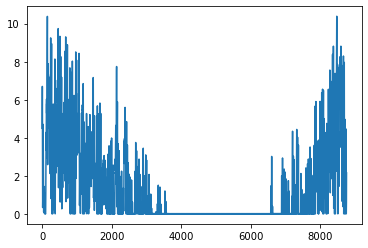

In [31]:
import numpy as np
import matplotlib.pyplot as plt

df_test = pd.read_csv('ResearchData/data/' + names[7])
split_point = int(len(df_test.index) * .8)
full = df_test['Gas:Facility [kW](Hourly)'].values
train = full[:split_point]
test = full[split_point:]

# newdata = np.squeeze(data) # Shape is now: (10, 80)
# plt.plot(full) # plotting by columns
# plt.show()

In [13]:
x = prediction_list
y = mse_list

In [3]:
# df_old_mse = pd.read_csv('ResearchData/arima_mse_gas.csv')

# df_old_mse = df_old_mse[['id', 'ARIMA', 'ARIMA Order']]
# df_old_mse = df_old_mse.set_index('id')
# df_old_mse

df_mse = pd.DataFrame(data=mse_list, columns=['ARIMA'])
df_mse['ARIMA Order'] = order_list
df_mse['id'] = range(len(names))
df_mse = df_mse[['id', 'ARIMA', 'ARIMA Order']]
df_mse = df_mse.set_index('id')
# df_mse = pd.concat([df_old_mse, df_mse])
# old_df_mse = pd.read_csv('high_arima_mse_electricity.csv', index_col='id')
# df_new = pd.concat([old_df_mse, df_mse])
df_mse.to_csv('low_arima_mse_electricity.csv')
df_mse

,ARIMA,ARIMA Order
id,,
0,0.010983,"(2, 0, 2)"
1,0.012805,"(2, 0, 2)"
2,0.023236,"(3, 0, 3)"
3,0.025055,"(2, 0, 2)"
4,0.024464,"(3, 0, 3)"
5,0.125707,"(2, 0, 3)"
6,0.205753,"(2, 0, 1)"
7,0.025012,"(3, 0, 2)"
8,0.027618,"(3, 0, 2)"


In [5]:
df_predictions = pd.DataFrame()
df_predictions['ARIMA'] = prediction_list
df_predictions['id'] = range(len(names))
df_predictions = df_predictions[['id', 'ARIMA']]
df_predictions = df_predictions.set_index('id')

# df_old_predictions = pd.read_csv('high_arima_predictions_electricity.csv', index_col='id')

# df_predictions = pd.concat([df_old_predictions, df_predictions])
df_predictions.to_csv('low_arima_predictions_electricity.csv')
# df_predictions
df_predictions

,ARIMA
id,
0,"[0.48886520978439046, 0.5222323371525835, 0.43..."
1,"[0.5013752192798775, 0.5382831227472838, 0.446..."
2,"[0.7916502319830417, 0.5903341957553354, 0.449..."
3,"[0.7828665968114263, 0.591450599587307, 0.4483..."
4,"[0.815031423112624, 0.5850322005131692, 0.4404..."
5,"[0.8190849413905412, 0.534792433851593, 0.4363..."
6,"[0.819167157970481, 0.5321248747766723, 0.4336..."
7,"[0.7818004133005548, 0.5889232401901433, 0.449..."
8,"[0.8014783272968163, 0.5904508535090371, 0.440..."


In [7]:
# df_old_predictions = pd.read_csv('ResearchData/arima_predictions.csv')
# df_old_predictions
prediction_list[0]

[3.5986098495752863,
 9.00297320723474,
 9.626302973139284,
 10.08641820011717,
 10.396702591002642,
 10.75959731592895,
 11.258335788391971,
 11.565344778597376,
 12.423938783704893,
 9.746459510490505,
 7.700725362811891,
 7.913717445706366,
 4.992304567065322,
 3.8854359689316955,
 3.7209300126228833,
 4.807725871361727,
 5.273563510913464,
 6.326452277584023,
 8.42660302769174,
 7.262128141243225,
 7.486262398759683,
 7.771917166185798,
 8.45596960249597,
 8.750789176482066,
 9.11849612572132,
 9.435198855156546,
 9.786656519074414,
 10.08040425891265,
 10.315204701432226,
 10.626356031655277,
 11.165890961229337,
 12.62753439683471,
 11.484547842903682,
 9.302550438431407,
 7.961269317752712,
 6.927059786376223,
 6.378256949283927,
 5.599608388926492,
 5.150879007586113,
 4.883923063528999,
 5.530524739210026,
 6.663343228617071,
 8.209616675809798,
 6.9380029996167725,
 6.964994883408647,
 7.118297698559386,
 7.13301717442219,
 7.1616355857533165,
 7.589408412491729,
 8.035779219

In [25]:
df = pd.read_csv('dataset_file_names.csv')
names = df['filename'].values

prediction_list = []

order_list = df_mse['ARIMA Order'].values

for x in range(500) :
    print(x)
    
    df_test = pd.read_csv('ResearchData/data2/2' + names[x])
    split_point = int(len(df_test.index) * .8)
    full = df_test['Electricity:Facility [kW](Hourly)'].values
    train = full[:split_point]

    model = ARIMA(train, order=eval(order_list[x]))
    model_fit = model.fit(disp=0)   

    yhat = model_fit.predict(start=0, end=len(test) - 1)

    prediction_list.append(yhat.tolist())
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


19
20
21
22


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


23


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


24
25
26
27


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


28
29
30
31
32
33
34
35
36
37


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


133
134
135
136
137
138
139
140
141


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


142
143
144


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


145
146


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


147
148
149
150
151
152
153


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


154
155
156
157
158
159
160
161
162
163
164
165
166
167
168


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


169
170


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


171
172
173


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


174
175
176
177
178
179
180
181
182
183


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


184
185
186
187


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


188


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


189
190
191
192
193
194
195
196
197
198


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


238
239
240
241
242
243
244
245
246
247
248
249
250
251
252


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


274
275
276
277
278


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


279


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


339
340
341
342
343
344
345
346
347
348
349
350
351


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


352
353
354
355
356
357
358
359
360
361
362
363
364
365


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


366


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


367


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


368
369
370


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


371
372


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


373
374
375
376
377
378
379
380
381
382
383
384
385
386
387


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


388


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


389


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


390
391
392
393
394
395
396
397


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


398
399
400
401
402
403


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


404
405
406
407
408


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


409


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


410
411
412
413
414
415


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


416


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


417
418
419


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


420
421
422
423
424


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


425
426


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


427
428
429
430
431
432


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


433
434
435


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


436
437
438
439
440
441


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


442
443


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


444
445
446
447
448
449
450
451
452


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


453


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


454
455
456


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


457
458
459
460


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


461
462


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


463
464
465
466


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


467
468
469


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


470
471


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


472
473


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499


In [23]:
eval(order_list[0])

(3, 0, 3)

In [19]:
len(df_mse['ARIMA Order'].values)

936

In [27]:
df_predictions = pd.DataFrame()
df_predictions['ARIMA'] = prediction_list
# df_predictions.to_csv('ResearchData/arima_predictions.csv')
df_predictions['id'] = range(500)
df_predictions = df_predictions[['id', 'ARIMA']]
df_predictions = df_predictions.set_index('id')
df_predictions

df_old_predictions = pd.read_csv('ResearchData/arima_predictions.csv')
df_old_predictions['id'] = range(500, len(names))
df_old_predictions  = df_old_predictions[['id', 'ARIMA']]
df_old_predictions = df_old_predictions.set_index('id')

df_predictions = pd.concat([df_predictions, df_old_predictions])
df_predictions.to_csv('ResearchData/arima_predictions.csv')
df_predictions

,ARIMA
id,
0,"[1.0129750624066118, 1.0188372243534334, 0.806..."
1,"[1.0409613162544415, 1.0584532472469101, 0.855..."
2,"[1.4658327770067552, 1.010716352322464, 0.7547..."
3,"[1.4474130221177925, 1.0135766971079758, 0.749..."
4,"[1.5251198540017301, 0.9994507012116556, 0.721..."
5,"[1.7455018047819357, 1.6341024203953347, 1.549..."
6,"[1.749894198815904, 1.543783641416854, 1.39844..."
7,"[1.440897021298046, 1.0116891826623289, 0.7644..."
8,"[1.492243891218133, 1.0106151390203593, 0.7207..."


In [23]:

# grid search sarima hyperparameters
import pandas as pd
import numpy as np
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

df = pd.read_csv('dataset_file_names.csv')
names = df['filename'].values

# new_order_list = []
mse_list = []
prediction_list = []

for x in range(len(names)) :
    print(x)
    
    df_test = pd.read_csv('ResearchData/data2/2' + names[x])
    split_point = int(len(df_test.index) * .8)
    full = df_test['Electricity:Facility [kW](Hourly)'].values
    train = full[:split_point]
    test = full[split_point:]
    # define config lists
#     t_params = ['n','c','t','ct']
#     P_params = [1]
#     D_params = [1]
#     Q_params = [1]
#     m_params = [24]
#     # create config instances
#     best_idx = 0
#     best_mse = 100
#     for P in P_params:
#         for D in D_params:
#             for Q in Q_params:
#                 curr_order = eval(order_list[x])
    model = SARIMAX(train, order=curr_order, seasonal_order=(1,1,1,24), enforce_stationarity=False, enforce_invertibility=False)
#                 cfg = (P,D,Q,24)
#                 print(cfg)
                                    
    model_fit = model.fit()   

    yhat = model_fit.predict(start=0, end=len(test) - 1)

    mse = mean_squared_error(yhat, test)
    print(mse)
                                    
#     if mse < best_mse :
#         best_idx = len(order_list)
#         best_mse = mse
#         best_order = (P,D,Q,24)
#         best_prediction
                                        
#     new_order_list.append()
    mse_list.append(mse)
    prediction_list.append(yhat.tolist())

0


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0.045582613425408355
1


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0.04795758088098053
2
0.06862158330196579
3


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0.07281522182743921
4


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0.07318521165150838
5


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2.4635586152907503
6


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3.4835434358942767
7


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0.0698323697486616
8


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0.08742276488235136
9


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4.262991555249442
10


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1.3813076275340552
11


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2.31704369268329
12
2.7845125174380576
13


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0.07223400200006627
14


/home/jgarnier/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


KeyboardInterrupt: 

In [11]:
import pandas as pd

df = pd.read_csv('ResearchData/arima_mse.csv', index_col='id')
order_list = df['ARIMA Order'].values

In [6]:
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
import pmdarima as pm
from sklearn.metrics import mean_squared_error
df_actual = pd.read_csv('ResearchData/arima_mse.csv', index_col='id')
df_actual['ARIMA Order'].values

array(['(3, 0, 3)', '(3, 0, 3)', '(2, 0, 3)', '(2, 0, 3)', '(2, 0, 3)',
       '(2, 0, 3)', '(3, 0, 2)', '(2, 0, 3)', '(2, 0, 3)', '(2, 0, 1)',
       '(2, 0, 1)', '(2, 0, 1)', '(3, 0, 3)', '(3, 0, 3)', '(2, 0, 1)',
       '(2, 0, 3)', '(2, 0, 3)', '(2, 0, 3)', '(3, 0, 3)', '(2, 0, 3)',
       '(3, 0, 2)', '(3, 0, 3)', '(3, 0, 3)', '(3, 0, 3)', '(3, 0, 2)',
       '(3, 0, 3)', '(2, 0, 3)', '(3, 0, 3)', '(2, 0, 3)', '(2, 0, 3)',
       '(2, 0, 3)', '(3, 0, 2)', '(3, 0, 3)', '(2, 0, 3)', '(3, 0, 3)',
       '(3, 0, 3)', '(3, 0, 3)', '(3, 0, 3)', '(3, 0, 2)', '(3, 0, 3)',
       '(3, 0, 3)', '(3, 0, 2)', '(3, 0, 3)', '(3, 0, 3)', '(2, 0, 3)',
       '(3, 0, 3)', '(3, 0, 3)', '(3, 0, 2)', '(3, 0, 3)', '(3, 0, 2)',
       '(3, 0, 3)', '(3, 0, 3)', '(3, 0, 3)', '(3, 0, 3)', '(2, 0, 3)',
       '(3, 0, 3)', '(3, 0, 3)', '(2, 0, 3)', '(3, 0, 3)', '(3, 0, 3)',
       '(3, 0, 3)', '(3, 0, 2)', '(3, 0, 3)', '(3, 0, 3)', '(3, 0, 3)',
       '(3, 0, 3)', '(3, 0, 2)', '(3, 0, 2)', '(2, 0, 2)', '(3, 

In [6]:
vals = df_actual.values
holt_mse_list = []
svr_mse_list = []
arima_mse_list = []
tesla_mse_list = []
lstm_mse_list = []
for x in range(len(vals)) :
    actual_pred = eval(vals[x][5])
    holt_pred = eval(vals[x][0])
    svr_pred = eval(vals[x][1])
    arima_pred = eval(vals[x][4])
    tesla_pred = eval(vals[x][2])
    lstm_pred = eval(vals[x][3])
    
    if(len(holt_pred) == len(actual_pred)) :
        split = int(len(holt_pred) * .8)
        mse = mean_squared_error(actual_pred[split:], holt_pred[split:])
        holt_mse_list.append(mse)
    else :
        holt_mse_list.append(float("NaN"))
        
    if(len(svr_pred) == len(actual_pred)) :
        split = int(len(svr_pred) * .8)
        mse = mean_squared_error(actual_pred[split:], svr_pred[split:])
        svr_mse_list.append(mse)
    else :
        svr_mse_list.append(float("NaN"))
        
    if(len(arima_pred) == len(actual_pred)) :
        split = int(len(arima_pred) * .8)
        mse = mean_squared_error(actual_pred[split:], arima_pred[split:])
        arima_mse_list.append(mse)
    else :
        arima_mse_list.append(float("NaN"))
        
    if(len(tesla_pred) == len(actual_pred)) :
        split = int(len(tesla_pred) * .8)
        mse = mean_squared_error(actual_pred[split:], tesla_pred[split:])
        tesla_mse_list.append(mse)
    else :
        tesla_mse_list.append(float("NaN"))
        
    if(len(lstm_pred) == len(actual_pred)) :
        split = int(len(lstm_pred) * .8)
        mse = mean_squared_error(actual_pred[split:], lstm_pred[split:])
        lstm_mse_list.append(mse)
    else :
        lstm_mse_list.append(float("NaN"))
        

In [7]:
df = pd.DataFrame()
df['holt'] = holt_mse_list
df['svr'] = svr_mse_list
df['arima'] = arima_mse_list
df['tesla'] = tesla_mse_list
df['lstm'] = lstm_mse_list
df.mean()

holt     0.263957
svr      0.665638
arima    0.283822
tesla    0.018894
lstm     0.033454
dtype: float64

In [8]:
df_mse = pd.read_csv('ResearchData/mse.csv', index_col='id')
df_mse.mean()

Holt                   0.344652
SVR                    0.389291
TESLA                  0.008812
TESLA.1                0.008812
LSTM                   0.019615
ARIMA                  0.342612
Single Neuron all 5    0.017601
Single Neuron 3        0.370509
dtype: float64

3

In [3]:
len(mse_list)

566

In [6]:
np.array(mse_list).mean()

15.236297335259232